# 1、import data

In [5]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

features_train = pd.read_csv('features_train.csv')
features_val = pd.read_csv('features_val.csv')
labels_train = pd.read_csv('labels_train.csv', header=None)[1]
labels_val = pd.read_csv('labels_val.csv', header=None)[1]

# 2、handle data

In [6]:
features_train = features_train.drop(['shop_id'], axis=1)
features_val = features_val.drop(['shop_id'], axis=1)

In [7]:
features_train = features_train.apply(lambda x: np.log(x+1))
# columns = features_train.columns
# from sklearn.preprocessing import MinMaxScaler
# features_train[columns] = MinMaxScaler().fit_transform(features_train[columns])

features_val = features_val.apply(lambda x: np.log(x+1))
# features_val[columns] = MinMaxScaler().fit_transform(features_val[columns])

In [8]:
features_train

ord_cnt   sale_amt  offer_cnt  offer_amt   rtn_cnt    rtn_amt  \
0      6.546785  11.301157   5.493061   8.269649  3.218876   7.167208   
1      6.226537  10.832881   5.141664   6.468521  3.465736   7.305659   
2      6.230481  11.163724   5.968708   8.571433  3.044522   7.293229   
3      6.810142  11.523303   6.184149   6.206193  1.098612   4.601062   
4      7.454141  11.490511   7.436617  11.599322  2.302585   6.565476   
5      8.167352  11.755786   7.133296  11.195539  2.890372   6.456738   
6      7.646831  11.805865   7.604894  10.599397  2.944439   6.247520   
7      7.186144  11.965872   6.922644   8.241242  2.944439   6.911598   
8      8.135640  11.977143   6.863803   8.773762  4.709530   7.588187   
9      3.951244   9.073709   2.833213   4.525369  1.609438   5.833787   
10     6.276643  11.536500   3.135494   4.973418  3.332205   7.836192   
11     8.096817  12.202303   8.094684  11.464919  1.945910   5.162669   
12     4.691348   8.834349   1.945910   4.218772  1.098612   4.054390   
13     7.211557  10.945814   3.912023   5.325835  3.258097   6.510035   
14     5.648974  10.805467   1.791759   4.048301  2.397895   6.656662   
15     7.652071  12.017775   7.563720  10.966376  4.143135   8.151178   
16     8.414717  12.006860   8.277920  11.235828  3.465736   6.926803   
17     4.304065   9.425735   0.000000   0.000000  1.791759   5.949574   
18     6.918695  11.006882   5.905362   7.013052  3.663562   7.591831   
19     7.291656  11.521749   7.105786   9.518485  3.091042   6.229477   
20     5.231109  10.383990   2.708050   6.010384  2.484907   6.923530   
21     8.031710  11.529737   8.015658   9.446889  1.098612   3.670206   
22     5.204007  10.073570   4.897840   8.149044  2.995732   6.824515   
23     6.886532  11.761275   6.883463   9.230049  3.433987   7.542383   
24     5.899897  10.429430   5.236442   7.445207  1.386294   5.104126   
25     7.237778  11.929684   7.205635   9.776603  5.241747   9.206748   
26     6.823286  11.813163   5.886104   7.754138  3.806662   8.169804   
27     8.539542  13.119163   3.583519   5.948714  4.442651   8.268214   
28     8.137980  12.089487   7.864036  10.953306  4.094345   7.417893   
29     6.419995  10.587211   5.826000   9.598213  1.945910   5.952490   
...         ...        ...        ...        ...       ...        ...   
11970  9.299815  13.072878   9.226706  14.178578  5.170484  10.067024   
11971  7.759187  12.029744   7.687080   9.555265  3.713572   7.315411   
11972  7.422971  12.183442   7.275172   9.230735  3.828641   7.692264   
11973  8.241176  12.248894   5.187386   6.153945  4.919981   8.317173   
11974  6.717805  12.816851   6.561031  12.332289  5.010635  10.186912   
11975  6.458338  11.503170   5.081404   9.726235  2.944439   7.134102   
11976  2.833213   9.532860   0.000000   0.000000  0.000000   0.000000   
11977  6.756932  11.299264   6.572283   8.801202  2.079442   6.228925   
11978  7.105786  11.788867   7.103322  10.823411  3.688879   7.389539   
11979  5.863631  10.696573   0.000000   0.000000  2.397895   6.121022   
11980  5.337538   9.910431   3.891820   6.568036  2.772589   6.617617   
11981  8.330864  13.136464   6.852243   9.751987  3.951244   7.950192   
11982  6.617403  11.171849   6.104793   7.299561  3.526361   7.399679   
11983  6.432940  10.934804   5.796058  11.245533  2.564949   6.350310   
11984  6.253829  11.681107   5.840642  10.596851  3.688879   8.350295   
11985  5.293305  10.467252   3.610918   6.233960  3.091042   7.476716   
11986  5.529429   9.986323   5.529429   9.107150  2.564949   6.082265   
11987  7.201171  11.135970   6.918695   7.910990  2.397895   6.172222   
11988  7.217443  12.443203   6.434547   8.470435  3.610918   8.028061   
11989  6.504288  10.613981   6.345636   9.830980  3.091042   6.856599   
11990  5.726848   9.638884   4.753590   6.025069  2.079442   4.689327   
11991  8.352083  12.036822   6.463029   8.061796  4.234107   7.535206   
11992  6.421622  10.745717   5.609472   9.215382  3.044522   7.020

# 3、train & predict

In [9]:
dataset_train = xgb.DMatrix(features_train,labels_train)
dataset_val = xgb.DMatrix(features_val,labels_val)
dataset_pre = xgb.DMatrix(features_val)

In [10]:
# 评价函数
def wmae(ground_truth, predictions):
    return abs(predictions-ground_truth).sum()/float(ground_truth.sum())
def wmae_xgb(ground_truth, predictions):
    predictions = predictions.get_label()
    return 'wmae', abs(predictions-ground_truth).sum()/float(ground_truth.sum())

In [11]:
def plot_results(results, para_name):
    paras = results.keys()
    x = range(1, len(paras)+1)
    y = []
    for key in paras:
        y.append(results[key]['wmae'])
    
    plt.figure()
    plt.plot(x,y)
    plt.xlabel('{}'.format(para_name), fontsize=14)
    plt.ylabel('wmae)', fontsize=14)
    plt.xticks(x, paras, rotation=10, fontsize=10)
    plt.title('wmae for different {}'.format(para_name), fontsize=16)
    plt.show()

In [34]:
results_lambda = {}
for i in [0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]:
    result = {}
    print('\n\n\n\nrunning while lambda = {}'.format(i))
    params={'booster':'gblinear',
            'objective': 'reg:linear',
            'lambda':i,
            'seed':0,
            'silent':1,
        }

    watchlist = [(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=3000,early_stopping_rounds=300,evals=watchlist, feval=wmae_xgb,maximize=False)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(labels_val, pred_xgb)
    results_lambda['{}'.format(i)] = result
    
print(results_lambda)





running while lambda = 0
[0]	train-wmae:0.323307
Will train until train-wmae hasn't improved in 300 rounds.
[1]	train-wmae:0.31295
[2]	train-wmae:0.307156
[3]	train-wmae:0.303051
[4]	train-wmae:0.300309
[5]	train-wmae:0.298422
[6]	train-wmae:0.296877
[7]	train-wmae:0.295502
[8]	train-wmae:0.294451
[9]	train-wmae:0.293603
[10]	train-wmae:0.292909
[11]	train-wmae:0.292165
[12]	train-wmae:0.291543
[13]	train-wmae:0.290958
[14]	train-wmae:0.290554
[15]	train-wmae:0.290089
[16]	train-wmae:0.289743
[17]	train-wmae:0.289376
[18]	train-wmae:0.289048
[19]	train-wmae:0.288806
[20]	train-wmae:0.288485
[21]	train-wmae:0.288287
[22]	train-wmae:0.288072
[23]	train-wmae:0.287848
[24]	train-wmae:0.287673
[25]	train-wmae:0.287527
[26]	train-wmae:0.287365
[27]	train-wmae:0.287176
[28]	train-wmae:0.287059
[29]	train-wmae:0.28687
[30]	train-wmae:0.286763
[31]	train-wmae:0.286581
[32]	train-wmae:0.286532
[33]	train-wmae:0.286346
[34]	train-wmae:0.286302
[35]	train-wmae:0.28611
[36]	train-wmae:0.286006


[318]	train-wmae:0.283353
[319]	train-wmae:0.283354
[320]	train-wmae:0.283353
[321]	train-wmae:0.283358
[322]	train-wmae:0.283355
[323]	train-wmae:0.283358
[324]	train-wmae:0.283356
[325]	train-wmae:0.283356
[326]	train-wmae:0.283354
[327]	train-wmae:0.283356
[328]	train-wmae:0.28338
[329]	train-wmae:0.283359
[330]	train-wmae:0.28336
[331]	train-wmae:0.283358
[332]	train-wmae:0.283361
[333]	train-wmae:0.283357
[334]	train-wmae:0.283356
[335]	train-wmae:0.283359
[336]	train-wmae:0.283361
[337]	train-wmae:0.283361
[338]	train-wmae:0.283363
[339]	train-wmae:0.283363
[340]	train-wmae:0.283361
[341]	train-wmae:0.283362
[342]	train-wmae:0.283362
[343]	train-wmae:0.283363
[344]	train-wmae:0.283366
[345]	train-wmae:0.283365
[346]	train-wmae:0.283363
[347]	train-wmae:0.283365
[348]	train-wmae:0.283365
[349]	train-wmae:0.283366
[350]	train-wmae:0.283365
[351]	train-wmae:0.283366
[352]	train-wmae:0.283365
[353]	train-wmae:0.283368
[354]	train-wmae:0.283367
[355]	train-wmae:0.283368
[356]	train-wm

[57]	train-wmae:0.285231
[58]	train-wmae:0.285189
[59]	train-wmae:0.285131
[60]	train-wmae:0.28512
[61]	train-wmae:0.285091
[62]	train-wmae:0.285064
[63]	train-wmae:0.285034
[64]	train-wmae:0.284997
[65]	train-wmae:0.284976
[66]	train-wmae:0.284899
[67]	train-wmae:0.28485
[68]	train-wmae:0.284871
[69]	train-wmae:0.284805
[70]	train-wmae:0.284833
[71]	train-wmae:0.284808
[72]	train-wmae:0.284787
[73]	train-wmae:0.284771
[74]	train-wmae:0.284736
[75]	train-wmae:0.28472
[76]	train-wmae:0.284701
[77]	train-wmae:0.284686
[78]	train-wmae:0.284651
[79]	train-wmae:0.284647
[80]	train-wmae:0.284628
[81]	train-wmae:0.284617
[82]	train-wmae:0.2846
[83]	train-wmae:0.284588
[84]	train-wmae:0.284569
[85]	train-wmae:0.284555
[86]	train-wmae:0.284547
[87]	train-wmae:0.284501
[88]	train-wmae:0.284486
[89]	train-wmae:0.284496
[90]	train-wmae:0.28448
[91]	train-wmae:0.284467
[92]	train-wmae:0.284452
[93]	train-wmae:0.284452
[94]	train-wmae:0.284415
[95]	train-wmae:0.284416
[96]	train-wmae:0.28439
[97]	tr

[376]	train-wmae:0.284041
[377]	train-wmae:0.284041
[378]	train-wmae:0.284044
[379]	train-wmae:0.284045
[380]	train-wmae:0.284045
[381]	train-wmae:0.284045
[382]	train-wmae:0.284047
[383]	train-wmae:0.284047
[384]	train-wmae:0.28405
[385]	train-wmae:0.28405
[386]	train-wmae:0.28405
[387]	train-wmae:0.284051
[388]	train-wmae:0.284053
[389]	train-wmae:0.284054
[390]	train-wmae:0.284055
[391]	train-wmae:0.284054
[392]	train-wmae:0.284056
[393]	train-wmae:0.284057
[394]	train-wmae:0.284057
[395]	train-wmae:0.284059
[396]	train-wmae:0.284061
[397]	train-wmae:0.284063
[398]	train-wmae:0.284069
[399]	train-wmae:0.28406
[400]	train-wmae:0.284063
[401]	train-wmae:0.284064
[402]	train-wmae:0.284069
[403]	train-wmae:0.284069
[404]	train-wmae:0.284071
[405]	train-wmae:0.284069
[406]	train-wmae:0.284069
[407]	train-wmae:0.284072
[408]	train-wmae:0.284074
[409]	train-wmae:0.284073
[410]	train-wmae:0.284075
[411]	train-wmae:0.284078
[412]	train-wmae:0.284079
[413]	train-wmae:0.284081
[414]	train-wmae

[144]	train-wmae:0.285824
[145]	train-wmae:0.285827
[146]	train-wmae:0.285835
[147]	train-wmae:0.285836
[148]	train-wmae:0.285841
[149]	train-wmae:0.285843
[150]	train-wmae:0.285847
[151]	train-wmae:0.285854
[152]	train-wmae:0.285859
[153]	train-wmae:0.285858
[154]	train-wmae:0.285865
[155]	train-wmae:0.285867
[156]	train-wmae:0.285872
[157]	train-wmae:0.285875
[158]	train-wmae:0.28588
[159]	train-wmae:0.285884
[160]	train-wmae:0.285882
[161]	train-wmae:0.285893
[162]	train-wmae:0.285896
[163]	train-wmae:0.2859
[164]	train-wmae:0.2859
[165]	train-wmae:0.285907
[166]	train-wmae:0.285904
[167]	train-wmae:0.285915
[168]	train-wmae:0.285919
[169]	train-wmae:0.285923
[170]	train-wmae:0.285923
[171]	train-wmae:0.28593
[172]	train-wmae:0.285928
[173]	train-wmae:0.285937
[174]	train-wmae:0.285939
[175]	train-wmae:0.285937
[176]	train-wmae:0.285947
[177]	train-wmae:0.28595
[178]	train-wmae:0.285955
[179]	train-wmae:0.285957
[180]	train-wmae:0.285959
[181]	train-wmae:0.285962
[182]	train-wmae:0.

[56]	train-wmae:0.28801
[57]	train-wmae:0.287993
[58]	train-wmae:0.287976
[59]	train-wmae:0.287964
[60]	train-wmae:0.287935
[61]	train-wmae:0.28794
[62]	train-wmae:0.287925
[63]	train-wmae:0.287915
[64]	train-wmae:0.287913
[65]	train-wmae:0.287907
[66]	train-wmae:0.287898
[67]	train-wmae:0.287899
[68]	train-wmae:0.287867
[69]	train-wmae:0.287855
[70]	train-wmae:0.287836
[71]	train-wmae:0.287857
[72]	train-wmae:0.287846
[73]	train-wmae:0.287853
[74]	train-wmae:0.287844
[75]	train-wmae:0.287855
[76]	train-wmae:0.287842
[77]	train-wmae:0.287864
[78]	train-wmae:0.287865
[79]	train-wmae:0.287783
[80]	train-wmae:0.287827
[81]	train-wmae:0.287837
[82]	train-wmae:0.287807
[83]	train-wmae:0.287811
[84]	train-wmae:0.287832
[85]	train-wmae:0.287823
[86]	train-wmae:0.287839
[87]	train-wmae:0.287865
[88]	train-wmae:0.287857
[89]	train-wmae:0.287848
[90]	train-wmae:0.287822
[91]	train-wmae:0.287828
[92]	train-wmae:0.28785
[93]	train-wmae:0.287832
[94]	train-wmae:0.287869
[95]	train-wmae:0.287855
[96

[375]	train-wmae:0.289463
[376]	train-wmae:0.289467
[377]	train-wmae:0.289472
[378]	train-wmae:0.289477
[379]	train-wmae:0.289479
Stopping. Best iteration:
[79]	train-wmae:0.287783





running while lambda = 0.2
[0]	train-wmae:0.327149
Will train until train-wmae hasn't improved in 300 rounds.
[1]	train-wmae:0.315404
[2]	train-wmae:0.310271
[3]	train-wmae:0.307062
[4]	train-wmae:0.304702
[5]	train-wmae:0.302885
[6]	train-wmae:0.301438
[7]	train-wmae:0.30018
[8]	train-wmae:0.299237
[9]	train-wmae:0.29841
[10]	train-wmae:0.297655
[11]	train-wmae:0.297045
[12]	train-wmae:0.296499
[13]	train-wmae:0.296007
[14]	train-wmae:0.295573
[15]	train-wmae:0.295223
[16]	train-wmae:0.294826
[17]	train-wmae:0.294592
[18]	train-wmae:0.294329
[19]	train-wmae:0.294091
[20]	train-wmae:0.293831
[21]	train-wmae:0.293669
[22]	train-wmae:0.293416
[23]	train-wmae:0.29334
[24]	train-wmae:0.293105
[25]	train-wmae:0.292997
[26]	train-wmae:0.292901
[27]	train-wmae:0.292808
[28]	train-wmae:0.292688
[29]	train-wmae:

[311]	train-wmae:0.294375
[312]	train-wmae:0.294381
[313]	train-wmae:0.294386
[314]	train-wmae:0.294394
[315]	train-wmae:0.294401
[316]	train-wmae:0.294407
[317]	train-wmae:0.294413
[318]	train-wmae:0.29442
[319]	train-wmae:0.294426
[320]	train-wmae:0.294432
[321]	train-wmae:0.294438
[322]	train-wmae:0.294444
[323]	train-wmae:0.294453
[324]	train-wmae:0.294459
[325]	train-wmae:0.294465
[326]	train-wmae:0.29447
[327]	train-wmae:0.294477
[328]	train-wmae:0.294483
[329]	train-wmae:0.294488
[330]	train-wmae:0.294496
[331]	train-wmae:0.294501
[332]	train-wmae:0.294509
[333]	train-wmae:0.294514
[334]	train-wmae:0.294519
[335]	train-wmae:0.294527
[336]	train-wmae:0.294533
[337]	train-wmae:0.294538
[338]	train-wmae:0.294546
[339]	train-wmae:0.294551
[340]	train-wmae:0.294557
[341]	train-wmae:0.294564
[342]	train-wmae:0.29457
[343]	train-wmae:0.294576
[344]	train-wmae:0.294582
[345]	train-wmae:0.294587
[346]	train-wmae:0.294594
[347]	train-wmae:0.2946
[348]	train-wmae:0.294605
[349]	train-wmae:

[266]	train-wmae:0.298999
[267]	train-wmae:0.29901
[268]	train-wmae:0.299018
[269]	train-wmae:0.299017
[270]	train-wmae:0.299033
[271]	train-wmae:0.299042
[272]	train-wmae:0.29905
[273]	train-wmae:0.299058
[274]	train-wmae:0.299065
[275]	train-wmae:0.299075
[276]	train-wmae:0.299082
[277]	train-wmae:0.29909
[278]	train-wmae:0.299091
[279]	train-wmae:0.299101
[280]	train-wmae:0.299116
[281]	train-wmae:0.299112
[282]	train-wmae:0.299134
[283]	train-wmae:0.299139
[284]	train-wmae:0.29915
[285]	train-wmae:0.299141
[286]	train-wmae:0.299165
[287]	train-wmae:0.299172
[288]	train-wmae:0.299173
[289]	train-wmae:0.299174
[290]	train-wmae:0.299191
[291]	train-wmae:0.299222
[292]	train-wmae:0.299209
[293]	train-wmae:0.299214
[294]	train-wmae:0.299224
[295]	train-wmae:0.299227
[296]	train-wmae:0.29924
[297]	train-wmae:0.299241
[298]	train-wmae:0.299254
[299]	train-wmae:0.299257
[300]	train-wmae:0.299269
[301]	train-wmae:0.299275
[302]	train-wmae:0.299283
[303]	train-wmae:0.299288
[304]	train-wmae:

[226]	train-wmae:0.30314
[227]	train-wmae:0.303158
[228]	train-wmae:0.303168
[229]	train-wmae:0.303183
[230]	train-wmae:0.303189
[231]	train-wmae:0.303192
[232]	train-wmae:0.303204
[233]	train-wmae:0.303214
[234]	train-wmae:0.303229
[235]	train-wmae:0.303237
[236]	train-wmae:0.303248
[237]	train-wmae:0.303258
[238]	train-wmae:0.303264
[239]	train-wmae:0.30328
[240]	train-wmae:0.303285
[241]	train-wmae:0.303299
[242]	train-wmae:0.303305
[243]	train-wmae:0.303323
[244]	train-wmae:0.30333
[245]	train-wmae:0.303343
[246]	train-wmae:0.303344
[247]	train-wmae:0.303371
[248]	train-wmae:0.303373
[249]	train-wmae:0.303378
[250]	train-wmae:0.303392
[251]	train-wmae:0.303397
[252]	train-wmae:0.303403
[253]	train-wmae:0.303418
[254]	train-wmae:0.303415
[255]	train-wmae:0.303434
[256]	train-wmae:0.303442
[257]	train-wmae:0.30345
[258]	train-wmae:0.303463
[259]	train-wmae:0.303477
[260]	train-wmae:0.303479
[261]	train-wmae:0.303487
[262]	train-wmae:0.303503
[263]	train-wmae:0.303509
[264]	train-wmae

In [38]:
results_lambda

{'0': {'predictions': array([ 279412.8125   ,   80346.34375  ,  213731.296875 , ...,
           94612.9921875,   62427.6015625,  111500.25     ], dtype=float32),
  'wmae': 0.4686475977751078},
 '0.01': {'predictions': array([ 279573.46875  ,   79673.2421875,  214327.203125 , ...,
           95674.171875 ,   63449.359375 ,  111203.7578125], dtype=float32),
  'wmae': 0.4689615418032877},
 '0.05': {'predictions': array([ 279358.15625  ,   79130.5703125,  216504.53125  , ...,
           97979.5703125,   66326.7890625,  110324.7734375], dtype=float32),
  'wmae': 0.4691687319466946},
 '0.1': {'predictions': array([ 278787.8125   ,   78163.6640625,  217983.390625 , ...,
           99823.6953125,   69134.0234375,  108770.53125  ], dtype=float32),
  'wmae': 0.47107090408136654},
 '0.2': {'predictions': array([ 277577.1875   ,   76920.0078125,  220451.28125  , ...,
          102458.75     ,   73653.0625   ,  106514.96875  ], dtype=float32),
  'wmae': 0.47423128762204547},
 '0.3': {'predictions':

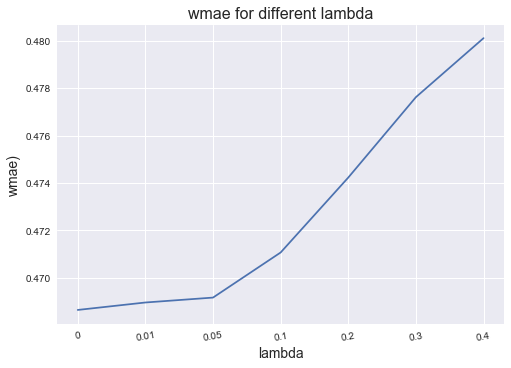

In [37]:
plot_results(results_lambda, 'lambda')

**GridSearchCV**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from time import time

reg = xgb.XGBRegressor(
    objective = 'mae',
    nthread = -1,
    silent = 1,
    seed = 42,
    )
parameters = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [6, 9, 12],
    }

start = time()
scoring = make_scorer(wmae, greater_is_better=False)
cross_validator = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(reg, parameters, scoring=scoring, n_jobs=-1, cv=cross_validator)
grid.fit(X_train, y_train)

best_score = grid.best_score_
best_estimator = grid.best_estimator_
best_params = grid.best_params_
end = time()
print('xgb gscv time:{:.4f}'.format(end-start))

**[Davut tuning](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/discussion/19083)**





running while depth = 8
[0]	val-wmae:5.61193	train-wmae:5.72322
Multiple eval metrics have been passed: 'train-wmae' will be used for early stopping.

Will train until train-wmae hasn't improved in 300 rounds.
[1]	val-wmae:2.65852	train-wmae:2.71452
[2]	val-wmae:1.73784	train-wmae:1.77345
[3]	val-wmae:1.31451	train-wmae:1.3383
[4]	val-wmae:1.08077	train-wmae:1.09859
[5]	val-wmae:0.937359	train-wmae:0.951874
[6]	val-wmae:0.843547	train-wmae:0.855416
[7]	val-wmae:0.779212	train-wmae:0.788549
[8]	val-wmae:0.732901	train-wmae:0.740002
[9]	val-wmae:0.6989	train-wmae:0.703636
[10]	val-wmae:0.67282	train-wmae:0.67559
[11]	val-wmae:0.652107	train-wmae:0.653301
[12]	val-wmae:0.635314	train-wmae:0.635124
[13]	val-wmae:0.62154	train-wmae:0.620077
[14]	val-wmae:0.610015	train-wmae:0.607424
[15]	val-wmae:0.60023	train-wmae:0.596608
[16]	val-wmae:0.591815	train-wmae:0.587225
[17]	val-wmae:0.584581	train-wmae:0.578978
[18]	val-wmae:0.578318	train-wmae:0.571618
[19]	val-wmae:0.572765	train-wmae:0.

[187]	val-wmae:0.462099	train-wmae:0.347655
[188]	val-wmae:0.462164	train-wmae:0.347392
[189]	val-wmae:0.46223	train-wmae:0.347134
[190]	val-wmae:0.462294	train-wmae:0.346878
[191]	val-wmae:0.462358	train-wmae:0.346625
[192]	val-wmae:0.462424	train-wmae:0.346377
[193]	val-wmae:0.462492	train-wmae:0.346132
[194]	val-wmae:0.46256	train-wmae:0.345891
[195]	val-wmae:0.462631	train-wmae:0.345652
[196]	val-wmae:0.462701	train-wmae:0.345416
[197]	val-wmae:0.462772	train-wmae:0.345183
[198]	val-wmae:0.46284	train-wmae:0.344953
[199]	val-wmae:0.462908	train-wmae:0.344726
[200]	val-wmae:0.462978	train-wmae:0.344502
[201]	val-wmae:0.46305	train-wmae:0.344281
[202]	val-wmae:0.463121	train-wmae:0.344062
[203]	val-wmae:0.46319	train-wmae:0.343845
[204]	val-wmae:0.46326	train-wmae:0.34363
[205]	val-wmae:0.46333	train-wmae:0.343419
[206]	val-wmae:0.463399	train-wmae:0.34321
[207]	val-wmae:0.463473	train-wmae:0.343005
[208]	val-wmae:0.463546	train-wmae:0.342803
[209]	val-wmae:0.463618	train-wmae:0.3426

[374]	val-wmae:0.470853	train-wmae:0.32619
[375]	val-wmae:0.470867	train-wmae:0.326134
[376]	val-wmae:0.47088	train-wmae:0.326079
[377]	val-wmae:0.470893	train-wmae:0.326024
[378]	val-wmae:0.470905	train-wmae:0.325969
[379]	val-wmae:0.470918	train-wmae:0.325915
[380]	val-wmae:0.47093	train-wmae:0.32586
[381]	val-wmae:0.470944	train-wmae:0.325807
[382]	val-wmae:0.470956	train-wmae:0.325753
[383]	val-wmae:0.470967	train-wmae:0.325699
[384]	val-wmae:0.470979	train-wmae:0.325645
[385]	val-wmae:0.470991	train-wmae:0.325592
[386]	val-wmae:0.471003	train-wmae:0.325539
[387]	val-wmae:0.471013	train-wmae:0.325486
[388]	val-wmae:0.471023	train-wmae:0.325433
[389]	val-wmae:0.471033	train-wmae:0.32538
[390]	val-wmae:0.471043	train-wmae:0.325328
[391]	val-wmae:0.471052	train-wmae:0.325275
[392]	val-wmae:0.471062	train-wmae:0.325224
[393]	val-wmae:0.471073	train-wmae:0.325173
[394]	val-wmae:0.471084	train-wmae:0.325122
[395]	val-wmae:0.471091	train-wmae:0.32507
[396]	val-wmae:0.471101	train-wmae:0.3

[561]	val-wmae:0.470701	train-wmae:0.318073
[562]	val-wmae:0.470693	train-wmae:0.318037
[563]	val-wmae:0.470686	train-wmae:0.318002
[564]	val-wmae:0.470678	train-wmae:0.317967
[565]	val-wmae:0.47067	train-wmae:0.317931
[566]	val-wmae:0.470663	train-wmae:0.317896
[567]	val-wmae:0.470654	train-wmae:0.317861
[568]	val-wmae:0.470645	train-wmae:0.317825
[569]	val-wmae:0.470638	train-wmae:0.31779
[570]	val-wmae:0.470631	train-wmae:0.317755
[571]	val-wmae:0.470621	train-wmae:0.31772
[572]	val-wmae:0.470612	train-wmae:0.317684
[573]	val-wmae:0.470603	train-wmae:0.317649
[574]	val-wmae:0.470593	train-wmae:0.317613
[575]	val-wmae:0.470585	train-wmae:0.317578
[576]	val-wmae:0.470576	train-wmae:0.317544
[577]	val-wmae:0.470568	train-wmae:0.317509
[578]	val-wmae:0.47056	train-wmae:0.317474
[579]	val-wmae:0.470551	train-wmae:0.31744
[580]	val-wmae:0.470544	train-wmae:0.317405
[581]	val-wmae:0.470535	train-wmae:0.317371
[582]	val-wmae:0.470527	train-wmae:0.317336
[583]	val-wmae:0.470518	train-wmae:0.

[749]	val-wmae:0.469016	train-wmae:0.312242
[750]	val-wmae:0.469008	train-wmae:0.312215
[751]	val-wmae:0.469	train-wmae:0.312188
[752]	val-wmae:0.468992	train-wmae:0.312162
[753]	val-wmae:0.468983	train-wmae:0.312135
[754]	val-wmae:0.468975	train-wmae:0.312108
[755]	val-wmae:0.468966	train-wmae:0.312081
[756]	val-wmae:0.468959	train-wmae:0.312055
[757]	val-wmae:0.468951	train-wmae:0.312028
[758]	val-wmae:0.468943	train-wmae:0.312002
[759]	val-wmae:0.468935	train-wmae:0.311975
[760]	val-wmae:0.468926	train-wmae:0.311949
[761]	val-wmae:0.468919	train-wmae:0.311923
[762]	val-wmae:0.468911	train-wmae:0.311896
[763]	val-wmae:0.468904	train-wmae:0.31187
[764]	val-wmae:0.468896	train-wmae:0.311844
[765]	val-wmae:0.468888	train-wmae:0.311818
[766]	val-wmae:0.468881	train-wmae:0.311792
[767]	val-wmae:0.468874	train-wmae:0.311766
[768]	val-wmae:0.468865	train-wmae:0.31174
[769]	val-wmae:0.46886	train-wmae:0.311714
[770]	val-wmae:0.468853	train-wmae:0.311689
[771]	val-wmae:0.468846	train-wmae:0.3

[937]	val-wmae:0.467782	train-wmae:0.307768
[938]	val-wmae:0.467777	train-wmae:0.307747
[939]	val-wmae:0.467772	train-wmae:0.307726
[940]	val-wmae:0.467767	train-wmae:0.307705
[941]	val-wmae:0.467762	train-wmae:0.307684
[942]	val-wmae:0.467757	train-wmae:0.307663
[943]	val-wmae:0.467751	train-wmae:0.307641
[944]	val-wmae:0.467747	train-wmae:0.307621
[945]	val-wmae:0.467743	train-wmae:0.3076
[946]	val-wmae:0.467738	train-wmae:0.307579
[947]	val-wmae:0.467732	train-wmae:0.307558
[948]	val-wmae:0.467727	train-wmae:0.307537
[949]	val-wmae:0.467722	train-wmae:0.307516
[950]	val-wmae:0.467718	train-wmae:0.307495
[951]	val-wmae:0.467713	train-wmae:0.307474
[952]	val-wmae:0.467708	train-wmae:0.307454
[953]	val-wmae:0.467703	train-wmae:0.307433
[954]	val-wmae:0.467699	train-wmae:0.307412
[955]	val-wmae:0.467694	train-wmae:0.307391
[956]	val-wmae:0.467689	train-wmae:0.307371
[957]	val-wmae:0.467685	train-wmae:0.30735
[958]	val-wmae:0.46768	train-wmae:0.30733
[959]	val-wmae:0.467675	train-wmae:0.

[1122]	val-wmae:0.467008	train-wmae:0.304263
[1123]	val-wmae:0.467005	train-wmae:0.304246
[1124]	val-wmae:0.467002	train-wmae:0.304229
[1125]	val-wmae:0.466998	train-wmae:0.304212
[1126]	val-wmae:0.466994	train-wmae:0.304195
[1127]	val-wmae:0.466991	train-wmae:0.304179
[1128]	val-wmae:0.466988	train-wmae:0.304162
[1129]	val-wmae:0.466984	train-wmae:0.304145
[1130]	val-wmae:0.466982	train-wmae:0.304129
[1131]	val-wmae:0.466979	train-wmae:0.304112
[1132]	val-wmae:0.466975	train-wmae:0.304096
[1133]	val-wmae:0.466972	train-wmae:0.304079
[1134]	val-wmae:0.466969	train-wmae:0.304062
[1135]	val-wmae:0.466965	train-wmae:0.304046
[1136]	val-wmae:0.466962	train-wmae:0.304029
[1137]	val-wmae:0.466959	train-wmae:0.304013
[1138]	val-wmae:0.466956	train-wmae:0.303996
[1139]	val-wmae:0.466955	train-wmae:0.303981
[1140]	val-wmae:0.466953	train-wmae:0.303965
[1141]	val-wmae:0.466949	train-wmae:0.303948
[1142]	val-wmae:0.466945	train-wmae:0.303932
[1143]	val-wmae:0.466942	train-wmae:0.303915
[1144]	val

[1306]	val-wmae:0.466578	train-wmae:0.301499
[1307]	val-wmae:0.466576	train-wmae:0.301485
[1308]	val-wmae:0.466575	train-wmae:0.301472
[1309]	val-wmae:0.466574	train-wmae:0.301458
[1310]	val-wmae:0.466572	train-wmae:0.301445
[1311]	val-wmae:0.466571	train-wmae:0.301432
[1312]	val-wmae:0.466569	train-wmae:0.301418
[1313]	val-wmae:0.466568	train-wmae:0.301405
[1314]	val-wmae:0.466566	train-wmae:0.301391
[1315]	val-wmae:0.466565	train-wmae:0.301378
[1316]	val-wmae:0.466564	train-wmae:0.301365
[1317]	val-wmae:0.466563	train-wmae:0.301351
[1318]	val-wmae:0.466561	train-wmae:0.301338
[1319]	val-wmae:0.46656	train-wmae:0.301324
[1320]	val-wmae:0.466558	train-wmae:0.301311
[1321]	val-wmae:0.466557	train-wmae:0.301298
[1322]	val-wmae:0.466555	train-wmae:0.301284
[1323]	val-wmae:0.466554	train-wmae:0.301271
[1324]	val-wmae:0.466552	train-wmae:0.301258
[1325]	val-wmae:0.466551	train-wmae:0.301244
[1326]	val-wmae:0.466549	train-wmae:0.301231
[1327]	val-wmae:0.466548	train-wmae:0.301218
[1328]	val-

[1490]	val-wmae:0.466391	train-wmae:0.299248
[1491]	val-wmae:0.46639	train-wmae:0.299237
[1492]	val-wmae:0.466389	train-wmae:0.299226
[1493]	val-wmae:0.46639	train-wmae:0.299216
[1494]	val-wmae:0.466389	train-wmae:0.299204
[1495]	val-wmae:0.466388	train-wmae:0.299193
[1496]	val-wmae:0.466388	train-wmae:0.299182
[1497]	val-wmae:0.466386	train-wmae:0.299171
[1498]	val-wmae:0.466385	train-wmae:0.29916
[1499]	val-wmae:0.466385	train-wmae:0.299149
[1500]	val-wmae:0.466384	train-wmae:0.299138
[1501]	val-wmae:0.466384	train-wmae:0.299128
[1502]	val-wmae:0.466383	train-wmae:0.299117
[1503]	val-wmae:0.466383	train-wmae:0.299106
[1504]	val-wmae:0.466383	train-wmae:0.299095
[1505]	val-wmae:0.466382	train-wmae:0.299084
[1506]	val-wmae:0.466381	train-wmae:0.299074
[1507]	val-wmae:0.46638	train-wmae:0.299063
[1508]	val-wmae:0.46638	train-wmae:0.299052
[1509]	val-wmae:0.46638	train-wmae:0.299042
[1510]	val-wmae:0.466379	train-wmae:0.299031
[1511]	val-wmae:0.466378	train-wmae:0.29902
[1512]	val-wmae:0

[1673]	val-wmae:0.466323	train-wmae:0.297405
[1674]	val-wmae:0.466323	train-wmae:0.297396
[1675]	val-wmae:0.466323	train-wmae:0.297387
[1676]	val-wmae:0.466323	train-wmae:0.297378
[1677]	val-wmae:0.466323	train-wmae:0.297368
[1678]	val-wmae:0.466324	train-wmae:0.297359
[1679]	val-wmae:0.466324	train-wmae:0.29735
[1680]	val-wmae:0.466324	train-wmae:0.297341
[1681]	val-wmae:0.466324	train-wmae:0.297332
[1682]	val-wmae:0.466324	train-wmae:0.297323
[1683]	val-wmae:0.466324	train-wmae:0.297314
[1684]	val-wmae:0.466325	train-wmae:0.297305
[1685]	val-wmae:0.466325	train-wmae:0.297296
[1686]	val-wmae:0.466325	train-wmae:0.297287
[1687]	val-wmae:0.466325	train-wmae:0.297277
[1688]	val-wmae:0.466325	train-wmae:0.297268
[1689]	val-wmae:0.466325	train-wmae:0.297259
[1690]	val-wmae:0.466325	train-wmae:0.29725
[1691]	val-wmae:0.466325	train-wmae:0.297241
[1692]	val-wmae:0.466325	train-wmae:0.297232
[1693]	val-wmae:0.466326	train-wmae:0.297223
[1694]	val-wmae:0.466326	train-wmae:0.297214
[1695]	val-w

[1856]	val-wmae:0.466384	train-wmae:0.29588
[1857]	val-wmae:0.466384	train-wmae:0.295873
[1858]	val-wmae:0.466385	train-wmae:0.295865
[1859]	val-wmae:0.466385	train-wmae:0.295857
[1860]	val-wmae:0.466386	train-wmae:0.29585
[1861]	val-wmae:0.466386	train-wmae:0.295842
[1862]	val-wmae:0.466387	train-wmae:0.295835
[1863]	val-wmae:0.466388	train-wmae:0.295827
[1864]	val-wmae:0.466388	train-wmae:0.29582
[1865]	val-wmae:0.466389	train-wmae:0.295812
[1866]	val-wmae:0.466389	train-wmae:0.295804
[1867]	val-wmae:0.46639	train-wmae:0.295797
[1868]	val-wmae:0.46639	train-wmae:0.295789
[1869]	val-wmae:0.466391	train-wmae:0.295782
[1870]	val-wmae:0.466391	train-wmae:0.295774
[1871]	val-wmae:0.466392	train-wmae:0.295767
[1872]	val-wmae:0.466393	train-wmae:0.295759
[1873]	val-wmae:0.466393	train-wmae:0.295752
[1874]	val-wmae:0.466394	train-wmae:0.295744
[1875]	val-wmae:0.466394	train-wmae:0.295737
[1876]	val-wmae:0.466395	train-wmae:0.295729
[1877]	val-wmae:0.466396	train-wmae:0.295722
[1878]	val-wmae

[2040]	val-wmae:0.466538	train-wmae:0.294599
[2041]	val-wmae:0.466539	train-wmae:0.294593
[2042]	val-wmae:0.46654	train-wmae:0.294587
[2043]	val-wmae:0.466541	train-wmae:0.29458
[2044]	val-wmae:0.466542	train-wmae:0.294574
[2045]	val-wmae:0.466543	train-wmae:0.294567
[2046]	val-wmae:0.466545	train-wmae:0.294561
[2047]	val-wmae:0.466546	train-wmae:0.294555
[2048]	val-wmae:0.466547	train-wmae:0.294549
[2049]	val-wmae:0.466548	train-wmae:0.294542
[2050]	val-wmae:0.466549	train-wmae:0.294536
[2051]	val-wmae:0.46655	train-wmae:0.29453
[2052]	val-wmae:0.466551	train-wmae:0.294523
[2053]	val-wmae:0.466552	train-wmae:0.294517
[2054]	val-wmae:0.466553	train-wmae:0.294511
[2055]	val-wmae:0.466554	train-wmae:0.294504
[2056]	val-wmae:0.466555	train-wmae:0.294498
[2057]	val-wmae:0.466556	train-wmae:0.294492
[2058]	val-wmae:0.466557	train-wmae:0.294486
[2059]	val-wmae:0.466558	train-wmae:0.294479
[2060]	val-wmae:0.466559	train-wmae:0.294473
[2061]	val-wmae:0.466561	train-wmae:0.294467
[2062]	val-wma

[2223]	val-wmae:0.466742	train-wmae:0.293527
[2224]	val-wmae:0.466743	train-wmae:0.293522
[2225]	val-wmae:0.466744	train-wmae:0.293517
[2226]	val-wmae:0.466745	train-wmae:0.293511
[2227]	val-wmae:0.466747	train-wmae:0.293506
[2228]	val-wmae:0.466748	train-wmae:0.293501
[2229]	val-wmae:0.466749	train-wmae:0.293495
[2230]	val-wmae:0.46675	train-wmae:0.29349
[2231]	val-wmae:0.466752	train-wmae:0.293485
[2232]	val-wmae:0.466753	train-wmae:0.293479
[2233]	val-wmae:0.466754	train-wmae:0.293474
[2234]	val-wmae:0.466755	train-wmae:0.293469
[2235]	val-wmae:0.466756	train-wmae:0.293464
[2236]	val-wmae:0.466758	train-wmae:0.293458
[2237]	val-wmae:0.466759	train-wmae:0.293453
[2238]	val-wmae:0.46676	train-wmae:0.293448
[2239]	val-wmae:0.466761	train-wmae:0.293443
[2240]	val-wmae:0.466762	train-wmae:0.293437
[2241]	val-wmae:0.466764	train-wmae:0.293432
[2242]	val-wmae:0.466765	train-wmae:0.293427
[2243]	val-wmae:0.466766	train-wmae:0.293422
[2244]	val-wmae:0.466767	train-wmae:0.293416
[2245]	val-wm

[2406]	val-wmae:0.466989	train-wmae:0.29263
[2407]	val-wmae:0.46699	train-wmae:0.292625
[2408]	val-wmae:0.466992	train-wmae:0.292621
[2409]	val-wmae:0.466993	train-wmae:0.292616
[2410]	val-wmae:0.466995	train-wmae:0.292611
[2411]	val-wmae:0.466996	train-wmae:0.292607
[2412]	val-wmae:0.466998	train-wmae:0.292602
[2413]	val-wmae:0.466999	train-wmae:0.292598
[2414]	val-wmae:0.467	train-wmae:0.292593
[2415]	val-wmae:0.467002	train-wmae:0.292589
[2416]	val-wmae:0.467004	train-wmae:0.292585
[2417]	val-wmae:0.467005	train-wmae:0.29258
[2418]	val-wmae:0.467006	train-wmae:0.292576
[2419]	val-wmae:0.467008	train-wmae:0.292571
[2420]	val-wmae:0.467009	train-wmae:0.292567
[2421]	val-wmae:0.467011	train-wmae:0.292562
[2422]	val-wmae:0.467012	train-wmae:0.292558
[2423]	val-wmae:0.467014	train-wmae:0.292553
[2424]	val-wmae:0.467015	train-wmae:0.292549
[2425]	val-wmae:0.467016	train-wmae:0.292544
[2426]	val-wmae:0.467018	train-wmae:0.29254
[2427]	val-wmae:0.46702	train-wmae:0.292536
[2428]	val-wmae:0.

[2590]	val-wmae:0.467264	train-wmae:0.291866
[2591]	val-wmae:0.467266	train-wmae:0.291862
[2592]	val-wmae:0.467267	train-wmae:0.291858
[2593]	val-wmae:0.467269	train-wmae:0.291854
[2594]	val-wmae:0.46727	train-wmae:0.291851
[2595]	val-wmae:0.467272	train-wmae:0.291847
[2596]	val-wmae:0.467273	train-wmae:0.291843
[2597]	val-wmae:0.467275	train-wmae:0.291839
[2598]	val-wmae:0.467276	train-wmae:0.291835
[2599]	val-wmae:0.467278	train-wmae:0.291831
[2600]	val-wmae:0.467279	train-wmae:0.291828
[2601]	val-wmae:0.467281	train-wmae:0.291824
[2602]	val-wmae:0.467282	train-wmae:0.29182
[2603]	val-wmae:0.467284	train-wmae:0.291816
[2604]	val-wmae:0.467285	train-wmae:0.291812
[2605]	val-wmae:0.467287	train-wmae:0.291809
[2606]	val-wmae:0.467288	train-wmae:0.291805
[2607]	val-wmae:0.46729	train-wmae:0.291801
[2608]	val-wmae:0.467291	train-wmae:0.291797
[2609]	val-wmae:0.467293	train-wmae:0.291793
[2610]	val-wmae:0.467295	train-wmae:0.291789
[2611]	val-wmae:0.467296	train-wmae:0.291786
[2612]	val-wm

[2773]	val-wmae:0.467542	train-wmae:0.291207
[2774]	val-wmae:0.467544	train-wmae:0.291204
[2775]	val-wmae:0.467545	train-wmae:0.2912
[2776]	val-wmae:0.467547	train-wmae:0.291197
[2777]	val-wmae:0.467548	train-wmae:0.291193
[2778]	val-wmae:0.46755	train-wmae:0.29119
[2779]	val-wmae:0.467551	train-wmae:0.291187
[2780]	val-wmae:0.467553	train-wmae:0.291183
[2781]	val-wmae:0.467554	train-wmae:0.29118
[2782]	val-wmae:0.467556	train-wmae:0.291177
[2783]	val-wmae:0.467557	train-wmae:0.291173
[2784]	val-wmae:0.467559	train-wmae:0.29117
[2785]	val-wmae:0.46756	train-wmae:0.291167
[2786]	val-wmae:0.467562	train-wmae:0.291163
[2787]	val-wmae:0.467564	train-wmae:0.29116
[2788]	val-wmae:0.467565	train-wmae:0.291157
[2789]	val-wmae:0.467567	train-wmae:0.291153
[2790]	val-wmae:0.467568	train-wmae:0.29115
[2791]	val-wmae:0.46757	train-wmae:0.291147
[2792]	val-wmae:0.467571	train-wmae:0.291144
[2793]	val-wmae:0.467573	train-wmae:0.29114
[2794]	val-wmae:0.467574	train-wmae:0.291137
[2795]	val-wmae:0.467

[2957]	val-wmae:0.467832	train-wmae:0.29063
[2958]	val-wmae:0.467833	train-wmae:0.290627
[2959]	val-wmae:0.467835	train-wmae:0.290624
[2960]	val-wmae:0.467836	train-wmae:0.290621
[2961]	val-wmae:0.467838	train-wmae:0.290618
[2962]	val-wmae:0.46784	train-wmae:0.290615
[2963]	val-wmae:0.467841	train-wmae:0.290612
[2964]	val-wmae:0.467843	train-wmae:0.290609
[2965]	val-wmae:0.467845	train-wmae:0.290606
[2966]	val-wmae:0.467846	train-wmae:0.290604
[2967]	val-wmae:0.467848	train-wmae:0.290601
[2968]	val-wmae:0.46785	train-wmae:0.290598
[2969]	val-wmae:0.467851	train-wmae:0.290595
[2970]	val-wmae:0.467853	train-wmae:0.290592
[2971]	val-wmae:0.467855	train-wmae:0.290589
[2972]	val-wmae:0.467856	train-wmae:0.290586
[2973]	val-wmae:0.467858	train-wmae:0.290583
[2974]	val-wmae:0.46786	train-wmae:0.29058
[2975]	val-wmae:0.467861	train-wmae:0.290577
[2976]	val-wmae:0.467863	train-wmae:0.290574
[2977]	val-wmae:0.467865	train-wmae:0.290571
[2978]	val-wmae:0.467866	train-wmae:0.290568
[2979]	val-wmae

[142]	val-wmae:0.460743	train-wmae:0.364049
[143]	val-wmae:0.460721	train-wmae:0.363558
[144]	val-wmae:0.460703	train-wmae:0.363075
[145]	val-wmae:0.460692	train-wmae:0.3626
[146]	val-wmae:0.460688	train-wmae:0.362133
[147]	val-wmae:0.460684	train-wmae:0.361672
[148]	val-wmae:0.460682	train-wmae:0.361219
[149]	val-wmae:0.46068	train-wmae:0.360771
[150]	val-wmae:0.460678	train-wmae:0.360328
[151]	val-wmae:0.46068	train-wmae:0.359894
[152]	val-wmae:0.460684	train-wmae:0.359464
[153]	val-wmae:0.460691	train-wmae:0.359039
[154]	val-wmae:0.460701	train-wmae:0.358622
[155]	val-wmae:0.460712	train-wmae:0.358214
[156]	val-wmae:0.460725	train-wmae:0.357812
[157]	val-wmae:0.460739	train-wmae:0.357415
[158]	val-wmae:0.460756	train-wmae:0.357023
[159]	val-wmae:0.460779	train-wmae:0.356635
[160]	val-wmae:0.460804	train-wmae:0.356254
[161]	val-wmae:0.460826	train-wmae:0.355876
[162]	val-wmae:0.460851	train-wmae:0.355505
[163]	val-wmae:0.460876	train-wmae:0.355138
[164]	val-wmae:0.460906	train-wmae:0

[329]	val-wmae:0.469931	train-wmae:0.328934
[330]	val-wmae:0.469956	train-wmae:0.328865
[331]	val-wmae:0.469983	train-wmae:0.328797
[332]	val-wmae:0.470011	train-wmae:0.32873
[333]	val-wmae:0.470036	train-wmae:0.328662
[334]	val-wmae:0.470062	train-wmae:0.328596
[335]	val-wmae:0.470086	train-wmae:0.328529
[336]	val-wmae:0.470113	train-wmae:0.328463
[337]	val-wmae:0.470138	train-wmae:0.328397
[338]	val-wmae:0.470162	train-wmae:0.328332
[339]	val-wmae:0.470186	train-wmae:0.328267
[340]	val-wmae:0.470209	train-wmae:0.328202
[341]	val-wmae:0.470232	train-wmae:0.328137
[342]	val-wmae:0.470256	train-wmae:0.328074
[343]	val-wmae:0.470282	train-wmae:0.328012
[344]	val-wmae:0.470305	train-wmae:0.327949
[345]	val-wmae:0.470326	train-wmae:0.327885
[346]	val-wmae:0.470348	train-wmae:0.327823
[347]	val-wmae:0.470368	train-wmae:0.32776
[348]	val-wmae:0.470389	train-wmae:0.327697
[349]	val-wmae:0.470409	train-wmae:0.327635
[350]	val-wmae:0.470428	train-wmae:0.327573
[351]	val-wmae:0.470449	train-wmae

[517]	val-wmae:0.471015	train-wmae:0.31971
[518]	val-wmae:0.471007	train-wmae:0.31967
[519]	val-wmae:0.470999	train-wmae:0.319631
[520]	val-wmae:0.470993	train-wmae:0.319593
[521]	val-wmae:0.470986	train-wmae:0.319554
[522]	val-wmae:0.470979	train-wmae:0.319515
[523]	val-wmae:0.470973	train-wmae:0.319476
[524]	val-wmae:0.470966	train-wmae:0.319438
[525]	val-wmae:0.470959	train-wmae:0.319399
[526]	val-wmae:0.470954	train-wmae:0.319361
[527]	val-wmae:0.470946	train-wmae:0.319323
[528]	val-wmae:0.470938	train-wmae:0.319284
[529]	val-wmae:0.470931	train-wmae:0.319246
[530]	val-wmae:0.470924	train-wmae:0.319208
[531]	val-wmae:0.470918	train-wmae:0.31917
[532]	val-wmae:0.470911	train-wmae:0.319133
[533]	val-wmae:0.470904	train-wmae:0.319095
[534]	val-wmae:0.470896	train-wmae:0.319057
[535]	val-wmae:0.470889	train-wmae:0.319019
[536]	val-wmae:0.470883	train-wmae:0.318982
[537]	val-wmae:0.470874	train-wmae:0.318944
[538]	val-wmae:0.470867	train-wmae:0.318907
[539]	val-wmae:0.47086	train-wmae:0

[704]	val-wmae:0.469397	train-wmae:0.313486
[705]	val-wmae:0.469387	train-wmae:0.313457
[706]	val-wmae:0.469378	train-wmae:0.313429
[707]	val-wmae:0.469368	train-wmae:0.3134
[708]	val-wmae:0.469358	train-wmae:0.313371
[709]	val-wmae:0.469348	train-wmae:0.313342
[710]	val-wmae:0.469339	train-wmae:0.313313
[711]	val-wmae:0.469331	train-wmae:0.313285
[712]	val-wmae:0.469321	train-wmae:0.313256
[713]	val-wmae:0.469314	train-wmae:0.313229
[714]	val-wmae:0.469305	train-wmae:0.313201
[715]	val-wmae:0.469295	train-wmae:0.313172
[716]	val-wmae:0.469286	train-wmae:0.313144
[717]	val-wmae:0.469279	train-wmae:0.313116
[718]	val-wmae:0.46927	train-wmae:0.313088
[719]	val-wmae:0.469261	train-wmae:0.31306
[720]	val-wmae:0.469251	train-wmae:0.313032
[721]	val-wmae:0.469241	train-wmae:0.313003
[722]	val-wmae:0.469233	train-wmae:0.312976
[723]	val-wmae:0.469224	train-wmae:0.312948
[724]	val-wmae:0.469215	train-wmae:0.31292
[725]	val-wmae:0.469208	train-wmae:0.312893
[726]	val-wmae:0.469198	train-wmae:0.

[892]	val-wmae:0.468018	train-wmae:0.308741
[893]	val-wmae:0.468013	train-wmae:0.308718
[894]	val-wmae:0.468007	train-wmae:0.308696
[895]	val-wmae:0.468001	train-wmae:0.308673
[896]	val-wmae:0.467996	train-wmae:0.308652
[897]	val-wmae:0.46799	train-wmae:0.308629
[898]	val-wmae:0.467983	train-wmae:0.308606
[899]	val-wmae:0.467977	train-wmae:0.308584
[900]	val-wmae:0.467971	train-wmae:0.308562
[901]	val-wmae:0.467966	train-wmae:0.308539
[902]	val-wmae:0.467961	train-wmae:0.308518
[903]	val-wmae:0.467955	train-wmae:0.308495
[904]	val-wmae:0.467951	train-wmae:0.308474
[905]	val-wmae:0.467945	train-wmae:0.308452
[906]	val-wmae:0.467939	train-wmae:0.30843
[907]	val-wmae:0.467933	train-wmae:0.308408
[908]	val-wmae:0.46793	train-wmae:0.308387
[909]	val-wmae:0.467923	train-wmae:0.308364
[910]	val-wmae:0.467917	train-wmae:0.308342
[911]	val-wmae:0.467911	train-wmae:0.30832
[912]	val-wmae:0.467905	train-wmae:0.308298
[913]	val-wmae:0.4679	train-wmae:0.308277
[914]	val-wmae:0.467894	train-wmae:0.3

[1078]	val-wmae:0.467153	train-wmae:0.305022
[1079]	val-wmae:0.46715	train-wmae:0.305005
[1080]	val-wmae:0.467146	train-wmae:0.304987
[1081]	val-wmae:0.467142	train-wmae:0.304969
[1082]	val-wmae:0.467138	train-wmae:0.304951
[1083]	val-wmae:0.467134	train-wmae:0.304933
[1084]	val-wmae:0.46713	train-wmae:0.304915
[1085]	val-wmae:0.467126	train-wmae:0.304897
[1086]	val-wmae:0.467122	train-wmae:0.304879
[1087]	val-wmae:0.467119	train-wmae:0.304862
[1088]	val-wmae:0.467115	train-wmae:0.304844
[1089]	val-wmae:0.467111	train-wmae:0.304826
[1090]	val-wmae:0.467107	train-wmae:0.304808
[1091]	val-wmae:0.467103	train-wmae:0.304791
[1092]	val-wmae:0.467101	train-wmae:0.304773
[1093]	val-wmae:0.467097	train-wmae:0.304756
[1094]	val-wmae:0.467093	train-wmae:0.304738
[1095]	val-wmae:0.46709	train-wmae:0.304721
[1096]	val-wmae:0.467086	train-wmae:0.304703
[1097]	val-wmae:0.467083	train-wmae:0.304686
[1098]	val-wmae:0.46708	train-wmae:0.304669
[1099]	val-wmae:0.467077	train-wmae:0.304651
[1100]	val-wma

[1262]	val-wmae:0.466643	train-wmae:0.302103
[1263]	val-wmae:0.46664	train-wmae:0.302089
[1264]	val-wmae:0.466638	train-wmae:0.302075
[1265]	val-wmae:0.466636	train-wmae:0.302061
[1266]	val-wmae:0.466635	train-wmae:0.302047
[1267]	val-wmae:0.466632	train-wmae:0.302033
[1268]	val-wmae:0.46663	train-wmae:0.302018
[1269]	val-wmae:0.466629	train-wmae:0.302005
[1270]	val-wmae:0.466627	train-wmae:0.30199
[1271]	val-wmae:0.466625	train-wmae:0.301976
[1272]	val-wmae:0.466623	train-wmae:0.301963
[1273]	val-wmae:0.466622	train-wmae:0.301949
[1274]	val-wmae:0.466621	train-wmae:0.301935
[1275]	val-wmae:0.46662	train-wmae:0.301921
[1276]	val-wmae:0.466618	train-wmae:0.301908
[1277]	val-wmae:0.466616	train-wmae:0.301893
[1278]	val-wmae:0.466614	train-wmae:0.30188
[1279]	val-wmae:0.466612	train-wmae:0.301866
[1280]	val-wmae:0.46661	train-wmae:0.301852
[1281]	val-wmae:0.466609	train-wmae:0.301838
[1282]	val-wmae:0.466607	train-wmae:0.301824
[1283]	val-wmae:0.466606	train-wmae:0.30181
[1284]	val-wmae:0

[1446]	val-wmae:0.466416	train-wmae:0.299743
[1447]	val-wmae:0.466415	train-wmae:0.299731
[1448]	val-wmae:0.466414	train-wmae:0.299719
[1449]	val-wmae:0.466413	train-wmae:0.299708
[1450]	val-wmae:0.466412	train-wmae:0.299696
[1451]	val-wmae:0.466411	train-wmae:0.299685
[1452]	val-wmae:0.466411	train-wmae:0.299673
[1453]	val-wmae:0.46641	train-wmae:0.299662
[1454]	val-wmae:0.466409	train-wmae:0.29965
[1455]	val-wmae:0.466409	train-wmae:0.299639
[1456]	val-wmae:0.466408	train-wmae:0.299627
[1457]	val-wmae:0.466407	train-wmae:0.299616
[1458]	val-wmae:0.466407	train-wmae:0.299605
[1459]	val-wmae:0.466405	train-wmae:0.299593
[1460]	val-wmae:0.466404	train-wmae:0.299581
[1461]	val-wmae:0.466403	train-wmae:0.29957
[1462]	val-wmae:0.466402	train-wmae:0.299559
[1463]	val-wmae:0.466401	train-wmae:0.299547
[1464]	val-wmae:0.466401	train-wmae:0.299536
[1465]	val-wmae:0.4664	train-wmae:0.299524
[1466]	val-wmae:0.4664	train-wmae:0.299513
[1467]	val-wmae:0.466399	train-wmae:0.299502
[1468]	val-wmae:0

[1630]	val-wmae:0.466316	train-wmae:0.297806
[1631]	val-wmae:0.466316	train-wmae:0.297797
[1632]	val-wmae:0.466317	train-wmae:0.297787
[1633]	val-wmae:0.466317	train-wmae:0.297778
[1634]	val-wmae:0.466316	train-wmae:0.297768
[1635]	val-wmae:0.466316	train-wmae:0.297759
[1636]	val-wmae:0.466315	train-wmae:0.297749
[1637]	val-wmae:0.466316	train-wmae:0.29774
[1638]	val-wmae:0.466316	train-wmae:0.29773
[1639]	val-wmae:0.466316	train-wmae:0.297721
[1640]	val-wmae:0.466316	train-wmae:0.297711
[1641]	val-wmae:0.466315	train-wmae:0.297702
[1642]	val-wmae:0.466315	train-wmae:0.297692
[1643]	val-wmae:0.466315	train-wmae:0.297683
[1644]	val-wmae:0.466314	train-wmae:0.297673
[1645]	val-wmae:0.466314	train-wmae:0.297664
[1646]	val-wmae:0.466314	train-wmae:0.297654
[1647]	val-wmae:0.466314	train-wmae:0.297645
[1648]	val-wmae:0.466314	train-wmae:0.297635
[1649]	val-wmae:0.466313	train-wmae:0.297626
[1650]	val-wmae:0.466314	train-wmae:0.297617
[1651]	val-wmae:0.466315	train-wmae:0.297608
[1652]	val-w

[1813]	val-wmae:0.466353	train-wmae:0.296212
[1814]	val-wmae:0.466354	train-wmae:0.296204
[1815]	val-wmae:0.466354	train-wmae:0.296196
[1816]	val-wmae:0.466354	train-wmae:0.296188
[1817]	val-wmae:0.466355	train-wmae:0.29618
[1818]	val-wmae:0.466355	train-wmae:0.296172
[1819]	val-wmae:0.466355	train-wmae:0.296164
[1820]	val-wmae:0.466356	train-wmae:0.296156
[1821]	val-wmae:0.466357	train-wmae:0.296148
[1822]	val-wmae:0.466357	train-wmae:0.296141
[1823]	val-wmae:0.466357	train-wmae:0.296133
[1824]	val-wmae:0.466358	train-wmae:0.296125
[1825]	val-wmae:0.466358	train-wmae:0.296117
[1826]	val-wmae:0.466359	train-wmae:0.296109
[1827]	val-wmae:0.46636	train-wmae:0.296101
[1828]	val-wmae:0.466361	train-wmae:0.296094
[1829]	val-wmae:0.466361	train-wmae:0.296086
[1830]	val-wmae:0.466362	train-wmae:0.296078
[1831]	val-wmae:0.466362	train-wmae:0.29607
[1832]	val-wmae:0.466363	train-wmae:0.296063
[1833]	val-wmae:0.466363	train-wmae:0.296055
[1834]	val-wmae:0.466364	train-wmae:0.296047
[1835]	val-wm

[1997]	val-wmae:0.466484	train-wmae:0.294878
[1998]	val-wmae:0.466485	train-wmae:0.294871
[1999]	val-wmae:0.466486	train-wmae:0.294864
[2000]	val-wmae:0.466487	train-wmae:0.294858
[2001]	val-wmae:0.466488	train-wmae:0.294851
[2002]	val-wmae:0.466489	train-wmae:0.294844
[2003]	val-wmae:0.46649	train-wmae:0.294838
[2004]	val-wmae:0.466491	train-wmae:0.294831
[2005]	val-wmae:0.466492	train-wmae:0.294825
[2006]	val-wmae:0.466494	train-wmae:0.294818
[2007]	val-wmae:0.466495	train-wmae:0.294811
[2008]	val-wmae:0.466496	train-wmae:0.294805
[2009]	val-wmae:0.466497	train-wmae:0.294798
[2010]	val-wmae:0.466498	train-wmae:0.294791
[2011]	val-wmae:0.466499	train-wmae:0.294785
[2012]	val-wmae:0.4665	train-wmae:0.294778
[2013]	val-wmae:0.466501	train-wmae:0.294772
[2014]	val-wmae:0.466502	train-wmae:0.294765
[2015]	val-wmae:0.466504	train-wmae:0.294759
[2016]	val-wmae:0.466505	train-wmae:0.294752
[2017]	val-wmae:0.466506	train-wmae:0.294746
[2018]	val-wmae:0.466507	train-wmae:0.294739
[2019]	val-wm

[2180]	val-wmae:0.466686	train-wmae:0.293761
[2181]	val-wmae:0.466687	train-wmae:0.293755
[2182]	val-wmae:0.466688	train-wmae:0.293749
[2183]	val-wmae:0.466689	train-wmae:0.293744
[2184]	val-wmae:0.46669	train-wmae:0.293738
[2185]	val-wmae:0.466691	train-wmae:0.293733
[2186]	val-wmae:0.466692	train-wmae:0.293727
[2187]	val-wmae:0.466693	train-wmae:0.293721
[2188]	val-wmae:0.466695	train-wmae:0.293716
[2189]	val-wmae:0.466696	train-wmae:0.29371
[2190]	val-wmae:0.466697	train-wmae:0.293705
[2191]	val-wmae:0.466698	train-wmae:0.293699
[2192]	val-wmae:0.466699	train-wmae:0.293694
[2193]	val-wmae:0.4667	train-wmae:0.293688
[2194]	val-wmae:0.466702	train-wmae:0.293683
[2195]	val-wmae:0.466703	train-wmae:0.293677
[2196]	val-wmae:0.466704	train-wmae:0.293672
[2197]	val-wmae:0.466705	train-wmae:0.293666
[2198]	val-wmae:0.466707	train-wmae:0.293661
[2199]	val-wmae:0.466708	train-wmae:0.293655
[2200]	val-wmae:0.466709	train-wmae:0.29365
[2201]	val-wmae:0.46671	train-wmae:0.293644
[2202]	val-wmae:

[2363]	val-wmae:0.46692	train-wmae:0.292826
[2364]	val-wmae:0.466921	train-wmae:0.292821
[2365]	val-wmae:0.466923	train-wmae:0.292816
[2366]	val-wmae:0.466924	train-wmae:0.292812
[2367]	val-wmae:0.466926	train-wmae:0.292807
[2368]	val-wmae:0.466927	train-wmae:0.292802
[2369]	val-wmae:0.466929	train-wmae:0.292798
[2370]	val-wmae:0.46693	train-wmae:0.292793
[2371]	val-wmae:0.466932	train-wmae:0.292788
[2372]	val-wmae:0.466933	train-wmae:0.292784
[2373]	val-wmae:0.466935	train-wmae:0.292779
[2374]	val-wmae:0.466936	train-wmae:0.292774
[2375]	val-wmae:0.466938	train-wmae:0.29277
[2376]	val-wmae:0.466939	train-wmae:0.292765
[2377]	val-wmae:0.466941	train-wmae:0.292761
[2378]	val-wmae:0.466942	train-wmae:0.292756
[2379]	val-wmae:0.466944	train-wmae:0.292751
[2380]	val-wmae:0.466945	train-wmae:0.292747
[2381]	val-wmae:0.466947	train-wmae:0.292742
[2382]	val-wmae:0.466948	train-wmae:0.292737
[2383]	val-wmae:0.46695	train-wmae:0.292733
[2384]	val-wmae:0.466951	train-wmae:0.292728
[2385]	val-wma

[2546]	val-wmae:0.467193	train-wmae:0.292036
[2547]	val-wmae:0.467194	train-wmae:0.292032
[2548]	val-wmae:0.467196	train-wmae:0.292028
[2549]	val-wmae:0.467197	train-wmae:0.292025
[2550]	val-wmae:0.467199	train-wmae:0.292021
[2551]	val-wmae:0.4672	train-wmae:0.292017
[2552]	val-wmae:0.467202	train-wmae:0.292013
[2553]	val-wmae:0.467203	train-wmae:0.292009
[2554]	val-wmae:0.467205	train-wmae:0.292005
[2555]	val-wmae:0.467206	train-wmae:0.292001
[2556]	val-wmae:0.467208	train-wmae:0.291997
[2557]	val-wmae:0.467209	train-wmae:0.291993
[2558]	val-wmae:0.467211	train-wmae:0.291989
[2559]	val-wmae:0.467212	train-wmae:0.291985
[2560]	val-wmae:0.467214	train-wmae:0.291981
[2561]	val-wmae:0.467215	train-wmae:0.291977
[2562]	val-wmae:0.467217	train-wmae:0.291973
[2563]	val-wmae:0.467218	train-wmae:0.291969
[2564]	val-wmae:0.46722	train-wmae:0.291966
[2565]	val-wmae:0.467221	train-wmae:0.291962
[2566]	val-wmae:0.467223	train-wmae:0.291958
[2567]	val-wmae:0.467224	train-wmae:0.291954
[2568]	val-wm

[2729]	val-wmae:0.467469	train-wmae:0.291356
[2730]	val-wmae:0.46747	train-wmae:0.291352
[2731]	val-wmae:0.467472	train-wmae:0.291349
[2732]	val-wmae:0.467473	train-wmae:0.291345
[2733]	val-wmae:0.467475	train-wmae:0.291342
[2734]	val-wmae:0.467476	train-wmae:0.291338
[2735]	val-wmae:0.467478	train-wmae:0.291335
[2736]	val-wmae:0.46748	train-wmae:0.291332
[2737]	val-wmae:0.467481	train-wmae:0.291328
[2738]	val-wmae:0.467483	train-wmae:0.291325
[2739]	val-wmae:0.467484	train-wmae:0.291321
[2740]	val-wmae:0.467486	train-wmae:0.291318
[2741]	val-wmae:0.467487	train-wmae:0.291314
[2742]	val-wmae:0.467489	train-wmae:0.291311
[2743]	val-wmae:0.46749	train-wmae:0.291307
[2744]	val-wmae:0.467492	train-wmae:0.291304
[2745]	val-wmae:0.467493	train-wmae:0.291301
[2746]	val-wmae:0.467495	train-wmae:0.291297
[2747]	val-wmae:0.467497	train-wmae:0.291294
[2748]	val-wmae:0.467498	train-wmae:0.29129
[2749]	val-wmae:0.4675	train-wmae:0.291287
[2750]	val-wmae:0.467501	train-wmae:0.291284
[2751]	val-wmae:

[2913]	val-wmae:0.467754	train-wmae:0.290761
[2914]	val-wmae:0.467756	train-wmae:0.290758
[2915]	val-wmae:0.467757	train-wmae:0.290755
[2916]	val-wmae:0.467759	train-wmae:0.290752
[2917]	val-wmae:0.467761	train-wmae:0.290749
[2918]	val-wmae:0.467762	train-wmae:0.290746
[2919]	val-wmae:0.467764	train-wmae:0.290743
[2920]	val-wmae:0.467766	train-wmae:0.29074
[2921]	val-wmae:0.467767	train-wmae:0.290737
[2922]	val-wmae:0.467769	train-wmae:0.290734
[2923]	val-wmae:0.46777	train-wmae:0.290731
[2924]	val-wmae:0.467772	train-wmae:0.290728
[2925]	val-wmae:0.467774	train-wmae:0.290724
[2926]	val-wmae:0.467775	train-wmae:0.290721
[2927]	val-wmae:0.467777	train-wmae:0.290718
[2928]	val-wmae:0.467779	train-wmae:0.290715
[2929]	val-wmae:0.46778	train-wmae:0.290712
[2930]	val-wmae:0.467782	train-wmae:0.290709
[2931]	val-wmae:0.467784	train-wmae:0.290706
[2932]	val-wmae:0.467785	train-wmae:0.290703
[2933]	val-wmae:0.467787	train-wmae:0.2907
[2934]	val-wmae:0.467788	train-wmae:0.290697
[2935]	val-wmae

[97]	val-wmae:0.467604	train-wmae:0.396043
[98]	val-wmae:0.467282	train-wmae:0.395064
[99]	val-wmae:0.466976	train-wmae:0.3941
[100]	val-wmae:0.466683	train-wmae:0.393151
[101]	val-wmae:0.466403	train-wmae:0.392216
[102]	val-wmae:0.466129	train-wmae:0.391299
[103]	val-wmae:0.465865	train-wmae:0.390394
[104]	val-wmae:0.465612	train-wmae:0.389504
[105]	val-wmae:0.465362	train-wmae:0.388626
[106]	val-wmae:0.46512	train-wmae:0.387761
[107]	val-wmae:0.464893	train-wmae:0.386911
[108]	val-wmae:0.464676	train-wmae:0.386074
[109]	val-wmae:0.464467	train-wmae:0.385248
[110]	val-wmae:0.464266	train-wmae:0.384433
[111]	val-wmae:0.464069	train-wmae:0.383631
[112]	val-wmae:0.463878	train-wmae:0.382843
[113]	val-wmae:0.463692	train-wmae:0.382067
[114]	val-wmae:0.46351	train-wmae:0.381304
[115]	val-wmae:0.463336	train-wmae:0.380553
[116]	val-wmae:0.463166	train-wmae:0.379813
[117]	val-wmae:0.463001	train-wmae:0.379085
[118]	val-wmae:0.462841	train-wmae:0.378367
[119]	val-wmae:0.462689	train-wmae:0.37

[285]	val-wmae:0.468384	train-wmae:0.332437
[286]	val-wmae:0.468433	train-wmae:0.332346
[287]	val-wmae:0.468479	train-wmae:0.332255
[288]	val-wmae:0.468525	train-wmae:0.332164
[289]	val-wmae:0.46857	train-wmae:0.332074
[290]	val-wmae:0.468615	train-wmae:0.331985
[291]	val-wmae:0.468659	train-wmae:0.331897
[292]	val-wmae:0.468701	train-wmae:0.331809
[293]	val-wmae:0.468745	train-wmae:0.331722
[294]	val-wmae:0.468788	train-wmae:0.331636
[295]	val-wmae:0.468831	train-wmae:0.331551
[296]	val-wmae:0.468873	train-wmae:0.331467
[297]	val-wmae:0.468916	train-wmae:0.331383
[298]	val-wmae:0.468957	train-wmae:0.3313
[299]	val-wmae:0.468997	train-wmae:0.331217
[300]	val-wmae:0.469036	train-wmae:0.331134
[301]	val-wmae:0.469075	train-wmae:0.331053
[302]	val-wmae:0.469115	train-wmae:0.330973
[303]	val-wmae:0.469154	train-wmae:0.330893
[304]	val-wmae:0.469192	train-wmae:0.330814
[305]	val-wmae:0.46923	train-wmae:0.330734
[306]	val-wmae:0.469268	train-wmae:0.330656
[307]	val-wmae:0.469306	train-wmae:0

[473]	val-wmae:0.471294	train-wmae:0.321522
[474]	val-wmae:0.471291	train-wmae:0.32148
[475]	val-wmae:0.471287	train-wmae:0.321438
[476]	val-wmae:0.471282	train-wmae:0.321395
[477]	val-wmae:0.471278	train-wmae:0.321353
[478]	val-wmae:0.471274	train-wmae:0.32131
[479]	val-wmae:0.47127	train-wmae:0.321268
[480]	val-wmae:0.471266	train-wmae:0.321227
[481]	val-wmae:0.471261	train-wmae:0.321184
[482]	val-wmae:0.471257	train-wmae:0.321143
[483]	val-wmae:0.471255	train-wmae:0.321102
[484]	val-wmae:0.471252	train-wmae:0.321061
[485]	val-wmae:0.471247	train-wmae:0.321019
[486]	val-wmae:0.471241	train-wmae:0.320978
[487]	val-wmae:0.471238	train-wmae:0.320937
[488]	val-wmae:0.471233	train-wmae:0.320896
[489]	val-wmae:0.471229	train-wmae:0.320855
[490]	val-wmae:0.471227	train-wmae:0.320816
[491]	val-wmae:0.471222	train-wmae:0.320775
[492]	val-wmae:0.471217	train-wmae:0.320734
[493]	val-wmae:0.471212	train-wmae:0.320693
[494]	val-wmae:0.471207	train-wmae:0.320653
[495]	val-wmae:0.471206	train-wmae:

[661]	val-wmae:0.469858	train-wmae:0.314786
[662]	val-wmae:0.469848	train-wmae:0.314754
[663]	val-wmae:0.469838	train-wmae:0.314724
[664]	val-wmae:0.469827	train-wmae:0.314693
[665]	val-wmae:0.469818	train-wmae:0.314663
[666]	val-wmae:0.469809	train-wmae:0.314632
[667]	val-wmae:0.469799	train-wmae:0.314602
[668]	val-wmae:0.469789	train-wmae:0.314571
[669]	val-wmae:0.46978	train-wmae:0.314541
[670]	val-wmae:0.46977	train-wmae:0.314511
[671]	val-wmae:0.46976	train-wmae:0.31448
[672]	val-wmae:0.46975	train-wmae:0.31445
[673]	val-wmae:0.469741	train-wmae:0.31442
[674]	val-wmae:0.469731	train-wmae:0.31439
[675]	val-wmae:0.469723	train-wmae:0.31436
[676]	val-wmae:0.469713	train-wmae:0.31433
[677]	val-wmae:0.469703	train-wmae:0.3143
[678]	val-wmae:0.469694	train-wmae:0.31427
[679]	val-wmae:0.469685	train-wmae:0.31424
[680]	val-wmae:0.469675	train-wmae:0.31421
[681]	val-wmae:0.469665	train-wmae:0.314181
[682]	val-wmae:0.469656	train-wmae:0.314151
[683]	val-wmae:0.469647	train-wmae:0.314122
[68

[849]	val-wmae:0.468331	train-wmae:0.309752
[850]	val-wmae:0.468324	train-wmae:0.309728
[851]	val-wmae:0.468317	train-wmae:0.309704
[852]	val-wmae:0.468311	train-wmae:0.309681
[853]	val-wmae:0.468305	train-wmae:0.309657
[854]	val-wmae:0.468299	train-wmae:0.309634
[855]	val-wmae:0.468292	train-wmae:0.30961
[856]	val-wmae:0.468286	train-wmae:0.309587
[857]	val-wmae:0.468279	train-wmae:0.309563
[858]	val-wmae:0.468273	train-wmae:0.30954
[859]	val-wmae:0.468267	train-wmae:0.309517
[860]	val-wmae:0.46826	train-wmae:0.309493
[861]	val-wmae:0.468255	train-wmae:0.30947
[862]	val-wmae:0.468248	train-wmae:0.309447
[863]	val-wmae:0.468243	train-wmae:0.309424
[864]	val-wmae:0.468237	train-wmae:0.309401
[865]	val-wmae:0.468231	train-wmae:0.309378
[866]	val-wmae:0.468225	train-wmae:0.309355
[867]	val-wmae:0.468218	train-wmae:0.309331
[868]	val-wmae:0.468212	train-wmae:0.309308
[869]	val-wmae:0.468206	train-wmae:0.309285
[870]	val-wmae:0.468201	train-wmae:0.309262
[871]	val-wmae:0.468195	train-wmae:0

[1036]	val-wmae:0.467367	train-wmae:0.305811
[1037]	val-wmae:0.467363	train-wmae:0.305792
[1038]	val-wmae:0.467359	train-wmae:0.305773
[1039]	val-wmae:0.467355	train-wmae:0.305755
[1040]	val-wmae:0.467351	train-wmae:0.305736
[1041]	val-wmae:0.467347	train-wmae:0.305717
[1042]	val-wmae:0.467342	train-wmae:0.305698
[1043]	val-wmae:0.467339	train-wmae:0.30568
[1044]	val-wmae:0.467334	train-wmae:0.305661
[1045]	val-wmae:0.467329	train-wmae:0.305642
[1046]	val-wmae:0.467324	train-wmae:0.305623
[1047]	val-wmae:0.46732	train-wmae:0.305605
[1048]	val-wmae:0.467315	train-wmae:0.305586
[1049]	val-wmae:0.467311	train-wmae:0.305567
[1050]	val-wmae:0.467306	train-wmae:0.305548
[1051]	val-wmae:0.467302	train-wmae:0.30553
[1052]	val-wmae:0.467298	train-wmae:0.305511
[1053]	val-wmae:0.467293	train-wmae:0.305493
[1054]	val-wmae:0.46729	train-wmae:0.305475
[1055]	val-wmae:0.467286	train-wmae:0.305456
[1056]	val-wmae:0.467282	train-wmae:0.305438
[1057]	val-wmae:0.467278	train-wmae:0.305419
[1058]	val-wma

[1219]	val-wmae:0.466774	train-wmae:0.302742
[1220]	val-wmae:0.466772	train-wmae:0.302727
[1221]	val-wmae:0.46677	train-wmae:0.302713
[1222]	val-wmae:0.466767	train-wmae:0.302698
[1223]	val-wmae:0.466765	train-wmae:0.302683
[1224]	val-wmae:0.466762	train-wmae:0.302668
[1225]	val-wmae:0.46676	train-wmae:0.302653
[1226]	val-wmae:0.466758	train-wmae:0.302638
[1227]	val-wmae:0.466756	train-wmae:0.302624
[1228]	val-wmae:0.466754	train-wmae:0.302609
[1229]	val-wmae:0.466752	train-wmae:0.302594
[1230]	val-wmae:0.466751	train-wmae:0.30258
[1231]	val-wmae:0.466749	train-wmae:0.302565
[1232]	val-wmae:0.466747	train-wmae:0.302551
[1233]	val-wmae:0.466745	train-wmae:0.302536
[1234]	val-wmae:0.466743	train-wmae:0.302522
[1235]	val-wmae:0.466741	train-wmae:0.302507
[1236]	val-wmae:0.466738	train-wmae:0.302492
[1237]	val-wmae:0.466736	train-wmae:0.302478
[1238]	val-wmae:0.466733	train-wmae:0.302463
[1239]	val-wmae:0.46673	train-wmae:0.302448
[1240]	val-wmae:0.466729	train-wmae:0.302434
[1241]	val-wma

[1403]	val-wmae:0.46649	train-wmae:0.300265
[1404]	val-wmae:0.466488	train-wmae:0.300253
[1405]	val-wmae:0.466488	train-wmae:0.300241
[1406]	val-wmae:0.466486	train-wmae:0.300228
[1407]	val-wmae:0.466485	train-wmae:0.300216
[1408]	val-wmae:0.466484	train-wmae:0.300204
[1409]	val-wmae:0.466483	train-wmae:0.300192
[1410]	val-wmae:0.466482	train-wmae:0.30018
[1411]	val-wmae:0.466481	train-wmae:0.300167
[1412]	val-wmae:0.466479	train-wmae:0.300155
[1413]	val-wmae:0.466478	train-wmae:0.300143
[1414]	val-wmae:0.466478	train-wmae:0.300131
[1415]	val-wmae:0.466477	train-wmae:0.300119
[1416]	val-wmae:0.466476	train-wmae:0.300107
[1417]	val-wmae:0.466475	train-wmae:0.300095
[1418]	val-wmae:0.466474	train-wmae:0.300084
[1419]	val-wmae:0.466473	train-wmae:0.300072
[1420]	val-wmae:0.466473	train-wmae:0.30006
[1421]	val-wmae:0.466472	train-wmae:0.300048
[1422]	val-wmae:0.466472	train-wmae:0.300036
[1423]	val-wmae:0.466471	train-wmae:0.300024
[1424]	val-wmae:0.46647	train-wmae:0.300013
[1425]	val-wma

[1586]	val-wmae:0.466362	train-wmae:0.298247
[1587]	val-wmae:0.466362	train-wmae:0.298237
[1588]	val-wmae:0.466362	train-wmae:0.298227
[1589]	val-wmae:0.466362	train-wmae:0.298217
[1590]	val-wmae:0.466361	train-wmae:0.298207
[1591]	val-wmae:0.466361	train-wmae:0.298197
[1592]	val-wmae:0.466362	train-wmae:0.298188
[1593]	val-wmae:0.466362	train-wmae:0.298178
[1594]	val-wmae:0.466361	train-wmae:0.298168
[1595]	val-wmae:0.46636	train-wmae:0.298158
[1596]	val-wmae:0.46636	train-wmae:0.298148
[1597]	val-wmae:0.46636	train-wmae:0.298138
[1598]	val-wmae:0.466359	train-wmae:0.298128
[1599]	val-wmae:0.466359	train-wmae:0.298118
[1600]	val-wmae:0.466359	train-wmae:0.298109
[1601]	val-wmae:0.466359	train-wmae:0.298099
[1602]	val-wmae:0.466358	train-wmae:0.298089
[1603]	val-wmae:0.466357	train-wmae:0.298079
[1604]	val-wmae:0.466357	train-wmae:0.298069
[1605]	val-wmae:0.466357	train-wmae:0.298059
[1606]	val-wmae:0.466357	train-wmae:0.29805
[1607]	val-wmae:0.466356	train-wmae:0.29804
[1608]	val-wmae

[1769]	val-wmae:0.466368	train-wmae:0.296577
[1770]	val-wmae:0.466368	train-wmae:0.296569
[1771]	val-wmae:0.466368	train-wmae:0.296561
[1772]	val-wmae:0.466368	train-wmae:0.296552
[1773]	val-wmae:0.466369	train-wmae:0.296544
[1774]	val-wmae:0.466369	train-wmae:0.296536
[1775]	val-wmae:0.466369	train-wmae:0.296528
[1776]	val-wmae:0.466369	train-wmae:0.296519
[1777]	val-wmae:0.46637	train-wmae:0.296511
[1778]	val-wmae:0.46637	train-wmae:0.296503
[1779]	val-wmae:0.46637	train-wmae:0.296495
[1780]	val-wmae:0.46637	train-wmae:0.296487
[1781]	val-wmae:0.466371	train-wmae:0.296478
[1782]	val-wmae:0.466371	train-wmae:0.29647
[1783]	val-wmae:0.466371	train-wmae:0.296462
[1784]	val-wmae:0.466371	train-wmae:0.296454
[1785]	val-wmae:0.466372	train-wmae:0.296446
[1786]	val-wmae:0.466372	train-wmae:0.296437
[1787]	val-wmae:0.466372	train-wmae:0.296429
[1788]	val-wmae:0.466372	train-wmae:0.296421
[1789]	val-wmae:0.466373	train-wmae:0.296413
[1790]	val-wmae:0.466373	train-wmae:0.296405
[1791]	val-wmae

[1952]	val-wmae:0.466471	train-wmae:0.295192
[1953]	val-wmae:0.466472	train-wmae:0.295185
[1954]	val-wmae:0.466472	train-wmae:0.295178
[1955]	val-wmae:0.466473	train-wmae:0.295171
[1956]	val-wmae:0.466473	train-wmae:0.295164
[1957]	val-wmae:0.466474	train-wmae:0.295157
[1958]	val-wmae:0.466475	train-wmae:0.29515
[1959]	val-wmae:0.466476	train-wmae:0.295143
[1960]	val-wmae:0.466476	train-wmae:0.295136
[1961]	val-wmae:0.466477	train-wmae:0.295129
[1962]	val-wmae:0.466478	train-wmae:0.295122
[1963]	val-wmae:0.466479	train-wmae:0.295115
[1964]	val-wmae:0.46648	train-wmae:0.295108
[1965]	val-wmae:0.46648	train-wmae:0.295102
[1966]	val-wmae:0.466481	train-wmae:0.295095
[1967]	val-wmae:0.466482	train-wmae:0.295088
[1968]	val-wmae:0.466483	train-wmae:0.295081
[1969]	val-wmae:0.466484	train-wmae:0.295074
[1970]	val-wmae:0.466485	train-wmae:0.295068
[1971]	val-wmae:0.466486	train-wmae:0.295061
[1972]	val-wmae:0.466487	train-wmae:0.295054
[1973]	val-wmae:0.466488	train-wmae:0.295047
[1974]	val-wm

[2135]	val-wmae:0.466662	train-wmae:0.294024
[2136]	val-wmae:0.466663	train-wmae:0.294019
[2137]	val-wmae:0.466664	train-wmae:0.294013
[2138]	val-wmae:0.466665	train-wmae:0.294007
[2139]	val-wmae:0.466666	train-wmae:0.294001
[2140]	val-wmae:0.466667	train-wmae:0.293995
[2141]	val-wmae:0.466668	train-wmae:0.29399
[2142]	val-wmae:0.466669	train-wmae:0.293984
[2143]	val-wmae:0.46667	train-wmae:0.293978
[2144]	val-wmae:0.466671	train-wmae:0.293972
[2145]	val-wmae:0.466672	train-wmae:0.293966
[2146]	val-wmae:0.466674	train-wmae:0.293961
[2147]	val-wmae:0.466674	train-wmae:0.293955
[2148]	val-wmae:0.466676	train-wmae:0.293949
[2149]	val-wmae:0.466677	train-wmae:0.293943
[2150]	val-wmae:0.466678	train-wmae:0.293938
[2151]	val-wmae:0.466679	train-wmae:0.293932
[2152]	val-wmae:0.46668	train-wmae:0.293926
[2153]	val-wmae:0.466681	train-wmae:0.29392
[2154]	val-wmae:0.466682	train-wmae:0.293914
[2155]	val-wmae:0.466683	train-wmae:0.293909
[2156]	val-wmae:0.466684	train-wmae:0.293903
[2157]	val-wma

[2318]	val-wmae:0.466883	train-wmae:0.293047
[2319]	val-wmae:0.466884	train-wmae:0.293043
[2320]	val-wmae:0.466886	train-wmae:0.293038
[2321]	val-wmae:0.466887	train-wmae:0.293033
[2322]	val-wmae:0.466888	train-wmae:0.293028
[2323]	val-wmae:0.46689	train-wmae:0.293023
[2324]	val-wmae:0.466891	train-wmae:0.293018
[2325]	val-wmae:0.466892	train-wmae:0.293013
[2326]	val-wmae:0.466894	train-wmae:0.293009
[2327]	val-wmae:0.466895	train-wmae:0.293004
[2328]	val-wmae:0.466896	train-wmae:0.292999
[2329]	val-wmae:0.466898	train-wmae:0.292994
[2330]	val-wmae:0.466899	train-wmae:0.292989
[2331]	val-wmae:0.4669	train-wmae:0.292985
[2332]	val-wmae:0.466902	train-wmae:0.29298
[2333]	val-wmae:0.466903	train-wmae:0.292975
[2334]	val-wmae:0.466905	train-wmae:0.29297
[2335]	val-wmae:0.466906	train-wmae:0.292965
[2336]	val-wmae:0.466907	train-wmae:0.29296
[2337]	val-wmae:0.466909	train-wmae:0.292956
[2338]	val-wmae:0.46691	train-wmae:0.292951
[2339]	val-wmae:0.466911	train-wmae:0.292946
[2340]	val-wmae:0

[2501]	val-wmae:0.467148	train-wmae:0.292224
[2502]	val-wmae:0.46715	train-wmae:0.29222
[2503]	val-wmae:0.467151	train-wmae:0.292216
[2504]	val-wmae:0.467153	train-wmae:0.292212
[2505]	val-wmae:0.467154	train-wmae:0.292208
[2506]	val-wmae:0.467156	train-wmae:0.292204
[2507]	val-wmae:0.467157	train-wmae:0.2922
[2508]	val-wmae:0.467159	train-wmae:0.292195
[2509]	val-wmae:0.46716	train-wmae:0.292191
[2510]	val-wmae:0.467162	train-wmae:0.292187
[2511]	val-wmae:0.467163	train-wmae:0.292183
[2512]	val-wmae:0.467165	train-wmae:0.292179
[2513]	val-wmae:0.467166	train-wmae:0.292175
[2514]	val-wmae:0.467168	train-wmae:0.292171
[2515]	val-wmae:0.467169	train-wmae:0.292167
[2516]	val-wmae:0.467171	train-wmae:0.292163
[2517]	val-wmae:0.467172	train-wmae:0.292159
[2518]	val-wmae:0.467174	train-wmae:0.292155
[2519]	val-wmae:0.467175	train-wmae:0.292151
[2520]	val-wmae:0.467177	train-wmae:0.292147
[2521]	val-wmae:0.467178	train-wmae:0.292143
[2522]	val-wmae:0.46718	train-wmae:0.292139
[2523]	val-wmae:

[2685]	val-wmae:0.467424	train-wmae:0.291516
[2686]	val-wmae:0.467425	train-wmae:0.291512
[2687]	val-wmae:0.467427	train-wmae:0.291509
[2688]	val-wmae:0.467428	train-wmae:0.291505
[2689]	val-wmae:0.46743	train-wmae:0.291502
[2690]	val-wmae:0.467431	train-wmae:0.291498
[2691]	val-wmae:0.467433	train-wmae:0.291494
[2692]	val-wmae:0.467434	train-wmae:0.291491
[2693]	val-wmae:0.467436	train-wmae:0.291487
[2694]	val-wmae:0.467437	train-wmae:0.291484
[2695]	val-wmae:0.467439	train-wmae:0.29148
[2696]	val-wmae:0.46744	train-wmae:0.291477
[2697]	val-wmae:0.467442	train-wmae:0.291473
[2698]	val-wmae:0.467443	train-wmae:0.29147
[2699]	val-wmae:0.467445	train-wmae:0.291466
[2700]	val-wmae:0.467446	train-wmae:0.291462
[2701]	val-wmae:0.467448	train-wmae:0.291459
[2702]	val-wmae:0.467449	train-wmae:0.291456
[2703]	val-wmae:0.467451	train-wmae:0.291452
[2704]	val-wmae:0.467452	train-wmae:0.291448
[2705]	val-wmae:0.467454	train-wmae:0.291445
[2706]	val-wmae:0.467455	train-wmae:0.291441
[2707]	val-wma

[2868]	val-wmae:0.467703	train-wmae:0.290904
[2869]	val-wmae:0.467704	train-wmae:0.290901
[2870]	val-wmae:0.467706	train-wmae:0.290897
[2871]	val-wmae:0.467708	train-wmae:0.290894
[2872]	val-wmae:0.467709	train-wmae:0.290891
[2873]	val-wmae:0.467711	train-wmae:0.290888
[2874]	val-wmae:0.467712	train-wmae:0.290885
[2875]	val-wmae:0.467714	train-wmae:0.290882
[2876]	val-wmae:0.467716	train-wmae:0.290879
[2877]	val-wmae:0.467717	train-wmae:0.290876
[2878]	val-wmae:0.467719	train-wmae:0.290873
[2879]	val-wmae:0.46772	train-wmae:0.29087
[2880]	val-wmae:0.467722	train-wmae:0.290867
[2881]	val-wmae:0.467723	train-wmae:0.290863
[2882]	val-wmae:0.467725	train-wmae:0.29086
[2883]	val-wmae:0.467727	train-wmae:0.290857
[2884]	val-wmae:0.467728	train-wmae:0.290854
[2885]	val-wmae:0.46773	train-wmae:0.290851
[2886]	val-wmae:0.467731	train-wmae:0.290848
[2887]	val-wmae:0.467733	train-wmae:0.290845
[2888]	val-wmae:0.467734	train-wmae:0.290842
[2889]	val-wmae:0.467736	train-wmae:0.290839
[2890]	val-wma

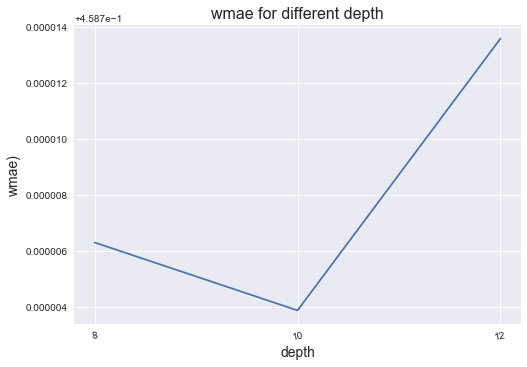

In [12]:
results_depth = {}
for i in [8,10,12]:
    result = {}
    print('\n\n\n\nrunning while depth = {}'.format(i))
    params={'booster': 'gblinear',
        'objective': 'reg:linear',
        'eta': 0.01,
        'depth': i,
        'subsample': 1.0,
        'min_child_weight': 5,
        'col_sample_bytree': 0.2,
        'seed': 0,
        'silent': 1,
        }

    watchlist = [(dataset_val, 'val'),(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=3000,early_stopping_rounds=300,evals=watchlist, feval=wmae_xgb,maximize=False)
    pred_xgb = model.predict(dataset_pre)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(labels_val, pred_xgb)
    results_depth['{}'.format(i)] = result
    
print(results_depth)          # 76 negtive rows
plot_results(results_depth, 'depth') 

In [13]:
a = pd.DataFrame(results_depth['10']['predictions'])
a[a[0]<0]

0
73     -915.918945
133  -12735.608398
153  -10598.390625
174  -14711.363281
218  -11712.276367
232   -9101.399414
237  -22549.480469
251  -15238.512695
266   -2430.082031
282   -8387.988281
365   -3014.093750
369   -5386.078125
447  -32671.406250
551   -8019.656250
552   -9974.296875
603   -6475.298828
609   -3427.617188
746   -4212.023438
757  -29714.414062
795  -12815.664062
804   -7064.617188
920  -32701.281250
921   -2181.625000
922    -483.250000
931   -4219.656250
957   -7965.789062
1017 -24660.179688
1067 -21277.195312
1104  -1469.851562
1124 -10409.859375
...            ...
1896  -3999.695312
1899 -11507.023438
1920 -15790.046875
1960  -1066.851562
1970  -8578.515625
2013   -715.507812
2070  -3580.734375
2156 -16600.367188
2175   -281.585938
2181 -88075.078125
2266  -6500.320312
2319 -12357.640625
2347  -4721.601562
2385 -28922.546875
2472  -5671.531250
2529   -574.335938
2545 -40492.781250
2610 -13437.562500
2646 -37122.125000
2673   -960.148438
2703  -6616.703125
2745 -10560.046875
2771   -787.273438
2779  -7839.429688
2781 -26499.691406
2792    -51.234375
2863  -2450.195312
2912 -10516.117188
2934 -19901.039062
2986 -21916.460938

[76 rows x 1 columns]





running while subsample = 0.4
[0]	val-wmae:5.61196	train-wmae:5.72319
Multiple eval metrics have been passed: 'train-wmae' will be used for early stopping.

Will train until train-wmae hasn't improved in 300 rounds.
[1]	val-wmae:2.65836	train-wmae:2.71477
[2]	val-wmae:1.73811	train-wmae:1.7739
[3]	val-wmae:1.31481	train-wmae:1.33863
[4]	val-wmae:1.08103	train-wmae:1.09889
[5]	val-wmae:0.937582	train-wmae:0.952137
[6]	val-wmae:0.843782	train-wmae:0.85567
[7]	val-wmae:0.779396	train-wmae:0.788746
[8]	val-wmae:0.732993	train-wmae:0.74013
[9]	val-wmae:0.698942	train-wmae:0.703717
[10]	val-wmae:0.672823	train-wmae:0.67563
[11]	val-wmae:0.652108	train-wmae:0.653342
[12]	val-wmae:0.635336	train-wmae:0.635177
[13]	val-wmae:0.621551	train-wmae:0.620107
[14]	val-wmae:0.610021	train-wmae:0.607451
[15]	val-wmae:0.600251	train-wmae:0.596642
[16]	val-wmae:0.59182	train-wmae:0.587238
[17]	val-wmae:0.584582	train-wmae:0.578984
[18]	val-wmae:0.578306	train-wmae:0.571617
[19]	val-wmae:0.572771	train

[186]	val-wmae:0.461975	train-wmae:0.347892
[187]	val-wmae:0.462041	train-wmae:0.347627
[188]	val-wmae:0.462108	train-wmae:0.347364
[189]	val-wmae:0.462174	train-wmae:0.347106
[190]	val-wmae:0.462239	train-wmae:0.346851
[191]	val-wmae:0.462305	train-wmae:0.346599
[192]	val-wmae:0.462372	train-wmae:0.346351
[193]	val-wmae:0.462442	train-wmae:0.346107
[194]	val-wmae:0.462511	train-wmae:0.345866
[195]	val-wmae:0.46258	train-wmae:0.345627
[196]	val-wmae:0.46265	train-wmae:0.345391
[197]	val-wmae:0.462722	train-wmae:0.345158
[198]	val-wmae:0.46279	train-wmae:0.344928
[199]	val-wmae:0.462859	train-wmae:0.344701
[200]	val-wmae:0.462928	train-wmae:0.344477
[201]	val-wmae:0.462999	train-wmae:0.344256
[202]	val-wmae:0.463071	train-wmae:0.344037
[203]	val-wmae:0.463143	train-wmae:0.343821
[204]	val-wmae:0.463211	train-wmae:0.343606
[205]	val-wmae:0.46328	train-wmae:0.343394
[206]	val-wmae:0.46335	train-wmae:0.343185
[207]	val-wmae:0.463423	train-wmae:0.34298
[208]	val-wmae:0.463494	train-wmae:0.3

[374]	val-wmae:0.4708	train-wmae:0.326166
[375]	val-wmae:0.470813	train-wmae:0.326111
[376]	val-wmae:0.470826	train-wmae:0.326056
[377]	val-wmae:0.47084	train-wmae:0.326001
[378]	val-wmae:0.470855	train-wmae:0.325947
[379]	val-wmae:0.47087	train-wmae:0.325894
[380]	val-wmae:0.470884	train-wmae:0.32584
[381]	val-wmae:0.470898	train-wmae:0.325787
[382]	val-wmae:0.470909	train-wmae:0.325733
[383]	val-wmae:0.47092	train-wmae:0.325678
[384]	val-wmae:0.470933	train-wmae:0.325625
[385]	val-wmae:0.470945	train-wmae:0.325572
[386]	val-wmae:0.470957	train-wmae:0.325519
[387]	val-wmae:0.470966	train-wmae:0.325466
[388]	val-wmae:0.470977	train-wmae:0.325413
[389]	val-wmae:0.470991	train-wmae:0.325362
[390]	val-wmae:0.470999	train-wmae:0.325309
[391]	val-wmae:0.471011	train-wmae:0.325258
[392]	val-wmae:0.471021	train-wmae:0.325206
[393]	val-wmae:0.471031	train-wmae:0.325155
[394]	val-wmae:0.471041	train-wmae:0.325104
[395]	val-wmae:0.471048	train-wmae:0.325051
[396]	val-wmae:0.471058	train-wmae:0.3

[562]	val-wmae:0.470653	train-wmae:0.318021
[563]	val-wmae:0.470646	train-wmae:0.317986
[564]	val-wmae:0.470637	train-wmae:0.31795
[565]	val-wmae:0.470631	train-wmae:0.317915
[566]	val-wmae:0.470622	train-wmae:0.317879
[567]	val-wmae:0.470613	train-wmae:0.317844
[568]	val-wmae:0.470604	train-wmae:0.317808
[569]	val-wmae:0.470596	train-wmae:0.317773
[570]	val-wmae:0.470589	train-wmae:0.317738
[571]	val-wmae:0.470581	train-wmae:0.317703
[572]	val-wmae:0.470572	train-wmae:0.317668
[573]	val-wmae:0.470565	train-wmae:0.317633
[574]	val-wmae:0.470556	train-wmae:0.317598
[575]	val-wmae:0.470548	train-wmae:0.317564
[576]	val-wmae:0.470538	train-wmae:0.317528
[577]	val-wmae:0.47053	train-wmae:0.317493
[578]	val-wmae:0.470521	train-wmae:0.317458
[579]	val-wmae:0.470512	train-wmae:0.317423
[580]	val-wmae:0.470503	train-wmae:0.317388
[581]	val-wmae:0.470494	train-wmae:0.317354
[582]	val-wmae:0.470487	train-wmae:0.31732
[583]	val-wmae:0.470481	train-wmae:0.317287
[584]	val-wmae:0.470473	train-wmae:

[750]	val-wmae:0.468979	train-wmae:0.312204
[751]	val-wmae:0.468972	train-wmae:0.312178
[752]	val-wmae:0.468965	train-wmae:0.312152
[753]	val-wmae:0.468956	train-wmae:0.312125
[754]	val-wmae:0.468947	train-wmae:0.312098
[755]	val-wmae:0.468939	train-wmae:0.312071
[756]	val-wmae:0.468932	train-wmae:0.312045
[757]	val-wmae:0.468923	train-wmae:0.312018
[758]	val-wmae:0.468914	train-wmae:0.311991
[759]	val-wmae:0.468905	train-wmae:0.311965
[760]	val-wmae:0.468898	train-wmae:0.311938
[761]	val-wmae:0.468892	train-wmae:0.311913
[762]	val-wmae:0.468887	train-wmae:0.311888
[763]	val-wmae:0.468878	train-wmae:0.311861
[764]	val-wmae:0.468869	train-wmae:0.311834
[765]	val-wmae:0.468861	train-wmae:0.311808
[766]	val-wmae:0.468855	train-wmae:0.311782
[767]	val-wmae:0.468849	train-wmae:0.311757
[768]	val-wmae:0.468842	train-wmae:0.311731
[769]	val-wmae:0.468833	train-wmae:0.311704
[770]	val-wmae:0.468824	train-wmae:0.311678
[771]	val-wmae:0.468817	train-wmae:0.311652
[772]	val-wmae:0.468811	train-wm

[938]	val-wmae:0.46775	train-wmae:0.307737
[939]	val-wmae:0.467744	train-wmae:0.307716
[940]	val-wmae:0.467739	train-wmae:0.307695
[941]	val-wmae:0.467735	train-wmae:0.307674
[942]	val-wmae:0.467729	train-wmae:0.307653
[943]	val-wmae:0.467724	train-wmae:0.307632
[944]	val-wmae:0.467719	train-wmae:0.307611
[945]	val-wmae:0.467713	train-wmae:0.30759
[946]	val-wmae:0.467709	train-wmae:0.307569
[947]	val-wmae:0.467704	train-wmae:0.307548
[948]	val-wmae:0.4677	train-wmae:0.307527
[949]	val-wmae:0.467695	train-wmae:0.307507
[950]	val-wmae:0.46769	train-wmae:0.307486
[951]	val-wmae:0.467685	train-wmae:0.307465
[952]	val-wmae:0.467682	train-wmae:0.307445
[953]	val-wmae:0.467677	train-wmae:0.307424
[954]	val-wmae:0.467673	train-wmae:0.307403
[955]	val-wmae:0.467668	train-wmae:0.307383
[956]	val-wmae:0.467662	train-wmae:0.307361
[957]	val-wmae:0.467657	train-wmae:0.307341
[958]	val-wmae:0.467653	train-wmae:0.30732
[959]	val-wmae:0.467648	train-wmae:0.3073
[960]	val-wmae:0.467643	train-wmae:0.307

[1123]	val-wmae:0.46698	train-wmae:0.304238
[1124]	val-wmae:0.466977	train-wmae:0.304221
[1125]	val-wmae:0.466973	train-wmae:0.304204
[1126]	val-wmae:0.46697	train-wmae:0.304187
[1127]	val-wmae:0.466967	train-wmae:0.304171
[1128]	val-wmae:0.466965	train-wmae:0.304154
[1129]	val-wmae:0.466962	train-wmae:0.304138
[1130]	val-wmae:0.466958	train-wmae:0.304121
[1131]	val-wmae:0.466955	train-wmae:0.304104
[1132]	val-wmae:0.466952	train-wmae:0.304088
[1133]	val-wmae:0.466949	train-wmae:0.304072
[1134]	val-wmae:0.466946	train-wmae:0.304055
[1135]	val-wmae:0.466942	train-wmae:0.304038
[1136]	val-wmae:0.466941	train-wmae:0.304022
[1137]	val-wmae:0.466938	train-wmae:0.304006
[1138]	val-wmae:0.466935	train-wmae:0.30399
[1139]	val-wmae:0.466931	train-wmae:0.303973
[1140]	val-wmae:0.466928	train-wmae:0.303957
[1141]	val-wmae:0.466924	train-wmae:0.30394
[1142]	val-wmae:0.466922	train-wmae:0.303924
[1143]	val-wmae:0.46692	train-wmae:0.303908
[1144]	val-wmae:0.466916	train-wmae:0.303891
[1145]	val-wmae

[1306]	val-wmae:0.466558	train-wmae:0.301493
[1307]	val-wmae:0.466556	train-wmae:0.301479
[1308]	val-wmae:0.466556	train-wmae:0.301466
[1309]	val-wmae:0.466554	train-wmae:0.301452
[1310]	val-wmae:0.466552	train-wmae:0.301439
[1311]	val-wmae:0.46655	train-wmae:0.301425
[1312]	val-wmae:0.466548	train-wmae:0.301411
[1313]	val-wmae:0.466547	train-wmae:0.301398
[1314]	val-wmae:0.466546	train-wmae:0.301385
[1315]	val-wmae:0.466545	train-wmae:0.301372
[1316]	val-wmae:0.466543	train-wmae:0.301358
[1317]	val-wmae:0.466541	train-wmae:0.301345
[1318]	val-wmae:0.46654	train-wmae:0.301331
[1319]	val-wmae:0.466539	train-wmae:0.301318
[1320]	val-wmae:0.466539	train-wmae:0.301305
[1321]	val-wmae:0.466537	train-wmae:0.301292
[1322]	val-wmae:0.466535	train-wmae:0.301278
[1323]	val-wmae:0.466534	train-wmae:0.301265
[1324]	val-wmae:0.466533	train-wmae:0.301252
[1325]	val-wmae:0.466532	train-wmae:0.301239
[1326]	val-wmae:0.46653	train-wmae:0.301225
[1327]	val-wmae:0.466528	train-wmae:0.301212
[1328]	val-wm

[1489]	val-wmae:0.466374	train-wmae:0.299254
[1490]	val-wmae:0.466373	train-wmae:0.299243
[1491]	val-wmae:0.466372	train-wmae:0.299232
[1492]	val-wmae:0.466371	train-wmae:0.299221
[1493]	val-wmae:0.46637	train-wmae:0.29921
[1494]	val-wmae:0.46637	train-wmae:0.299199
[1495]	val-wmae:0.466369	train-wmae:0.299188
[1496]	val-wmae:0.466369	train-wmae:0.299177
[1497]	val-wmae:0.466368	train-wmae:0.299166
[1498]	val-wmae:0.466367	train-wmae:0.299155
[1499]	val-wmae:0.466368	train-wmae:0.299145
[1500]	val-wmae:0.466367	train-wmae:0.299134
[1501]	val-wmae:0.466366	train-wmae:0.299123
[1502]	val-wmae:0.466365	train-wmae:0.299112
[1503]	val-wmae:0.466365	train-wmae:0.299101
[1504]	val-wmae:0.466365	train-wmae:0.299091
[1505]	val-wmae:0.466364	train-wmae:0.29908
[1506]	val-wmae:0.466363	train-wmae:0.299069
[1507]	val-wmae:0.466362	train-wmae:0.299058
[1508]	val-wmae:0.466362	train-wmae:0.299047
[1509]	val-wmae:0.466361	train-wmae:0.299036
[1510]	val-wmae:0.46636	train-wmae:0.299025
[1511]	val-wmae

[1672]	val-wmae:0.466308	train-wmae:0.297411
[1673]	val-wmae:0.466308	train-wmae:0.297402
[1674]	val-wmae:0.466308	train-wmae:0.297393
[1675]	val-wmae:0.466308	train-wmae:0.297383
[1676]	val-wmae:0.466308	train-wmae:0.297374
[1677]	val-wmae:0.466308	train-wmae:0.297365
[1678]	val-wmae:0.466308	train-wmae:0.297356
[1679]	val-wmae:0.466308	train-wmae:0.297347
[1680]	val-wmae:0.466308	train-wmae:0.297337
[1681]	val-wmae:0.466309	train-wmae:0.297328
[1682]	val-wmae:0.466309	train-wmae:0.297319
[1683]	val-wmae:0.466309	train-wmae:0.29731
[1684]	val-wmae:0.466309	train-wmae:0.297301
[1685]	val-wmae:0.466309	train-wmae:0.297292
[1686]	val-wmae:0.466309	train-wmae:0.297282
[1687]	val-wmae:0.466308	train-wmae:0.297273
[1688]	val-wmae:0.466308	train-wmae:0.297264
[1689]	val-wmae:0.466308	train-wmae:0.297255
[1690]	val-wmae:0.466308	train-wmae:0.297246
[1691]	val-wmae:0.466309	train-wmae:0.297237
[1692]	val-wmae:0.46631	train-wmae:0.297228
[1693]	val-wmae:0.46631	train-wmae:0.297219
[1694]	val-wm

[1855]	val-wmae:0.466369	train-wmae:0.295884
[1856]	val-wmae:0.46637	train-wmae:0.295877
[1857]	val-wmae:0.46637	train-wmae:0.295869
[1858]	val-wmae:0.46637	train-wmae:0.295861
[1859]	val-wmae:0.466371	train-wmae:0.295854
[1860]	val-wmae:0.466371	train-wmae:0.295846
[1861]	val-wmae:0.466372	train-wmae:0.295839
[1862]	val-wmae:0.466372	train-wmae:0.295831
[1863]	val-wmae:0.466373	train-wmae:0.295823
[1864]	val-wmae:0.466374	train-wmae:0.295816
[1865]	val-wmae:0.466374	train-wmae:0.295808
[1866]	val-wmae:0.466375	train-wmae:0.295801
[1867]	val-wmae:0.466376	train-wmae:0.295793
[1868]	val-wmae:0.466376	train-wmae:0.295786
[1869]	val-wmae:0.466376	train-wmae:0.295778
[1870]	val-wmae:0.466377	train-wmae:0.295771
[1871]	val-wmae:0.466377	train-wmae:0.295763
[1872]	val-wmae:0.466378	train-wmae:0.295756
[1873]	val-wmae:0.466379	train-wmae:0.295748
[1874]	val-wmae:0.466379	train-wmae:0.295741
[1875]	val-wmae:0.46638	train-wmae:0.295733
[1876]	val-wmae:0.46638	train-wmae:0.295726
[1877]	val-wmae

[2039]	val-wmae:0.466522	train-wmae:0.294602
[2040]	val-wmae:0.466523	train-wmae:0.294596
[2041]	val-wmae:0.466524	train-wmae:0.294589
[2042]	val-wmae:0.466525	train-wmae:0.294583
[2043]	val-wmae:0.466526	train-wmae:0.294576
[2044]	val-wmae:0.466527	train-wmae:0.29457
[2045]	val-wmae:0.466528	train-wmae:0.294564
[2046]	val-wmae:0.466529	train-wmae:0.294557
[2047]	val-wmae:0.46653	train-wmae:0.294551
[2048]	val-wmae:0.466531	train-wmae:0.294545
[2049]	val-wmae:0.466532	train-wmae:0.294538
[2050]	val-wmae:0.466534	train-wmae:0.294532
[2051]	val-wmae:0.466535	train-wmae:0.294526
[2052]	val-wmae:0.466536	train-wmae:0.29452
[2053]	val-wmae:0.466537	train-wmae:0.294513
[2054]	val-wmae:0.466538	train-wmae:0.294507
[2055]	val-wmae:0.466539	train-wmae:0.294501
[2056]	val-wmae:0.46654	train-wmae:0.294494
[2057]	val-wmae:0.466541	train-wmae:0.294488
[2058]	val-wmae:0.466543	train-wmae:0.294482
[2059]	val-wmae:0.466544	train-wmae:0.294476
[2060]	val-wmae:0.466545	train-wmae:0.29447
[2061]	val-wmae

[2223]	val-wmae:0.466729	train-wmae:0.293524
[2224]	val-wmae:0.46673	train-wmae:0.293519
[2225]	val-wmae:0.466731	train-wmae:0.293513
[2226]	val-wmae:0.466732	train-wmae:0.293508
[2227]	val-wmae:0.466734	train-wmae:0.293503
[2228]	val-wmae:0.466735	train-wmae:0.293498
[2229]	val-wmae:0.466736	train-wmae:0.293492
[2230]	val-wmae:0.466738	train-wmae:0.293487
[2231]	val-wmae:0.466739	train-wmae:0.293482
[2232]	val-wmae:0.46674	train-wmae:0.293477
[2233]	val-wmae:0.466741	train-wmae:0.293471
[2234]	val-wmae:0.466742	train-wmae:0.293466
[2235]	val-wmae:0.466744	train-wmae:0.293461
[2236]	val-wmae:0.466745	train-wmae:0.293455
[2237]	val-wmae:0.466746	train-wmae:0.29345
[2238]	val-wmae:0.466747	train-wmae:0.293445
[2239]	val-wmae:0.466748	train-wmae:0.293439
[2240]	val-wmae:0.46675	train-wmae:0.293434
[2241]	val-wmae:0.466751	train-wmae:0.293429
[2242]	val-wmae:0.466752	train-wmae:0.293424
[2243]	val-wmae:0.466753	train-wmae:0.293418
[2244]	val-wmae:0.466754	train-wmae:0.293413
[2245]	val-wma

[2406]	val-wmae:0.466976	train-wmae:0.292627
[2407]	val-wmae:0.466978	train-wmae:0.292622
[2408]	val-wmae:0.466979	train-wmae:0.292618
[2409]	val-wmae:0.466981	train-wmae:0.292613
[2410]	val-wmae:0.466982	train-wmae:0.292609
[2411]	val-wmae:0.466984	train-wmae:0.292604
[2412]	val-wmae:0.466985	train-wmae:0.2926
[2413]	val-wmae:0.466987	train-wmae:0.292595
[2414]	val-wmae:0.466988	train-wmae:0.292591
[2415]	val-wmae:0.46699	train-wmae:0.292586
[2416]	val-wmae:0.466991	train-wmae:0.292582
[2417]	val-wmae:0.466992	train-wmae:0.292577
[2418]	val-wmae:0.466994	train-wmae:0.292573
[2419]	val-wmae:0.466995	train-wmae:0.292568
[2420]	val-wmae:0.466997	train-wmae:0.292564
[2421]	val-wmae:0.466998	train-wmae:0.292559
[2422]	val-wmae:0.467	train-wmae:0.292555
[2423]	val-wmae:0.467001	train-wmae:0.29255
[2424]	val-wmae:0.467003	train-wmae:0.292546
[2425]	val-wmae:0.467004	train-wmae:0.292542
[2426]	val-wmae:0.467005	train-wmae:0.292537
[2427]	val-wmae:0.467007	train-wmae:0.292533
[2428]	val-wmae:0

[2590]	val-wmae:0.467253	train-wmae:0.291864
[2591]	val-wmae:0.467255	train-wmae:0.29186
[2592]	val-wmae:0.467256	train-wmae:0.291856
[2593]	val-wmae:0.467258	train-wmae:0.291852
[2594]	val-wmae:0.467259	train-wmae:0.291848
[2595]	val-wmae:0.467261	train-wmae:0.291845
[2596]	val-wmae:0.467262	train-wmae:0.291841
[2597]	val-wmae:0.467264	train-wmae:0.291837
[2598]	val-wmae:0.467265	train-wmae:0.291833
[2599]	val-wmae:0.467267	train-wmae:0.291829
[2600]	val-wmae:0.467268	train-wmae:0.291826
[2601]	val-wmae:0.46727	train-wmae:0.291822
[2602]	val-wmae:0.467271	train-wmae:0.291818
[2603]	val-wmae:0.467273	train-wmae:0.291814
[2604]	val-wmae:0.467274	train-wmae:0.29181
[2605]	val-wmae:0.467275	train-wmae:0.291806
[2606]	val-wmae:0.467277	train-wmae:0.291802
[2607]	val-wmae:0.467278	train-wmae:0.291799
[2608]	val-wmae:0.46728	train-wmae:0.291795
[2609]	val-wmae:0.467282	train-wmae:0.291791
[2610]	val-wmae:0.467283	train-wmae:0.291787
[2611]	val-wmae:0.467285	train-wmae:0.291783
[2612]	val-wma

[2773]	val-wmae:0.467532	train-wmae:0.291205
[2774]	val-wmae:0.467533	train-wmae:0.291201
[2775]	val-wmae:0.467535	train-wmae:0.291198
[2776]	val-wmae:0.467536	train-wmae:0.291195
[2777]	val-wmae:0.467538	train-wmae:0.291191
[2778]	val-wmae:0.467539	train-wmae:0.291188
[2779]	val-wmae:0.467541	train-wmae:0.291185
[2780]	val-wmae:0.467542	train-wmae:0.291181
[2781]	val-wmae:0.467544	train-wmae:0.291178
[2782]	val-wmae:0.467545	train-wmae:0.291175
[2783]	val-wmae:0.467547	train-wmae:0.291171
[2784]	val-wmae:0.467548	train-wmae:0.291168
[2785]	val-wmae:0.46755	train-wmae:0.291165
[2786]	val-wmae:0.467551	train-wmae:0.291161
[2787]	val-wmae:0.467553	train-wmae:0.291158
[2788]	val-wmae:0.467555	train-wmae:0.291155
[2789]	val-wmae:0.467556	train-wmae:0.291151
[2790]	val-wmae:0.467558	train-wmae:0.291148
[2791]	val-wmae:0.467559	train-wmae:0.291145
[2792]	val-wmae:0.467561	train-wmae:0.291142
[2793]	val-wmae:0.467562	train-wmae:0.291138
[2794]	val-wmae:0.467564	train-wmae:0.291135
[2795]	val-

[2956]	val-wmae:0.46782	train-wmae:0.290631
[2957]	val-wmae:0.467822	train-wmae:0.290628
[2958]	val-wmae:0.467823	train-wmae:0.290625
[2959]	val-wmae:0.467825	train-wmae:0.290622
[2960]	val-wmae:0.467827	train-wmae:0.290619
[2961]	val-wmae:0.467828	train-wmae:0.290616
[2962]	val-wmae:0.46783	train-wmae:0.290613
[2963]	val-wmae:0.467831	train-wmae:0.29061
[2964]	val-wmae:0.467833	train-wmae:0.290607
[2965]	val-wmae:0.467835	train-wmae:0.290604
[2966]	val-wmae:0.467836	train-wmae:0.290602
[2967]	val-wmae:0.467838	train-wmae:0.290599
[2968]	val-wmae:0.467839	train-wmae:0.290596
[2969]	val-wmae:0.467841	train-wmae:0.290593
[2970]	val-wmae:0.467843	train-wmae:0.29059
[2971]	val-wmae:0.467845	train-wmae:0.290587
[2972]	val-wmae:0.467846	train-wmae:0.290584
[2973]	val-wmae:0.467848	train-wmae:0.290581
[2974]	val-wmae:0.467849	train-wmae:0.290578
[2975]	val-wmae:0.467851	train-wmae:0.290575
[2976]	val-wmae:0.467853	train-wmae:0.290572
[2977]	val-wmae:0.467854	train-wmae:0.290569
[2978]	val-wma

[141]	val-wmae:0.460821	train-wmae:0.364567
[142]	val-wmae:0.460794	train-wmae:0.364069
[143]	val-wmae:0.460771	train-wmae:0.363578
[144]	val-wmae:0.460755	train-wmae:0.363095
[145]	val-wmae:0.460747	train-wmae:0.362621
[146]	val-wmae:0.46074	train-wmae:0.362153
[147]	val-wmae:0.460736	train-wmae:0.361692
[148]	val-wmae:0.460732	train-wmae:0.361238
[149]	val-wmae:0.460733	train-wmae:0.360791
[150]	val-wmae:0.460731	train-wmae:0.360349
[151]	val-wmae:0.460731	train-wmae:0.359913
[152]	val-wmae:0.460735	train-wmae:0.359483
[153]	val-wmae:0.460742	train-wmae:0.359059
[154]	val-wmae:0.460751	train-wmae:0.358641
[155]	val-wmae:0.460762	train-wmae:0.358234
[156]	val-wmae:0.460776	train-wmae:0.357832
[157]	val-wmae:0.460789	train-wmae:0.357435
[158]	val-wmae:0.460806	train-wmae:0.357042
[159]	val-wmae:0.460828	train-wmae:0.356655
[160]	val-wmae:0.460852	train-wmae:0.356273
[161]	val-wmae:0.460876	train-wmae:0.355897
[162]	val-wmae:0.4609	train-wmae:0.355525
[163]	val-wmae:0.460926	train-wmae:

[329]	val-wmae:0.46998	train-wmae:0.328958
[330]	val-wmae:0.470006	train-wmae:0.328889
[331]	val-wmae:0.470032	train-wmae:0.328821
[332]	val-wmae:0.470057	train-wmae:0.328752
[333]	val-wmae:0.470084	train-wmae:0.328686
[334]	val-wmae:0.47011	train-wmae:0.328619
[335]	val-wmae:0.470135	train-wmae:0.328552
[336]	val-wmae:0.470161	train-wmae:0.328487
[337]	val-wmae:0.470185	train-wmae:0.328421
[338]	val-wmae:0.470208	train-wmae:0.328355
[339]	val-wmae:0.470236	train-wmae:0.328291
[340]	val-wmae:0.470263	train-wmae:0.328228
[341]	val-wmae:0.470288	train-wmae:0.328164
[342]	val-wmae:0.470308	train-wmae:0.328099
[343]	val-wmae:0.470329	train-wmae:0.328035
[344]	val-wmae:0.47035	train-wmae:0.327971
[345]	val-wmae:0.470373	train-wmae:0.327908
[346]	val-wmae:0.470395	train-wmae:0.327846
[347]	val-wmae:0.470415	train-wmae:0.327783
[348]	val-wmae:0.470436	train-wmae:0.32772
[349]	val-wmae:0.470456	train-wmae:0.327658
[350]	val-wmae:0.470478	train-wmae:0.327597
[351]	val-wmae:0.470499	train-wmae:0

[517]	val-wmae:0.47106	train-wmae:0.319731
[518]	val-wmae:0.471054	train-wmae:0.319693
[519]	val-wmae:0.471046	train-wmae:0.319653
[520]	val-wmae:0.471038	train-wmae:0.319614
[521]	val-wmae:0.471032	train-wmae:0.319575
[522]	val-wmae:0.471024	train-wmae:0.319536
[523]	val-wmae:0.471017	train-wmae:0.319497
[524]	val-wmae:0.471009	train-wmae:0.319458
[525]	val-wmae:0.471002	train-wmae:0.319419
[526]	val-wmae:0.470997	train-wmae:0.319382
[527]	val-wmae:0.470992	train-wmae:0.319344
[528]	val-wmae:0.470984	train-wmae:0.319306
[529]	val-wmae:0.470977	train-wmae:0.319267
[530]	val-wmae:0.470972	train-wmae:0.319231
[531]	val-wmae:0.470965	train-wmae:0.319192
[532]	val-wmae:0.470956	train-wmae:0.319154
[533]	val-wmae:0.47095	train-wmae:0.319117
[534]	val-wmae:0.470942	train-wmae:0.319079
[535]	val-wmae:0.470936	train-wmae:0.319041
[536]	val-wmae:0.470931	train-wmae:0.319005
[537]	val-wmae:0.470924	train-wmae:0.318968
[538]	val-wmae:0.470915	train-wmae:0.318929
[539]	val-wmae:0.470906	train-wmae

[705]	val-wmae:0.469424	train-wmae:0.313473
[706]	val-wmae:0.469414	train-wmae:0.313444
[707]	val-wmae:0.469405	train-wmae:0.313415
[708]	val-wmae:0.469395	train-wmae:0.313387
[709]	val-wmae:0.469387	train-wmae:0.313359
[710]	val-wmae:0.469377	train-wmae:0.31333
[711]	val-wmae:0.469369	train-wmae:0.313302
[712]	val-wmae:0.469361	train-wmae:0.313273
[713]	val-wmae:0.469351	train-wmae:0.313245
[714]	val-wmae:0.469341	train-wmae:0.313216
[715]	val-wmae:0.469332	train-wmae:0.313188
[716]	val-wmae:0.469323	train-wmae:0.313159
[717]	val-wmae:0.469313	train-wmae:0.313131
[718]	val-wmae:0.469307	train-wmae:0.313104
[719]	val-wmae:0.469298	train-wmae:0.313076
[720]	val-wmae:0.46929	train-wmae:0.313048
[721]	val-wmae:0.46928	train-wmae:0.31302
[722]	val-wmae:0.469272	train-wmae:0.312992
[723]	val-wmae:0.469262	train-wmae:0.312964
[724]	val-wmae:0.469255	train-wmae:0.312937
[725]	val-wmae:0.469246	train-wmae:0.312909
[726]	val-wmae:0.469238	train-wmae:0.312881
[727]	val-wmae:0.469228	train-wmae:0

[893]	val-wmae:0.468052	train-wmae:0.308735
[894]	val-wmae:0.468048	train-wmae:0.308713
[895]	val-wmae:0.468042	train-wmae:0.308691
[896]	val-wmae:0.468035	train-wmae:0.308668
[897]	val-wmae:0.468029	train-wmae:0.308645
[898]	val-wmae:0.468023	train-wmae:0.308623
[899]	val-wmae:0.468016	train-wmae:0.3086
[900]	val-wmae:0.46801	train-wmae:0.308578
[901]	val-wmae:0.468003	train-wmae:0.308555
[902]	val-wmae:0.467999	train-wmae:0.308533
[903]	val-wmae:0.467992	train-wmae:0.308511
[904]	val-wmae:0.467986	train-wmae:0.308488
[905]	val-wmae:0.467981	train-wmae:0.308467
[906]	val-wmae:0.467975	train-wmae:0.308445
[907]	val-wmae:0.467969	train-wmae:0.308422
[908]	val-wmae:0.467963	train-wmae:0.3084
[909]	val-wmae:0.467959	train-wmae:0.308379
[910]	val-wmae:0.467954	train-wmae:0.308358
[911]	val-wmae:0.467948	train-wmae:0.308336
[912]	val-wmae:0.467943	train-wmae:0.308314
[913]	val-wmae:0.467937	train-wmae:0.308292
[914]	val-wmae:0.467931	train-wmae:0.30827
[915]	val-wmae:0.467926	train-wmae:0.3

[1079]	val-wmae:0.46718	train-wmae:0.305016
[1080]	val-wmae:0.467177	train-wmae:0.304999
[1081]	val-wmae:0.467175	train-wmae:0.304982
[1082]	val-wmae:0.467171	train-wmae:0.304964
[1083]	val-wmae:0.467166	train-wmae:0.304945
[1084]	val-wmae:0.467162	train-wmae:0.304927
[1085]	val-wmae:0.467158	train-wmae:0.304909
[1086]	val-wmae:0.467155	train-wmae:0.304892
[1087]	val-wmae:0.467151	train-wmae:0.304874
[1088]	val-wmae:0.467147	train-wmae:0.304856
[1089]	val-wmae:0.467144	train-wmae:0.304839
[1090]	val-wmae:0.46714	train-wmae:0.304821
[1091]	val-wmae:0.467137	train-wmae:0.304804
[1092]	val-wmae:0.467134	train-wmae:0.304786
[1093]	val-wmae:0.46713	train-wmae:0.304768
[1094]	val-wmae:0.467126	train-wmae:0.304751
[1095]	val-wmae:0.467122	train-wmae:0.304733
[1096]	val-wmae:0.467119	train-wmae:0.304716
[1097]	val-wmae:0.467115	train-wmae:0.304698
[1098]	val-wmae:0.467112	train-wmae:0.304681
[1099]	val-wmae:0.467108	train-wmae:0.304663
[1100]	val-wmae:0.467104	train-wmae:0.304645
[1101]	val-wm

[1263]	val-wmae:0.466671	train-wmae:0.302101
[1264]	val-wmae:0.466669	train-wmae:0.302086
[1265]	val-wmae:0.466666	train-wmae:0.302072
[1266]	val-wmae:0.466666	train-wmae:0.302058
[1267]	val-wmae:0.466664	train-wmae:0.302044
[1268]	val-wmae:0.466662	train-wmae:0.30203
[1269]	val-wmae:0.46666	train-wmae:0.302016
[1270]	val-wmae:0.466657	train-wmae:0.302002
[1271]	val-wmae:0.466656	train-wmae:0.301988
[1272]	val-wmae:0.466654	train-wmae:0.301974
[1273]	val-wmae:0.466652	train-wmae:0.30196
[1274]	val-wmae:0.46665	train-wmae:0.301946
[1275]	val-wmae:0.466648	train-wmae:0.301932
[1276]	val-wmae:0.466647	train-wmae:0.301919
[1277]	val-wmae:0.466645	train-wmae:0.301904
[1278]	val-wmae:0.466643	train-wmae:0.30189
[1279]	val-wmae:0.46664	train-wmae:0.301876
[1280]	val-wmae:0.466638	train-wmae:0.301862
[1281]	val-wmae:0.466637	train-wmae:0.301848
[1282]	val-wmae:0.466635	train-wmae:0.301834
[1283]	val-wmae:0.466634	train-wmae:0.30182
[1284]	val-wmae:0.466632	train-wmae:0.301807
[1285]	val-wmae:0

[1446]	val-wmae:0.466443	train-wmae:0.299752
[1447]	val-wmae:0.466441	train-wmae:0.29974
[1448]	val-wmae:0.46644	train-wmae:0.299728
[1449]	val-wmae:0.466439	train-wmae:0.299717
[1450]	val-wmae:0.466438	train-wmae:0.299705
[1451]	val-wmae:0.466437	train-wmae:0.299694
[1452]	val-wmae:0.466437	train-wmae:0.299682
[1453]	val-wmae:0.466436	train-wmae:0.29967
[1454]	val-wmae:0.466434	train-wmae:0.299659
[1455]	val-wmae:0.466434	train-wmae:0.299647
[1456]	val-wmae:0.466433	train-wmae:0.299636
[1457]	val-wmae:0.466432	train-wmae:0.299624
[1458]	val-wmae:0.466433	train-wmae:0.299614
[1459]	val-wmae:0.466432	train-wmae:0.299602
[1460]	val-wmae:0.466431	train-wmae:0.299591
[1461]	val-wmae:0.46643	train-wmae:0.299579
[1462]	val-wmae:0.466428	train-wmae:0.299568
[1463]	val-wmae:0.466428	train-wmae:0.299556
[1464]	val-wmae:0.466427	train-wmae:0.299545
[1465]	val-wmae:0.466427	train-wmae:0.299534
[1466]	val-wmae:0.466427	train-wmae:0.299523
[1467]	val-wmae:0.466426	train-wmae:0.299511
[1468]	val-wma

[1629]	val-wmae:0.466342	train-wmae:0.297824
[1630]	val-wmae:0.466341	train-wmae:0.297814
[1631]	val-wmae:0.466341	train-wmae:0.297804
[1632]	val-wmae:0.46634	train-wmae:0.297795
[1633]	val-wmae:0.466341	train-wmae:0.297785
[1634]	val-wmae:0.466341	train-wmae:0.297776
[1635]	val-wmae:0.466341	train-wmae:0.297766
[1636]	val-wmae:0.466341	train-wmae:0.297757
[1637]	val-wmae:0.466341	train-wmae:0.297748
[1638]	val-wmae:0.46634	train-wmae:0.297738
[1639]	val-wmae:0.46634	train-wmae:0.297729
[1640]	val-wmae:0.46634	train-wmae:0.297719
[1641]	val-wmae:0.46634	train-wmae:0.29771
[1642]	val-wmae:0.46634	train-wmae:0.2977
[1643]	val-wmae:0.46634	train-wmae:0.297691
[1644]	val-wmae:0.466339	train-wmae:0.297681
[1645]	val-wmae:0.466339	train-wmae:0.297672
[1646]	val-wmae:0.466339	train-wmae:0.297662
[1647]	val-wmae:0.46634	train-wmae:0.297653
[1648]	val-wmae:0.46634	train-wmae:0.297644
[1649]	val-wmae:0.466339	train-wmae:0.297634
[1650]	val-wmae:0.466339	train-wmae:0.297625
[1651]	val-wmae:0.4663

[1812]	val-wmae:0.466376	train-wmae:0.296226
[1813]	val-wmae:0.466376	train-wmae:0.296218
[1814]	val-wmae:0.466376	train-wmae:0.29621
[1815]	val-wmae:0.466377	train-wmae:0.296203
[1816]	val-wmae:0.466378	train-wmae:0.296195
[1817]	val-wmae:0.466379	train-wmae:0.296187
[1818]	val-wmae:0.46638	train-wmae:0.29618
[1819]	val-wmae:0.46638	train-wmae:0.296171
[1820]	val-wmae:0.466381	train-wmae:0.296164
[1821]	val-wmae:0.466381	train-wmae:0.296156
[1822]	val-wmae:0.466381	train-wmae:0.296148
[1823]	val-wmae:0.466382	train-wmae:0.29614
[1824]	val-wmae:0.466382	train-wmae:0.296132
[1825]	val-wmae:0.466382	train-wmae:0.296124
[1826]	val-wmae:0.466383	train-wmae:0.296116
[1827]	val-wmae:0.466384	train-wmae:0.296109
[1828]	val-wmae:0.466384	train-wmae:0.296101
[1829]	val-wmae:0.466384	train-wmae:0.296093
[1830]	val-wmae:0.466385	train-wmae:0.296085
[1831]	val-wmae:0.466385	train-wmae:0.296077
[1832]	val-wmae:0.466385	train-wmae:0.296069
[1833]	val-wmae:0.466386	train-wmae:0.296061
[1834]	val-wmae

[1996]	val-wmae:0.466505	train-wmae:0.294891
[1997]	val-wmae:0.466506	train-wmae:0.294884
[1998]	val-wmae:0.466507	train-wmae:0.294877
[1999]	val-wmae:0.466508	train-wmae:0.294871
[2000]	val-wmae:0.466509	train-wmae:0.294864
[2001]	val-wmae:0.46651	train-wmae:0.294857
[2002]	val-wmae:0.466511	train-wmae:0.294851
[2003]	val-wmae:0.466512	train-wmae:0.294844
[2004]	val-wmae:0.466513	train-wmae:0.294837
[2005]	val-wmae:0.466514	train-wmae:0.294831
[2006]	val-wmae:0.466515	train-wmae:0.294824
[2007]	val-wmae:0.466516	train-wmae:0.294818
[2008]	val-wmae:0.466517	train-wmae:0.294811
[2009]	val-wmae:0.466519	train-wmae:0.294804
[2010]	val-wmae:0.46652	train-wmae:0.294798
[2011]	val-wmae:0.466521	train-wmae:0.294791
[2012]	val-wmae:0.466522	train-wmae:0.294785
[2013]	val-wmae:0.466523	train-wmae:0.294778
[2014]	val-wmae:0.466524	train-wmae:0.294772
[2015]	val-wmae:0.466525	train-wmae:0.294765
[2016]	val-wmae:0.466526	train-wmae:0.294758
[2017]	val-wmae:0.466527	train-wmae:0.294752
[2018]	val-w

[2179]	val-wmae:0.466705	train-wmae:0.293772
[2180]	val-wmae:0.466706	train-wmae:0.293766
[2181]	val-wmae:0.466708	train-wmae:0.293761
[2182]	val-wmae:0.466709	train-wmae:0.293755
[2183]	val-wmae:0.46671	train-wmae:0.29375
[2184]	val-wmae:0.466711	train-wmae:0.293744
[2185]	val-wmae:0.466712	train-wmae:0.293738
[2186]	val-wmae:0.466713	train-wmae:0.293733
[2187]	val-wmae:0.466714	train-wmae:0.293727
[2188]	val-wmae:0.466715	train-wmae:0.293722
[2189]	val-wmae:0.466716	train-wmae:0.293716
[2190]	val-wmae:0.466718	train-wmae:0.293711
[2191]	val-wmae:0.466719	train-wmae:0.293705
[2192]	val-wmae:0.46672	train-wmae:0.293699
[2193]	val-wmae:0.466721	train-wmae:0.293694
[2194]	val-wmae:0.466722	train-wmae:0.293688
[2195]	val-wmae:0.466723	train-wmae:0.293683
[2196]	val-wmae:0.466724	train-wmae:0.293677
[2197]	val-wmae:0.466725	train-wmae:0.293672
[2198]	val-wmae:0.466727	train-wmae:0.293666
[2199]	val-wmae:0.466728	train-wmae:0.293661
[2200]	val-wmae:0.466729	train-wmae:0.293656
[2201]	val-wm

[2363]	val-wmae:0.466939	train-wmae:0.292831
[2364]	val-wmae:0.46694	train-wmae:0.292826
[2365]	val-wmae:0.466942	train-wmae:0.292821
[2366]	val-wmae:0.466943	train-wmae:0.292817
[2367]	val-wmae:0.466945	train-wmae:0.292812
[2368]	val-wmae:0.466946	train-wmae:0.292807
[2369]	val-wmae:0.466948	train-wmae:0.292803
[2370]	val-wmae:0.46695	train-wmae:0.292798
[2371]	val-wmae:0.466951	train-wmae:0.292794
[2372]	val-wmae:0.466952	train-wmae:0.292789
[2373]	val-wmae:0.466954	train-wmae:0.292784
[2374]	val-wmae:0.466955	train-wmae:0.29278
[2375]	val-wmae:0.466957	train-wmae:0.292775
[2376]	val-wmae:0.466958	train-wmae:0.29277
[2377]	val-wmae:0.46696	train-wmae:0.292766
[2378]	val-wmae:0.466961	train-wmae:0.292761
[2379]	val-wmae:0.466962	train-wmae:0.292756
[2380]	val-wmae:0.466964	train-wmae:0.292752
[2381]	val-wmae:0.466965	train-wmae:0.292747
[2382]	val-wmae:0.466967	train-wmae:0.292742
[2383]	val-wmae:0.466968	train-wmae:0.292738
[2384]	val-wmae:0.46697	train-wmae:0.292733
[2385]	val-wmae:

[2547]	val-wmae:0.467212	train-wmae:0.292037
[2548]	val-wmae:0.467213	train-wmae:0.292033
[2549]	val-wmae:0.467214	train-wmae:0.292029
[2550]	val-wmae:0.467216	train-wmae:0.292025
[2551]	val-wmae:0.467217	train-wmae:0.292021
[2552]	val-wmae:0.467219	train-wmae:0.292017
[2553]	val-wmae:0.46722	train-wmae:0.292013
[2554]	val-wmae:0.467222	train-wmae:0.292009
[2555]	val-wmae:0.467223	train-wmae:0.292005
[2556]	val-wmae:0.467225	train-wmae:0.292001
[2557]	val-wmae:0.467226	train-wmae:0.291997
[2558]	val-wmae:0.467228	train-wmae:0.291994
[2559]	val-wmae:0.467229	train-wmae:0.29199
[2560]	val-wmae:0.467231	train-wmae:0.291986
[2561]	val-wmae:0.467232	train-wmae:0.291982
[2562]	val-wmae:0.467234	train-wmae:0.291978
[2563]	val-wmae:0.467235	train-wmae:0.291974
[2564]	val-wmae:0.467237	train-wmae:0.29197
[2565]	val-wmae:0.467238	train-wmae:0.291966
[2566]	val-wmae:0.46724	train-wmae:0.291962
[2567]	val-wmae:0.467241	train-wmae:0.291958
[2568]	val-wmae:0.467243	train-wmae:0.291954
[2569]	val-wma

[2730]	val-wmae:0.467488	train-wmae:0.291357
[2731]	val-wmae:0.467489	train-wmae:0.291353
[2732]	val-wmae:0.46749	train-wmae:0.29135
[2733]	val-wmae:0.467492	train-wmae:0.291346
[2734]	val-wmae:0.467493	train-wmae:0.291343
[2735]	val-wmae:0.467495	train-wmae:0.291339
[2736]	val-wmae:0.467496	train-wmae:0.291336
[2737]	val-wmae:0.467498	train-wmae:0.291332
[2738]	val-wmae:0.4675	train-wmae:0.291329
[2739]	val-wmae:0.467501	train-wmae:0.291326
[2740]	val-wmae:0.467503	train-wmae:0.291322
[2741]	val-wmae:0.467504	train-wmae:0.291319
[2742]	val-wmae:0.467506	train-wmae:0.291315
[2743]	val-wmae:0.467507	train-wmae:0.291312
[2744]	val-wmae:0.467509	train-wmae:0.291308
[2745]	val-wmae:0.46751	train-wmae:0.291305
[2746]	val-wmae:0.467512	train-wmae:0.291301
[2747]	val-wmae:0.467513	train-wmae:0.291298
[2748]	val-wmae:0.467515	train-wmae:0.291295
[2749]	val-wmae:0.467516	train-wmae:0.291291
[2750]	val-wmae:0.467518	train-wmae:0.291288
[2751]	val-wmae:0.467519	train-wmae:0.291284
[2752]	val-wmae

[2914]	val-wmae:0.467772	train-wmae:0.290762
[2915]	val-wmae:0.467773	train-wmae:0.290759
[2916]	val-wmae:0.467775	train-wmae:0.290756
[2917]	val-wmae:0.467776	train-wmae:0.290752
[2918]	val-wmae:0.467778	train-wmae:0.29075
[2919]	val-wmae:0.46778	train-wmae:0.290747
[2920]	val-wmae:0.467781	train-wmae:0.290744
[2921]	val-wmae:0.467783	train-wmae:0.29074
[2922]	val-wmae:0.467785	train-wmae:0.290737
[2923]	val-wmae:0.467786	train-wmae:0.290734
[2924]	val-wmae:0.467788	train-wmae:0.290731
[2925]	val-wmae:0.46779	train-wmae:0.290728
[2926]	val-wmae:0.467791	train-wmae:0.290725
[2927]	val-wmae:0.467793	train-wmae:0.290722
[2928]	val-wmae:0.467794	train-wmae:0.290719
[2929]	val-wmae:0.467796	train-wmae:0.290716
[2930]	val-wmae:0.467798	train-wmae:0.290713
[2931]	val-wmae:0.4678	train-wmae:0.29071
[2932]	val-wmae:0.467801	train-wmae:0.290707
[2933]	val-wmae:0.467803	train-wmae:0.290704
[2934]	val-wmae:0.467804	train-wmae:0.290701
[2935]	val-wmae:0.467806	train-wmae:0.290698
[2936]	val-wmae:0

[98]	val-wmae:0.467313	train-wmae:0.395075
[99]	val-wmae:0.467005	train-wmae:0.394111
[100]	val-wmae:0.466714	train-wmae:0.393162
[101]	val-wmae:0.466436	train-wmae:0.392228
[102]	val-wmae:0.466162	train-wmae:0.391311
[103]	val-wmae:0.465899	train-wmae:0.390407
[104]	val-wmae:0.465644	train-wmae:0.389516
[105]	val-wmae:0.465393	train-wmae:0.388637
[106]	val-wmae:0.46515	train-wmae:0.387771
[107]	val-wmae:0.464925	train-wmae:0.386922
[108]	val-wmae:0.464709	train-wmae:0.386085
[109]	val-wmae:0.4645	train-wmae:0.385259
[110]	val-wmae:0.464299	train-wmae:0.384443
[111]	val-wmae:0.464103	train-wmae:0.383641
[112]	val-wmae:0.463913	train-wmae:0.382855
[113]	val-wmae:0.46373	train-wmae:0.38208
[114]	val-wmae:0.463547	train-wmae:0.381316
[115]	val-wmae:0.463371	train-wmae:0.380563
[116]	val-wmae:0.463202	train-wmae:0.379825
[117]	val-wmae:0.463038	train-wmae:0.379098
[118]	val-wmae:0.462878	train-wmae:0.37838
[119]	val-wmae:0.462726	train-wmae:0.377675
[120]	val-wmae:0.462581	train-wmae:0.376

[286]	val-wmae:0.468468	train-wmae:0.332362
[287]	val-wmae:0.468515	train-wmae:0.332271
[288]	val-wmae:0.46856	train-wmae:0.33218
[289]	val-wmae:0.46861	train-wmae:0.332092
[290]	val-wmae:0.468657	train-wmae:0.332004
[291]	val-wmae:0.468701	train-wmae:0.331915
[292]	val-wmae:0.468743	train-wmae:0.331827
[293]	val-wmae:0.468786	train-wmae:0.331741
[294]	val-wmae:0.468827	train-wmae:0.331654
[295]	val-wmae:0.468869	train-wmae:0.331568
[296]	val-wmae:0.468909	train-wmae:0.331483
[297]	val-wmae:0.46895	train-wmae:0.331399
[298]	val-wmae:0.468995	train-wmae:0.331317
[299]	val-wmae:0.469034	train-wmae:0.331233
[300]	val-wmae:0.469075	train-wmae:0.331152
[301]	val-wmae:0.469116	train-wmae:0.331072
[302]	val-wmae:0.469154	train-wmae:0.33099
[303]	val-wmae:0.469192	train-wmae:0.33091
[304]	val-wmae:0.46923	train-wmae:0.330831
[305]	val-wmae:0.469268	train-wmae:0.330752
[306]	val-wmae:0.469304	train-wmae:0.330672
[307]	val-wmae:0.469342	train-wmae:0.330595
[308]	val-wmae:0.46938	train-wmae:0.330

[473]	val-wmae:0.471318	train-wmae:0.321533
[474]	val-wmae:0.471314	train-wmae:0.321491
[475]	val-wmae:0.471313	train-wmae:0.321449
[476]	val-wmae:0.471308	train-wmae:0.321407
[477]	val-wmae:0.471303	train-wmae:0.321364
[478]	val-wmae:0.471299	train-wmae:0.321322
[479]	val-wmae:0.471298	train-wmae:0.321281
[480]	val-wmae:0.471294	train-wmae:0.32124
[481]	val-wmae:0.471292	train-wmae:0.321198
[482]	val-wmae:0.471288	train-wmae:0.321157
[483]	val-wmae:0.471283	train-wmae:0.321115
[484]	val-wmae:0.471278	train-wmae:0.321073
[485]	val-wmae:0.471274	train-wmae:0.321032
[486]	val-wmae:0.471269	train-wmae:0.32099
[487]	val-wmae:0.471267	train-wmae:0.32095
[488]	val-wmae:0.471264	train-wmae:0.32091
[489]	val-wmae:0.471261	train-wmae:0.32087
[490]	val-wmae:0.471257	train-wmae:0.320829
[491]	val-wmae:0.471255	train-wmae:0.32079
[492]	val-wmae:0.47125	train-wmae:0.320749
[493]	val-wmae:0.471247	train-wmae:0.320709
[494]	val-wmae:0.471242	train-wmae:0.320669
[495]	val-wmae:0.471236	train-wmae:0.32

[661]	val-wmae:0.469885	train-wmae:0.314796
[662]	val-wmae:0.469875	train-wmae:0.314766
[663]	val-wmae:0.469866	train-wmae:0.314735
[664]	val-wmae:0.469856	train-wmae:0.314705
[665]	val-wmae:0.469846	train-wmae:0.314674
[666]	val-wmae:0.469835	train-wmae:0.314643
[667]	val-wmae:0.469825	train-wmae:0.314612
[668]	val-wmae:0.469814	train-wmae:0.314581
[669]	val-wmae:0.469806	train-wmae:0.314551
[670]	val-wmae:0.469796	train-wmae:0.314521
[671]	val-wmae:0.469787	train-wmae:0.314491
[672]	val-wmae:0.469776	train-wmae:0.31446
[673]	val-wmae:0.469766	train-wmae:0.31443
[674]	val-wmae:0.469756	train-wmae:0.3144
[675]	val-wmae:0.469747	train-wmae:0.31437
[676]	val-wmae:0.469739	train-wmae:0.314341
[677]	val-wmae:0.469731	train-wmae:0.314311
[678]	val-wmae:0.469721	train-wmae:0.314281
[679]	val-wmae:0.469711	train-wmae:0.314251
[680]	val-wmae:0.469705	train-wmae:0.314223
[681]	val-wmae:0.469696	train-wmae:0.314193
[682]	val-wmae:0.469687	train-wmae:0.314164
[683]	val-wmae:0.469677	train-wmae:0.

[849]	val-wmae:0.468353	train-wmae:0.30976
[850]	val-wmae:0.468346	train-wmae:0.309736
[851]	val-wmae:0.468339	train-wmae:0.309713
[852]	val-wmae:0.468333	train-wmae:0.309689
[853]	val-wmae:0.468329	train-wmae:0.309667
[854]	val-wmae:0.468324	train-wmae:0.309644
[855]	val-wmae:0.468316	train-wmae:0.30962
[856]	val-wmae:0.46831	train-wmae:0.309596
[857]	val-wmae:0.468303	train-wmae:0.309572
[858]	val-wmae:0.468296	train-wmae:0.309549
[859]	val-wmae:0.46829	train-wmae:0.309526
[860]	val-wmae:0.468286	train-wmae:0.309503
[861]	val-wmae:0.468282	train-wmae:0.309481
[862]	val-wmae:0.468275	train-wmae:0.309457
[863]	val-wmae:0.468267	train-wmae:0.309433
[864]	val-wmae:0.468263	train-wmae:0.309411
[865]	val-wmae:0.468257	train-wmae:0.309388
[866]	val-wmae:0.46825	train-wmae:0.309365
[867]	val-wmae:0.468244	train-wmae:0.309341
[868]	val-wmae:0.468237	train-wmae:0.309318
[869]	val-wmae:0.46823	train-wmae:0.309294
[870]	val-wmae:0.468225	train-wmae:0.309272
[871]	val-wmae:0.468219	train-wmae:0.3

[1036]	val-wmae:0.467389	train-wmae:0.305818
[1037]	val-wmae:0.467385	train-wmae:0.3058
[1038]	val-wmae:0.467381	train-wmae:0.305781
[1039]	val-wmae:0.467376	train-wmae:0.305762
[1040]	val-wmae:0.467374	train-wmae:0.305744
[1041]	val-wmae:0.46737	train-wmae:0.305725
[1042]	val-wmae:0.467364	train-wmae:0.305706
[1043]	val-wmae:0.467359	train-wmae:0.305687
[1044]	val-wmae:0.467357	train-wmae:0.30567
[1045]	val-wmae:0.467353	train-wmae:0.305651
[1046]	val-wmae:0.467349	train-wmae:0.305632
[1047]	val-wmae:0.467345	train-wmae:0.305614
[1048]	val-wmae:0.46734	train-wmae:0.305595
[1049]	val-wmae:0.467336	train-wmae:0.305576
[1050]	val-wmae:0.467331	train-wmae:0.305557
[1051]	val-wmae:0.467327	train-wmae:0.305539
[1052]	val-wmae:0.467322	train-wmae:0.30552
[1053]	val-wmae:0.467317	train-wmae:0.305501
[1054]	val-wmae:0.467315	train-wmae:0.305484
[1055]	val-wmae:0.46731	train-wmae:0.305465
[1056]	val-wmae:0.467306	train-wmae:0.305447
[1057]	val-wmae:0.467302	train-wmae:0.305428
[1058]	val-wmae:0

[1219]	val-wmae:0.466795	train-wmae:0.302749
[1220]	val-wmae:0.466793	train-wmae:0.302735
[1221]	val-wmae:0.46679	train-wmae:0.30272
[1222]	val-wmae:0.466788	train-wmae:0.302705
[1223]	val-wmae:0.466785	train-wmae:0.30269
[1224]	val-wmae:0.466784	train-wmae:0.302675
[1225]	val-wmae:0.466782	train-wmae:0.30266
[1226]	val-wmae:0.466779	train-wmae:0.302646
[1227]	val-wmae:0.466777	train-wmae:0.302631
[1228]	val-wmae:0.466775	train-wmae:0.302616
[1229]	val-wmae:0.466772	train-wmae:0.302601
[1230]	val-wmae:0.466769	train-wmae:0.302586
[1231]	val-wmae:0.466769	train-wmae:0.302572
[1232]	val-wmae:0.466766	train-wmae:0.302557
[1233]	val-wmae:0.466763	train-wmae:0.302542
[1234]	val-wmae:0.466762	train-wmae:0.302528
[1235]	val-wmae:0.466761	train-wmae:0.302514
[1236]	val-wmae:0.466759	train-wmae:0.3025
[1237]	val-wmae:0.466757	train-wmae:0.302485
[1238]	val-wmae:0.466755	train-wmae:0.30247
[1239]	val-wmae:0.466752	train-wmae:0.302456
[1240]	val-wmae:0.46675	train-wmae:0.302441
[1241]	val-wmae:0.

[1402]	val-wmae:0.466508	train-wmae:0.300283
[1403]	val-wmae:0.466507	train-wmae:0.300271
[1404]	val-wmae:0.466506	train-wmae:0.300258
[1405]	val-wmae:0.466505	train-wmae:0.300246
[1406]	val-wmae:0.466505	train-wmae:0.300234
[1407]	val-wmae:0.466503	train-wmae:0.300222
[1408]	val-wmae:0.466503	train-wmae:0.30021
[1409]	val-wmae:0.466502	train-wmae:0.300198
[1410]	val-wmae:0.466501	train-wmae:0.300186
[1411]	val-wmae:0.4665	train-wmae:0.300174
[1412]	val-wmae:0.466499	train-wmae:0.300162
[1413]	val-wmae:0.466498	train-wmae:0.30015
[1414]	val-wmae:0.466497	train-wmae:0.300138
[1415]	val-wmae:0.466496	train-wmae:0.300126
[1416]	val-wmae:0.466495	train-wmae:0.300114
[1417]	val-wmae:0.466495	train-wmae:0.300102
[1418]	val-wmae:0.466493	train-wmae:0.30009
[1419]	val-wmae:0.466493	train-wmae:0.300078
[1420]	val-wmae:0.466491	train-wmae:0.300066
[1421]	val-wmae:0.466491	train-wmae:0.300054
[1422]	val-wmae:0.466491	train-wmae:0.300043
[1423]	val-wmae:0.466489	train-wmae:0.30003
[1424]	val-wmae:

[1585]	val-wmae:0.466379	train-wmae:0.298262
[1586]	val-wmae:0.466379	train-wmae:0.298252
[1587]	val-wmae:0.466378	train-wmae:0.298242
[1588]	val-wmae:0.466378	train-wmae:0.298231
[1589]	val-wmae:0.466377	train-wmae:0.298221
[1590]	val-wmae:0.466377	train-wmae:0.298211
[1591]	val-wmae:0.466377	train-wmae:0.298202
[1592]	val-wmae:0.466377	train-wmae:0.298192
[1593]	val-wmae:0.466376	train-wmae:0.298182
[1594]	val-wmae:0.466376	train-wmae:0.298172
[1595]	val-wmae:0.466375	train-wmae:0.298162
[1596]	val-wmae:0.466375	train-wmae:0.298152
[1597]	val-wmae:0.466375	train-wmae:0.298142
[1598]	val-wmae:0.466374	train-wmae:0.298132
[1599]	val-wmae:0.466375	train-wmae:0.298123
[1600]	val-wmae:0.466375	train-wmae:0.298113
[1601]	val-wmae:0.466374	train-wmae:0.298103
[1602]	val-wmae:0.466373	train-wmae:0.298093
[1603]	val-wmae:0.466373	train-wmae:0.298083
[1604]	val-wmae:0.466373	train-wmae:0.298073
[1605]	val-wmae:0.466373	train-wmae:0.298064
[1606]	val-wmae:0.466372	train-wmae:0.298054
[1607]	val

[1768]	val-wmae:0.466383	train-wmae:0.29659
[1769]	val-wmae:0.466383	train-wmae:0.296581
[1770]	val-wmae:0.466383	train-wmae:0.296573
[1771]	val-wmae:0.466384	train-wmae:0.296565
[1772]	val-wmae:0.466384	train-wmae:0.296557
[1773]	val-wmae:0.466384	train-wmae:0.296548
[1774]	val-wmae:0.466385	train-wmae:0.29654
[1775]	val-wmae:0.466385	train-wmae:0.296532
[1776]	val-wmae:0.466385	train-wmae:0.296524
[1777]	val-wmae:0.466385	train-wmae:0.296515
[1778]	val-wmae:0.466385	train-wmae:0.296507
[1779]	val-wmae:0.466386	train-wmae:0.296499
[1780]	val-wmae:0.466386	train-wmae:0.296491
[1781]	val-wmae:0.466386	train-wmae:0.296482
[1782]	val-wmae:0.466386	train-wmae:0.296474
[1783]	val-wmae:0.466387	train-wmae:0.296466
[1784]	val-wmae:0.466388	train-wmae:0.296458
[1785]	val-wmae:0.466388	train-wmae:0.29645
[1786]	val-wmae:0.466388	train-wmae:0.296442
[1787]	val-wmae:0.466388	train-wmae:0.296434
[1788]	val-wmae:0.466388	train-wmae:0.296425
[1789]	val-wmae:0.466389	train-wmae:0.296417
[1790]	val-wm

[1952]	val-wmae:0.466485	train-wmae:0.295195
[1953]	val-wmae:0.466485	train-wmae:0.295188
[1954]	val-wmae:0.466486	train-wmae:0.295181
[1955]	val-wmae:0.466487	train-wmae:0.295174
[1956]	val-wmae:0.466488	train-wmae:0.295167
[1957]	val-wmae:0.466489	train-wmae:0.295161
[1958]	val-wmae:0.466489	train-wmae:0.295153
[1959]	val-wmae:0.46649	train-wmae:0.295146
[1960]	val-wmae:0.466491	train-wmae:0.29514
[1961]	val-wmae:0.466492	train-wmae:0.295133
[1962]	val-wmae:0.466493	train-wmae:0.295126
[1963]	val-wmae:0.466493	train-wmae:0.295119
[1964]	val-wmae:0.466494	train-wmae:0.295112
[1965]	val-wmae:0.466495	train-wmae:0.295105
[1966]	val-wmae:0.466496	train-wmae:0.295099
[1967]	val-wmae:0.466498	train-wmae:0.295092
[1968]	val-wmae:0.466499	train-wmae:0.295085
[1969]	val-wmae:0.4665	train-wmae:0.295079
[1970]	val-wmae:0.4665	train-wmae:0.295072
[1971]	val-wmae:0.466501	train-wmae:0.295065
[1972]	val-wmae:0.466502	train-wmae:0.295058
[1973]	val-wmae:0.466503	train-wmae:0.295051
[1974]	val-wmae:

[2135]	val-wmae:0.466675	train-wmae:0.294027
[2136]	val-wmae:0.466676	train-wmae:0.294022
[2137]	val-wmae:0.466677	train-wmae:0.294016
[2138]	val-wmae:0.466678	train-wmae:0.29401
[2139]	val-wmae:0.466679	train-wmae:0.294004
[2140]	val-wmae:0.46668	train-wmae:0.293998
[2141]	val-wmae:0.466681	train-wmae:0.293993
[2142]	val-wmae:0.466682	train-wmae:0.293987
[2143]	val-wmae:0.466683	train-wmae:0.293981
[2144]	val-wmae:0.466684	train-wmae:0.293975
[2145]	val-wmae:0.466685	train-wmae:0.293969
[2146]	val-wmae:0.466687	train-wmae:0.293964
[2147]	val-wmae:0.466688	train-wmae:0.293958
[2148]	val-wmae:0.466689	train-wmae:0.293952
[2149]	val-wmae:0.46669	train-wmae:0.293947
[2150]	val-wmae:0.466692	train-wmae:0.293941
[2151]	val-wmae:0.466693	train-wmae:0.293935
[2152]	val-wmae:0.466694	train-wmae:0.293929
[2153]	val-wmae:0.466695	train-wmae:0.293924
[2154]	val-wmae:0.466696	train-wmae:0.293918
[2155]	val-wmae:0.466697	train-wmae:0.293912
[2156]	val-wmae:0.466698	train-wmae:0.293907
[2157]	val-wm

[2318]	val-wmae:0.466895	train-wmae:0.29305
[2319]	val-wmae:0.466896	train-wmae:0.293045
[2320]	val-wmae:0.466897	train-wmae:0.29304
[2321]	val-wmae:0.466899	train-wmae:0.293036
[2322]	val-wmae:0.4669	train-wmae:0.293031
[2323]	val-wmae:0.466901	train-wmae:0.293026
[2324]	val-wmae:0.466903	train-wmae:0.293021
[2325]	val-wmae:0.466904	train-wmae:0.293016
[2326]	val-wmae:0.466905	train-wmae:0.293011
[2327]	val-wmae:0.466906	train-wmae:0.293006
[2328]	val-wmae:0.466908	train-wmae:0.293002
[2329]	val-wmae:0.466909	train-wmae:0.292997
[2330]	val-wmae:0.466911	train-wmae:0.292992
[2331]	val-wmae:0.466912	train-wmae:0.292987
[2332]	val-wmae:0.466913	train-wmae:0.292982
[2333]	val-wmae:0.466915	train-wmae:0.292978
[2334]	val-wmae:0.466916	train-wmae:0.292973
[2335]	val-wmae:0.466917	train-wmae:0.292968
[2336]	val-wmae:0.466919	train-wmae:0.292963
[2337]	val-wmae:0.46692	train-wmae:0.292958
[2338]	val-wmae:0.466922	train-wmae:0.292954
[2339]	val-wmae:0.466923	train-wmae:0.292949
[2340]	val-wmae

[2501]	val-wmae:0.46716	train-wmae:0.292227
[2502]	val-wmae:0.467161	train-wmae:0.292223
[2503]	val-wmae:0.467163	train-wmae:0.292219
[2504]	val-wmae:0.467164	train-wmae:0.292215
[2505]	val-wmae:0.467165	train-wmae:0.29221
[2506]	val-wmae:0.467167	train-wmae:0.292206
[2507]	val-wmae:0.467169	train-wmae:0.292202
[2508]	val-wmae:0.46717	train-wmae:0.292198
[2509]	val-wmae:0.467172	train-wmae:0.292194
[2510]	val-wmae:0.467173	train-wmae:0.29219
[2511]	val-wmae:0.467175	train-wmae:0.292186
[2512]	val-wmae:0.467176	train-wmae:0.292182
[2513]	val-wmae:0.467178	train-wmae:0.292178
[2514]	val-wmae:0.46718	train-wmae:0.292174
[2515]	val-wmae:0.467181	train-wmae:0.29217
[2516]	val-wmae:0.467182	train-wmae:0.292166
[2517]	val-wmae:0.467184	train-wmae:0.292162
[2518]	val-wmae:0.467185	train-wmae:0.292157
[2519]	val-wmae:0.467186	train-wmae:0.292153
[2520]	val-wmae:0.467188	train-wmae:0.292149
[2521]	val-wmae:0.467189	train-wmae:0.292145
[2522]	val-wmae:0.467191	train-wmae:0.292141
[2523]	val-wmae:

[2684]	val-wmae:0.467433	train-wmae:0.291522
[2685]	val-wmae:0.467435	train-wmae:0.291518
[2686]	val-wmae:0.467436	train-wmae:0.291515
[2687]	val-wmae:0.467438	train-wmae:0.291511
[2688]	val-wmae:0.467439	train-wmae:0.291508
[2689]	val-wmae:0.46744	train-wmae:0.291504
[2690]	val-wmae:0.467442	train-wmae:0.2915
[2691]	val-wmae:0.467443	train-wmae:0.291497
[2692]	val-wmae:0.467445	train-wmae:0.291493
[2693]	val-wmae:0.467446	train-wmae:0.29149
[2694]	val-wmae:0.467448	train-wmae:0.291486
[2695]	val-wmae:0.467449	train-wmae:0.291483
[2696]	val-wmae:0.467451	train-wmae:0.291479
[2697]	val-wmae:0.467452	train-wmae:0.291475
[2698]	val-wmae:0.467454	train-wmae:0.291472
[2699]	val-wmae:0.467455	train-wmae:0.291468
[2700]	val-wmae:0.467457	train-wmae:0.291465
[2701]	val-wmae:0.467458	train-wmae:0.291461
[2702]	val-wmae:0.467459	train-wmae:0.291458
[2703]	val-wmae:0.467461	train-wmae:0.291454
[2704]	val-wmae:0.467462	train-wmae:0.291451
[2705]	val-wmae:0.467464	train-wmae:0.291447
[2706]	val-wma

[2868]	val-wmae:0.467713	train-wmae:0.290906
[2869]	val-wmae:0.467715	train-wmae:0.290903
[2870]	val-wmae:0.467716	train-wmae:0.2909
[2871]	val-wmae:0.467718	train-wmae:0.290897
[2872]	val-wmae:0.467719	train-wmae:0.290893
[2873]	val-wmae:0.467721	train-wmae:0.29089
[2874]	val-wmae:0.467722	train-wmae:0.290887
[2875]	val-wmae:0.467724	train-wmae:0.290884
[2876]	val-wmae:0.467725	train-wmae:0.290881
[2877]	val-wmae:0.467727	train-wmae:0.290878
[2878]	val-wmae:0.467729	train-wmae:0.290875
[2879]	val-wmae:0.46773	train-wmae:0.290872
[2880]	val-wmae:0.467732	train-wmae:0.290869
[2881]	val-wmae:0.467733	train-wmae:0.290866
[2882]	val-wmae:0.467735	train-wmae:0.290862
[2883]	val-wmae:0.467736	train-wmae:0.290859
[2884]	val-wmae:0.467738	train-wmae:0.290856
[2885]	val-wmae:0.46774	train-wmae:0.290853
[2886]	val-wmae:0.467741	train-wmae:0.29085
[2887]	val-wmae:0.467743	train-wmae:0.290847
[2888]	val-wmae:0.467744	train-wmae:0.290844
[2889]	val-wmae:0.467746	train-wmae:0.290841
[2890]	val-wmae:

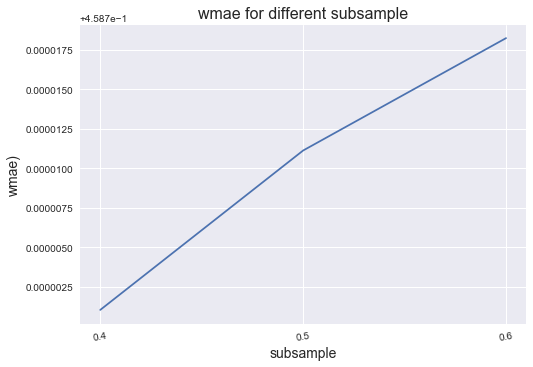

In [17]:
from time import time
start = time()

results_subsample = {}
for i in [0.4,0.5,0.6]:
    result = {}
    print('\n\n\n\nrunning while subsample = {}'.format(i))
    params={'booster': 'gblinear',
        'objective': 'reg:linear',
        'eta': 0.01,
        'depth': 10,
        'subsample': i,
        'min_child_weight': 5,
        'col_sample_bytree': 0.2,
        'seed': 0,
        'silent': 1,
        }

    watchlist = [(dataset_val, 'val'),(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=3000,early_stopping_rounds=300,evals=watchlist, feval=wmae_xgb,maximize=False)
    pred_xgb = model.predict(dataset_pre)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(labels_val, pred_xgb)
    results_subsample['{}'.format(i)] = result

end = time()    
print('tuning subsample time is{:.4f}s'.format(end-start))
print(results_subsample)
plot_results(results_subsample, 'subsample')





running while depth = 3
[0]	train-wmae:5.71323
Will train until train-wmae hasn't improved in 300 rounds.
[1]	train-wmae:2.70775
[2]	train-wmae:1.76776
[3]	train-wmae:1.33233
[4]	train-wmae:1.09262
[5]	train-wmae:0.945931
[6]	train-wmae:0.849573
[7]	train-wmae:0.782805
[8]	train-wmae:0.734379
[9]	train-wmae:0.69813
[10]	train-wmae:0.670213
[11]	train-wmae:0.648027
[12]	train-wmae:0.629928
[13]	train-wmae:0.614989
[14]	train-wmae:0.602476
[15]	train-wmae:0.591763
[16]	train-wmae:0.582486
[17]	train-wmae:0.574312
[18]	train-wmae:0.567033
[19]	train-wmae:0.56049
[20]	train-wmae:0.554556
[21]	train-wmae:0.54911
[22]	train-wmae:0.54407
[23]	train-wmae:0.53937
[24]	train-wmae:0.534974
[25]	train-wmae:0.530826
[26]	train-wmae:0.526896
[27]	train-wmae:0.523154
[28]	train-wmae:0.519575
[29]	train-wmae:0.516139
[30]	train-wmae:0.512825
[31]	train-wmae:0.509634
[32]	train-wmae:0.506544
[33]	train-wmae:0.503547
[34]	train-wmae:0.500631
[35]	train-wmae:0.497795
[36]	train-wmae:0.495032
[37]	tra

[318]	train-wmae:0.33071
[319]	train-wmae:0.33064
[320]	train-wmae:0.330571
[321]	train-wmae:0.330502
[322]	train-wmae:0.330435
[323]	train-wmae:0.330367
[324]	train-wmae:0.330299
[325]	train-wmae:0.330232
[326]	train-wmae:0.330165
[327]	train-wmae:0.330098
[328]	train-wmae:0.330033
[329]	train-wmae:0.329967
[330]	train-wmae:0.329902
[331]	train-wmae:0.329837
[332]	train-wmae:0.329773
[333]	train-wmae:0.329709
[334]	train-wmae:0.329645
[335]	train-wmae:0.329581
[336]	train-wmae:0.329518
[337]	train-wmae:0.329455
[338]	train-wmae:0.329393
[339]	train-wmae:0.329331
[340]	train-wmae:0.329269
[341]	train-wmae:0.329207
[342]	train-wmae:0.329146
[343]	train-wmae:0.329085
[344]	train-wmae:0.329024
[345]	train-wmae:0.328964
[346]	train-wmae:0.328903
[347]	train-wmae:0.328844
[348]	train-wmae:0.328784
[349]	train-wmae:0.328725
[350]	train-wmae:0.328666
[351]	train-wmae:0.328607
[352]	train-wmae:0.328549
[353]	train-wmae:0.328491
[354]	train-wmae:0.328433
[355]	train-wmae:0.328376
[356]	train-wm

[635]	train-wmae:0.316994
[636]	train-wmae:0.316963
[637]	train-wmae:0.316932
[638]	train-wmae:0.316901
[639]	train-wmae:0.316871
[640]	train-wmae:0.31684
[641]	train-wmae:0.316809
[642]	train-wmae:0.316778
[643]	train-wmae:0.316747
[644]	train-wmae:0.316716
[645]	train-wmae:0.316685
[646]	train-wmae:0.316655
[647]	train-wmae:0.316624
[648]	train-wmae:0.316595
[649]	train-wmae:0.316565
[650]	train-wmae:0.316535
[651]	train-wmae:0.316505
[652]	train-wmae:0.316475
[653]	train-wmae:0.316445
[654]	train-wmae:0.316414
[655]	train-wmae:0.316385
[656]	train-wmae:0.316355
[657]	train-wmae:0.316325
[658]	train-wmae:0.316295
[659]	train-wmae:0.316266
[660]	train-wmae:0.316236
[661]	train-wmae:0.316206
[662]	train-wmae:0.316177
[663]	train-wmae:0.316147
[664]	train-wmae:0.316117
[665]	train-wmae:0.316087
[666]	train-wmae:0.316058
[667]	train-wmae:0.316029
[668]	train-wmae:0.315999
[669]	train-wmae:0.315969
[670]	train-wmae:0.31594
[671]	train-wmae:0.315911
[672]	train-wmae:0.315882
[673]	train-wm

[952]	train-wmae:0.309082
[953]	train-wmae:0.309061
[954]	train-wmae:0.30904
[955]	train-wmae:0.30902
[956]	train-wmae:0.309
[957]	train-wmae:0.308979
[958]	train-wmae:0.308959
[959]	train-wmae:0.308939
[960]	train-wmae:0.308919
[961]	train-wmae:0.308898
[962]	train-wmae:0.308878
[963]	train-wmae:0.308858
[964]	train-wmae:0.308838
[965]	train-wmae:0.308819
[966]	train-wmae:0.3088
[967]	train-wmae:0.30878
[968]	train-wmae:0.30876
[969]	train-wmae:0.30874
[970]	train-wmae:0.308719
[971]	train-wmae:0.308699
[972]	train-wmae:0.308679
[973]	train-wmae:0.30866
[974]	train-wmae:0.30864
[975]	train-wmae:0.30862
[976]	train-wmae:0.3086
[977]	train-wmae:0.30858
[978]	train-wmae:0.308561
[979]	train-wmae:0.308541
[980]	train-wmae:0.308522
[981]	train-wmae:0.308502
[982]	train-wmae:0.308482
[983]	train-wmae:0.308463
[984]	train-wmae:0.308443
[985]	train-wmae:0.308423
[986]	train-wmae:0.308403
[987]	train-wmae:0.308384
[988]	train-wmae:0.308364
[989]	train-wmae:0.308346
[990]	train-wmae:0.308326
[9

[1259]	train-wmae:0.303893
[1260]	train-wmae:0.303879
[1261]	train-wmae:0.303865
[1262]	train-wmae:0.303851
[1263]	train-wmae:0.303836
[1264]	train-wmae:0.303822
[1265]	train-wmae:0.303809
[1266]	train-wmae:0.303795
[1267]	train-wmae:0.303781
[1268]	train-wmae:0.303767
[1269]	train-wmae:0.303753
[1270]	train-wmae:0.303738
[1271]	train-wmae:0.303725
[1272]	train-wmae:0.303711
[1273]	train-wmae:0.303697
[1274]	train-wmae:0.303683
[1275]	train-wmae:0.303669
[1276]	train-wmae:0.303655
[1277]	train-wmae:0.303641
[1278]	train-wmae:0.303628
[1279]	train-wmae:0.303614
[1280]	train-wmae:0.303601
[1281]	train-wmae:0.303587
[1282]	train-wmae:0.303573
[1283]	train-wmae:0.303559
[1284]	train-wmae:0.303546
[1285]	train-wmae:0.303532
[1286]	train-wmae:0.303518
[1287]	train-wmae:0.303504
[1288]	train-wmae:0.303491
[1289]	train-wmae:0.303477
[1290]	train-wmae:0.303463
[1291]	train-wmae:0.303449
[1292]	train-wmae:0.303436
[1293]	train-wmae:0.303422
[1294]	train-wmae:0.303408
[1295]	train-wmae:0.303395
[

[1564]	train-wmae:0.300255
[1565]	train-wmae:0.300245
[1566]	train-wmae:0.300235
[1567]	train-wmae:0.300225
[1568]	train-wmae:0.300215
[1569]	train-wmae:0.300205
[1570]	train-wmae:0.300195
[1571]	train-wmae:0.300185
[1572]	train-wmae:0.300175
[1573]	train-wmae:0.300165
[1574]	train-wmae:0.300155
[1575]	train-wmae:0.300145
[1576]	train-wmae:0.300134
[1577]	train-wmae:0.300124
[1578]	train-wmae:0.300114
[1579]	train-wmae:0.300105
[1580]	train-wmae:0.300094
[1581]	train-wmae:0.300085
[1582]	train-wmae:0.300074
[1583]	train-wmae:0.300065
[1584]	train-wmae:0.300055
[1585]	train-wmae:0.300045
[1586]	train-wmae:0.300035
[1587]	train-wmae:0.300025
[1588]	train-wmae:0.300016
[1589]	train-wmae:0.300006
[1590]	train-wmae:0.299996
[1591]	train-wmae:0.299986
[1592]	train-wmae:0.299976
[1593]	train-wmae:0.299966
[1594]	train-wmae:0.299956
[1595]	train-wmae:0.299947
[1596]	train-wmae:0.299937
[1597]	train-wmae:0.299927
[1598]	train-wmae:0.299917
[1599]	train-wmae:0.299908
[1600]	train-wmae:0.299898
[

[1869]	train-wmae:0.297585
[1870]	train-wmae:0.297577
[1871]	train-wmae:0.29757
[1872]	train-wmae:0.297562
[1873]	train-wmae:0.297555
[1874]	train-wmae:0.297547
[1875]	train-wmae:0.29754
[1876]	train-wmae:0.297532
[1877]	train-wmae:0.297525
[1878]	train-wmae:0.297517
[1879]	train-wmae:0.29751
[1880]	train-wmae:0.297502
[1881]	train-wmae:0.297495
[1882]	train-wmae:0.297487
[1883]	train-wmae:0.29748
[1884]	train-wmae:0.297473
[1885]	train-wmae:0.297465
[1886]	train-wmae:0.297458
[1887]	train-wmae:0.29745
[1888]	train-wmae:0.297443
[1889]	train-wmae:0.297435
[1890]	train-wmae:0.297428
[1891]	train-wmae:0.29742
[1892]	train-wmae:0.297413
[1893]	train-wmae:0.297405
[1894]	train-wmae:0.297398
[1895]	train-wmae:0.297391
[1896]	train-wmae:0.297383
[1897]	train-wmae:0.297376
[1898]	train-wmae:0.297368
[1899]	train-wmae:0.297361
[1900]	train-wmae:0.297354
[1901]	train-wmae:0.297346
[1902]	train-wmae:0.297339
[1903]	train-wmae:0.297331
[1904]	train-wmae:0.297324
[1905]	train-wmae:0.297317
[1906]	

[2174]	train-wmae:0.295595
[2175]	train-wmae:0.29559
[2176]	train-wmae:0.295584
[2177]	train-wmae:0.295579
[2178]	train-wmae:0.295573
[2179]	train-wmae:0.295567
[2180]	train-wmae:0.295562
[2181]	train-wmae:0.295556
[2182]	train-wmae:0.295551
[2183]	train-wmae:0.295545
[2184]	train-wmae:0.295539
[2185]	train-wmae:0.295533
[2186]	train-wmae:0.295528
[2187]	train-wmae:0.295522
[2188]	train-wmae:0.295516
[2189]	train-wmae:0.295511
[2190]	train-wmae:0.295505
[2191]	train-wmae:0.2955
[2192]	train-wmae:0.295494
[2193]	train-wmae:0.295489
[2194]	train-wmae:0.295483
[2195]	train-wmae:0.295477
[2196]	train-wmae:0.295472
[2197]	train-wmae:0.295466
[2198]	train-wmae:0.295461
[2199]	train-wmae:0.295455
[2200]	train-wmae:0.29545
[2201]	train-wmae:0.295444
[2202]	train-wmae:0.295439
[2203]	train-wmae:0.295433
[2204]	train-wmae:0.295428
[2205]	train-wmae:0.295422
[2206]	train-wmae:0.295417
[2207]	train-wmae:0.295411
[2208]	train-wmae:0.295406
[2209]	train-wmae:0.2954
[2210]	train-wmae:0.295395
[2211]	

[2480]	train-wmae:0.294072
[2481]	train-wmae:0.294068
[2482]	train-wmae:0.294063
[2483]	train-wmae:0.294059
[2484]	train-wmae:0.294055
[2485]	train-wmae:0.29405
[2486]	train-wmae:0.294046
[2487]	train-wmae:0.294042
[2488]	train-wmae:0.294037
[2489]	train-wmae:0.294033
[2490]	train-wmae:0.294029
[2491]	train-wmae:0.294024
[2492]	train-wmae:0.29402
[2493]	train-wmae:0.294016
[2494]	train-wmae:0.294011
[2495]	train-wmae:0.294007
[2496]	train-wmae:0.294003
[2497]	train-wmae:0.293998
[2498]	train-wmae:0.293994
[2499]	train-wmae:0.29399
[2500]	train-wmae:0.293985
[2501]	train-wmae:0.293981
[2502]	train-wmae:0.293977
[2503]	train-wmae:0.293973
[2504]	train-wmae:0.293968
[2505]	train-wmae:0.293964
[2506]	train-wmae:0.29396
[2507]	train-wmae:0.293955
[2508]	train-wmae:0.293951
[2509]	train-wmae:0.293947
[2510]	train-wmae:0.293943
[2511]	train-wmae:0.293938
[2512]	train-wmae:0.293934
[2513]	train-wmae:0.29393
[2514]	train-wmae:0.293926
[2515]	train-wmae:0.293921
[2516]	train-wmae:0.293917
[2517]

[2785]	train-wmae:0.292895
[2786]	train-wmae:0.292891
[2787]	train-wmae:0.292888
[2788]	train-wmae:0.292884
[2789]	train-wmae:0.292881
[2790]	train-wmae:0.292878
[2791]	train-wmae:0.292874
[2792]	train-wmae:0.292871
[2793]	train-wmae:0.292868
[2794]	train-wmae:0.292864
[2795]	train-wmae:0.292861
[2796]	train-wmae:0.292857
[2797]	train-wmae:0.292854
[2798]	train-wmae:0.292851
[2799]	train-wmae:0.292847
[2800]	train-wmae:0.292844
[2801]	train-wmae:0.292841
[2802]	train-wmae:0.292837
[2803]	train-wmae:0.292834
[2804]	train-wmae:0.292831
[2805]	train-wmae:0.292827
[2806]	train-wmae:0.292824
[2807]	train-wmae:0.29282
[2808]	train-wmae:0.292817
[2809]	train-wmae:0.292814
[2810]	train-wmae:0.29281
[2811]	train-wmae:0.292807
[2812]	train-wmae:0.292804
[2813]	train-wmae:0.2928
[2814]	train-wmae:0.292797
[2815]	train-wmae:0.292794
[2816]	train-wmae:0.29279
[2817]	train-wmae:0.292787
[2818]	train-wmae:0.292784
[2819]	train-wmae:0.292781
[2820]	train-wmae:0.292777
[2821]	train-wmae:0.292774
[2822]

[94]	train-wmae:0.397986
[95]	train-wmae:0.396988
[96]	train-wmae:0.396005
[97]	train-wmae:0.395036
[98]	train-wmae:0.39408
[99]	train-wmae:0.393139
[100]	train-wmae:0.392213
[101]	train-wmae:0.391302
[102]	train-wmae:0.390404
[103]	train-wmae:0.389522
[104]	train-wmae:0.388653
[105]	train-wmae:0.387798
[106]	train-wmae:0.386954
[107]	train-wmae:0.386123
[108]	train-wmae:0.385304
[109]	train-wmae:0.384499
[110]	train-wmae:0.383708
[111]	train-wmae:0.382932
[112]	train-wmae:0.382166
[113]	train-wmae:0.381412
[114]	train-wmae:0.380671
[115]	train-wmae:0.379942
[116]	train-wmae:0.379223
[117]	train-wmae:0.378517
[118]	train-wmae:0.37782
[119]	train-wmae:0.377135
[120]	train-wmae:0.376461
[121]	train-wmae:0.375795
[122]	train-wmae:0.375142
[123]	train-wmae:0.374498
[124]	train-wmae:0.373864
[125]	train-wmae:0.373242
[126]	train-wmae:0.372629
[127]	train-wmae:0.372023
[128]	train-wmae:0.371426
[129]	train-wmae:0.370838
[130]	train-wmae:0.370258
[131]	train-wmae:0.369687
[132]	train-wmae:0.3

[411]	train-wmae:0.325541
[412]	train-wmae:0.325493
[413]	train-wmae:0.325446
[414]	train-wmae:0.325399
[415]	train-wmae:0.325353
[416]	train-wmae:0.325306
[417]	train-wmae:0.325259
[418]	train-wmae:0.325213
[419]	train-wmae:0.325167
[420]	train-wmae:0.325122
[421]	train-wmae:0.325076
[422]	train-wmae:0.325031
[423]	train-wmae:0.324986
[424]	train-wmae:0.32494
[425]	train-wmae:0.324895
[426]	train-wmae:0.324849
[427]	train-wmae:0.324804
[428]	train-wmae:0.324759
[429]	train-wmae:0.324714
[430]	train-wmae:0.324669
[431]	train-wmae:0.324624
[432]	train-wmae:0.324579
[433]	train-wmae:0.324535
[434]	train-wmae:0.324491
[435]	train-wmae:0.324447
[436]	train-wmae:0.324404
[437]	train-wmae:0.324359
[438]	train-wmae:0.324314
[439]	train-wmae:0.32427
[440]	train-wmae:0.324227
[441]	train-wmae:0.324183
[442]	train-wmae:0.32414
[443]	train-wmae:0.324096
[444]	train-wmae:0.324055
[445]	train-wmae:0.324011
[446]	train-wmae:0.323968
[447]	train-wmae:0.323924
[448]	train-wmae:0.323881
[449]	train-wma

[728]	train-wmae:0.314352
[729]	train-wmae:0.314324
[730]	train-wmae:0.314297
[731]	train-wmae:0.314269
[732]	train-wmae:0.314243
[733]	train-wmae:0.314216
[734]	train-wmae:0.314189
[735]	train-wmae:0.314163
[736]	train-wmae:0.314136
[737]	train-wmae:0.314109
[738]	train-wmae:0.314082
[739]	train-wmae:0.314056
[740]	train-wmae:0.314029
[741]	train-wmae:0.314004
[742]	train-wmae:0.313977
[743]	train-wmae:0.31395
[744]	train-wmae:0.313924
[745]	train-wmae:0.313897
[746]	train-wmae:0.31387
[747]	train-wmae:0.313844
[748]	train-wmae:0.313818
[749]	train-wmae:0.313791
[750]	train-wmae:0.313765
[751]	train-wmae:0.313739
[752]	train-wmae:0.313713
[753]	train-wmae:0.313687
[754]	train-wmae:0.313661
[755]	train-wmae:0.313637
[756]	train-wmae:0.313611
[757]	train-wmae:0.313585
[758]	train-wmae:0.313559
[759]	train-wmae:0.313533
[760]	train-wmae:0.313507
[761]	train-wmae:0.313482
[762]	train-wmae:0.313456
[763]	train-wmae:0.31343
[764]	train-wmae:0.313405
[765]	train-wmae:0.313379
[766]	train-wma

[1043]	train-wmae:0.307366
[1044]	train-wmae:0.307348
[1045]	train-wmae:0.30733
[1046]	train-wmae:0.307312
[1047]	train-wmae:0.307294
[1048]	train-wmae:0.307276
[1049]	train-wmae:0.307258
[1050]	train-wmae:0.307241
[1051]	train-wmae:0.307223
[1052]	train-wmae:0.307205
[1053]	train-wmae:0.307187
[1054]	train-wmae:0.307169
[1055]	train-wmae:0.307151
[1056]	train-wmae:0.307133
[1057]	train-wmae:0.307115
[1058]	train-wmae:0.307097
[1059]	train-wmae:0.307079
[1060]	train-wmae:0.307062
[1061]	train-wmae:0.307044
[1062]	train-wmae:0.307026
[1063]	train-wmae:0.307009
[1064]	train-wmae:0.306991
[1065]	train-wmae:0.306973
[1066]	train-wmae:0.306955
[1067]	train-wmae:0.306938
[1068]	train-wmae:0.30692
[1069]	train-wmae:0.306903
[1070]	train-wmae:0.306885
[1071]	train-wmae:0.306868
[1072]	train-wmae:0.30685
[1073]	train-wmae:0.306833
[1074]	train-wmae:0.306816
[1075]	train-wmae:0.306799
[1076]	train-wmae:0.306782
[1077]	train-wmae:0.306765
[1078]	train-wmae:0.306748
[1079]	train-wmae:0.30673
[1080

[1348]	train-wmae:0.302722
[1349]	train-wmae:0.302709
[1350]	train-wmae:0.302696
[1351]	train-wmae:0.302683
[1352]	train-wmae:0.30267
[1353]	train-wmae:0.302658
[1354]	train-wmae:0.302645
[1355]	train-wmae:0.302632
[1356]	train-wmae:0.30262
[1357]	train-wmae:0.302607
[1358]	train-wmae:0.302594
[1359]	train-wmae:0.302582
[1360]	train-wmae:0.302569
[1361]	train-wmae:0.302556
[1362]	train-wmae:0.302544
[1363]	train-wmae:0.302531
[1364]	train-wmae:0.302519
[1365]	train-wmae:0.302506
[1366]	train-wmae:0.302494
[1367]	train-wmae:0.302481
[1368]	train-wmae:0.302469
[1369]	train-wmae:0.302457
[1370]	train-wmae:0.302444
[1371]	train-wmae:0.302432
[1372]	train-wmae:0.302419
[1373]	train-wmae:0.302407
[1374]	train-wmae:0.302395
[1375]	train-wmae:0.302382
[1376]	train-wmae:0.30237
[1377]	train-wmae:0.302358
[1378]	train-wmae:0.302346
[1379]	train-wmae:0.302333
[1380]	train-wmae:0.302321
[1381]	train-wmae:0.302309
[1382]	train-wmae:0.302297
[1383]	train-wmae:0.302284
[1384]	train-wmae:0.302272
[138

[1653]	train-wmae:0.299413
[1654]	train-wmae:0.299404
[1655]	train-wmae:0.299395
[1656]	train-wmae:0.299385
[1657]	train-wmae:0.299376
[1658]	train-wmae:0.299367
[1659]	train-wmae:0.299357
[1660]	train-wmae:0.299348
[1661]	train-wmae:0.299339
[1662]	train-wmae:0.29933
[1663]	train-wmae:0.299321
[1664]	train-wmae:0.299311
[1665]	train-wmae:0.299302
[1666]	train-wmae:0.299293
[1667]	train-wmae:0.299283
[1668]	train-wmae:0.299274
[1669]	train-wmae:0.299265
[1670]	train-wmae:0.299256
[1671]	train-wmae:0.299247
[1672]	train-wmae:0.299238
[1673]	train-wmae:0.299229
[1674]	train-wmae:0.29922
[1675]	train-wmae:0.29921
[1676]	train-wmae:0.299201
[1677]	train-wmae:0.299192
[1678]	train-wmae:0.299183
[1679]	train-wmae:0.299174
[1680]	train-wmae:0.299165
[1681]	train-wmae:0.299156
[1682]	train-wmae:0.299147
[1683]	train-wmae:0.299138
[1684]	train-wmae:0.299128
[1685]	train-wmae:0.299119
[1686]	train-wmae:0.29911
[1687]	train-wmae:0.299101
[1688]	train-wmae:0.299092
[1689]	train-wmae:0.299083
[1690

[1958]	train-wmae:0.296954
[1959]	train-wmae:0.296947
[1960]	train-wmae:0.29694
[1961]	train-wmae:0.296933
[1962]	train-wmae:0.296926
[1963]	train-wmae:0.296919
[1964]	train-wmae:0.296912
[1965]	train-wmae:0.296905
[1966]	train-wmae:0.296898
[1967]	train-wmae:0.296891
[1968]	train-wmae:0.296884
[1969]	train-wmae:0.296877
[1970]	train-wmae:0.29687
[1971]	train-wmae:0.296863
[1972]	train-wmae:0.296857
[1973]	train-wmae:0.29685
[1974]	train-wmae:0.296843
[1975]	train-wmae:0.296836
[1976]	train-wmae:0.296829
[1977]	train-wmae:0.296823
[1978]	train-wmae:0.296816
[1979]	train-wmae:0.296809
[1980]	train-wmae:0.296802
[1981]	train-wmae:0.296796
[1982]	train-wmae:0.296789
[1983]	train-wmae:0.296782
[1984]	train-wmae:0.296775
[1985]	train-wmae:0.296769
[1986]	train-wmae:0.296762
[1987]	train-wmae:0.296755
[1988]	train-wmae:0.296748
[1989]	train-wmae:0.296742
[1990]	train-wmae:0.296735
[1991]	train-wmae:0.296728
[1992]	train-wmae:0.296722
[1993]	train-wmae:0.296715
[1994]	train-wmae:0.296709
[199

[2263]	train-wmae:0.295122
[2264]	train-wmae:0.295117
[2265]	train-wmae:0.295112
[2266]	train-wmae:0.295106
[2267]	train-wmae:0.295101
[2268]	train-wmae:0.295096
[2269]	train-wmae:0.295091
[2270]	train-wmae:0.295086
[2271]	train-wmae:0.29508
[2272]	train-wmae:0.295075
[2273]	train-wmae:0.29507
[2274]	train-wmae:0.295065
[2275]	train-wmae:0.29506
[2276]	train-wmae:0.295054
[2277]	train-wmae:0.295049
[2278]	train-wmae:0.295044
[2279]	train-wmae:0.295039
[2280]	train-wmae:0.295034
[2281]	train-wmae:0.295028
[2282]	train-wmae:0.295023
[2283]	train-wmae:0.295018
[2284]	train-wmae:0.295013
[2285]	train-wmae:0.295008
[2286]	train-wmae:0.295003
[2287]	train-wmae:0.294998
[2288]	train-wmae:0.294993
[2289]	train-wmae:0.294987
[2290]	train-wmae:0.294982
[2291]	train-wmae:0.294977
[2292]	train-wmae:0.294972
[2293]	train-wmae:0.294967
[2294]	train-wmae:0.294962
[2295]	train-wmae:0.294957
[2296]	train-wmae:0.294952
[2297]	train-wmae:0.294946
[2298]	train-wmae:0.294942
[2299]	train-wmae:0.294936
[230

[2568]	train-wmae:0.293711
[2569]	train-wmae:0.293707
[2570]	train-wmae:0.293703
[2571]	train-wmae:0.293699
[2572]	train-wmae:0.293695
[2573]	train-wmae:0.293691
[2574]	train-wmae:0.293687
[2575]	train-wmae:0.293683
[2576]	train-wmae:0.293679
[2577]	train-wmae:0.293675
[2578]	train-wmae:0.29367
[2579]	train-wmae:0.293666
[2580]	train-wmae:0.293662
[2581]	train-wmae:0.293658
[2582]	train-wmae:0.293654
[2583]	train-wmae:0.293651
[2584]	train-wmae:0.293646
[2585]	train-wmae:0.293643
[2586]	train-wmae:0.293639
[2587]	train-wmae:0.293635
[2588]	train-wmae:0.293631
[2589]	train-wmae:0.293627
[2590]	train-wmae:0.293623
[2591]	train-wmae:0.293619
[2592]	train-wmae:0.293615
[2593]	train-wmae:0.293611
[2594]	train-wmae:0.293607
[2595]	train-wmae:0.293603
[2596]	train-wmae:0.293599
[2597]	train-wmae:0.293595
[2598]	train-wmae:0.293591
[2599]	train-wmae:0.293587
[2600]	train-wmae:0.293583
[2601]	train-wmae:0.293579
[2602]	train-wmae:0.293576
[2603]	train-wmae:0.293572
[2604]	train-wmae:0.293568
[2

[2874]	train-wmae:0.292611
[2875]	train-wmae:0.292608
[2876]	train-wmae:0.292605
[2877]	train-wmae:0.292601
[2878]	train-wmae:0.292598
[2879]	train-wmae:0.292595
[2880]	train-wmae:0.292592
[2881]	train-wmae:0.292589
[2882]	train-wmae:0.292585
[2883]	train-wmae:0.292582
[2884]	train-wmae:0.292579
[2885]	train-wmae:0.292576
[2886]	train-wmae:0.292573
[2887]	train-wmae:0.29257
[2888]	train-wmae:0.292566
[2889]	train-wmae:0.292563
[2890]	train-wmae:0.29256
[2891]	train-wmae:0.292557
[2892]	train-wmae:0.292554
[2893]	train-wmae:0.292551
[2894]	train-wmae:0.292547
[2895]	train-wmae:0.292544
[2896]	train-wmae:0.292541
[2897]	train-wmae:0.292538
[2898]	train-wmae:0.292535
[2899]	train-wmae:0.292532
[2900]	train-wmae:0.292529
[2901]	train-wmae:0.292525
[2902]	train-wmae:0.292522
[2903]	train-wmae:0.292519
[2904]	train-wmae:0.292516
[2905]	train-wmae:0.292513
[2906]	train-wmae:0.29251
[2907]	train-wmae:0.292507
[2908]	train-wmae:0.292503
[2909]	train-wmae:0.2925
[2910]	train-wmae:0.292497
[2911]

[188]	train-wmae:0.347784
[189]	train-wmae:0.347534
[190]	train-wmae:0.347289
[191]	train-wmae:0.347047
[192]	train-wmae:0.346807
[193]	train-wmae:0.34657
[194]	train-wmae:0.346335
[195]	train-wmae:0.346104
[196]	train-wmae:0.345876
[197]	train-wmae:0.345651
[198]	train-wmae:0.345428
[199]	train-wmae:0.345208
[200]	train-wmae:0.344991
[201]	train-wmae:0.344776
[202]	train-wmae:0.344564
[203]	train-wmae:0.344355
[204]	train-wmae:0.34415
[205]	train-wmae:0.343947
[206]	train-wmae:0.343747
[207]	train-wmae:0.34355
[208]	train-wmae:0.343354
[209]	train-wmae:0.343161
[210]	train-wmae:0.34297
[211]	train-wmae:0.342782
[212]	train-wmae:0.342596
[213]	train-wmae:0.342414
[214]	train-wmae:0.342233
[215]	train-wmae:0.342055
[216]	train-wmae:0.341881
[217]	train-wmae:0.341709
[218]	train-wmae:0.341538
[219]	train-wmae:0.34137
[220]	train-wmae:0.341204
[221]	train-wmae:0.341039
[222]	train-wmae:0.340876
[223]	train-wmae:0.340715
[224]	train-wmae:0.340555
[225]	train-wmae:0.340397
[226]	train-wmae:

[505]	train-wmae:0.321553
[506]	train-wmae:0.321514
[507]	train-wmae:0.321475
[508]	train-wmae:0.321436
[509]	train-wmae:0.321398
[510]	train-wmae:0.321359
[511]	train-wmae:0.321319
[512]	train-wmae:0.321281
[513]	train-wmae:0.321242
[514]	train-wmae:0.321203
[515]	train-wmae:0.321165
[516]	train-wmae:0.321127
[517]	train-wmae:0.321088
[518]	train-wmae:0.321049
[519]	train-wmae:0.321011
[520]	train-wmae:0.320973
[521]	train-wmae:0.320936
[522]	train-wmae:0.320897
[523]	train-wmae:0.320859
[524]	train-wmae:0.320821
[525]	train-wmae:0.320784
[526]	train-wmae:0.320746
[527]	train-wmae:0.320708
[528]	train-wmae:0.320671
[529]	train-wmae:0.320634
[530]	train-wmae:0.320597
[531]	train-wmae:0.32056
[532]	train-wmae:0.320523
[533]	train-wmae:0.320487
[534]	train-wmae:0.32045
[535]	train-wmae:0.320414
[536]	train-wmae:0.320377
[537]	train-wmae:0.32034
[538]	train-wmae:0.320304
[539]	train-wmae:0.320267
[540]	train-wmae:0.320231
[541]	train-wmae:0.320194
[542]	train-wmae:0.320157
[543]	train-wma

[822]	train-wmae:0.311978
[823]	train-wmae:0.311955
[824]	train-wmae:0.311931
[825]	train-wmae:0.311907
[826]	train-wmae:0.311883
[827]	train-wmae:0.311859
[828]	train-wmae:0.311836
[829]	train-wmae:0.311812
[830]	train-wmae:0.311788
[831]	train-wmae:0.311765
[832]	train-wmae:0.311741
[833]	train-wmae:0.311718
[834]	train-wmae:0.311694
[835]	train-wmae:0.31167
[836]	train-wmae:0.311647
[837]	train-wmae:0.311624
[838]	train-wmae:0.3116
[839]	train-wmae:0.311577
[840]	train-wmae:0.311554
[841]	train-wmae:0.311531
[842]	train-wmae:0.311507
[843]	train-wmae:0.311484
[844]	train-wmae:0.311461
[845]	train-wmae:0.311439
[846]	train-wmae:0.311416
[847]	train-wmae:0.311392
[848]	train-wmae:0.311369
[849]	train-wmae:0.311346
[850]	train-wmae:0.311323
[851]	train-wmae:0.3113
[852]	train-wmae:0.311276
[853]	train-wmae:0.311253
[854]	train-wmae:0.31123
[855]	train-wmae:0.311208
[856]	train-wmae:0.311185
[857]	train-wmae:0.311162
[858]	train-wmae:0.311139
[859]	train-wmae:0.311116
[860]	train-wmae:0

[1134]	train-wmae:0.305808
[1135]	train-wmae:0.305792
[1136]	train-wmae:0.305776
[1137]	train-wmae:0.305759
[1138]	train-wmae:0.305743
[1139]	train-wmae:0.305727
[1140]	train-wmae:0.305711
[1141]	train-wmae:0.305695
[1142]	train-wmae:0.305678
[1143]	train-wmae:0.305662
[1144]	train-wmae:0.305646
[1145]	train-wmae:0.30563
[1146]	train-wmae:0.305614
[1147]	train-wmae:0.305599
[1148]	train-wmae:0.305583
[1149]	train-wmae:0.305567
[1150]	train-wmae:0.305551
[1151]	train-wmae:0.305535
[1152]	train-wmae:0.305519
[1153]	train-wmae:0.305504
[1154]	train-wmae:0.305488
[1155]	train-wmae:0.305473
[1156]	train-wmae:0.305457
[1157]	train-wmae:0.305441
[1158]	train-wmae:0.305426
[1159]	train-wmae:0.30541
[1160]	train-wmae:0.305394
[1161]	train-wmae:0.305378
[1162]	train-wmae:0.305362
[1163]	train-wmae:0.305346
[1164]	train-wmae:0.30533
[1165]	train-wmae:0.305315
[1166]	train-wmae:0.305299
[1167]	train-wmae:0.305283
[1168]	train-wmae:0.305267
[1169]	train-wmae:0.305252
[1170]	train-wmae:0.305237
[117

[1439]	train-wmae:0.30162
[1440]	train-wmae:0.301608
[1441]	train-wmae:0.301597
[1442]	train-wmae:0.301585
[1443]	train-wmae:0.301574
[1444]	train-wmae:0.301563
[1445]	train-wmae:0.301551
[1446]	train-wmae:0.301539
[1447]	train-wmae:0.301528
[1448]	train-wmae:0.301517
[1449]	train-wmae:0.301505
[1450]	train-wmae:0.301494
[1451]	train-wmae:0.301483
[1452]	train-wmae:0.301471
[1453]	train-wmae:0.30146
[1454]	train-wmae:0.301448
[1455]	train-wmae:0.301437
[1456]	train-wmae:0.301426
[1457]	train-wmae:0.301415
[1458]	train-wmae:0.301403
[1459]	train-wmae:0.301392
[1460]	train-wmae:0.301381
[1461]	train-wmae:0.30137
[1462]	train-wmae:0.301359
[1463]	train-wmae:0.301348
[1464]	train-wmae:0.301337
[1465]	train-wmae:0.301325
[1466]	train-wmae:0.301314
[1467]	train-wmae:0.301303
[1468]	train-wmae:0.301292
[1469]	train-wmae:0.301281
[1470]	train-wmae:0.30127
[1471]	train-wmae:0.301259
[1472]	train-wmae:0.301248
[1473]	train-wmae:0.301237
[1474]	train-wmae:0.301226
[1475]	train-wmae:0.301215
[1476

[1744]	train-wmae:0.298601
[1745]	train-wmae:0.298592
[1746]	train-wmae:0.298584
[1747]	train-wmae:0.298575
[1748]	train-wmae:0.298567
[1749]	train-wmae:0.298559
[1750]	train-wmae:0.29855
[1751]	train-wmae:0.298541
[1752]	train-wmae:0.298533
[1753]	train-wmae:0.298524
[1754]	train-wmae:0.298516
[1755]	train-wmae:0.298508
[1756]	train-wmae:0.298499
[1757]	train-wmae:0.298491
[1758]	train-wmae:0.298482
[1759]	train-wmae:0.298474
[1760]	train-wmae:0.298465
[1761]	train-wmae:0.298457
[1762]	train-wmae:0.298449
[1763]	train-wmae:0.29844
[1764]	train-wmae:0.298432
[1765]	train-wmae:0.298424
[1766]	train-wmae:0.298415
[1767]	train-wmae:0.298407
[1768]	train-wmae:0.298399
[1769]	train-wmae:0.29839
[1770]	train-wmae:0.298382
[1771]	train-wmae:0.298374
[1772]	train-wmae:0.298366
[1773]	train-wmae:0.298357
[1774]	train-wmae:0.298349
[1775]	train-wmae:0.298341
[1776]	train-wmae:0.298332
[1777]	train-wmae:0.298324
[1778]	train-wmae:0.298316
[1779]	train-wmae:0.298308
[1780]	train-wmae:0.2983
[1781]

[2049]	train-wmae:0.296354
[2050]	train-wmae:0.296348
[2051]	train-wmae:0.296342
[2052]	train-wmae:0.296335
[2053]	train-wmae:0.296329
[2054]	train-wmae:0.296323
[2055]	train-wmae:0.296317
[2056]	train-wmae:0.29631
[2057]	train-wmae:0.296304
[2058]	train-wmae:0.296298
[2059]	train-wmae:0.296292
[2060]	train-wmae:0.296285
[2061]	train-wmae:0.296279
[2062]	train-wmae:0.296273
[2063]	train-wmae:0.296267
[2064]	train-wmae:0.29626
[2065]	train-wmae:0.296254
[2066]	train-wmae:0.296248
[2067]	train-wmae:0.296242
[2068]	train-wmae:0.296236
[2069]	train-wmae:0.296229
[2070]	train-wmae:0.296223
[2071]	train-wmae:0.296217
[2072]	train-wmae:0.296211
[2073]	train-wmae:0.296205
[2074]	train-wmae:0.296199
[2075]	train-wmae:0.296193
[2076]	train-wmae:0.296186
[2077]	train-wmae:0.29618
[2078]	train-wmae:0.296174
[2079]	train-wmae:0.296168
[2080]	train-wmae:0.296162
[2081]	train-wmae:0.296156
[2082]	train-wmae:0.29615
[2083]	train-wmae:0.296144
[2084]	train-wmae:0.296137
[2085]	train-wmae:0.296131
[2086

[2354]	train-wmae:0.294664
[2355]	train-wmae:0.294659
[2356]	train-wmae:0.294654
[2357]	train-wmae:0.294649
[2358]	train-wmae:0.294645
[2359]	train-wmae:0.29464
[2360]	train-wmae:0.294635
[2361]	train-wmae:0.29463
[2362]	train-wmae:0.294625
[2363]	train-wmae:0.29462
[2364]	train-wmae:0.294616
[2365]	train-wmae:0.294611
[2366]	train-wmae:0.294606
[2367]	train-wmae:0.294601
[2368]	train-wmae:0.294596
[2369]	train-wmae:0.294592
[2370]	train-wmae:0.294587
[2371]	train-wmae:0.294582
[2372]	train-wmae:0.294577
[2373]	train-wmae:0.294572
[2374]	train-wmae:0.294568
[2375]	train-wmae:0.294563
[2376]	train-wmae:0.294558
[2377]	train-wmae:0.294553
[2378]	train-wmae:0.294549
[2379]	train-wmae:0.294544
[2380]	train-wmae:0.294539
[2381]	train-wmae:0.294534
[2382]	train-wmae:0.29453
[2383]	train-wmae:0.294525
[2384]	train-wmae:0.29452
[2385]	train-wmae:0.294515
[2386]	train-wmae:0.294511
[2387]	train-wmae:0.294506
[2388]	train-wmae:0.294501
[2389]	train-wmae:0.294496
[2390]	train-wmae:0.294492
[2391]

[2659]	train-wmae:0.293357
[2660]	train-wmae:0.293353
[2661]	train-wmae:0.293349
[2662]	train-wmae:0.293346
[2663]	train-wmae:0.293342
[2664]	train-wmae:0.293338
[2665]	train-wmae:0.293334
[2666]	train-wmae:0.293331
[2667]	train-wmae:0.293327
[2668]	train-wmae:0.293323
[2669]	train-wmae:0.293319
[2670]	train-wmae:0.293316
[2671]	train-wmae:0.293312
[2672]	train-wmae:0.293308
[2673]	train-wmae:0.293305
[2674]	train-wmae:0.293301
[2675]	train-wmae:0.293297
[2676]	train-wmae:0.293293
[2677]	train-wmae:0.29329
[2678]	train-wmae:0.293286
[2679]	train-wmae:0.293282
[2680]	train-wmae:0.293279
[2681]	train-wmae:0.293275
[2682]	train-wmae:0.293271
[2683]	train-wmae:0.293267
[2684]	train-wmae:0.293264
[2685]	train-wmae:0.29326
[2686]	train-wmae:0.293256
[2687]	train-wmae:0.293253
[2688]	train-wmae:0.293249
[2689]	train-wmae:0.293245
[2690]	train-wmae:0.293242
[2691]	train-wmae:0.293238
[2692]	train-wmae:0.293234
[2693]	train-wmae:0.293231
[2694]	train-wmae:0.293227
[2695]	train-wmae:0.293223
[26

[2964]	train-wmae:0.292333
[2965]	train-wmae:0.29233
[2966]	train-wmae:0.292327
[2967]	train-wmae:0.292324
[2968]	train-wmae:0.292321
[2969]	train-wmae:0.292318
[2970]	train-wmae:0.292315
[2971]	train-wmae:0.292312
[2972]	train-wmae:0.292309
[2973]	train-wmae:0.292306
[2974]	train-wmae:0.292303
[2975]	train-wmae:0.2923
[2976]	train-wmae:0.292297
[2977]	train-wmae:0.292294
[2978]	train-wmae:0.292291
[2979]	train-wmae:0.292288
[2980]	train-wmae:0.292285
[2981]	train-wmae:0.292282
[2982]	train-wmae:0.292279
[2983]	train-wmae:0.292276
[2984]	train-wmae:0.292273
[2985]	train-wmae:0.29227
[2986]	train-wmae:0.292267
[2987]	train-wmae:0.292265
[2988]	train-wmae:0.292262
[2989]	train-wmae:0.292259
[2990]	train-wmae:0.292256
[2991]	train-wmae:0.292253
[2992]	train-wmae:0.29225
[2993]	train-wmae:0.292247
[2994]	train-wmae:0.292244
[2995]	train-wmae:0.292241
[2996]	train-wmae:0.292238
[2997]	train-wmae:0.292235
[2998]	train-wmae:0.292232
[2999]	train-wmae:0.292229




running while depth = 6
[0]	t

[281]	train-wmae:0.333693
[282]	train-wmae:0.333605
[283]	train-wmae:0.333515
[284]	train-wmae:0.333425
[285]	train-wmae:0.333336
[286]	train-wmae:0.333248
[287]	train-wmae:0.333162
[288]	train-wmae:0.333075
[289]	train-wmae:0.332991
[290]	train-wmae:0.332905
[291]	train-wmae:0.332822
[292]	train-wmae:0.332739
[293]	train-wmae:0.332656
[294]	train-wmae:0.332575
[295]	train-wmae:0.332494
[296]	train-wmae:0.332414
[297]	train-wmae:0.332334
[298]	train-wmae:0.332255
[299]	train-wmae:0.332176
[300]	train-wmae:0.332096
[301]	train-wmae:0.332018
[302]	train-wmae:0.331942
[303]	train-wmae:0.331865
[304]	train-wmae:0.331788
[305]	train-wmae:0.331711
[306]	train-wmae:0.331637
[307]	train-wmae:0.331561
[308]	train-wmae:0.331488
[309]	train-wmae:0.331415
[310]	train-wmae:0.331341
[311]	train-wmae:0.331268
[312]	train-wmae:0.331196
[313]	train-wmae:0.331124
[314]	train-wmae:0.331052
[315]	train-wmae:0.33098
[316]	train-wmae:0.33091
[317]	train-wmae:0.33084
[318]	train-wmae:0.33077
[319]	train-wmae

[598]	train-wmae:0.31822
[599]	train-wmae:0.318188
[600]	train-wmae:0.318156
[601]	train-wmae:0.318122
[602]	train-wmae:0.318089
[603]	train-wmae:0.318056
[604]	train-wmae:0.318024
[605]	train-wmae:0.317991
[606]	train-wmae:0.317958
[607]	train-wmae:0.317926
[608]	train-wmae:0.317893
[609]	train-wmae:0.317861
[610]	train-wmae:0.317829
[611]	train-wmae:0.317797
[612]	train-wmae:0.317766
[613]	train-wmae:0.317734
[614]	train-wmae:0.317702
[615]	train-wmae:0.317669
[616]	train-wmae:0.317637
[617]	train-wmae:0.317605
[618]	train-wmae:0.317573
[619]	train-wmae:0.317541
[620]	train-wmae:0.317509
[621]	train-wmae:0.317477
[622]	train-wmae:0.317446
[623]	train-wmae:0.317414
[624]	train-wmae:0.317383
[625]	train-wmae:0.317351
[626]	train-wmae:0.317319
[627]	train-wmae:0.317289
[628]	train-wmae:0.317258
[629]	train-wmae:0.317227
[630]	train-wmae:0.317196
[631]	train-wmae:0.317164
[632]	train-wmae:0.317133
[633]	train-wmae:0.317103
[634]	train-wmae:0.317071
[635]	train-wmae:0.31704
[636]	train-wm

[915]	train-wmae:0.309883
[916]	train-wmae:0.309862
[917]	train-wmae:0.309841
[918]	train-wmae:0.309819
[919]	train-wmae:0.309798
[920]	train-wmae:0.309777
[921]	train-wmae:0.309755
[922]	train-wmae:0.309734
[923]	train-wmae:0.309713
[924]	train-wmae:0.309692
[925]	train-wmae:0.309671
[926]	train-wmae:0.30965
[927]	train-wmae:0.309629
[928]	train-wmae:0.309607
[929]	train-wmae:0.309587
[930]	train-wmae:0.309566
[931]	train-wmae:0.309546
[932]	train-wmae:0.309525
[933]	train-wmae:0.309504
[934]	train-wmae:0.309483
[935]	train-wmae:0.309462
[936]	train-wmae:0.309441
[937]	train-wmae:0.30942
[938]	train-wmae:0.3094
[939]	train-wmae:0.309379
[940]	train-wmae:0.309358
[941]	train-wmae:0.309337
[942]	train-wmae:0.309317
[943]	train-wmae:0.309296
[944]	train-wmae:0.309276
[945]	train-wmae:0.309256
[946]	train-wmae:0.309235
[947]	train-wmae:0.309215
[948]	train-wmae:0.309194
[949]	train-wmae:0.309174
[950]	train-wmae:0.309153
[951]	train-wmae:0.309133
[952]	train-wmae:0.309112
[953]	train-wmae

[1223]	train-wmae:0.304435
[1224]	train-wmae:0.30442
[1225]	train-wmae:0.304405
[1226]	train-wmae:0.304391
[1227]	train-wmae:0.304376
[1228]	train-wmae:0.304361
[1229]	train-wmae:0.304347
[1230]	train-wmae:0.304332
[1231]	train-wmae:0.304318
[1232]	train-wmae:0.304303
[1233]	train-wmae:0.304289
[1234]	train-wmae:0.304275
[1235]	train-wmae:0.30426
[1236]	train-wmae:0.304246
[1237]	train-wmae:0.304231
[1238]	train-wmae:0.304217
[1239]	train-wmae:0.304203
[1240]	train-wmae:0.304188
[1241]	train-wmae:0.304174
[1242]	train-wmae:0.30416
[1243]	train-wmae:0.304145
[1244]	train-wmae:0.304131
[1245]	train-wmae:0.304117
[1246]	train-wmae:0.304102
[1247]	train-wmae:0.304088
[1248]	train-wmae:0.304074
[1249]	train-wmae:0.30406
[1250]	train-wmae:0.304045
[1251]	train-wmae:0.304031
[1252]	train-wmae:0.304017
[1253]	train-wmae:0.304003
[1254]	train-wmae:0.303989
[1255]	train-wmae:0.303974
[1256]	train-wmae:0.30396
[1257]	train-wmae:0.303946
[1258]	train-wmae:0.303931
[1259]	train-wmae:0.303917
[1260]

[1528]	train-wmae:0.300645
[1529]	train-wmae:0.300635
[1530]	train-wmae:0.300625
[1531]	train-wmae:0.300614
[1532]	train-wmae:0.300603
[1533]	train-wmae:0.300593
[1534]	train-wmae:0.300583
[1535]	train-wmae:0.300572
[1536]	train-wmae:0.300562
[1537]	train-wmae:0.300551
[1538]	train-wmae:0.300541
[1539]	train-wmae:0.300531
[1540]	train-wmae:0.300521
[1541]	train-wmae:0.30051
[1542]	train-wmae:0.300499
[1543]	train-wmae:0.300489
[1544]	train-wmae:0.300479
[1545]	train-wmae:0.300469
[1546]	train-wmae:0.300458
[1547]	train-wmae:0.300448
[1548]	train-wmae:0.300438
[1549]	train-wmae:0.300427
[1550]	train-wmae:0.300417
[1551]	train-wmae:0.300407
[1552]	train-wmae:0.300396
[1553]	train-wmae:0.300386
[1554]	train-wmae:0.300376
[1555]	train-wmae:0.300366
[1556]	train-wmae:0.300355
[1557]	train-wmae:0.300345
[1558]	train-wmae:0.300335
[1559]	train-wmae:0.300325
[1560]	train-wmae:0.300314
[1561]	train-wmae:0.300304
[1562]	train-wmae:0.300294
[1563]	train-wmae:0.300284
[1564]	train-wmae:0.300274
[1

[1833]	train-wmae:0.297876
[1834]	train-wmae:0.297868
[1835]	train-wmae:0.29786
[1836]	train-wmae:0.297852
[1837]	train-wmae:0.297844
[1838]	train-wmae:0.297837
[1839]	train-wmae:0.297829
[1840]	train-wmae:0.297821
[1841]	train-wmae:0.297813
[1842]	train-wmae:0.297805
[1843]	train-wmae:0.297798
[1844]	train-wmae:0.29779
[1845]	train-wmae:0.297782
[1846]	train-wmae:0.297775
[1847]	train-wmae:0.297767
[1848]	train-wmae:0.297759
[1849]	train-wmae:0.297751
[1850]	train-wmae:0.297744
[1851]	train-wmae:0.297736
[1852]	train-wmae:0.297728
[1853]	train-wmae:0.297721
[1854]	train-wmae:0.297713
[1855]	train-wmae:0.297706
[1856]	train-wmae:0.297698
[1857]	train-wmae:0.29769
[1858]	train-wmae:0.297683
[1859]	train-wmae:0.297675
[1860]	train-wmae:0.297667
[1861]	train-wmae:0.29766
[1862]	train-wmae:0.297652
[1863]	train-wmae:0.297645
[1864]	train-wmae:0.297637
[1865]	train-wmae:0.29763
[1866]	train-wmae:0.297622
[1867]	train-wmae:0.297615
[1868]	train-wmae:0.297607
[1869]	train-wmae:0.2976
[1870]	t

[2138]	train-wmae:0.295814
[2139]	train-wmae:0.295808
[2140]	train-wmae:0.295802
[2141]	train-wmae:0.295797
[2142]	train-wmae:0.295791
[2143]	train-wmae:0.295785
[2144]	train-wmae:0.295779
[2145]	train-wmae:0.295773
[2146]	train-wmae:0.295767
[2147]	train-wmae:0.295762
[2148]	train-wmae:0.295756
[2149]	train-wmae:0.29575
[2150]	train-wmae:0.295744
[2151]	train-wmae:0.295739
[2152]	train-wmae:0.295733
[2153]	train-wmae:0.295727
[2154]	train-wmae:0.295721
[2155]	train-wmae:0.295715
[2156]	train-wmae:0.29571
[2157]	train-wmae:0.295704
[2158]	train-wmae:0.295698
[2159]	train-wmae:0.295692
[2160]	train-wmae:0.295687
[2161]	train-wmae:0.295681
[2162]	train-wmae:0.295675
[2163]	train-wmae:0.29567
[2164]	train-wmae:0.295664
[2165]	train-wmae:0.295658
[2166]	train-wmae:0.295653
[2167]	train-wmae:0.295647
[2168]	train-wmae:0.295641
[2169]	train-wmae:0.295636
[2170]	train-wmae:0.29563
[2171]	train-wmae:0.295624
[2172]	train-wmae:0.295619
[2173]	train-wmae:0.295613
[2174]	train-wmae:0.295607
[2175

[2443]	train-wmae:0.294247
[2444]	train-wmae:0.294243
[2445]	train-wmae:0.294238
[2446]	train-wmae:0.294234
[2447]	train-wmae:0.294229
[2448]	train-wmae:0.294225
[2449]	train-wmae:0.29422
[2450]	train-wmae:0.294216
[2451]	train-wmae:0.294211
[2452]	train-wmae:0.294207
[2453]	train-wmae:0.294202
[2454]	train-wmae:0.294198
[2455]	train-wmae:0.294193
[2456]	train-wmae:0.294189
[2457]	train-wmae:0.294184
[2458]	train-wmae:0.29418
[2459]	train-wmae:0.294175
[2460]	train-wmae:0.294171
[2461]	train-wmae:0.294166
[2462]	train-wmae:0.294162
[2463]	train-wmae:0.294157
[2464]	train-wmae:0.294153
[2465]	train-wmae:0.294148
[2466]	train-wmae:0.294144
[2467]	train-wmae:0.29414
[2468]	train-wmae:0.294135
[2469]	train-wmae:0.294131
[2470]	train-wmae:0.294126
[2471]	train-wmae:0.294122
[2472]	train-wmae:0.294118
[2473]	train-wmae:0.294113
[2474]	train-wmae:0.294109
[2475]	train-wmae:0.294104
[2476]	train-wmae:0.2941
[2477]	train-wmae:0.294096
[2478]	train-wmae:0.294091
[2479]	train-wmae:0.294087
[2480]

[2748]	train-wmae:0.293032
[2749]	train-wmae:0.293028
[2750]	train-wmae:0.293025
[2751]	train-wmae:0.293021
[2752]	train-wmae:0.293018
[2753]	train-wmae:0.293014
[2754]	train-wmae:0.29301
[2755]	train-wmae:0.293007
[2756]	train-wmae:0.293003
[2757]	train-wmae:0.293
[2758]	train-wmae:0.292996
[2759]	train-wmae:0.292993
[2760]	train-wmae:0.292989
[2761]	train-wmae:0.292986
[2762]	train-wmae:0.292982
[2763]	train-wmae:0.292979
[2764]	train-wmae:0.292975
[2765]	train-wmae:0.292972
[2766]	train-wmae:0.292969
[2767]	train-wmae:0.292965
[2768]	train-wmae:0.292962
[2769]	train-wmae:0.292958
[2770]	train-wmae:0.292955
[2771]	train-wmae:0.292951
[2772]	train-wmae:0.292948
[2773]	train-wmae:0.292944
[2774]	train-wmae:0.292941
[2775]	train-wmae:0.292937
[2776]	train-wmae:0.292934
[2777]	train-wmae:0.29293
[2778]	train-wmae:0.292927
[2779]	train-wmae:0.292924
[2780]	train-wmae:0.29292
[2781]	train-wmae:0.292917
[2782]	train-wmae:0.292913
[2783]	train-wmae:0.29291
[2784]	train-wmae:0.292907
[2785]	t

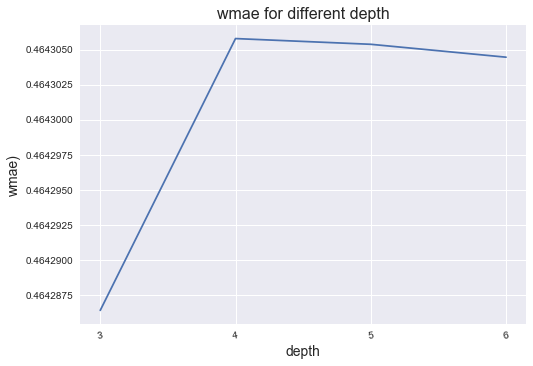

In [31]:
results_depth = {}
for i in [3,4,5,6]:
    result = {}
    print('\n\n\n\nrunning while depth = {}'.format(i))
    params={'booster': 'gblinear',
        'objective': 'reg:linear',
        'eta': 0.01,
        'depth': i,
        'subsample': 1.0,
        'min_child_weight': 5,
        'col_sample_bytree': 0.2,
        'seed': 0,
        'silent': 1,
        }

    watchlist = [(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=3000,early_stopping_rounds=300,evals=watchlist, feval=wmae_xgb,maximize=False)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(labels_val, pred_xgb)
    results_depth['{}'.format(i)] = result
    
print(results_depth)
plot_results(results_depth, 'depth')

In [ ]:
plot_results(results_depth, 'depth')

In [7]:
params={'booster': 'gblinear',
        'objective': 'reg:linear',
        'eta': 0.01,
        'depth': 10,
        'subsample': 1.0,
        'min_child_weight': 5,
        'col_sample_bytree': 0.2,
        'seed': 0,
        'silent': 1,
        }

watchlist = [(dataset_train,'train')]
model = xgb.train(params,dataset_train,num_boost_round=3000,early_stopping_rounds=300,evals=watchlist, feval=wmae_xgb,maximize=False)
pred_xgb = model.predict(dataset_val)
    
wmae_ = wmae(labels_val, pred_xgb)
print('{}'.format(wmae_))

[0]	train-wmae:5.71275
Will train until train-wmae hasn't improved in 300 rounds.
[1]	train-wmae:2.70628
[2]	train-wmae:1.76551
[3]	train-wmae:1.33048
[4]	train-wmae:1.09107
[5]	train-wmae:0.944701
[6]	train-wmae:0.848524
[7]	train-wmae:0.781945
[8]	train-wmae:0.733632
[9]	train-wmae:0.697542
[10]	train-wmae:0.66972
[11]	train-wmae:0.647599
[12]	train-wmae:0.629579
[13]	train-wmae:0.614676
[14]	train-wmae:0.602218
[15]	train-wmae:0.591539
[16]	train-wmae:0.58231
[17]	train-wmae:0.574175
[18]	train-wmae:0.566924
[19]	train-wmae:0.560408
[20]	train-wmae:0.55449
[21]	train-wmae:0.549058
[22]	train-wmae:0.544029
[23]	train-wmae:0.539334
[24]	train-wmae:0.534947
[25]	train-wmae:0.530801
[26]	train-wmae:0.526876
[27]	train-wmae:0.523138
[28]	train-wmae:0.519565
[29]	train-wmae:0.516135
[30]	train-wmae:0.512825
[31]	train-wmae:0.509637
[32]	train-wmae:0.506552
[33]	train-wmae:0.503557
[34]	train-wmae:0.500645
[35]	train-wmae:0.497812
[36]	train-wmae:0.495054
[37]	train-wmae:0.492364
[38]	trai

[319]	train-wmae:0.330705
[320]	train-wmae:0.330636
[321]	train-wmae:0.330567
[322]	train-wmae:0.330499
[323]	train-wmae:0.330432
[324]	train-wmae:0.330363
[325]	train-wmae:0.330297
[326]	train-wmae:0.33023
[327]	train-wmae:0.330164
[328]	train-wmae:0.330098
[329]	train-wmae:0.330032
[330]	train-wmae:0.329966
[331]	train-wmae:0.329901
[332]	train-wmae:0.329836
[333]	train-wmae:0.329772
[334]	train-wmae:0.329708
[335]	train-wmae:0.329644
[336]	train-wmae:0.329581
[337]	train-wmae:0.329519
[338]	train-wmae:0.329457
[339]	train-wmae:0.329394
[340]	train-wmae:0.329333
[341]	train-wmae:0.329271
[342]	train-wmae:0.32921
[343]	train-wmae:0.329148
[344]	train-wmae:0.329087
[345]	train-wmae:0.329026
[346]	train-wmae:0.328966
[347]	train-wmae:0.328906
[348]	train-wmae:0.328846
[349]	train-wmae:0.328788
[350]	train-wmae:0.328729
[351]	train-wmae:0.328671
[352]	train-wmae:0.328613
[353]	train-wmae:0.328554
[354]	train-wmae:0.328497
[355]	train-wmae:0.32844
[356]	train-wmae:0.328382
[357]	train-wma

[636]	train-wmae:0.317009
[637]	train-wmae:0.316979
[638]	train-wmae:0.316948
[639]	train-wmae:0.316917
[640]	train-wmae:0.316886
[641]	train-wmae:0.316855
[642]	train-wmae:0.316824
[643]	train-wmae:0.316794
[644]	train-wmae:0.316763
[645]	train-wmae:0.316733
[646]	train-wmae:0.316702
[647]	train-wmae:0.316672
[648]	train-wmae:0.316641
[649]	train-wmae:0.316611
[650]	train-wmae:0.31658
[651]	train-wmae:0.316551
[652]	train-wmae:0.31652
[653]	train-wmae:0.31649
[654]	train-wmae:0.316461
[655]	train-wmae:0.316431
[656]	train-wmae:0.316402
[657]	train-wmae:0.316372
[658]	train-wmae:0.316342
[659]	train-wmae:0.316313
[660]	train-wmae:0.316282
[661]	train-wmae:0.316253
[662]	train-wmae:0.316222
[663]	train-wmae:0.316193
[664]	train-wmae:0.316164
[665]	train-wmae:0.316134
[666]	train-wmae:0.316105
[667]	train-wmae:0.316076
[668]	train-wmae:0.316046
[669]	train-wmae:0.316016
[670]	train-wmae:0.315986
[671]	train-wmae:0.315957
[672]	train-wmae:0.315927
[673]	train-wmae:0.315897
[674]	train-wma

[953]	train-wmae:0.309095
[954]	train-wmae:0.309074
[955]	train-wmae:0.309054
[956]	train-wmae:0.309034
[957]	train-wmae:0.309013
[958]	train-wmae:0.308993
[959]	train-wmae:0.308973
[960]	train-wmae:0.308952
[961]	train-wmae:0.308932
[962]	train-wmae:0.308912
[963]	train-wmae:0.308892
[964]	train-wmae:0.308871
[965]	train-wmae:0.308852
[966]	train-wmae:0.308832
[967]	train-wmae:0.308811
[968]	train-wmae:0.308791
[969]	train-wmae:0.308771
[970]	train-wmae:0.308751
[971]	train-wmae:0.308731
[972]	train-wmae:0.308711
[973]	train-wmae:0.308691
[974]	train-wmae:0.308671
[975]	train-wmae:0.308652
[976]	train-wmae:0.308632
[977]	train-wmae:0.308612
[978]	train-wmae:0.308592
[979]	train-wmae:0.308573
[980]	train-wmae:0.308553
[981]	train-wmae:0.308534
[982]	train-wmae:0.308514
[983]	train-wmae:0.308494
[984]	train-wmae:0.308475
[985]	train-wmae:0.308455
[986]	train-wmae:0.308435
[987]	train-wmae:0.308415
[988]	train-wmae:0.308397
[989]	train-wmae:0.308377
[990]	train-wmae:0.308358
[991]	train-

[1260]	train-wmae:0.303904
[1261]	train-wmae:0.30389
[1262]	train-wmae:0.303876
[1263]	train-wmae:0.303862
[1264]	train-wmae:0.303848
[1265]	train-wmae:0.303834
[1266]	train-wmae:0.30382
[1267]	train-wmae:0.303806
[1268]	train-wmae:0.303791
[1269]	train-wmae:0.303777
[1270]	train-wmae:0.303763
[1271]	train-wmae:0.303749
[1272]	train-wmae:0.303735
[1273]	train-wmae:0.303721
[1274]	train-wmae:0.303707
[1275]	train-wmae:0.303693
[1276]	train-wmae:0.303679
[1277]	train-wmae:0.303666
[1278]	train-wmae:0.303652
[1279]	train-wmae:0.303638
[1280]	train-wmae:0.303624
[1281]	train-wmae:0.303611
[1282]	train-wmae:0.303597
[1283]	train-wmae:0.303583
[1284]	train-wmae:0.303569
[1285]	train-wmae:0.303556
[1286]	train-wmae:0.303542
[1287]	train-wmae:0.303529
[1288]	train-wmae:0.303515
[1289]	train-wmae:0.303501
[1290]	train-wmae:0.303487
[1291]	train-wmae:0.303474
[1292]	train-wmae:0.30346
[1293]	train-wmae:0.303447
[1294]	train-wmae:0.303433
[1295]	train-wmae:0.303419
[1296]	train-wmae:0.303406
[129

[1565]	train-wmae:0.300265
[1566]	train-wmae:0.300255
[1567]	train-wmae:0.300244
[1568]	train-wmae:0.300234
[1569]	train-wmae:0.300224
[1570]	train-wmae:0.300214
[1571]	train-wmae:0.300204
[1572]	train-wmae:0.300194
[1573]	train-wmae:0.300184
[1574]	train-wmae:0.300174
[1575]	train-wmae:0.300164
[1576]	train-wmae:0.300154
[1577]	train-wmae:0.300144
[1578]	train-wmae:0.300134
[1579]	train-wmae:0.300124
[1580]	train-wmae:0.300114
[1581]	train-wmae:0.300104
[1582]	train-wmae:0.300094
[1583]	train-wmae:0.300084
[1584]	train-wmae:0.300074
[1585]	train-wmae:0.300064
[1586]	train-wmae:0.300054
[1587]	train-wmae:0.300044
[1588]	train-wmae:0.300034
[1589]	train-wmae:0.300024
[1590]	train-wmae:0.300015
[1591]	train-wmae:0.300005
[1592]	train-wmae:0.299995
[1593]	train-wmae:0.299985
[1594]	train-wmae:0.299975
[1595]	train-wmae:0.299965
[1596]	train-wmae:0.299955
[1597]	train-wmae:0.299945
[1598]	train-wmae:0.299936
[1599]	train-wmae:0.299926
[1600]	train-wmae:0.299916
[1601]	train-wmae:0.299906
[

[1870]	train-wmae:0.297593
[1871]	train-wmae:0.297585
[1872]	train-wmae:0.297578
[1873]	train-wmae:0.29757
[1874]	train-wmae:0.297563
[1875]	train-wmae:0.297555
[1876]	train-wmae:0.297548
[1877]	train-wmae:0.29754
[1878]	train-wmae:0.297533
[1879]	train-wmae:0.297525
[1880]	train-wmae:0.297517
[1881]	train-wmae:0.29751
[1882]	train-wmae:0.297503
[1883]	train-wmae:0.297495
[1884]	train-wmae:0.297488
[1885]	train-wmae:0.29748
[1886]	train-wmae:0.297472
[1887]	train-wmae:0.297465
[1888]	train-wmae:0.297458
[1889]	train-wmae:0.29745
[1890]	train-wmae:0.297443
[1891]	train-wmae:0.297435
[1892]	train-wmae:0.297428
[1893]	train-wmae:0.297421
[1894]	train-wmae:0.297413
[1895]	train-wmae:0.297406
[1896]	train-wmae:0.297398
[1897]	train-wmae:0.297391
[1898]	train-wmae:0.297384
[1899]	train-wmae:0.297376
[1900]	train-wmae:0.297369
[1901]	train-wmae:0.297362
[1902]	train-wmae:0.297354
[1903]	train-wmae:0.297347
[1904]	train-wmae:0.29734
[1905]	train-wmae:0.297332
[1906]	train-wmae:0.297325
[1907]	

[2175]	train-wmae:0.295602
[2176]	train-wmae:0.295596
[2177]	train-wmae:0.295591
[2178]	train-wmae:0.295585
[2179]	train-wmae:0.295579
[2180]	train-wmae:0.295574
[2181]	train-wmae:0.295568
[2182]	train-wmae:0.295562
[2183]	train-wmae:0.295557
[2184]	train-wmae:0.295551
[2185]	train-wmae:0.295545
[2186]	train-wmae:0.29554
[2187]	train-wmae:0.295534
[2188]	train-wmae:0.295529
[2189]	train-wmae:0.295523
[2190]	train-wmae:0.295517
[2191]	train-wmae:0.295512
[2192]	train-wmae:0.295506
[2193]	train-wmae:0.295501
[2194]	train-wmae:0.295495
[2195]	train-wmae:0.29549
[2196]	train-wmae:0.295484
[2197]	train-wmae:0.295478
[2198]	train-wmae:0.295473
[2199]	train-wmae:0.295468
[2200]	train-wmae:0.295462
[2201]	train-wmae:0.295457
[2202]	train-wmae:0.295451
[2203]	train-wmae:0.295446
[2204]	train-wmae:0.29544
[2205]	train-wmae:0.295434
[2206]	train-wmae:0.295429
[2207]	train-wmae:0.295423
[2208]	train-wmae:0.295418
[2209]	train-wmae:0.295412
[2210]	train-wmae:0.295407
[2211]	train-wmae:0.295401
[221

[2480]	train-wmae:0.294082
[2481]	train-wmae:0.294078
[2482]	train-wmae:0.294074
[2483]	train-wmae:0.294069
[2484]	train-wmae:0.294065
[2485]	train-wmae:0.294061
[2486]	train-wmae:0.294056
[2487]	train-wmae:0.294052
[2488]	train-wmae:0.294048
[2489]	train-wmae:0.294043
[2490]	train-wmae:0.294039
[2491]	train-wmae:0.294035
[2492]	train-wmae:0.29403
[2493]	train-wmae:0.294026
[2494]	train-wmae:0.294022
[2495]	train-wmae:0.294017
[2496]	train-wmae:0.294013
[2497]	train-wmae:0.294009
[2498]	train-wmae:0.294004
[2499]	train-wmae:0.294
[2500]	train-wmae:0.293996
[2501]	train-wmae:0.293991
[2502]	train-wmae:0.293987
[2503]	train-wmae:0.293983
[2504]	train-wmae:0.293979
[2505]	train-wmae:0.293974
[2506]	train-wmae:0.29397
[2507]	train-wmae:0.293966
[2508]	train-wmae:0.293962
[2509]	train-wmae:0.293957
[2510]	train-wmae:0.293953
[2511]	train-wmae:0.293949
[2512]	train-wmae:0.293944
[2513]	train-wmae:0.29394
[2514]	train-wmae:0.293936
[2515]	train-wmae:0.293932
[2516]	train-wmae:0.293927
[2517]	

[2785]	train-wmae:0.292904
[2786]	train-wmae:0.2929
[2787]	train-wmae:0.292897
[2788]	train-wmae:0.292893
[2789]	train-wmae:0.29289
[2790]	train-wmae:0.292887
[2791]	train-wmae:0.292883
[2792]	train-wmae:0.29288
[2793]	train-wmae:0.292876
[2794]	train-wmae:0.292873
[2795]	train-wmae:0.29287
[2796]	train-wmae:0.292866
[2797]	train-wmae:0.292863
[2798]	train-wmae:0.292859
[2799]	train-wmae:0.292856
[2800]	train-wmae:0.292853
[2801]	train-wmae:0.292849
[2802]	train-wmae:0.292846
[2803]	train-wmae:0.292843
[2804]	train-wmae:0.29284
[2805]	train-wmae:0.292836
[2806]	train-wmae:0.292833
[2807]	train-wmae:0.292829
[2808]	train-wmae:0.292826
[2809]	train-wmae:0.292823
[2810]	train-wmae:0.29282
[2811]	train-wmae:0.292816
[2812]	train-wmae:0.292813
[2813]	train-wmae:0.292809
[2814]	train-wmae:0.292806
[2815]	train-wmae:0.292803
[2816]	train-wmae:0.2928
[2817]	train-wmae:0.292796
[2818]	train-wmae:0.292793
[2819]	train-wmae:0.29279
[2820]	train-wmae:0.292786
[2821]	train-wmae:0.292783
[2822]	trai

In [20]:
a = pd.DataFrame(pred_xgb)
a[a[0]<0]              

0
31    -3292.959961
42    -3009.736328
62     -933.991211
73   -12575.601562
133  -19920.431641
153  -16476.093750
174  -26096.210938
179  -13072.761719
218  -22085.861328
232  -18486.417969
237  -33069.015625
251  -24631.824219
266   -6602.757812
282  -15775.794922
285  -10209.125000
365   -8910.054688
369   -9342.902344
373    -879.320312
403   -8931.382812
447  -44177.750000
503   -2828.554688
530    -439.109375
551   -3914.406250
552  -12421.140625
603  -21262.214844
609   -9246.265625
621    -944.789062
625   -1470.304688
643     -22.718750
671    -787.562500
...            ...
2319 -22367.937500
2347 -13871.570312
2380  -1720.652344
2385 -37885.851562
2418  -1595.504639
2472 -12468.179688
2514  -8698.712891
2524  -3134.828125
2526  -7560.343750
2529 -17242.406250
2537  -9500.843750
2545 -53497.875000
2564  -2542.646484
2610 -21034.382812
2637  -5051.578125
2646 -46212.187500
2652  -2569.585938
2673 -10317.570312
2703 -12099.703125
2745 -22661.871094
2771  -8574.539062
2779 -21255.445312
2781 -38135.996094
2792  -8877.210938
2857  -3644.593750
2863 -14929.976562
2887  -7443.085938
2912 -24561.343750
2934 -36779.726562
2986 -29053.296875

[128 rows x 1 columns]

In [60]:
results_alpha = {}
for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    result = {}
    print('\n\n\n\nrunning while lambda = {}'.format(i))
    params={'booster':'gblinear',
            'objective': 'reg:linear',
            'eval_metric':'mae',
            'alpha':i,
            'seed':0,
            'silent':1,
        }

    watchlist = [(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=3000,evals=watchlist,early_stopping_rounds=300)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(y_test, pred_xgb)
    results_alpha['{}'.format(i)] = result
    
print(results_alpha)





running while lambda = 0
[0]	train-mae:60160.1
Will train until train-mae hasn't improved in 300 rounds.
[1]	train-mae:56408.5
[2]	train-mae:55373.4
[3]	train-mae:54535.1
[4]	train-mae:53981.3
[5]	train-mae:53525.7
[6]	train-mae:53126.4
[7]	train-mae:52797
[8]	train-mae:52560.8
[9]	train-mae:52350.7
[10]	train-mae:52218.2
[11]	train-mae:52078.6
[12]	train-mae:51947.9
[13]	train-mae:51857.6
[14]	train-mae:51794.6
[15]	train-mae:51719.1
[16]	train-mae:51658.9
[17]	train-mae:51603.4
[18]	train-mae:51563.8
[19]	train-mae:51527.2
[20]	train-mae:51494.3
[21]	train-mae:51464.3
[22]	train-mae:51436.5
[23]	train-mae:51417.1
[24]	train-mae:51399.3
[25]	train-mae:51382.2
[26]	train-mae:51365.2
[27]	train-mae:51351.6
[28]	train-mae:51340.7
[29]	train-mae:51327.1
[30]	train-mae:51317.2
[31]	train-mae:51307
[32]	train-mae:51292.6
[33]	train-mae:51289.2
[34]	train-mae:51280.5
[35]	train-mae:51272
[36]	train-mae:51263.3
[37]	train-mae:51255
[38]	train-mae:51247.8
[39]	train-mae:51240
[40]	train-ma

[345]	train-mae:50823.7
[346]	train-mae:50823.5
[347]	train-mae:50823
[348]	train-mae:50822.5
[349]	train-mae:50822.4
[350]	train-mae:50821.8
[351]	train-mae:50821.3
[352]	train-mae:50820.9
[353]	train-mae:50820.3
[354]	train-mae:50820
[355]	train-mae:50819.4
[356]	train-mae:50818.9
[357]	train-mae:50818.5
[358]	train-mae:50818.2
[359]	train-mae:50817.7
[360]	train-mae:50816.6
[361]	train-mae:50815.8
[362]	train-mae:50815.7
[363]	train-mae:50815.9
[364]	train-mae:50815.4
[365]	train-mae:50815
[366]	train-mae:50814.6
[367]	train-mae:50814.3
[368]	train-mae:50813.8
[369]	train-mae:50813.5
[370]	train-mae:50812.9
[371]	train-mae:50812.6
[372]	train-mae:50812.2
[373]	train-mae:50811.8
[374]	train-mae:50811.4
[375]	train-mae:50810.7
[376]	train-mae:50810.7
[377]	train-mae:50810.1
[378]	train-mae:50809.8
[379]	train-mae:50809.2
[380]	train-mae:50809
[381]	train-mae:50808.5
[382]	train-mae:50807.9
[383]	train-mae:50807.7
[384]	train-mae:50807.3
[385]	train-mae:50806.9
[386]	train-mae:50806.1


[689]	train-mae:50716.4
[690]	train-mae:50716.2
[691]	train-mae:50716.3
[692]	train-mae:50716
[693]	train-mae:50715.7
[694]	train-mae:50715.5
[695]	train-mae:50715.3
[696]	train-mae:50715
[697]	train-mae:50715
[698]	train-mae:50714.6
[699]	train-mae:50714.4
[700]	train-mae:50714.2
[701]	train-mae:50713.6
[702]	train-mae:50713.5
[703]	train-mae:50713.6
[704]	train-mae:50713.4
[705]	train-mae:50713.1
[706]	train-mae:50713
[707]	train-mae:50712.9
[708]	train-mae:50712.6
[709]	train-mae:50712.3
[710]	train-mae:50712.2
[711]	train-mae:50712.1
[712]	train-mae:50711.9
[713]	train-mae:50711.6
[714]	train-mae:50711.5
[715]	train-mae:50711.2
[716]	train-mae:50711.1
[717]	train-mae:50710.9
[718]	train-mae:50710.6
[719]	train-mae:50710.3
[720]	train-mae:50710.2
[721]	train-mae:50710
[722]	train-mae:50709.7
[723]	train-mae:50709.6
[724]	train-mae:50709.2
[725]	train-mae:50708.8
[726]	train-mae:50708.9
[727]	train-mae:50708.7
[728]	train-mae:50708.7
[729]	train-mae:50708
[730]	train-mae:50708.2
[731

[1033]	train-mae:50659.1
[1034]	train-mae:50658.4
[1035]	train-mae:50658.7
[1036]	train-mae:50658.7
[1037]	train-mae:50658.4
[1038]	train-mae:50658.4
[1039]	train-mae:50657.9
[1040]	train-mae:50658.1
[1041]	train-mae:50658
[1042]	train-mae:50658
[1043]	train-mae:50657.9
[1044]	train-mae:50657.7
[1045]	train-mae:50657.5
[1046]	train-mae:50657.3
[1047]	train-mae:50657.1
[1048]	train-mae:50657.1
[1049]	train-mae:50656.9
[1050]	train-mae:50656.8
[1051]	train-mae:50656.4
[1052]	train-mae:50656.6
[1053]	train-mae:50656.5
[1054]	train-mae:50656.3
[1055]	train-mae:50656.1
[1056]	train-mae:50656
[1057]	train-mae:50655.4
[1058]	train-mae:50655.7
[1059]	train-mae:50655.6
[1060]	train-mae:50655.4
[1061]	train-mae:50655.3
[1062]	train-mae:50655.1
[1063]	train-mae:50654.8
[1064]	train-mae:50654.8
[1065]	train-mae:50654.8
[1066]	train-mae:50654.5
[1067]	train-mae:50654.4
[1068]	train-mae:50654.2
[1069]	train-mae:50654.2
[1070]	train-mae:50654
[1071]	train-mae:50653.9
[1072]	train-mae:50653.9
[1073]	t

[1364]	train-mae:50617.1
[1365]	train-mae:50616.9
[1366]	train-mae:50616.9
[1367]	train-mae:50616.3
[1368]	train-mae:50616.7
[1369]	train-mae:50616.4
[1370]	train-mae:50616.5
[1371]	train-mae:50616.3
[1372]	train-mae:50616.1
[1373]	train-mae:50616
[1374]	train-mae:50616
[1375]	train-mae:50615.8
[1376]	train-mae:50615.8
[1377]	train-mae:50615.4
[1378]	train-mae:50615.3
[1379]	train-mae:50615.3
[1380]	train-mae:50615.3
[1381]	train-mae:50615.2
[1382]	train-mae:50615
[1383]	train-mae:50614.9
[1384]	train-mae:50614.7
[1385]	train-mae:50614.5
[1386]	train-mae:50614.4
[1387]	train-mae:50614.2
[1388]	train-mae:50614.2
[1389]	train-mae:50614.2
[1390]	train-mae:50614.1
[1391]	train-mae:50613.9
[1392]	train-mae:50613.6
[1393]	train-mae:50613.8
[1394]	train-mae:50613.7
[1395]	train-mae:50613.6
[1396]	train-mae:50613.2
[1397]	train-mae:50613.3
[1398]	train-mae:50613.1
[1399]	train-mae:50613.2
[1400]	train-mae:50613
[1401]	train-mae:50612.9
[1402]	train-mae:50612.8
[1403]	train-mae:50612.6
[1404]	t

[1695]	train-mae:50582.2
[1696]	train-mae:50582.1
[1697]	train-mae:50581.6
[1698]	train-mae:50581.6
[1699]	train-mae:50581.9
[1700]	train-mae:50581.5
[1701]	train-mae:50581.6
[1702]	train-mae:50581.6
[1703]	train-mae:50581.6
[1704]	train-mae:50581.3
[1705]	train-mae:50581.2
[1706]	train-mae:50581.1
[1707]	train-mae:50581.1
[1708]	train-mae:50581
[1709]	train-mae:50580.9
[1710]	train-mae:50580.4
[1711]	train-mae:50580.6
[1712]	train-mae:50580.5
[1713]	train-mae:50580.4
[1714]	train-mae:50580.3
[1715]	train-mae:50580.4
[1716]	train-mae:50580
[1717]	train-mae:50579.8
[1718]	train-mae:50579.9
[1719]	train-mae:50580
[1720]	train-mae:50579.9
[1721]	train-mae:50579.8
[1722]	train-mae:50579.6
[1723]	train-mae:50579.5
[1724]	train-mae:50579.1
[1725]	train-mae:50579.5
[1726]	train-mae:50579.2
[1727]	train-mae:50579
[1728]	train-mae:50578.9
[1729]	train-mae:50578.8
[1730]	train-mae:50578.7
[1731]	train-mae:50578.7
[1732]	train-mae:50578.7
[1733]	train-mae:50578.4
[1734]	train-mae:50578.2
[1735]	t

[2026]	train-mae:50553.3
[2027]	train-mae:50553.1
[2028]	train-mae:50553.2
[2029]	train-mae:50553.1
[2030]	train-mae:50553
[2031]	train-mae:50553
[2032]	train-mae:50552.8
[2033]	train-mae:50552.7
[2034]	train-mae:50552.7
[2035]	train-mae:50552.5
[2036]	train-mae:50552.5
[2037]	train-mae:50552.5
[2038]	train-mae:50552.3
[2039]	train-mae:50552.3
[2040]	train-mae:50552.2
[2041]	train-mae:50552.1
[2042]	train-mae:50552
[2043]	train-mae:50551.5
[2044]	train-mae:50551.8
[2045]	train-mae:50551.8
[2046]	train-mae:50551.7
[2047]	train-mae:50551.5
[2048]	train-mae:50551.4
[2049]	train-mae:50551.2
[2050]	train-mae:50551.4
[2051]	train-mae:50551.2
[2052]	train-mae:50551.1
[2053]	train-mae:50550.9
[2054]	train-mae:50550.8
[2055]	train-mae:50550.8
[2056]	train-mae:50550.7
[2057]	train-mae:50550.7
[2058]	train-mae:50550.6
[2059]	train-mae:50550.5
[2060]	train-mae:50550.2
[2061]	train-mae:50550.4
[2062]	train-mae:50550.4
[2063]	train-mae:50550.2
[2064]	train-mae:50550.2
[2065]	train-mae:50550
[2066]	t

[2357]	train-mae:50526.6
[2358]	train-mae:50526.6
[2359]	train-mae:50526.5
[2360]	train-mae:50526.4
[2361]	train-mae:50526.3
[2362]	train-mae:50526.2
[2363]	train-mae:50526.1
[2364]	train-mae:50526.1
[2365]	train-mae:50525.9
[2366]	train-mae:50525.9
[2367]	train-mae:50525.9
[2368]	train-mae:50525.8
[2369]	train-mae:50525.7
[2370]	train-mae:50525.6
[2371]	train-mae:50525.5
[2372]	train-mae:50525.2
[2373]	train-mae:50524.8
[2374]	train-mae:50525
[2375]	train-mae:50524.9
[2376]	train-mae:50524.8
[2377]	train-mae:50524.7
[2378]	train-mae:50524.7
[2379]	train-mae:50524.7
[2380]	train-mae:50524.6
[2381]	train-mae:50524.2
[2382]	train-mae:50524.4
[2383]	train-mae:50524.3
[2384]	train-mae:50524.3
[2385]	train-mae:50524
[2386]	train-mae:50523.8
[2387]	train-mae:50523.9
[2388]	train-mae:50523.9
[2389]	train-mae:50523.7
[2390]	train-mae:50523.8
[2391]	train-mae:50523.7
[2392]	train-mae:50523.7
[2393]	train-mae:50523.6
[2394]	train-mae:50523.5
[2395]	train-mae:50523.4
[2396]	train-mae:50523.3
[239

[2687]	train-mae:50501.9
[2688]	train-mae:50501.8
[2689]	train-mae:50501.8
[2690]	train-mae:50501.6
[2691]	train-mae:50501.3
[2692]	train-mae:50501.1
[2693]	train-mae:50501.4
[2694]	train-mae:50501.4
[2695]	train-mae:50501.3
[2696]	train-mae:50501.3
[2697]	train-mae:50501.1
[2698]	train-mae:50501
[2699]	train-mae:50501
[2700]	train-mae:50501
[2701]	train-mae:50501
[2702]	train-mae:50500.6
[2703]	train-mae:50500.8
[2704]	train-mae:50500.7
[2705]	train-mae:50500.6
[2706]	train-mae:50500.6
[2707]	train-mae:50500.6
[2708]	train-mae:50500.4
[2709]	train-mae:50500.4
[2710]	train-mae:50500.3
[2711]	train-mae:50500.3
[2712]	train-mae:50500.2
[2713]	train-mae:50500.1
[2714]	train-mae:50500
[2715]	train-mae:50500
[2716]	train-mae:50499.9
[2717]	train-mae:50499.9
[2718]	train-mae:50499.7
[2719]	train-mae:50499.6
[2720]	train-mae:50499.7
[2721]	train-mae:50499.6
[2722]	train-mae:50499.6
[2723]	train-mae:50499.4
[2724]	train-mae:50499.4
[2725]	train-mae:50499.4
[2726]	train-mae:50499.2
[2727]	train

[17]	train-mae:51596.2
[18]	train-mae:51547.8
[19]	train-mae:51507.6
[20]	train-mae:51477
[21]	train-mae:51448.9
[22]	train-mae:51422.6
[23]	train-mae:51401.6
[24]	train-mae:51383
[25]	train-mae:51368.2
[26]	train-mae:51353.6
[27]	train-mae:51341.3
[28]	train-mae:51326.8
[29]	train-mae:51322.8
[30]	train-mae:51311.6
[31]	train-mae:51302.7
[32]	train-mae:51292.8
[33]	train-mae:51283.6
[34]	train-mae:51275.2
[35]	train-mae:51267.8
[36]	train-mae:51261.1
[37]	train-mae:51253.1
[38]	train-mae:51246.3
[39]	train-mae:51238.7
[40]	train-mae:51232.1
[41]	train-mae:51221.2
[42]	train-mae:51218.6
[43]	train-mae:51213
[44]	train-mae:51207
[45]	train-mae:51201
[46]	train-mae:51195.1
[47]	train-mae:51189.5
[48]	train-mae:51182.9
[49]	train-mae:51178.8
[50]	train-mae:51172.8
[51]	train-mae:51168.3
[52]	train-mae:51163
[53]	train-mae:51158.8
[54]	train-mae:51153.2
[55]	train-mae:51147.3
[56]	train-mae:51144.2
[57]	train-mae:51138.6
[58]	train-mae:51136.6
[59]	train-mae:51132.8
[60]	train-mae:51128.9


[365]	train-mae:50814.8
[366]	train-mae:50813.5
[367]	train-mae:50814
[368]	train-mae:50813.3
[369]	train-mae:50812.8
[370]	train-mae:50812.9
[371]	train-mae:50812.3
[372]	train-mae:50812
[373]	train-mae:50811.5
[374]	train-mae:50811.1
[375]	train-mae:50811
[376]	train-mae:50810.3
[377]	train-mae:50810
[378]	train-mae:50809.7
[379]	train-mae:50808.4
[380]	train-mae:50808.6
[381]	train-mae:50808.4
[382]	train-mae:50808
[383]	train-mae:50806.5
[384]	train-mae:50807.3
[385]	train-mae:50806.7
[386]	train-mae:50806.6
[387]	train-mae:50806.2
[388]	train-mae:50805.7
[389]	train-mae:50805.2
[390]	train-mae:50805
[391]	train-mae:50804.5
[392]	train-mae:50803.3
[393]	train-mae:50803.8
[394]	train-mae:50803.5
[395]	train-mae:50803
[396]	train-mae:50802.4
[397]	train-mae:50802.3
[398]	train-mae:50802
[399]	train-mae:50801.5
[400]	train-mae:50801.2
[401]	train-mae:50800.8
[402]	train-mae:50800.2
[403]	train-mae:50800
[404]	train-mae:50798.3
[405]	train-mae:50799.1
[406]	train-mae:50798.6
[407]	trai

[710]	train-mae:50712.4
[711]	train-mae:50712.3
[712]	train-mae:50712.3
[713]	train-mae:50712
[714]	train-mae:50712
[715]	train-mae:50711.7
[716]	train-mae:50711.5
[717]	train-mae:50711.3
[718]	train-mae:50711.2
[719]	train-mae:50710.9
[720]	train-mae:50710.8
[721]	train-mae:50710.5
[722]	train-mae:50710.2
[723]	train-mae:50710.1
[724]	train-mae:50709.7
[725]	train-mae:50709.7
[726]	train-mae:50709.6
[727]	train-mae:50709.4
[728]	train-mae:50709
[729]	train-mae:50709
[730]	train-mae:50708.4
[731]	train-mae:50708.6
[732]	train-mae:50708.5
[733]	train-mae:50708
[734]	train-mae:50707.9
[735]	train-mae:50707.7
[736]	train-mae:50707.8
[737]	train-mae:50707.4
[738]	train-mae:50707.3
[739]	train-mae:50707.1
[740]	train-mae:50706.6
[741]	train-mae:50706.8
[742]	train-mae:50706.5
[743]	train-mae:50706.4
[744]	train-mae:50705.6
[745]	train-mae:50705.8
[746]	train-mae:50705.4
[747]	train-mae:50705.2
[748]	train-mae:50705.3
[749]	train-mae:50705.3
[750]	train-mae:50704.9
[751]	train-mae:50704.8
[7

[1052]	train-mae:50657.3
[1053]	train-mae:50657.1
[1054]	train-mae:50656.8
[1055]	train-mae:50656.7
[1056]	train-mae:50656.5
[1057]	train-mae:50656.5
[1058]	train-mae:50656.2
[1059]	train-mae:50656.1
[1060]	train-mae:50656.1
[1061]	train-mae:50656
[1062]	train-mae:50655.8
[1063]	train-mae:50655.5
[1064]	train-mae:50655.3
[1065]	train-mae:50655.4
[1066]	train-mae:50655.1
[1067]	train-mae:50655.1
[1068]	train-mae:50654.9
[1069]	train-mae:50654.8
[1070]	train-mae:50654.7
[1071]	train-mae:50654.5
[1072]	train-mae:50654.4
[1073]	train-mae:50654.2
[1074]	train-mae:50654.3
[1075]	train-mae:50654
[1076]	train-mae:50653.9
[1077]	train-mae:50653.8
[1078]	train-mae:50653.2
[1079]	train-mae:50652.9
[1080]	train-mae:50653.2
[1081]	train-mae:50653.2
[1082]	train-mae:50653.1
[1083]	train-mae:50652.9
[1084]	train-mae:50652.6
[1085]	train-mae:50652.6
[1086]	train-mae:50652.6
[1087]	train-mae:50652.1
[1088]	train-mae:50652.2
[1089]	train-mae:50652.1
[1090]	train-mae:50651.9
[1091]	train-mae:50651.4
[109

[1383]	train-mae:50615
[1384]	train-mae:50614.8
[1385]	train-mae:50614.8
[1386]	train-mae:50614.7
[1387]	train-mae:50614.5
[1388]	train-mae:50614.5
[1389]	train-mae:50614.1
[1390]	train-mae:50614.3
[1391]	train-mae:50614.1
[1392]	train-mae:50614
[1393]	train-mae:50613.8
[1394]	train-mae:50614
[1395]	train-mae:50613.8
[1396]	train-mae:50613.8
[1397]	train-mae:50613.6
[1398]	train-mae:50613.1
[1399]	train-mae:50613.3
[1400]	train-mae:50613.2
[1401]	train-mae:50612.5
[1402]	train-mae:50613
[1403]	train-mae:50612.8
[1404]	train-mae:50612.8
[1405]	train-mae:50612.7
[1406]	train-mae:50612.1
[1407]	train-mae:50612.4
[1408]	train-mae:50612.1
[1409]	train-mae:50612.4
[1410]	train-mae:50612.2
[1411]	train-mae:50612.1
[1412]	train-mae:50612.1
[1413]	train-mae:50611.9
[1414]	train-mae:50611.8
[1415]	train-mae:50611.4
[1416]	train-mae:50611.6
[1417]	train-mae:50611.4
[1418]	train-mae:50611.4
[1419]	train-mae:50611.1
[1420]	train-mae:50611.1
[1421]	train-mae:50611.2
[1422]	train-mae:50610.9
[1423]	t

[1714]	train-mae:50581
[1715]	train-mae:50581.1
[1716]	train-mae:50581
[1717]	train-mae:50581
[1718]	train-mae:50580.5
[1719]	train-mae:50580.7
[1720]	train-mae:50580.9
[1721]	train-mae:50580.6
[1722]	train-mae:50580.6
[1723]	train-mae:50580.3
[1724]	train-mae:50580
[1725]	train-mae:50580.1
[1726]	train-mae:50580
[1727]	train-mae:50579.9
[1728]	train-mae:50579.8
[1729]	train-mae:50579.8
[1730]	train-mae:50579.6
[1731]	train-mae:50579.5
[1732]	train-mae:50579.5
[1733]	train-mae:50579.4
[1734]	train-mae:50579.3
[1735]	train-mae:50579.1
[1736]	train-mae:50579.1
[1737]	train-mae:50579
[1738]	train-mae:50578.8
[1739]	train-mae:50578.7
[1740]	train-mae:50578.7
[1741]	train-mae:50578.6
[1742]	train-mae:50578.5
[1743]	train-mae:50578.5
[1744]	train-mae:50578.4
[1745]	train-mae:50578.1
[1746]	train-mae:50578.2
[1747]	train-mae:50578.2
[1748]	train-mae:50578
[1749]	train-mae:50578
[1750]	train-mae:50577.8
[1751]	train-mae:50577.4
[1752]	train-mae:50577.5
[1753]	train-mae:50577.2
[1754]	train-mae

[2045]	train-mae:50552
[2046]	train-mae:50552
[2047]	train-mae:50551.8
[2048]	train-mae:50551.7
[2049]	train-mae:50551.6
[2050]	train-mae:50551.3
[2051]	train-mae:50551.4
[2052]	train-mae:50551.1
[2053]	train-mae:50551.1
[2054]	train-mae:50551.2
[2055]	train-mae:50551.1
[2056]	train-mae:50551
[2057]	train-mae:50551
[2058]	train-mae:50550.8
[2059]	train-mae:50550.8
[2060]	train-mae:50550.5
[2061]	train-mae:50550.7
[2062]	train-mae:50550.4
[2063]	train-mae:50550.4
[2064]	train-mae:50550.4
[2065]	train-mae:50550.3
[2066]	train-mae:50550
[2067]	train-mae:50550.1
[2068]	train-mae:50550.1
[2069]	train-mae:50550
[2070]	train-mae:50549.9
[2071]	train-mae:50549.8
[2072]	train-mae:50549.7
[2073]	train-mae:50549.7
[2074]	train-mae:50549.6
[2075]	train-mae:50549.5
[2076]	train-mae:50549.5
[2077]	train-mae:50549
[2078]	train-mae:50549.1
[2079]	train-mae:50549.1
[2080]	train-mae:50549.2
[2081]	train-mae:50549.1
[2082]	train-mae:50549
[2083]	train-mae:50549
[2084]	train-mae:50548.7
[2085]	train-mae:5

[2377]	train-mae:50525.4
[2378]	train-mae:50525.3
[2379]	train-mae:50525.3
[2380]	train-mae:50525.3
[2381]	train-mae:50525.1
[2382]	train-mae:50525
[2383]	train-mae:50524.9
[2384]	train-mae:50524.8
[2385]	train-mae:50524.8
[2386]	train-mae:50524.7
[2387]	train-mae:50524.6
[2388]	train-mae:50524.6
[2389]	train-mae:50524.4
[2390]	train-mae:50524.4
[2391]	train-mae:50524.3
[2392]	train-mae:50524.3
[2393]	train-mae:50524.2
[2394]	train-mae:50524.1
[2395]	train-mae:50524.1
[2396]	train-mae:50524
[2397]	train-mae:50523.9
[2398]	train-mae:50523.8
[2399]	train-mae:50523.7
[2400]	train-mae:50523.7
[2401]	train-mae:50523.6
[2402]	train-mae:50523.5
[2403]	train-mae:50523.5
[2404]	train-mae:50523.5
[2405]	train-mae:50523.2
[2406]	train-mae:50523.1
[2407]	train-mae:50523.1
[2408]	train-mae:50523.1
[2409]	train-mae:50523
[2410]	train-mae:50523
[2411]	train-mae:50522.8
[2412]	train-mae:50522.8
[2413]	train-mae:50522.6
[2414]	train-mae:50522.6
[2415]	train-mae:50522.5
[2416]	train-mae:50522.5
[2417]	t

[2708]	train-mae:50500.9
[2709]	train-mae:50500.8
[2710]	train-mae:50500.7
[2711]	train-mae:50500.7
[2712]	train-mae:50500.6
[2713]	train-mae:50500.3
[2714]	train-mae:50500.5
[2715]	train-mae:50500.3
[2716]	train-mae:50500.4
[2717]	train-mae:50500.2
[2718]	train-mae:50499.8
[2719]	train-mae:50500.1
[2720]	train-mae:50500
[2721]	train-mae:50499.8
[2722]	train-mae:50499.8
[2723]	train-mae:50499.8
[2724]	train-mae:50499.7
[2725]	train-mae:50499.1
[2726]	train-mae:50499.3
[2727]	train-mae:50499.5
[2728]	train-mae:50499.4
[2729]	train-mae:50499.2
[2730]	train-mae:50499.2
[2731]	train-mae:50499.1
[2732]	train-mae:50499.1
[2733]	train-mae:50499
[2734]	train-mae:50499
[2735]	train-mae:50498.9
[2736]	train-mae:50498.8
[2737]	train-mae:50498.7
[2738]	train-mae:50498.7
[2739]	train-mae:50498.6
[2740]	train-mae:50498.2
[2741]	train-mae:50498.4
[2742]	train-mae:50498.2
[2743]	train-mae:50498.3
[2744]	train-mae:50498
[2745]	train-mae:50498
[2746]	train-mae:50497.9
[2747]	train-mae:50497.9
[2748]	tra

[39]	train-mae:51238.3
[40]	train-mae:51228.6
[41]	train-mae:51224.6
[42]	train-mae:51217.8
[43]	train-mae:51212.2
[44]	train-mae:51203.7
[45]	train-mae:51199.5
[46]	train-mae:51193.7
[47]	train-mae:51187.2
[48]	train-mae:51183.7
[49]	train-mae:51178.5
[50]	train-mae:51172.1
[51]	train-mae:51165.3
[52]	train-mae:51163.2
[53]	train-mae:51158.5
[54]	train-mae:51153.6
[55]	train-mae:51148.4
[56]	train-mae:51144.4
[57]	train-mae:51140.3
[58]	train-mae:51135.1
[59]	train-mae:51132.5
[60]	train-mae:51128.1
[61]	train-mae:51123.9
[62]	train-mae:51120.2
[63]	train-mae:51115.8
[64]	train-mae:51112.4
[65]	train-mae:51109.1
[66]	train-mae:51105.9
[67]	train-mae:51102.3
[68]	train-mae:51098.8
[69]	train-mae:51096
[70]	train-mae:51092.4
[71]	train-mae:51089.9
[72]	train-mae:51086.2
[73]	train-mae:51083.3
[74]	train-mae:51079.3
[75]	train-mae:51073.4
[76]	train-mae:51074.9
[77]	train-mae:51071.9
[78]	train-mae:51068.8
[79]	train-mae:51062.4
[80]	train-mae:51062.9
[81]	train-mae:51060.1
[82]	train-ma

[386]	train-mae:50805.8
[387]	train-mae:50805.6
[388]	train-mae:50804.9
[389]	train-mae:50804.6
[390]	train-mae:50804.2
[391]	train-mae:50803.3
[392]	train-mae:50803.3
[393]	train-mae:50803.2
[394]	train-mae:50802.7
[395]	train-mae:50802.3
[396]	train-mae:50801.7
[397]	train-mae:50801.7
[398]	train-mae:50801.1
[399]	train-mae:50800.7
[400]	train-mae:50800.4
[401]	train-mae:50799.9
[402]	train-mae:50799.2
[403]	train-mae:50799.1
[404]	train-mae:50798.8
[405]	train-mae:50798.3
[406]	train-mae:50797.7
[407]	train-mae:50797.6
[408]	train-mae:50797.2
[409]	train-mae:50796.9
[410]	train-mae:50796.5
[411]	train-mae:50796
[412]	train-mae:50795
[413]	train-mae:50795.4
[414]	train-mae:50794.8
[415]	train-mae:50794.7
[416]	train-mae:50794.4
[417]	train-mae:50793.8
[418]	train-mae:50793.5
[419]	train-mae:50793.1
[420]	train-mae:50792.4
[421]	train-mae:50792.5
[422]	train-mae:50791.8
[423]	train-mae:50791.5
[424]	train-mae:50791.1
[425]	train-mae:50790.9
[426]	train-mae:50790.4
[427]	train-mae:5078

[731]	train-mae:50707.5
[732]	train-mae:50707.4
[733]	train-mae:50706.7
[734]	train-mae:50706.9
[735]	train-mae:50706.8
[736]	train-mae:50706.5
[737]	train-mae:50706.4
[738]	train-mae:50706.1
[739]	train-mae:50706.2
[740]	train-mae:50705.8
[741]	train-mae:50705.8
[742]	train-mae:50705.5
[743]	train-mae:50705.4
[744]	train-mae:50704.6
[745]	train-mae:50704.7
[746]	train-mae:50704.9
[747]	train-mae:50704.1
[748]	train-mae:50704.5
[749]	train-mae:50704.3
[750]	train-mae:50704.1
[751]	train-mae:50703.7
[752]	train-mae:50703.6
[753]	train-mae:50703.6
[754]	train-mae:50703.4
[755]	train-mae:50703
[756]	train-mae:50702.9
[757]	train-mae:50702.9
[758]	train-mae:50702.7
[759]	train-mae:50702.5
[760]	train-mae:50702.4
[761]	train-mae:50702.1
[762]	train-mae:50702.1
[763]	train-mae:50701.5
[764]	train-mae:50701.5
[765]	train-mae:50701.3
[766]	train-mae:50701.3
[767]	train-mae:50701.1
[768]	train-mae:50701
[769]	train-mae:50700.8
[770]	train-mae:50700.7
[771]	train-mae:50700.5
[772]	train-mae:5069

[1073]	train-mae:50653.5
[1074]	train-mae:50653.3
[1075]	train-mae:50653.2
[1076]	train-mae:50653
[1077]	train-mae:50652.9
[1078]	train-mae:50652.9
[1079]	train-mae:50652.6
[1080]	train-mae:50652.6
[1081]	train-mae:50652.4
[1082]	train-mae:50652.2
[1083]	train-mae:50652.1
[1084]	train-mae:50651.9
[1085]	train-mae:50651.8
[1086]	train-mae:50651.5
[1087]	train-mae:50651.3
[1088]	train-mae:50651.5
[1089]	train-mae:50651.3
[1090]	train-mae:50651.3
[1091]	train-mae:50650.8
[1092]	train-mae:50651
[1093]	train-mae:50650.6
[1094]	train-mae:50650.5
[1095]	train-mae:50650.6
[1096]	train-mae:50650.3
[1097]	train-mae:50650.3
[1098]	train-mae:50650.1
[1099]	train-mae:50649.7
[1100]	train-mae:50649.9
[1101]	train-mae:50649.8
[1102]	train-mae:50649.3
[1103]	train-mae:50649.5
[1104]	train-mae:50649.2
[1105]	train-mae:50649
[1106]	train-mae:50649
[1107]	train-mae:50648.7
[1108]	train-mae:50648.5
[1109]	train-mae:50648.5
[1110]	train-mae:50648.2
[1111]	train-mae:50648.3
[1112]	train-mae:50648
[1113]	tra

[1404]	train-mae:50612.5
[1405]	train-mae:50612.2
[1406]	train-mae:50612.1
[1407]	train-mae:50612
[1408]	train-mae:50612
[1409]	train-mae:50612.1
[1410]	train-mae:50611.7
[1411]	train-mae:50611.8
[1412]	train-mae:50611.7
[1413]	train-mae:50611.6
[1414]	train-mae:50611.5
[1415]	train-mae:50611.4
[1416]	train-mae:50611.2
[1417]	train-mae:50611.2
[1418]	train-mae:50610.7
[1419]	train-mae:50610.5
[1420]	train-mae:50610.7
[1421]	train-mae:50610.6
[1422]	train-mae:50610.4
[1423]	train-mae:50610.5
[1424]	train-mae:50610.2
[1425]	train-mae:50610
[1426]	train-mae:50610.1
[1427]	train-mae:50610
[1428]	train-mae:50609.9
[1429]	train-mae:50609.9
[1430]	train-mae:50609.6
[1431]	train-mae:50609.5
[1432]	train-mae:50609.5
[1433]	train-mae:50609
[1434]	train-mae:50609.2
[1435]	train-mae:50609.2
[1436]	train-mae:50609
[1437]	train-mae:50608.9
[1438]	train-mae:50608.8
[1439]	train-mae:50608.8
[1440]	train-mae:50608.5
[1441]	train-mae:50608.2
[1442]	train-mae:50608.3
[1443]	train-mae:50608.1
[1444]	train

[1734]	train-mae:50578.5
[1735]	train-mae:50578.5
[1736]	train-mae:50578.4
[1737]	train-mae:50578.3
[1738]	train-mae:50578.2
[1739]	train-mae:50578.1
[1740]	train-mae:50578
[1741]	train-mae:50577.9
[1742]	train-mae:50577.8
[1743]	train-mae:50577.7
[1744]	train-mae:50577.6
[1745]	train-mae:50577.6
[1746]	train-mae:50577.1
[1747]	train-mae:50577.3
[1748]	train-mae:50577
[1749]	train-mae:50577.1
[1750]	train-mae:50577
[1751]	train-mae:50576.9
[1752]	train-mae:50576.7
[1753]	train-mae:50576.6
[1754]	train-mae:50576.6
[1755]	train-mae:50576.3
[1756]	train-mae:50576.3
[1757]	train-mae:50576.3
[1758]	train-mae:50576.3
[1759]	train-mae:50575.9
[1760]	train-mae:50576
[1761]	train-mae:50575.8
[1762]	train-mae:50575.8
[1763]	train-mae:50575.7
[1764]	train-mae:50575.6
[1765]	train-mae:50575.5
[1766]	train-mae:50575.5
[1767]	train-mae:50575.3
[1768]	train-mae:50575.2
[1769]	train-mae:50575.1
[1770]	train-mae:50575.1
[1771]	train-mae:50575
[1772]	train-mae:50574.8
[1773]	train-mae:50574.8
[1774]	tra

[2064]	train-mae:50549.4
[2065]	train-mae:50549.4
[2066]	train-mae:50549.2
[2067]	train-mae:50549.2
[2068]	train-mae:50549.1
[2069]	train-mae:50549
[2070]	train-mae:50549
[2071]	train-mae:50549
[2072]	train-mae:50548.8
[2073]	train-mae:50548.6
[2074]	train-mae:50548.7
[2075]	train-mae:50548.6
[2076]	train-mae:50548.5
[2077]	train-mae:50548.4
[2078]	train-mae:50548.2
[2079]	train-mae:50548.1
[2080]	train-mae:50548.1
[2081]	train-mae:50548.1
[2082]	train-mae:50547.9
[2083]	train-mae:50547.9
[2084]	train-mae:50547.7
[2085]	train-mae:50547.8
[2086]	train-mae:50547.7
[2087]	train-mae:50547.6
[2088]	train-mae:50547.5
[2089]	train-mae:50547.4
[2090]	train-mae:50547.3
[2091]	train-mae:50547
[2092]	train-mae:50547.1
[2093]	train-mae:50547.1
[2094]	train-mae:50547
[2095]	train-mae:50546.9
[2096]	train-mae:50546.9
[2097]	train-mae:50546.6
[2098]	train-mae:50546.6
[2099]	train-mae:50546.6
[2100]	train-mae:50546.4
[2101]	train-mae:50546.4
[2102]	train-mae:50546.5
[2103]	train-mae:50546.2
[2104]	tra

[2395]	train-mae:50523.2
[2396]	train-mae:50523.1
[2397]	train-mae:50523
[2398]	train-mae:50522.9
[2399]	train-mae:50522.8
[2400]	train-mae:50522.7
[2401]	train-mae:50522.7
[2402]	train-mae:50522.7
[2403]	train-mae:50522.4
[2404]	train-mae:50522.4
[2405]	train-mae:50522.4
[2406]	train-mae:50522.2
[2407]	train-mae:50522.1
[2408]	train-mae:50522
[2409]	train-mae:50522
[2410]	train-mae:50522
[2411]	train-mae:50521.9
[2412]	train-mae:50521.8
[2413]	train-mae:50521.7
[2414]	train-mae:50521.8
[2415]	train-mae:50521.6
[2416]	train-mae:50521.2
[2417]	train-mae:50521.3
[2418]	train-mae:50521.3
[2419]	train-mae:50521.1
[2420]	train-mae:50521
[2421]	train-mae:50521.1
[2422]	train-mae:50520.9
[2423]	train-mae:50520.9
[2424]	train-mae:50520.6
[2425]	train-mae:50520.5
[2426]	train-mae:50520.2
[2427]	train-mae:50520.5
[2428]	train-mae:50520.5
[2429]	train-mae:50520.4
[2430]	train-mae:50520.3
[2431]	train-mae:50520.1
[2432]	train-mae:50520.1
[2433]	train-mae:50520
[2434]	train-mae:50519.9
[2435]	train

[2726]	train-mae:50498.9
[2727]	train-mae:50498.7
[2728]	train-mae:50498.6
[2729]	train-mae:50498.6
[2730]	train-mae:50498.5
[2731]	train-mae:50498.5
[2732]	train-mae:50498.5
[2733]	train-mae:50498.3
[2734]	train-mae:50498.2
[2735]	train-mae:50498.1
[2736]	train-mae:50498.1
[2737]	train-mae:50498.1
[2738]	train-mae:50498.1
[2739]	train-mae:50497.9
[2740]	train-mae:50497.9
[2741]	train-mae:50497.7
[2742]	train-mae:50497.7
[2743]	train-mae:50497.6
[2744]	train-mae:50497.5
[2745]	train-mae:50497.4
[2746]	train-mae:50497.3
[2747]	train-mae:50497.3
[2748]	train-mae:50497.3
[2749]	train-mae:50497.2
[2750]	train-mae:50497.2
[2751]	train-mae:50497
[2752]	train-mae:50496.9
[2753]	train-mae:50496.9
[2754]	train-mae:50496.8
[2755]	train-mae:50496.8
[2756]	train-mae:50496.7
[2757]	train-mae:50496.6
[2758]	train-mae:50496.5
[2759]	train-mae:50496.5
[2760]	train-mae:50496.4
[2761]	train-mae:50496.4
[2762]	train-mae:50496.3
[2763]	train-mae:50496.2
[2764]	train-mae:50496.1
[2765]	train-mae:50496.1
[2

[58]	train-mae:51133.6
[59]	train-mae:51131.9
[60]	train-mae:51127.7
[61]	train-mae:51124
[62]	train-mae:51120.1
[63]	train-mae:51116.4
[64]	train-mae:51112.9
[65]	train-mae:51109.3
[66]	train-mae:51104.7
[67]	train-mae:51102.4
[68]	train-mae:51098.5
[69]	train-mae:51096
[70]	train-mae:51092.9
[71]	train-mae:51089.8
[72]	train-mae:51086.8
[73]	train-mae:51083.3
[74]	train-mae:51080
[75]	train-mae:51077.6
[76]	train-mae:51074.6
[77]	train-mae:51071.5
[78]	train-mae:51068.6
[79]	train-mae:51065.4
[80]	train-mae:51062.8
[81]	train-mae:51060.5
[82]	train-mae:51057.4
[83]	train-mae:51055.4
[84]	train-mae:51052.9
[85]	train-mae:51048
[86]	train-mae:51047.5
[87]	train-mae:51045.7
[88]	train-mae:51043.5
[89]	train-mae:51041.2
[90]	train-mae:51039.2
[91]	train-mae:51036.9
[92]	train-mae:51034.7
[93]	train-mae:51032.7
[94]	train-mae:51030.5
[95]	train-mae:51026.6
[96]	train-mae:51026.8
[97]	train-mae:51023.8
[98]	train-mae:51023.2
[99]	train-mae:51020.6
[100]	train-mae:51019.6
[101]	train-mae:51

[404]	train-mae:50798.8
[405]	train-mae:50798
[406]	train-mae:50797.8
[407]	train-mae:50797.5
[408]	train-mae:50797.1
[409]	train-mae:50795.7
[410]	train-mae:50796.5
[411]	train-mae:50796.1
[412]	train-mae:50795.3
[413]	train-mae:50795
[414]	train-mae:50794.9
[415]	train-mae:50794.5
[416]	train-mae:50794.2
[417]	train-mae:50793.8
[418]	train-mae:50793.1
[419]	train-mae:50793.2
[420]	train-mae:50792.8
[421]	train-mae:50792.2
[422]	train-mae:50791.8
[423]	train-mae:50791.3
[424]	train-mae:50791.2
[425]	train-mae:50790.8
[426]	train-mae:50789.8
[427]	train-mae:50789.8
[428]	train-mae:50789.9
[429]	train-mae:50789.5
[430]	train-mae:50788.9
[431]	train-mae:50788.7
[432]	train-mae:50788.2
[433]	train-mae:50787.6
[434]	train-mae:50787.5
[435]	train-mae:50786.9
[436]	train-mae:50786.8
[437]	train-mae:50786.3
[438]	train-mae:50786
[439]	train-mae:50785.5
[440]	train-mae:50785.4
[441]	train-mae:50785
[442]	train-mae:50784.6
[443]	train-mae:50784.1
[444]	train-mae:50783.8
[445]	train-mae:50783.5


[749]	train-mae:50704.2
[750]	train-mae:50704.2
[751]	train-mae:50703.9
[752]	train-mae:50703.6
[753]	train-mae:50703.7
[754]	train-mae:50703.6
[755]	train-mae:50703.3
[756]	train-mae:50703.1
[757]	train-mae:50702.7
[758]	train-mae:50702.8
[759]	train-mae:50702.6
[760]	train-mae:50702.4
[761]	train-mae:50702.3
[762]	train-mae:50702
[763]	train-mae:50701.9
[764]	train-mae:50701.2
[765]	train-mae:50701.1
[766]	train-mae:50701.2
[767]	train-mae:50701.1
[768]	train-mae:50700.6
[769]	train-mae:50700.7
[770]	train-mae:50700.6
[771]	train-mae:50700.2
[772]	train-mae:50700.2
[773]	train-mae:50699.8
[774]	train-mae:50699.8
[775]	train-mae:50699.7
[776]	train-mae:50699.3
[777]	train-mae:50699.3
[778]	train-mae:50699.3
[779]	train-mae:50699.1
[780]	train-mae:50698.9
[781]	train-mae:50697.9
[782]	train-mae:50698.5
[783]	train-mae:50698.4
[784]	train-mae:50698.2
[785]	train-mae:50698
[786]	train-mae:50697.8
[787]	train-mae:50697.6
[788]	train-mae:50697.3
[789]	train-mae:50696.8
[790]	train-mae:5069

[1090]	train-mae:50651.1
[1091]	train-mae:50651.1
[1092]	train-mae:50650.9
[1093]	train-mae:50650.7
[1094]	train-mae:50650.7
[1095]	train-mae:50650.3
[1096]	train-mae:50650.5
[1097]	train-mae:50650.2
[1098]	train-mae:50650.2
[1099]	train-mae:50649.8
[1100]	train-mae:50649.9
[1101]	train-mae:50649.8
[1102]	train-mae:50649.6
[1103]	train-mae:50649.5
[1104]	train-mae:50649.2
[1105]	train-mae:50649.1
[1106]	train-mae:50649.3
[1107]	train-mae:50649
[1108]	train-mae:50648.8
[1109]	train-mae:50648.8
[1110]	train-mae:50648.2
[1111]	train-mae:50648.5
[1112]	train-mae:50648.4
[1113]	train-mae:50647.8
[1114]	train-mae:50648
[1115]	train-mae:50648
[1116]	train-mae:50647.9
[1117]	train-mae:50647.7
[1118]	train-mae:50647.4
[1119]	train-mae:50647
[1120]	train-mae:50647.3
[1121]	train-mae:50647.1
[1122]	train-mae:50646.8
[1123]	train-mae:50646.4
[1124]	train-mae:50646.6
[1125]	train-mae:50646.5
[1126]	train-mae:50646.2
[1127]	train-mae:50646.1
[1128]	train-mae:50645.9
[1129]	train-mae:50646
[1130]	tra

[1421]	train-mae:50610.7
[1422]	train-mae:50610.6
[1423]	train-mae:50610.4
[1424]	train-mae:50610.5
[1425]	train-mae:50610.1
[1426]	train-mae:50610.1
[1427]	train-mae:50610
[1428]	train-mae:50609.6
[1429]	train-mae:50609.7
[1430]	train-mae:50609.6
[1431]	train-mae:50609.4
[1432]	train-mae:50609.4
[1433]	train-mae:50609.3
[1434]	train-mae:50609.2
[1435]	train-mae:50609.1
[1436]	train-mae:50609
[1437]	train-mae:50608.9
[1438]	train-mae:50608.8
[1439]	train-mae:50608.7
[1440]	train-mae:50608.4
[1441]	train-mae:50608.4
[1442]	train-mae:50608.2
[1443]	train-mae:50608.3
[1444]	train-mae:50608.1
[1445]	train-mae:50608
[1446]	train-mae:50607.9
[1447]	train-mae:50607.8
[1448]	train-mae:50607.7
[1449]	train-mae:50607.5
[1450]	train-mae:50607.6
[1451]	train-mae:50607.3
[1452]	train-mae:50607.1
[1453]	train-mae:50607.1
[1454]	train-mae:50607
[1455]	train-mae:50607
[1456]	train-mae:50606.8
[1457]	train-mae:50606.7
[1458]	train-mae:50606.2
[1459]	train-mae:50606
[1460]	train-mae:50606.3
[1461]	train

[1751]	train-mae:50576.8
[1752]	train-mae:50576.7
[1753]	train-mae:50576.6
[1754]	train-mae:50576.5
[1755]	train-mae:50576.3
[1756]	train-mae:50576.3
[1757]	train-mae:50576.2
[1758]	train-mae:50576.2
[1759]	train-mae:50575.6
[1760]	train-mae:50575.8
[1761]	train-mae:50575.8
[1762]	train-mae:50575.7
[1763]	train-mae:50575.6
[1764]	train-mae:50575.5
[1765]	train-mae:50575.4
[1766]	train-mae:50575.2
[1767]	train-mae:50575.3
[1768]	train-mae:50575.2
[1769]	train-mae:50574.9
[1770]	train-mae:50575
[1771]	train-mae:50574.9
[1772]	train-mae:50574.9
[1773]	train-mae:50574.7
[1774]	train-mae:50574.6
[1775]	train-mae:50574.5
[1776]	train-mae:50574.5
[1777]	train-mae:50574.1
[1778]	train-mae:50574.1
[1779]	train-mae:50574.1
[1780]	train-mae:50574
[1781]	train-mae:50573.7
[1782]	train-mae:50574
[1783]	train-mae:50573.8
[1784]	train-mae:50573.6
[1785]	train-mae:50573.5
[1786]	train-mae:50573.5
[1787]	train-mae:50573.5
[1788]	train-mae:50573.2
[1789]	train-mae:50573.3
[1790]	train-mae:50573.2
[1791]

[2081]	train-mae:50547.9
[2082]	train-mae:50547.9
[2083]	train-mae:50547.9
[2084]	train-mae:50547.7
[2085]	train-mae:50547.6
[2086]	train-mae:50547.5
[2087]	train-mae:50547.5
[2088]	train-mae:50547.3
[2089]	train-mae:50547.3
[2090]	train-mae:50547
[2091]	train-mae:50546.9
[2092]	train-mae:50547.1
[2093]	train-mae:50546.9
[2094]	train-mae:50546.8
[2095]	train-mae:50546.9
[2096]	train-mae:50546.7
[2097]	train-mae:50546.7
[2098]	train-mae:50546.5
[2099]	train-mae:50546.5
[2100]	train-mae:50546.3
[2101]	train-mae:50546.4
[2102]	train-mae:50546.3
[2103]	train-mae:50546.1
[2104]	train-mae:50546.1
[2105]	train-mae:50546
[2106]	train-mae:50545.9
[2107]	train-mae:50545.8
[2108]	train-mae:50545.7
[2109]	train-mae:50545.8
[2110]	train-mae:50545.6
[2111]	train-mae:50545.5
[2112]	train-mae:50545.4
[2113]	train-mae:50545.5
[2114]	train-mae:50545.3
[2115]	train-mae:50544.9
[2116]	train-mae:50545.2
[2117]	train-mae:50545.1
[2118]	train-mae:50545
[2119]	train-mae:50545
[2120]	train-mae:50544.6
[2121]	t

[2412]	train-mae:50522
[2413]	train-mae:50521.9
[2414]	train-mae:50521.7
[2415]	train-mae:50521.7
[2416]	train-mae:50521.7
[2417]	train-mae:50521.6
[2418]	train-mae:50521.5
[2419]	train-mae:50521.4
[2420]	train-mae:50521.3
[2421]	train-mae:50521.1
[2422]	train-mae:50521.1
[2423]	train-mae:50521.1
[2424]	train-mae:50520.9
[2425]	train-mae:50520.9
[2426]	train-mae:50520.8
[2427]	train-mae:50520.8
[2428]	train-mae:50520.7
[2429]	train-mae:50520.6
[2430]	train-mae:50520.6
[2431]	train-mae:50520.5
[2432]	train-mae:50520.4
[2433]	train-mae:50520.4
[2434]	train-mae:50520.3
[2435]	train-mae:50520.1
[2436]	train-mae:50520.2
[2437]	train-mae:50520
[2438]	train-mae:50520.1
[2439]	train-mae:50519.9
[2440]	train-mae:50519.8
[2441]	train-mae:50519.7
[2442]	train-mae:50519.7
[2443]	train-mae:50519.6
[2444]	train-mae:50519.6
[2445]	train-mae:50519.4
[2446]	train-mae:50519.4
[2447]	train-mae:50519.3
[2448]	train-mae:50519.3
[2449]	train-mae:50519.1
[2450]	train-mae:50518.9
[2451]	train-mae:50518.9
[245

[2742]	train-mae:50497.8
[2743]	train-mae:50497.6
[2744]	train-mae:50497.5
[2745]	train-mae:50497.6
[2746]	train-mae:50497.4
[2747]	train-mae:50497.3
[2748]	train-mae:50497.3
[2749]	train-mae:50497.2
[2750]	train-mae:50497.2
[2751]	train-mae:50497.1
[2752]	train-mae:50497
[2753]	train-mae:50497
[2754]	train-mae:50496.8
[2755]	train-mae:50496.7
[2756]	train-mae:50496.7
[2757]	train-mae:50496.7
[2758]	train-mae:50496.5
[2759]	train-mae:50496.4
[2760]	train-mae:50496.4
[2761]	train-mae:50496.4
[2762]	train-mae:50496.2
[2763]	train-mae:50496.2
[2764]	train-mae:50496.1
[2765]	train-mae:50496
[2766]	train-mae:50495.9
[2767]	train-mae:50496
[2768]	train-mae:50495.9
[2769]	train-mae:50495.8
[2770]	train-mae:50495.7
[2771]	train-mae:50495.6
[2772]	train-mae:50495.6
[2773]	train-mae:50495.6
[2774]	train-mae:50495.5
[2775]	train-mae:50495.4
[2776]	train-mae:50495.3
[2777]	train-mae:50495.3
[2778]	train-mae:50495.2
[2779]	train-mae:50495.2
[2780]	train-mae:50495.1
[2781]	train-mae:50495
[2782]	tra

[76]	train-mae:51075.7
[77]	train-mae:51072.9
[78]	train-mae:51069.9
[79]	train-mae:51067
[80]	train-mae:51063.9
[81]	train-mae:51061.5
[82]	train-mae:51058.4
[83]	train-mae:51056.6
[84]	train-mae:51054
[85]	train-mae:51051.5
[86]	train-mae:51049
[87]	train-mae:51047
[88]	train-mae:51043.8
[89]	train-mae:51042.2
[90]	train-mae:51040.5
[91]	train-mae:51037.6
[92]	train-mae:51035.8
[93]	train-mae:51033.6
[94]	train-mae:51031.8
[95]	train-mae:51029.3
[96]	train-mae:51027.8
[97]	train-mae:51026.7
[98]	train-mae:51024.3
[99]	train-mae:51022.6
[100]	train-mae:51020.1
[101]	train-mae:51018.4
[102]	train-mae:51017.5
[103]	train-mae:51015.4
[104]	train-mae:51013.9
[105]	train-mae:51012.2
[106]	train-mae:51009.8
[107]	train-mae:51009.1
[108]	train-mae:51006.8
[109]	train-mae:51005.5
[110]	train-mae:51004
[111]	train-mae:51002.2
[112]	train-mae:51000.7
[113]	train-mae:50999.2
[114]	train-mae:50996.2
[115]	train-mae:50995.4
[116]	train-mae:50994.9
[117]	train-mae:50992.8
[118]	train-mae:50991.4
[1

[423]	train-mae:50791.6
[424]	train-mae:50790.7
[425]	train-mae:50790.8
[426]	train-mae:50790.5
[427]	train-mae:50790
[428]	train-mae:50789.9
[429]	train-mae:50789.4
[430]	train-mae:50789
[431]	train-mae:50788.8
[432]	train-mae:50787.6
[433]	train-mae:50788
[434]	train-mae:50787.6
[435]	train-mae:50787.2
[436]	train-mae:50786.8
[437]	train-mae:50785.9
[438]	train-mae:50786.1
[439]	train-mae:50785.4
[440]	train-mae:50785.5
[441]	train-mae:50785.3
[442]	train-mae:50784.8
[443]	train-mae:50784.3
[444]	train-mae:50783.9
[445]	train-mae:50783.8
[446]	train-mae:50783.5
[447]	train-mae:50783.1
[448]	train-mae:50782.4
[449]	train-mae:50782.1
[450]	train-mae:50781.9
[451]	train-mae:50781.4
[452]	train-mae:50781.1
[453]	train-mae:50780.7
[454]	train-mae:50780.4
[455]	train-mae:50779.2
[456]	train-mae:50779.7
[457]	train-mae:50779.3
[458]	train-mae:50779
[459]	train-mae:50777.8
[460]	train-mae:50777.4
[461]	train-mae:50778
[462]	train-mae:50777.8
[463]	train-mae:50777.3
[464]	train-mae:50777
[465

[768]	train-mae:50701.4
[769]	train-mae:50701
[770]	train-mae:50701.1
[771]	train-mae:50701
[772]	train-mae:50700.5
[773]	train-mae:50700.6
[774]	train-mae:50700.2
[775]	train-mae:50700.2
[776]	train-mae:50700.2
[777]	train-mae:50699.5
[778]	train-mae:50699.4
[779]	train-mae:50699.4
[780]	train-mae:50699
[781]	train-mae:50699.1
[782]	train-mae:50698.7
[783]	train-mae:50698.8
[784]	train-mae:50698.6
[785]	train-mae:50698.6
[786]	train-mae:50698.2
[787]	train-mae:50697.9
[788]	train-mae:50697.8
[789]	train-mae:50697.7
[790]	train-mae:50697.5
[791]	train-mae:50697.5
[792]	train-mae:50697
[793]	train-mae:50697
[794]	train-mae:50696.9
[795]	train-mae:50696.6
[796]	train-mae:50696.3
[797]	train-mae:50696.1
[798]	train-mae:50696.1
[799]	train-mae:50695.6
[800]	train-mae:50695.9
[801]	train-mae:50695.5
[802]	train-mae:50695.5
[803]	train-mae:50695.1
[804]	train-mae:50695.3
[805]	train-mae:50695
[806]	train-mae:50694.9
[807]	train-mae:50694.6
[808]	train-mae:50694.6
[809]	train-mae:50694.4
[810

[1108]	train-mae:50649.4
[1109]	train-mae:50649.3
[1110]	train-mae:50649.1
[1111]	train-mae:50648.9
[1112]	train-mae:50648.9
[1113]	train-mae:50648.5
[1114]	train-mae:50648.6
[1115]	train-mae:50648.5
[1116]	train-mae:50648.4
[1117]	train-mae:50648.3
[1118]	train-mae:50647.9
[1119]	train-mae:50648
[1120]	train-mae:50647.9
[1121]	train-mae:50647.7
[1122]	train-mae:50647.7
[1123]	train-mae:50647.4
[1124]	train-mae:50647.4
[1125]	train-mae:50647
[1126]	train-mae:50647.2
[1127]	train-mae:50647.1
[1128]	train-mae:50646.8
[1129]	train-mae:50646.7
[1130]	train-mae:50646.6
[1131]	train-mae:50646.5
[1132]	train-mae:50646.3
[1133]	train-mae:50646.2
[1134]	train-mae:50646.1
[1135]	train-mae:50646
[1136]	train-mae:50645.8
[1137]	train-mae:50645.6
[1138]	train-mae:50645.5
[1139]	train-mae:50645.4
[1140]	train-mae:50645.2
[1141]	train-mae:50645.2
[1142]	train-mae:50645
[1143]	train-mae:50644.9
[1144]	train-mae:50644.7
[1145]	train-mae:50644.7
[1146]	train-mae:50644.5
[1147]	train-mae:50644
[1148]	tra

[1439]	train-mae:50609.4
[1440]	train-mae:50609.1
[1441]	train-mae:50609
[1442]	train-mae:50609
[1443]	train-mae:50608.8
[1444]	train-mae:50608.7
[1445]	train-mae:50608.4
[1446]	train-mae:50608.4
[1447]	train-mae:50608.4
[1448]	train-mae:50608.2
[1449]	train-mae:50608.1
[1450]	train-mae:50608
[1451]	train-mae:50608
[1452]	train-mae:50607.9
[1453]	train-mae:50607.7
[1454]	train-mae:50607.7
[1455]	train-mae:50607.6
[1456]	train-mae:50607.3
[1457]	train-mae:50607.3
[1458]	train-mae:50607.2
[1459]	train-mae:50607
[1460]	train-mae:50607.1
[1461]	train-mae:50606.9
[1462]	train-mae:50606.8
[1463]	train-mae:50606.7
[1464]	train-mae:50606.5
[1465]	train-mae:50606.4
[1466]	train-mae:50606.4
[1467]	train-mae:50606.2
[1468]	train-mae:50605.9
[1469]	train-mae:50606.1
[1470]	train-mae:50605.8
[1471]	train-mae:50605.9
[1472]	train-mae:50605.8
[1473]	train-mae:50605.3
[1474]	train-mae:50605.4
[1475]	train-mae:50605.1
[1476]	train-mae:50605.3
[1477]	train-mae:50605.1
[1478]	train-mae:50605
[1479]	train

[1770]	train-mae:50575.6
[1771]	train-mae:50575.6
[1772]	train-mae:50575.6
[1773]	train-mae:50575.3
[1774]	train-mae:50575.4
[1775]	train-mae:50575.4
[1776]	train-mae:50575.2
[1777]	train-mae:50574.9
[1778]	train-mae:50574.9
[1779]	train-mae:50574.8
[1780]	train-mae:50574.8
[1781]	train-mae:50574.2
[1782]	train-mae:50574.1
[1783]	train-mae:50574.2
[1784]	train-mae:50574
[1785]	train-mae:50574.1
[1786]	train-mae:50574.1
[1787]	train-mae:50573.8
[1788]	train-mae:50573.8
[1789]	train-mae:50573.4
[1790]	train-mae:50573.6
[1791]	train-mae:50573.5
[1792]	train-mae:50573.5
[1793]	train-mae:50572.9
[1794]	train-mae:50573.3
[1795]	train-mae:50573.1
[1796]	train-mae:50573
[1797]	train-mae:50573
[1798]	train-mae:50573
[1799]	train-mae:50572.6
[1800]	train-mae:50572.8
[1801]	train-mae:50572.7
[1802]	train-mae:50572.6
[1803]	train-mae:50572.5
[1804]	train-mae:50572.3
[1805]	train-mae:50572.3
[1806]	train-mae:50572.2
[1807]	train-mae:50572.3
[1808]	train-mae:50572.1
[1809]	train-mae:50572
[1810]	tra

[2101]	train-mae:50547.1
[2102]	train-mae:50547
[2103]	train-mae:50547
[2104]	train-mae:50546.8
[2105]	train-mae:50546.7
[2106]	train-mae:50546.5
[2107]	train-mae:50546.3
[2108]	train-mae:50546.5
[2109]	train-mae:50546.3
[2110]	train-mae:50546.3
[2111]	train-mae:50546.2
[2112]	train-mae:50546.1
[2113]	train-mae:50545.7
[2114]	train-mae:50545.8
[2115]	train-mae:50545.8
[2116]	train-mae:50545.8
[2117]	train-mae:50545.6
[2118]	train-mae:50545.5
[2119]	train-mae:50545.5
[2120]	train-mae:50545.2
[2121]	train-mae:50545.4
[2122]	train-mae:50545.3
[2123]	train-mae:50545.1
[2124]	train-mae:50545.1
[2125]	train-mae:50544.6
[2126]	train-mae:50544.9
[2127]	train-mae:50544.7
[2128]	train-mae:50544.7
[2129]	train-mae:50544.6
[2130]	train-mae:50544.6
[2131]	train-mae:50544.2
[2132]	train-mae:50544.1
[2133]	train-mae:50544.3
[2134]	train-mae:50544.2
[2135]	train-mae:50544.2
[2136]	train-mae:50544.1
[2137]	train-mae:50543.8
[2138]	train-mae:50544
[2139]	train-mae:50543.7
[2140]	train-mae:50543.8
[2141]

[2432]	train-mae:50521
[2433]	train-mae:50520.9
[2434]	train-mae:50521
[2435]	train-mae:50520.8
[2436]	train-mae:50520.8
[2437]	train-mae:50520.7
[2438]	train-mae:50520.6
[2439]	train-mae:50520.5
[2440]	train-mae:50520.5
[2441]	train-mae:50520.4
[2442]	train-mae:50520.1
[2443]	train-mae:50520.2
[2444]	train-mae:50520.1
[2445]	train-mae:50520.1
[2446]	train-mae:50520
[2447]	train-mae:50519.9
[2448]	train-mae:50519.8
[2449]	train-mae:50519.8
[2450]	train-mae:50519.7
[2451]	train-mae:50519.7
[2452]	train-mae:50519.5
[2453]	train-mae:50519.5
[2454]	train-mae:50519.4
[2455]	train-mae:50519.3
[2456]	train-mae:50519.3
[2457]	train-mae:50519.2
[2458]	train-mae:50519
[2459]	train-mae:50519
[2460]	train-mae:50518.9
[2461]	train-mae:50518.9
[2462]	train-mae:50518.8
[2463]	train-mae:50518.8
[2464]	train-mae:50518.7
[2465]	train-mae:50518.5
[2466]	train-mae:50518.4
[2467]	train-mae:50518.5
[2468]	train-mae:50518.4
[2469]	train-mae:50518.4
[2470]	train-mae:50518.1
[2471]	train-mae:50518.1
[2472]	tra

[2763]	train-mae:50496.7
[2764]	train-mae:50496.7
[2765]	train-mae:50496.7
[2766]	train-mae:50496.6
[2767]	train-mae:50496.4
[2768]	train-mae:50496.5
[2769]	train-mae:50496.3
[2770]	train-mae:50496.1
[2771]	train-mae:50495.8
[2772]	train-mae:50496
[2773]	train-mae:50496
[2774]	train-mae:50495.9
[2775]	train-mae:50496
[2776]	train-mae:50495.8
[2777]	train-mae:50495.6
[2778]	train-mae:50495.6
[2779]	train-mae:50495.5
[2780]	train-mae:50495.6
[2781]	train-mae:50495.4
[2782]	train-mae:50495.4
[2783]	train-mae:50495.3
[2784]	train-mae:50495.3
[2785]	train-mae:50495.1
[2786]	train-mae:50495.2
[2787]	train-mae:50495
[2788]	train-mae:50495.1
[2789]	train-mae:50494.8
[2790]	train-mae:50494.9
[2791]	train-mae:50494.8
[2792]	train-mae:50494.7
[2793]	train-mae:50494.6
[2794]	train-mae:50494.6
[2795]	train-mae:50494.6
[2796]	train-mae:50494.4
[2797]	train-mae:50494.5
[2798]	train-mae:50494.4
[2799]	train-mae:50494.2
[2800]	train-mae:50493.9
[2801]	train-mae:50494.1
[2802]	train-mae:50494.1
[2803]	t

[98]	train-mae:51023.9
[99]	train-mae:51022.5
[100]	train-mae:51021
[101]	train-mae:51018.9
[102]	train-mae:51017
[103]	train-mae:51015.8
[104]	train-mae:51013.3
[105]	train-mae:51013
[106]	train-mae:51011
[107]	train-mae:51009.4
[108]	train-mae:51007
[109]	train-mae:51006
[110]	train-mae:51004.7
[111]	train-mae:51002.3
[112]	train-mae:51001.1
[113]	train-mae:50998.9
[114]	train-mae:50999
[115]	train-mae:50997.2
[116]	train-mae:50995.5
[117]	train-mae:50994.2
[118]	train-mae:50992.1
[119]	train-mae:50991.2
[120]	train-mae:50989.6
[121]	train-mae:50988.1
[122]	train-mae:50984.9
[123]	train-mae:50985.2
[124]	train-mae:50983.5
[125]	train-mae:50982.5
[126]	train-mae:50981.4
[127]	train-mae:50979.9
[128]	train-mae:50978.5
[129]	train-mae:50977.3
[130]	train-mae:50975.7
[131]	train-mae:50973.9
[132]	train-mae:50972.9
[133]	train-mae:50972
[134]	train-mae:50970.6
[135]	train-mae:50969.3
[136]	train-mae:50967.5
[137]	train-mae:50966.2
[138]	train-mae:50966.1
[139]	train-mae:50964.3
[140]	trai

[443]	train-mae:50784.8
[444]	train-mae:50784.5
[445]	train-mae:50784.2
[446]	train-mae:50782.7
[447]	train-mae:50783.3
[448]	train-mae:50783
[449]	train-mae:50782.8
[450]	train-mae:50781.9
[451]	train-mae:50782.3
[452]	train-mae:50781.3
[453]	train-mae:50781.3
[454]	train-mae:50780.7
[455]	train-mae:50780.7
[456]	train-mae:50779.7
[457]	train-mae:50779.8
[458]	train-mae:50779.3
[459]	train-mae:50779.3
[460]	train-mae:50778.9
[461]	train-mae:50777.7
[462]	train-mae:50777.9
[463]	train-mae:50777.9
[464]	train-mae:50777.5
[465]	train-mae:50777
[466]	train-mae:50776.7
[467]	train-mae:50776.4
[468]	train-mae:50775.6
[469]	train-mae:50775.9
[470]	train-mae:50775.5
[471]	train-mae:50774.6
[472]	train-mae:50774.4
[473]	train-mae:50774.2
[474]	train-mae:50773.9
[475]	train-mae:50773.8
[476]	train-mae:50772.5
[477]	train-mae:50772.9
[478]	train-mae:50772.6
[479]	train-mae:50772.4
[480]	train-mae:50772
[481]	train-mae:50771.6
[482]	train-mae:50771.4
[483]	train-mae:50770.8
[484]	train-mae:50770.

[788]	train-mae:50698.4
[789]	train-mae:50698
[790]	train-mae:50698
[791]	train-mae:50697.4
[792]	train-mae:50697.2
[793]	train-mae:50697.1
[794]	train-mae:50697.2
[795]	train-mae:50697.1
[796]	train-mae:50696.8
[797]	train-mae:50696.8
[798]	train-mae:50696.4
[799]	train-mae:50696.2
[800]	train-mae:50696.2
[801]	train-mae:50695.8
[802]	train-mae:50695.6
[803]	train-mae:50695.2
[804]	train-mae:50695
[805]	train-mae:50695.1
[806]	train-mae:50695
[807]	train-mae:50694.9
[808]	train-mae:50694.8
[809]	train-mae:50694.6
[810]	train-mae:50694.1
[811]	train-mae:50693.8
[812]	train-mae:50693.9
[813]	train-mae:50693.9
[814]	train-mae:50693.7
[815]	train-mae:50693.5
[816]	train-mae:50693.5
[817]	train-mae:50692.6
[818]	train-mae:50693
[819]	train-mae:50692.4
[820]	train-mae:50692.7
[821]	train-mae:50692.4
[822]	train-mae:50692.1
[823]	train-mae:50692
[824]	train-mae:50692.1
[825]	train-mae:50691.9
[826]	train-mae:50691.3
[827]	train-mae:50691.1
[828]	train-mae:50691.3
[829]	train-mae:50691
[830]	

[1128]	train-mae:50646.9
[1129]	train-mae:50646.8
[1130]	train-mae:50646.2
[1131]	train-mae:50646.5
[1132]	train-mae:50646.2
[1133]	train-mae:50646.2
[1134]	train-mae:50645.9
[1135]	train-mae:50645.7
[1136]	train-mae:50645.5
[1137]	train-mae:50645.6
[1138]	train-mae:50645.6
[1139]	train-mae:50645.6
[1140]	train-mae:50645.3
[1141]	train-mae:50645.2
[1142]	train-mae:50645.2
[1143]	train-mae:50644.7
[1144]	train-mae:50644.9
[1145]	train-mae:50644.7
[1146]	train-mae:50644.6
[1147]	train-mae:50644.6
[1148]	train-mae:50644.2
[1149]	train-mae:50644.1
[1150]	train-mae:50644
[1151]	train-mae:50643.9
[1152]	train-mae:50643.8
[1153]	train-mae:50643.5
[1154]	train-mae:50643.5
[1155]	train-mae:50643.3
[1156]	train-mae:50643.4
[1157]	train-mae:50643.3
[1158]	train-mae:50643.1
[1159]	train-mae:50643
[1160]	train-mae:50642.8
[1161]	train-mae:50642.8
[1162]	train-mae:50642.7
[1163]	train-mae:50642.7
[1164]	train-mae:50642.2
[1165]	train-mae:50641.8
[1166]	train-mae:50642
[1167]	train-mae:50642.1
[1168]

[1459]	train-mae:50607.2
[1460]	train-mae:50607.1
[1461]	train-mae:50607
[1462]	train-mae:50606.9
[1463]	train-mae:50606.9
[1464]	train-mae:50606.6
[1465]	train-mae:50606.7
[1466]	train-mae:50606.5
[1467]	train-mae:50606.6
[1468]	train-mae:50606.2
[1469]	train-mae:50606.2
[1470]	train-mae:50606.1
[1471]	train-mae:50606
[1472]	train-mae:50606.1
[1473]	train-mae:50605.9
[1474]	train-mae:50605.8
[1475]	train-mae:50605.6
[1476]	train-mae:50605.3
[1477]	train-mae:50605.4
[1478]	train-mae:50605.1
[1479]	train-mae:50605.1
[1480]	train-mae:50605
[1481]	train-mae:50604.7
[1482]	train-mae:50604.9
[1483]	train-mae:50604.5
[1484]	train-mae:50604.5
[1485]	train-mae:50604.4
[1486]	train-mae:50604.3
[1487]	train-mae:50604.2
[1488]	train-mae:50604
[1489]	train-mae:50604
[1490]	train-mae:50604
[1491]	train-mae:50603.9
[1492]	train-mae:50603.6
[1493]	train-mae:50603.6
[1494]	train-mae:50603.2
[1495]	train-mae:50603
[1496]	train-mae:50603.3
[1497]	train-mae:50603.1
[1498]	train-mae:50603
[1499]	train-mae

[1790]	train-mae:50573.9
[1791]	train-mae:50573.8
[1792]	train-mae:50573.7
[1793]	train-mae:50573.7
[1794]	train-mae:50573.4
[1795]	train-mae:50573.5
[1796]	train-mae:50573.4
[1797]	train-mae:50573.3
[1798]	train-mae:50573.1
[1799]	train-mae:50573.2
[1800]	train-mae:50573.2
[1801]	train-mae:50573
[1802]	train-mae:50572.9
[1803]	train-mae:50572.6
[1804]	train-mae:50572.6
[1805]	train-mae:50572.7
[1806]	train-mae:50572.5
[1807]	train-mae:50572.5
[1808]	train-mae:50572.3
[1809]	train-mae:50572.3
[1810]	train-mae:50572.3
[1811]	train-mae:50572
[1812]	train-mae:50572.1
[1813]	train-mae:50572
[1814]	train-mae:50571.8
[1815]	train-mae:50571.8
[1816]	train-mae:50571.8
[1817]	train-mae:50571.6
[1818]	train-mae:50571.6
[1819]	train-mae:50571.5
[1820]	train-mae:50571.4
[1821]	train-mae:50571.4
[1822]	train-mae:50571.2
[1823]	train-mae:50571.2
[1824]	train-mae:50571.1
[1825]	train-mae:50570.9
[1826]	train-mae:50570.8
[1827]	train-mae:50570.6
[1828]	train-mae:50570.7
[1829]	train-mae:50570.6
[1830]

[2121]	train-mae:50545.7
[2122]	train-mae:50545.5
[2123]	train-mae:50545.5
[2124]	train-mae:50545.4
[2125]	train-mae:50545.3
[2126]	train-mae:50545.2
[2127]	train-mae:50545.1
[2128]	train-mae:50545
[2129]	train-mae:50544.9
[2130]	train-mae:50544.8
[2131]	train-mae:50544.9
[2132]	train-mae:50544.8
[2133]	train-mae:50544.8
[2134]	train-mae:50544.7
[2135]	train-mae:50544.5
[2136]	train-mae:50544.2
[2137]	train-mae:50544.3
[2138]	train-mae:50543.9
[2139]	train-mae:50543.8
[2140]	train-mae:50543.7
[2141]	train-mae:50544
[2142]	train-mae:50543.8
[2143]	train-mae:50543.8
[2144]	train-mae:50543.8
[2145]	train-mae:50543.4
[2146]	train-mae:50543.6
[2147]	train-mae:50543.5
[2148]	train-mae:50543.4
[2149]	train-mae:50543.3
[2150]	train-mae:50543.3
[2151]	train-mae:50543.2
[2152]	train-mae:50543.2
[2153]	train-mae:50543
[2154]	train-mae:50543
[2155]	train-mae:50542.9
[2156]	train-mae:50542.7
[2157]	train-mae:50542.7
[2158]	train-mae:50542.7
[2159]	train-mae:50542.4
[2160]	train-mae:50542.3
[2161]	t

[2451]	train-mae:50519.5
[2452]	train-mae:50519.5
[2453]	train-mae:50519.3
[2454]	train-mae:50519.3
[2455]	train-mae:50519.2
[2456]	train-mae:50519.1
[2457]	train-mae:50519
[2458]	train-mae:50518.9
[2459]	train-mae:50518.9
[2460]	train-mae:50518.8
[2461]	train-mae:50518.7
[2462]	train-mae:50518.8
[2463]	train-mae:50518.6
[2464]	train-mae:50518.6
[2465]	train-mae:50518.5
[2466]	train-mae:50518.3
[2467]	train-mae:50518.2
[2468]	train-mae:50518.3
[2469]	train-mae:50518.2
[2470]	train-mae:50518.1
[2471]	train-mae:50518
[2472]	train-mae:50517.7
[2473]	train-mae:50517.9
[2474]	train-mae:50517.9
[2475]	train-mae:50517.5
[2476]	train-mae:50517.7
[2477]	train-mae:50517.7
[2478]	train-mae:50517.5
[2479]	train-mae:50517.2
[2480]	train-mae:50517.5
[2481]	train-mae:50517.4
[2482]	train-mae:50517.3
[2483]	train-mae:50517.2
[2484]	train-mae:50517.2
[2485]	train-mae:50517.1
[2486]	train-mae:50517.1
[2487]	train-mae:50517
[2488]	train-mae:50516.9
[2489]	train-mae:50516.8
[2490]	train-mae:50516.7
[2491]

[2782]	train-mae:50495.5
[2783]	train-mae:50495.3
[2784]	train-mae:50495.3
[2785]	train-mae:50495.2
[2786]	train-mae:50495.1
[2787]	train-mae:50495.1
[2788]	train-mae:50495.1
[2789]	train-mae:50495
[2790]	train-mae:50495
[2791]	train-mae:50494.8
[2792]	train-mae:50494.8
[2793]	train-mae:50494.8
[2794]	train-mae:50494.8
[2795]	train-mae:50494.7
[2796]	train-mae:50494.6
[2797]	train-mae:50494.4
[2798]	train-mae:50494.5
[2799]	train-mae:50494.4
[2800]	train-mae:50494.3
[2801]	train-mae:50494.3
[2802]	train-mae:50494.2
[2803]	train-mae:50494.2
[2804]	train-mae:50494
[2805]	train-mae:50494
[2806]	train-mae:50493.9
[2807]	train-mae:50493.8
[2808]	train-mae:50493.8
[2809]	train-mae:50493.6
[2810]	train-mae:50493.3
[2811]	train-mae:50493.6
[2812]	train-mae:50493.5
[2813]	train-mae:50493.5
[2814]	train-mae:50493.3
[2815]	train-mae:50493.3
[2816]	train-mae:50493.2
[2817]	train-mae:50493.1
[2818]	train-mae:50493
[2819]	train-mae:50492.9
[2820]	train-mae:50493
[2821]	train-mae:50492.8
[2822]	train

[119]	train-mae:50990.4
[120]	train-mae:50988.9
[121]	train-mae:50987.4
[122]	train-mae:50986
[123]	train-mae:50984.7
[124]	train-mae:50983.3
[125]	train-mae:50981.4
[126]	train-mae:50978.6
[127]	train-mae:50979.4
[128]	train-mae:50978
[129]	train-mae:50976.8
[130]	train-mae:50975
[131]	train-mae:50973.6
[132]	train-mae:50972.7
[133]	train-mae:50971.5
[134]	train-mae:50970.4
[135]	train-mae:50968.8
[136]	train-mae:50967.2
[137]	train-mae:50966.3
[138]	train-mae:50965.1
[139]	train-mae:50963.8
[140]	train-mae:50962.6
[141]	train-mae:50961.4
[142]	train-mae:50959.7
[143]	train-mae:50959.2
[144]	train-mae:50957.1
[145]	train-mae:50956.6
[146]	train-mae:50955.5
[147]	train-mae:50954
[148]	train-mae:50953.3
[149]	train-mae:50952
[150]	train-mae:50950.6
[151]	train-mae:50949.2
[152]	train-mae:50948.9
[153]	train-mae:50947.5
[154]	train-mae:50946.8
[155]	train-mae:50945.8
[156]	train-mae:50944.7
[157]	train-mae:50943.4
[158]	train-mae:50942.5
[159]	train-mae:50941.3
[160]	train-mae:50940.5
[1

[465]	train-mae:50777.1
[466]	train-mae:50776.7
[467]	train-mae:50776.3
[468]	train-mae:50776.2
[469]	train-mae:50775.6
[470]	train-mae:50775.2
[471]	train-mae:50774.4
[472]	train-mae:50774.7
[473]	train-mae:50774.4
[474]	train-mae:50774.1
[475]	train-mae:50773.8
[476]	train-mae:50773.4
[477]	train-mae:50773.1
[478]	train-mae:50772.6
[479]	train-mae:50772.4
[480]	train-mae:50772.1
[481]	train-mae:50771.5
[482]	train-mae:50771
[483]	train-mae:50771
[484]	train-mae:50770.6
[485]	train-mae:50769.9
[486]	train-mae:50769.4
[487]	train-mae:50769.7
[488]	train-mae:50769.4
[489]	train-mae:50768.9
[490]	train-mae:50768.3
[491]	train-mae:50768.3
[492]	train-mae:50767.8
[493]	train-mae:50767.8
[494]	train-mae:50767.3
[495]	train-mae:50766.9
[496]	train-mae:50766.8
[497]	train-mae:50766.2
[498]	train-mae:50766
[499]	train-mae:50765.8
[500]	train-mae:50764.9
[501]	train-mae:50765
[502]	train-mae:50764.7
[503]	train-mae:50764.3
[504]	train-mae:50764.1
[505]	train-mae:50763.7
[506]	train-mae:50763.3


[810]	train-mae:50694.2
[811]	train-mae:50694.1
[812]	train-mae:50694
[813]	train-mae:50693.8
[814]	train-mae:50693.8
[815]	train-mae:50693.4
[816]	train-mae:50693.4
[817]	train-mae:50693.2
[818]	train-mae:50693.1
[819]	train-mae:50692.9
[820]	train-mae:50692.7
[821]	train-mae:50692.5
[822]	train-mae:50692.3
[823]	train-mae:50692.4
[824]	train-mae:50692.1
[825]	train-mae:50691.5
[826]	train-mae:50691.3
[827]	train-mae:50690.7
[828]	train-mae:50691.2
[829]	train-mae:50690.4
[830]	train-mae:50690.2
[831]	train-mae:50690.5
[832]	train-mae:50690.2
[833]	train-mae:50690.1
[834]	train-mae:50689.3
[835]	train-mae:50689.8
[836]	train-mae:50689.6
[837]	train-mae:50689.3
[838]	train-mae:50689.1
[839]	train-mae:50689.4
[840]	train-mae:50689.2
[841]	train-mae:50688.9
[842]	train-mae:50688.8
[843]	train-mae:50688.5
[844]	train-mae:50688.4
[845]	train-mae:50688.3
[846]	train-mae:50688.1
[847]	train-mae:50687.9
[848]	train-mae:50687.9
[849]	train-mae:50687.9
[850]	train-mae:50687.5
[851]	train-mae:50

[1148]	train-mae:50643.9
[1149]	train-mae:50643.8
[1150]	train-mae:50643.8
[1151]	train-mae:50643.7
[1152]	train-mae:50643.3
[1153]	train-mae:50643.2
[1154]	train-mae:50643
[1155]	train-mae:50643.1
[1156]	train-mae:50643
[1157]	train-mae:50642.8
[1158]	train-mae:50642.8
[1159]	train-mae:50642.6
[1160]	train-mae:50642.5
[1161]	train-mae:50642.3
[1162]	train-mae:50642.2
[1163]	train-mae:50641.8
[1164]	train-mae:50641.8
[1165]	train-mae:50641.8
[1166]	train-mae:50641.7
[1167]	train-mae:50641.4
[1168]	train-mae:50641.4
[1169]	train-mae:50641.4
[1170]	train-mae:50641.1
[1171]	train-mae:50641
[1172]	train-mae:50640.8
[1173]	train-mae:50640.6
[1174]	train-mae:50640.7
[1175]	train-mae:50640.5
[1176]	train-mae:50640
[1177]	train-mae:50639.8
[1178]	train-mae:50639.8
[1179]	train-mae:50639.5
[1180]	train-mae:50639.7
[1181]	train-mae:50639.6
[1182]	train-mae:50639.3
[1183]	train-mae:50639.3
[1184]	train-mae:50638.9
[1185]	train-mae:50638.9
[1186]	train-mae:50639.1
[1187]	train-mae:50638.7
[1188]	t

[1479]	train-mae:50604.8
[1480]	train-mae:50604.5
[1481]	train-mae:50604.5
[1482]	train-mae:50604.2
[1483]	train-mae:50604.3
[1484]	train-mae:50604.2
[1485]	train-mae:50603.7
[1486]	train-mae:50604
[1487]	train-mae:50603.7
[1488]	train-mae:50603.7
[1489]	train-mae:50603.6
[1490]	train-mae:50603.4
[1491]	train-mae:50603.4
[1492]	train-mae:50603.2
[1493]	train-mae:50603.2
[1494]	train-mae:50603.1
[1495]	train-mae:50602.8
[1496]	train-mae:50602.9
[1497]	train-mae:50602.6
[1498]	train-mae:50602.8
[1499]	train-mae:50602.3
[1500]	train-mae:50602.4
[1501]	train-mae:50602.3
[1502]	train-mae:50602.2
[1503]	train-mae:50602
[1504]	train-mae:50602.1
[1505]	train-mae:50602.1
[1506]	train-mae:50601.7
[1507]	train-mae:50601.8
[1508]	train-mae:50601.6
[1509]	train-mae:50601.5
[1510]	train-mae:50601.4
[1511]	train-mae:50601.3
[1512]	train-mae:50601.3
[1513]	train-mae:50601.1
[1514]	train-mae:50601
[1515]	train-mae:50600.9
[1516]	train-mae:50600.6
[1517]	train-mae:50600.6
[1518]	train-mae:50600.5
[1519]

[1810]	train-mae:50571.7
[1811]	train-mae:50571.8
[1812]	train-mae:50571.7
[1813]	train-mae:50571.6
[1814]	train-mae:50571.5
[1815]	train-mae:50571.5
[1816]	train-mae:50571.2
[1817]	train-mae:50571.3
[1818]	train-mae:50571.1
[1819]	train-mae:50571
[1820]	train-mae:50571
[1821]	train-mae:50570.9
[1822]	train-mae:50570.8
[1823]	train-mae:50570.8
[1824]	train-mae:50570.5
[1825]	train-mae:50570.7
[1826]	train-mae:50570.4
[1827]	train-mae:50570.4
[1828]	train-mae:50570.2
[1829]	train-mae:50570.2
[1830]	train-mae:50570
[1831]	train-mae:50570
[1832]	train-mae:50569.9
[1833]	train-mae:50569.9
[1834]	train-mae:50569.7
[1835]	train-mae:50569.7
[1836]	train-mae:50569.6
[1837]	train-mae:50569.6
[1838]	train-mae:50569.3
[1839]	train-mae:50569.2
[1840]	train-mae:50569.1
[1841]	train-mae:50569.1
[1842]	train-mae:50569
[1843]	train-mae:50568.6
[1844]	train-mae:50568.7
[1845]	train-mae:50568.6
[1846]	train-mae:50568.4
[1847]	train-mae:50568.4
[1848]	train-mae:50568.5
[1849]	train-mae:50568.1
[1850]	tra

[2141]	train-mae:50543.6
[2142]	train-mae:50543.5
[2143]	train-mae:50543.2
[2144]	train-mae:50543.4
[2145]	train-mae:50543.2
[2146]	train-mae:50543.4
[2147]	train-mae:50543.3
[2148]	train-mae:50543.2
[2149]	train-mae:50543.1
[2150]	train-mae:50542.9
[2151]	train-mae:50543
[2152]	train-mae:50543
[2153]	train-mae:50542.8
[2154]	train-mae:50542.8
[2155]	train-mae:50542.7
[2156]	train-mae:50542.6
[2157]	train-mae:50542.5
[2158]	train-mae:50542.5
[2159]	train-mae:50542.4
[2160]	train-mae:50542.4
[2161]	train-mae:50542.1
[2162]	train-mae:50542.2
[2163]	train-mae:50542
[2164]	train-mae:50542
[2165]	train-mae:50541.9
[2166]	train-mae:50541.9
[2167]	train-mae:50541.8
[2168]	train-mae:50541.6
[2169]	train-mae:50541.4
[2170]	train-mae:50541.6
[2171]	train-mae:50541.3
[2172]	train-mae:50541.2
[2173]	train-mae:50541.2
[2174]	train-mae:50541.2
[2175]	train-mae:50541.1
[2176]	train-mae:50540.9
[2177]	train-mae:50540.7
[2178]	train-mae:50540.5
[2179]	train-mae:50540.6
[2180]	train-mae:50540.5
[2181]	t

[2472]	train-mae:50518
[2473]	train-mae:50517.8
[2474]	train-mae:50517.8
[2475]	train-mae:50517.8
[2476]	train-mae:50517.7
[2477]	train-mae:50517.6
[2478]	train-mae:50517.5
[2479]	train-mae:50517.4
[2480]	train-mae:50517.4
[2481]	train-mae:50517.2
[2482]	train-mae:50517.2
[2483]	train-mae:50517.1
[2484]	train-mae:50517
[2485]	train-mae:50516.9
[2486]	train-mae:50517
[2487]	train-mae:50516.7
[2488]	train-mae:50516.7
[2489]	train-mae:50516.1
[2490]	train-mae:50516.5
[2491]	train-mae:50516.4
[2492]	train-mae:50516.1
[2493]	train-mae:50516.3
[2494]	train-mae:50516
[2495]	train-mae:50516
[2496]	train-mae:50515.9
[2497]	train-mae:50515.9
[2498]	train-mae:50515.7
[2499]	train-mae:50515.8
[2500]	train-mae:50515.6
[2501]	train-mae:50515.6
[2502]	train-mae:50515.6
[2503]	train-mae:50515.3
[2504]	train-mae:50515.2
[2505]	train-mae:50515.3
[2506]	train-mae:50515.1
[2507]	train-mae:50515.2
[2508]	train-mae:50514.8
[2509]	train-mae:50514.9
[2510]	train-mae:50514.9
[2511]	train-mae:50514.8
[2512]	tra

[2803]	train-mae:50493.8
[2804]	train-mae:50493.8
[2805]	train-mae:50493.7
[2806]	train-mae:50493.5
[2807]	train-mae:50493.6
[2808]	train-mae:50493.2
[2809]	train-mae:50493.2
[2810]	train-mae:50493.1
[2811]	train-mae:50493.1
[2812]	train-mae:50493.1
[2813]	train-mae:50493.1
[2814]	train-mae:50493
[2815]	train-mae:50493
[2816]	train-mae:50492.9
[2817]	train-mae:50492.9
[2818]	train-mae:50492.8
[2819]	train-mae:50492.7
[2820]	train-mae:50492.6
[2821]	train-mae:50492.5
[2822]	train-mae:50492.6
[2823]	train-mae:50492.6
[2824]	train-mae:50492.4
[2825]	train-mae:50492.3
[2826]	train-mae:50492.3
[2827]	train-mae:50492.3
[2828]	train-mae:50492.1
[2829]	train-mae:50492.2
[2830]	train-mae:50492
[2831]	train-mae:50492
[2832]	train-mae:50491.9
[2833]	train-mae:50491.8
[2834]	train-mae:50491.8
[2835]	train-mae:50491.8
[2836]	train-mae:50491.7
[2837]	train-mae:50491.5
[2838]	train-mae:50491.5
[2839]	train-mae:50491.5
[2840]	train-mae:50491.3
[2841]	train-mae:50491.2
[2842]	train-mae:50490.8
[2843]	t

[140]	train-mae:50963.3
[141]	train-mae:50962.1
[142]	train-mae:50960.8
[143]	train-mae:50959.3
[144]	train-mae:50957.9
[145]	train-mae:50957.1
[146]	train-mae:50955.9
[147]	train-mae:50954.8
[148]	train-mae:50952.7
[149]	train-mae:50952.9
[150]	train-mae:50951.6
[151]	train-mae:50950.4
[152]	train-mae:50949.3
[153]	train-mae:50948.3
[154]	train-mae:50947.1
[155]	train-mae:50945.5
[156]	train-mae:50943.6
[157]	train-mae:50943.6
[158]	train-mae:50942.9
[159]	train-mae:50941.7
[160]	train-mae:50941.1
[161]	train-mae:50939.8
[162]	train-mae:50938.7
[163]	train-mae:50937.6
[164]	train-mae:50936.4
[165]	train-mae:50935.9
[166]	train-mae:50934.8
[167]	train-mae:50933.8
[168]	train-mae:50932.8
[169]	train-mae:50930.4
[170]	train-mae:50930.6
[171]	train-mae:50930.3
[172]	train-mae:50929.5
[173]	train-mae:50928.3
[174]	train-mae:50927.3
[175]	train-mae:50925.3
[176]	train-mae:50925.6
[177]	train-mae:50924.9
[178]	train-mae:50923.3
[179]	train-mae:50922.3
[180]	train-mae:50922.2
[181]	train-mae:

[484]	train-mae:50771.2
[485]	train-mae:50771.2
[486]	train-mae:50770.1
[487]	train-mae:50770.3
[488]	train-mae:50769.6
[489]	train-mae:50769.5
[490]	train-mae:50769.3
[491]	train-mae:50768.6
[492]	train-mae:50768.6
[493]	train-mae:50768.3
[494]	train-mae:50767.8
[495]	train-mae:50767.6
[496]	train-mae:50766.8
[497]	train-mae:50767
[498]	train-mae:50766.2
[499]	train-mae:50766.4
[500]	train-mae:50766
[501]	train-mae:50765.6
[502]	train-mae:50764.8
[503]	train-mae:50765.2
[504]	train-mae:50764.7
[505]	train-mae:50764.2
[506]	train-mae:50763.9
[507]	train-mae:50763.5
[508]	train-mae:50763.2
[509]	train-mae:50763
[510]	train-mae:50762.8
[511]	train-mae:50762.4
[512]	train-mae:50761.9
[513]	train-mae:50761.6
[514]	train-mae:50760.9
[515]	train-mae:50761.2
[516]	train-mae:50760.7
[517]	train-mae:50760.7
[518]	train-mae:50760.1
[519]	train-mae:50759.5
[520]	train-mae:50759.6
[521]	train-mae:50759.1
[522]	train-mae:50758.8
[523]	train-mae:50758.7
[524]	train-mae:50758.1
[525]	train-mae:50758.

[828]	train-mae:50691.7
[829]	train-mae:50691.4
[830]	train-mae:50691.3
[831]	train-mae:50691
[832]	train-mae:50691
[833]	train-mae:50690.8
[834]	train-mae:50690.4
[835]	train-mae:50690.2
[836]	train-mae:50690.1
[837]	train-mae:50690
[838]	train-mae:50690
[839]	train-mae:50689.7
[840]	train-mae:50689.7
[841]	train-mae:50689.4
[842]	train-mae:50689.3
[843]	train-mae:50689.2
[844]	train-mae:50688.6
[845]	train-mae:50688.8
[846]	train-mae:50688.7
[847]	train-mae:50688.5
[848]	train-mae:50688.4
[849]	train-mae:50688.1
[850]	train-mae:50687.9
[851]	train-mae:50687.9
[852]	train-mae:50687.7
[853]	train-mae:50687.2
[854]	train-mae:50687
[855]	train-mae:50687.3
[856]	train-mae:50686.6
[857]	train-mae:50687
[858]	train-mae:50686.7
[859]	train-mae:50686.4
[860]	train-mae:50686.4
[861]	train-mae:50686.2
[862]	train-mae:50686.2
[863]	train-mae:50685.4
[864]	train-mae:50685.5
[865]	train-mae:50685.5
[866]	train-mae:50684.8
[867]	train-mae:50684.6
[868]	train-mae:50685
[869]	train-mae:50684.7
[870]	

[1166]	train-mae:50641.9
[1167]	train-mae:50641.2
[1168]	train-mae:50641.5
[1169]	train-mae:50641.4
[1170]	train-mae:50641.1
[1171]	train-mae:50640.6
[1172]	train-mae:50641
[1173]	train-mae:50641
[1174]	train-mae:50640.8
[1175]	train-mae:50640.5
[1176]	train-mae:50640.6
[1177]	train-mae:50640.3
[1178]	train-mae:50640.3
[1179]	train-mae:50640.2
[1180]	train-mae:50640
[1181]	train-mae:50640
[1182]	train-mae:50639.7
[1183]	train-mae:50639.7
[1184]	train-mae:50639.5
[1185]	train-mae:50639.4
[1186]	train-mae:50639.2
[1187]	train-mae:50639.1
[1188]	train-mae:50638.8
[1189]	train-mae:50638.7
[1190]	train-mae:50638.7
[1191]	train-mae:50638.6
[1192]	train-mae:50638.6
[1193]	train-mae:50638.4
[1194]	train-mae:50638.4
[1195]	train-mae:50638.2
[1196]	train-mae:50638
[1197]	train-mae:50638
[1198]	train-mae:50637.8
[1199]	train-mae:50637.5
[1200]	train-mae:50637.6
[1201]	train-mae:50637.5
[1202]	train-mae:50637.3
[1203]	train-mae:50636.9
[1204]	train-mae:50637.1
[1205]	train-mae:50636.9
[1206]	train

[1497]	train-mae:50603
[1498]	train-mae:50602.7
[1499]	train-mae:50602.6
[1500]	train-mae:50602.5
[1501]	train-mae:50602.4
[1502]	train-mae:50602.4
[1503]	train-mae:50602.2
[1504]	train-mae:50602
[1505]	train-mae:50602.1
[1506]	train-mae:50601.9
[1507]	train-mae:50601.7
[1508]	train-mae:50601.2
[1509]	train-mae:50601.6
[1510]	train-mae:50601.4
[1511]	train-mae:50601.2
[1512]	train-mae:50601.2
[1513]	train-mae:50601.1
[1514]	train-mae:50601
[1515]	train-mae:50601
[1516]	train-mae:50600.8
[1517]	train-mae:50600.7
[1518]	train-mae:50600.5
[1519]	train-mae:50600.4
[1520]	train-mae:50600
[1521]	train-mae:50600.3
[1522]	train-mae:50600.1
[1523]	train-mae:50600.1
[1524]	train-mae:50600.1
[1525]	train-mae:50599.7
[1526]	train-mae:50599.6
[1527]	train-mae:50599.4
[1528]	train-mae:50599.3
[1529]	train-mae:50599.1
[1530]	train-mae:50599.3
[1531]	train-mae:50599.1
[1532]	train-mae:50598.9
[1533]	train-mae:50598.9
[1534]	train-mae:50598.6
[1535]	train-mae:50598.7
[1536]	train-mae:50598.4
[1537]	tra

[1828]	train-mae:50570.2
[1829]	train-mae:50570.1
[1830]	train-mae:50570.1
[1831]	train-mae:50570.1
[1832]	train-mae:50569.6
[1833]	train-mae:50569.7
[1834]	train-mae:50569.6
[1835]	train-mae:50569.6
[1836]	train-mae:50569.6
[1837]	train-mae:50569.4
[1838]	train-mae:50569.4
[1839]	train-mae:50569.3
[1840]	train-mae:50569.1
[1841]	train-mae:50569.1
[1842]	train-mae:50569.1
[1843]	train-mae:50569
[1844]	train-mae:50568.8
[1845]	train-mae:50568.9
[1846]	train-mae:50568.6
[1847]	train-mae:50568.4
[1848]	train-mae:50568.4
[1849]	train-mae:50568.3
[1850]	train-mae:50568.3
[1851]	train-mae:50568.2
[1852]	train-mae:50568.2
[1853]	train-mae:50568.1
[1854]	train-mae:50568
[1855]	train-mae:50567.8
[1856]	train-mae:50567.8
[1857]	train-mae:50567.8
[1858]	train-mae:50567.6
[1859]	train-mae:50567.6
[1860]	train-mae:50567.4
[1861]	train-mae:50567.2
[1862]	train-mae:50567.3
[1863]	train-mae:50567.1
[1864]	train-mae:50567
[1865]	train-mae:50566.9
[1866]	train-mae:50566.7
[1867]	train-mae:50566.5
[1868]

[2158]	train-mae:50542.4
[2159]	train-mae:50542.4
[2160]	train-mae:50542.3
[2161]	train-mae:50541.8
[2162]	train-mae:50542.1
[2163]	train-mae:50541.8
[2164]	train-mae:50542
[2165]	train-mae:50541.9
[2166]	train-mae:50541.6
[2167]	train-mae:50541.2
[2168]	train-mae:50541.6
[2169]	train-mae:50541.4
[2170]	train-mae:50541.5
[2171]	train-mae:50541.3
[2172]	train-mae:50541.3
[2173]	train-mae:50541.1
[2174]	train-mae:50541
[2175]	train-mae:50541
[2176]	train-mae:50541
[2177]	train-mae:50541
[2178]	train-mae:50540.8
[2179]	train-mae:50540.7
[2180]	train-mae:50540.7
[2181]	train-mae:50540.6
[2182]	train-mae:50540.6
[2183]	train-mae:50540.4
[2184]	train-mae:50540.4
[2185]	train-mae:50540.3
[2186]	train-mae:50540.2
[2187]	train-mae:50540.1
[2188]	train-mae:50540.1
[2189]	train-mae:50539.8
[2190]	train-mae:50539.8
[2191]	train-mae:50539.7
[2192]	train-mae:50539.8
[2193]	train-mae:50539.6
[2194]	train-mae:50539.6
[2195]	train-mae:50539.5
[2196]	train-mae:50539.4
[2197]	train-mae:50539.3
[2198]	tra

[2489]	train-mae:50516.7
[2490]	train-mae:50516.6
[2491]	train-mae:50516.2
[2492]	train-mae:50516.4
[2493]	train-mae:50516.4
[2494]	train-mae:50516.3
[2495]	train-mae:50516.3
[2496]	train-mae:50516.2
[2497]	train-mae:50516.2
[2498]	train-mae:50516
[2499]	train-mae:50515.9
[2500]	train-mae:50515.8
[2501]	train-mae:50515.7
[2502]	train-mae:50515.6
[2503]	train-mae:50515.5
[2504]	train-mae:50515.6
[2505]	train-mae:50515.3
[2506]	train-mae:50515.3
[2507]	train-mae:50515.3
[2508]	train-mae:50515.2
[2509]	train-mae:50515.1
[2510]	train-mae:50515.1
[2511]	train-mae:50515
[2512]	train-mae:50514.9
[2513]	train-mae:50514.8
[2514]	train-mae:50514.6
[2515]	train-mae:50514.6
[2516]	train-mae:50514.5
[2517]	train-mae:50514.5
[2518]	train-mae:50514.4
[2519]	train-mae:50514.3
[2520]	train-mae:50514.4
[2521]	train-mae:50514.2
[2522]	train-mae:50514.1
[2523]	train-mae:50514.1
[2524]	train-mae:50513.9
[2525]	train-mae:50514
[2526]	train-mae:50513.9
[2527]	train-mae:50513.8
[2528]	train-mae:50513.8
[2529]

[2820]	train-mae:50492.6
[2821]	train-mae:50492.6
[2822]	train-mae:50492.4
[2823]	train-mae:50492.5
[2824]	train-mae:50492.4
[2825]	train-mae:50492.3
[2826]	train-mae:50492.2
[2827]	train-mae:50492.1
[2828]	train-mae:50492.2
[2829]	train-mae:50492
[2830]	train-mae:50491.9
[2831]	train-mae:50492
[2832]	train-mae:50491.9
[2833]	train-mae:50491.8
[2834]	train-mae:50491.7
[2835]	train-mae:50491.6
[2836]	train-mae:50491.5
[2837]	train-mae:50491.5
[2838]	train-mae:50491.4
[2839]	train-mae:50491.5
[2840]	train-mae:50491.3
[2841]	train-mae:50491.2
[2842]	train-mae:50491.2
[2843]	train-mae:50491.1
[2844]	train-mae:50491
[2845]	train-mae:50490.9
[2846]	train-mae:50490.7
[2847]	train-mae:50490.7
[2848]	train-mae:50490.6
[2849]	train-mae:50490.6
[2850]	train-mae:50490.6
[2851]	train-mae:50490.5
[2852]	train-mae:50490.5
[2853]	train-mae:50490.4
[2854]	train-mae:50490.1
[2855]	train-mae:50490.2
[2856]	train-mae:50490.1
[2857]	train-mae:50490.1
[2858]	train-mae:50490
[2859]	train-mae:50489.9
[2860]	t

[158]	train-mae:50945.2
[159]	train-mae:50943.9
[160]	train-mae:50942.8
[161]	train-mae:50942
[162]	train-mae:50941.1
[163]	train-mae:50939.8
[164]	train-mae:50938.8
[165]	train-mae:50938.1
[166]	train-mae:50936
[167]	train-mae:50936.2
[168]	train-mae:50935
[169]	train-mae:50934.1
[170]	train-mae:50933.1
[171]	train-mae:50930.4
[172]	train-mae:50931.3
[173]	train-mae:50930.5
[174]	train-mae:50929.5
[175]	train-mae:50928.7
[176]	train-mae:50927.6
[177]	train-mae:50925.8
[178]	train-mae:50925.2
[179]	train-mae:50923.3
[180]	train-mae:50924
[181]	train-mae:50922.4
[182]	train-mae:50922.2
[183]	train-mae:50921.2
[184]	train-mae:50920.6
[185]	train-mae:50918.3
[186]	train-mae:50918.6
[187]	train-mae:50917.9
[188]	train-mae:50916
[189]	train-mae:50915.6
[190]	train-mae:50915.3
[191]	train-mae:50914.7
[192]	train-mae:50913.8
[193]	train-mae:50912.7
[194]	train-mae:50911.9
[195]	train-mae:50910.9
[196]	train-mae:50910
[197]	train-mae:50909.2
[198]	train-mae:50908.6
[199]	train-mae:50907.6
[200

[503]	train-mae:50764.8
[504]	train-mae:50764
[505]	train-mae:50763.8
[506]	train-mae:50763.1
[507]	train-mae:50763.4
[508]	train-mae:50763.1
[509]	train-mae:50762.8
[510]	train-mae:50762.4
[511]	train-mae:50761.4
[512]	train-mae:50761.7
[513]	train-mae:50761.5
[514]	train-mae:50761.1
[515]	train-mae:50760.6
[516]	train-mae:50760.6
[517]	train-mae:50760.2
[518]	train-mae:50760
[519]	train-mae:50759.4
[520]	train-mae:50759
[521]	train-mae:50758.7
[522]	train-mae:50758
[523]	train-mae:50757.6
[524]	train-mae:50758
[525]	train-mae:50757.7
[526]	train-mae:50757.3
[527]	train-mae:50756.8
[528]	train-mae:50756.6
[529]	train-mae:50756.1
[530]	train-mae:50755.8
[531]	train-mae:50755.5
[532]	train-mae:50755.3
[533]	train-mae:50755.2
[534]	train-mae:50755.1
[535]	train-mae:50754.3
[536]	train-mae:50754.5
[537]	train-mae:50754.1
[538]	train-mae:50753.5
[539]	train-mae:50753.6
[540]	train-mae:50753.1
[541]	train-mae:50752.6
[542]	train-mae:50752.4
[543]	train-mae:50752.6
[544]	train-mae:50751.9
[5

[848]	train-mae:50687.4
[849]	train-mae:50687.4
[850]	train-mae:50686.9
[851]	train-mae:50686.8
[852]	train-mae:50686.8
[853]	train-mae:50686.8
[854]	train-mae:50686.5
[855]	train-mae:50686.5
[856]	train-mae:50686
[857]	train-mae:50686.1
[858]	train-mae:50685.8
[859]	train-mae:50685.7
[860]	train-mae:50685.6
[861]	train-mae:50684.8
[862]	train-mae:50684.9
[863]	train-mae:50684.9
[864]	train-mae:50684.8
[865]	train-mae:50684.8
[866]	train-mae:50684.6
[867]	train-mae:50684.3
[868]	train-mae:50684.3
[869]	train-mae:50684.1
[870]	train-mae:50684
[871]	train-mae:50683.5
[872]	train-mae:50683.5
[873]	train-mae:50683.4
[874]	train-mae:50683.3
[875]	train-mae:50683.1
[876]	train-mae:50682.9
[877]	train-mae:50682.6
[878]	train-mae:50682.5
[879]	train-mae:50682.5
[880]	train-mae:50682.2
[881]	train-mae:50682.1
[882]	train-mae:50681.5
[883]	train-mae:50682
[884]	train-mae:50681.8
[885]	train-mae:50681.3
[886]	train-mae:50681.1
[887]	train-mae:50681.1
[888]	train-mae:50680.7
[889]	train-mae:50680.

[1185]	train-mae:50638.5
[1186]	train-mae:50638.2
[1187]	train-mae:50638.1
[1188]	train-mae:50638.1
[1189]	train-mae:50637.9
[1190]	train-mae:50638
[1191]	train-mae:50637.8
[1192]	train-mae:50637.7
[1193]	train-mae:50637.5
[1194]	train-mae:50637.1
[1195]	train-mae:50637.3
[1196]	train-mae:50637.1
[1197]	train-mae:50636.9
[1198]	train-mae:50636.9
[1199]	train-mae:50636.8
[1200]	train-mae:50636.6
[1201]	train-mae:50636.6
[1202]	train-mae:50636.4
[1203]	train-mae:50636.2
[1204]	train-mae:50636.2
[1205]	train-mae:50636
[1206]	train-mae:50635.9
[1207]	train-mae:50635.7
[1208]	train-mae:50635.7
[1209]	train-mae:50635.6
[1210]	train-mae:50635.4
[1211]	train-mae:50635.2
[1212]	train-mae:50634.8
[1213]	train-mae:50635.1
[1214]	train-mae:50635
[1215]	train-mae:50634.6
[1216]	train-mae:50634.6
[1217]	train-mae:50634.5
[1218]	train-mae:50634.5
[1219]	train-mae:50634.2
[1220]	train-mae:50634.2
[1221]	train-mae:50634.1
[1222]	train-mae:50633.9
[1223]	train-mae:50633.7
[1224]	train-mae:50633.7
[1225]

[1516]	train-mae:50599.9
[1517]	train-mae:50600
[1518]	train-mae:50599.8
[1519]	train-mae:50599.9
[1520]	train-mae:50599.7
[1521]	train-mae:50599.6
[1522]	train-mae:50599.5
[1523]	train-mae:50599.4
[1524]	train-mae:50599.3
[1525]	train-mae:50599.3
[1526]	train-mae:50599.1
[1527]	train-mae:50599
[1528]	train-mae:50598.9
[1529]	train-mae:50598.7
[1530]	train-mae:50598.8
[1531]	train-mae:50598.5
[1532]	train-mae:50598.4
[1533]	train-mae:50598.4
[1534]	train-mae:50598.2
[1535]	train-mae:50598.1
[1536]	train-mae:50598.1
[1537]	train-mae:50597.9
[1538]	train-mae:50597.8
[1539]	train-mae:50597.7
[1540]	train-mae:50597.6
[1541]	train-mae:50597.5
[1542]	train-mae:50597.4
[1543]	train-mae:50597.4
[1544]	train-mae:50597.2
[1545]	train-mae:50597.1
[1546]	train-mae:50597.1
[1547]	train-mae:50597
[1548]	train-mae:50596.7
[1549]	train-mae:50596.7
[1550]	train-mae:50596.6
[1551]	train-mae:50596.5
[1552]	train-mae:50596.4
[1553]	train-mae:50596.3
[1554]	train-mae:50596.2
[1555]	train-mae:50596
[1556]	t

[1847]	train-mae:50568.1
[1848]	train-mae:50568
[1849]	train-mae:50567.9
[1850]	train-mae:50567.8
[1851]	train-mae:50567.7
[1852]	train-mae:50567.5
[1853]	train-mae:50567.5
[1854]	train-mae:50567.4
[1855]	train-mae:50567.3
[1856]	train-mae:50567.3
[1857]	train-mae:50566.9
[1858]	train-mae:50567
[1859]	train-mae:50566.9
[1860]	train-mae:50566.9
[1861]	train-mae:50566.7
[1862]	train-mae:50566.8
[1863]	train-mae:50566.6
[1864]	train-mae:50566.6
[1865]	train-mae:50566.5
[1866]	train-mae:50566.3
[1867]	train-mae:50566.4
[1868]	train-mae:50566.3
[1869]	train-mae:50566.2
[1870]	train-mae:50566.1
[1871]	train-mae:50565.9
[1872]	train-mae:50565.9
[1873]	train-mae:50565.9
[1874]	train-mae:50565.7
[1875]	train-mae:50565.6
[1876]	train-mae:50565.2
[1877]	train-mae:50565.4
[1878]	train-mae:50565.3
[1879]	train-mae:50565.2
[1880]	train-mae:50565.1
[1881]	train-mae:50565.2
[1882]	train-mae:50565
[1883]	train-mae:50565
[1884]	train-mae:50564.7
[1885]	train-mae:50564.8
[1886]	train-mae:50564.5
[1887]	t

[2178]	train-mae:50540.1
[2179]	train-mae:50540.1
[2180]	train-mae:50540
[2181]	train-mae:50539.9
[2182]	train-mae:50539.9
[2183]	train-mae:50539.8
[2184]	train-mae:50539.8
[2185]	train-mae:50539.7
[2186]	train-mae:50539.6
[2187]	train-mae:50539.5
[2188]	train-mae:50539.4
[2189]	train-mae:50539.4
[2190]	train-mae:50539.3
[2191]	train-mae:50539.1
[2192]	train-mae:50539.2
[2193]	train-mae:50539.1
[2194]	train-mae:50539
[2195]	train-mae:50538.8
[2196]	train-mae:50538.6
[2197]	train-mae:50538.7
[2198]	train-mae:50538.7
[2199]	train-mae:50538.4
[2200]	train-mae:50538.5
[2201]	train-mae:50538.4
[2202]	train-mae:50538.3
[2203]	train-mae:50538.3
[2204]	train-mae:50538.2
[2205]	train-mae:50538.1
[2206]	train-mae:50537.9
[2207]	train-mae:50538
[2208]	train-mae:50537.8
[2209]	train-mae:50537.8
[2210]	train-mae:50537.7
[2211]	train-mae:50537.5
[2212]	train-mae:50537.6
[2213]	train-mae:50537.5
[2214]	train-mae:50537.4
[2215]	train-mae:50537.4
[2216]	train-mae:50537.3
[2217]	train-mae:50537.1
[2218]

[2509]	train-mae:50514.6
[2510]	train-mae:50514.2
[2511]	train-mae:50514.5
[2512]	train-mae:50514.5
[2513]	train-mae:50514.4
[2514]	train-mae:50514.2
[2515]	train-mae:50514.2
[2516]	train-mae:50514.2
[2517]	train-mae:50514
[2518]	train-mae:50514
[2519]	train-mae:50514
[2520]	train-mae:50513.8
[2521]	train-mae:50513.7
[2522]	train-mae:50513.7
[2523]	train-mae:50513.7
[2524]	train-mae:50513.6
[2525]	train-mae:50513
[2526]	train-mae:50513.4
[2527]	train-mae:50513.3
[2528]	train-mae:50513.2
[2529]	train-mae:50512.9
[2530]	train-mae:50513
[2531]	train-mae:50513
[2532]	train-mae:50512.9
[2533]	train-mae:50512.9
[2534]	train-mae:50512.8
[2535]	train-mae:50512.7
[2536]	train-mae:50512.5
[2537]	train-mae:50512.3
[2538]	train-mae:50512.5
[2539]	train-mae:50512.4
[2540]	train-mae:50512.3
[2541]	train-mae:50512.2
[2542]	train-mae:50512.1
[2543]	train-mae:50512.1
[2544]	train-mae:50512
[2545]	train-mae:50511.9
[2546]	train-mae:50511.7
[2547]	train-mae:50511.6
[2548]	train-mae:50511.6
[2549]	train-m

[2840]	train-mae:50490.7
[2841]	train-mae:50490.7
[2842]	train-mae:50490.5
[2843]	train-mae:50490.5
[2844]	train-mae:50490.5
[2845]	train-mae:50490.3
[2846]	train-mae:50490.4
[2847]	train-mae:50490.3
[2848]	train-mae:50489.9
[2849]	train-mae:50490
[2850]	train-mae:50490
[2851]	train-mae:50489.8
[2852]	train-mae:50489.7
[2853]	train-mae:50489.7
[2854]	train-mae:50489.6
[2855]	train-mae:50489.6
[2856]	train-mae:50489.4
[2857]	train-mae:50489.5
[2858]	train-mae:50489.5
[2859]	train-mae:50489.5
[2860]	train-mae:50489.3
[2861]	train-mae:50489.3
[2862]	train-mae:50489
[2863]	train-mae:50489
[2864]	train-mae:50489
[2865]	train-mae:50489.1
[2866]	train-mae:50488.9
[2867]	train-mae:50488.7
[2868]	train-mae:50488.5
[2869]	train-mae:50488.5
[2870]	train-mae:50488.6
[2871]	train-mae:50488.3
[2872]	train-mae:50488.4
[2873]	train-mae:50488.5
[2874]	train-mae:50488.3
[2875]	train-mae:50488.2
[2876]	train-mae:50488.1
[2877]	train-mae:50488.3
[2878]	train-mae:50487.9
[2879]	train-mae:50488
[2880]	train

[178]	train-mae:50924.1
[179]	train-mae:50924.3
[180]	train-mae:50921.8
[181]	train-mae:50922.2
[182]	train-mae:50920.8
[183]	train-mae:50920.1
[184]	train-mae:50919.4
[185]	train-mae:50918.3
[186]	train-mae:50917.4
[187]	train-mae:50916.7
[188]	train-mae:50915.8
[189]	train-mae:50915.1
[190]	train-mae:50914.2
[191]	train-mae:50913.1
[192]	train-mae:50912.6
[193]	train-mae:50911.2
[194]	train-mae:50911
[195]	train-mae:50910.1
[196]	train-mae:50909.1
[197]	train-mae:50906.6
[198]	train-mae:50907.3
[199]	train-mae:50906.6
[200]	train-mae:50905.9
[201]	train-mae:50904.9
[202]	train-mae:50904.4
[203]	train-mae:50903.3
[204]	train-mae:50902.5
[205]	train-mae:50901.9
[206]	train-mae:50901.2
[207]	train-mae:50900.3
[208]	train-mae:50900
[209]	train-mae:50898.8
[210]	train-mae:50897.7
[211]	train-mae:50897.4
[212]	train-mae:50896.7
[213]	train-mae:50897
[214]	train-mae:50895.3
[215]	train-mae:50894.8
[216]	train-mae:50894.2
[217]	train-mae:50893.4
[218]	train-mae:50892.7
[219]	train-mae:50891.

[523]	train-mae:50757.6
[524]	train-mae:50757
[525]	train-mae:50756.8
[526]	train-mae:50756.5
[527]	train-mae:50756.3
[528]	train-mae:50756.1
[529]	train-mae:50755.6
[530]	train-mae:50755.2
[531]	train-mae:50755.1
[532]	train-mae:50754.9
[533]	train-mae:50754.6
[534]	train-mae:50754.3
[535]	train-mae:50754
[536]	train-mae:50753.7
[537]	train-mae:50753.2
[538]	train-mae:50752.4
[539]	train-mae:50752.8
[540]	train-mae:50752.3
[541]	train-mae:50752.2
[542]	train-mae:50751.8
[543]	train-mae:50751.4
[544]	train-mae:50751.4
[545]	train-mae:50751.2
[546]	train-mae:50750.8
[547]	train-mae:50750.6
[548]	train-mae:50750.2
[549]	train-mae:50750
[550]	train-mae:50749.7
[551]	train-mae:50749.3
[552]	train-mae:50749.3
[553]	train-mae:50749
[554]	train-mae:50748.3
[555]	train-mae:50748.4
[556]	train-mae:50748.2
[557]	train-mae:50747.7
[558]	train-mae:50747.3
[559]	train-mae:50747.3
[560]	train-mae:50747
[561]	train-mae:50746.6
[562]	train-mae:50746.5
[563]	train-mae:50745.8
[564]	train-mae:50745.9
[5

[868]	train-mae:50683.6
[869]	train-mae:50683.3
[870]	train-mae:50682.9
[871]	train-mae:50682.6
[872]	train-mae:50682.5
[873]	train-mae:50682.9
[874]	train-mae:50682.6
[875]	train-mae:50682.6
[876]	train-mae:50682.1
[877]	train-mae:50682.1
[878]	train-mae:50681.9
[879]	train-mae:50682
[880]	train-mae:50681.8
[881]	train-mae:50681.6
[882]	train-mae:50681.4
[883]	train-mae:50681.3
[884]	train-mae:50681.3
[885]	train-mae:50681.1
[886]	train-mae:50680.9
[887]	train-mae:50680.5
[888]	train-mae:50680.5
[889]	train-mae:50680.3
[890]	train-mae:50680.2
[891]	train-mae:50680
[892]	train-mae:50679.9
[893]	train-mae:50679.8
[894]	train-mae:50679.4
[895]	train-mae:50679.4
[896]	train-mae:50679.3
[897]	train-mae:50679.2
[898]	train-mae:50678.8
[899]	train-mae:50678.8
[900]	train-mae:50678.7
[901]	train-mae:50678.3
[902]	train-mae:50677.9
[903]	train-mae:50677.8
[904]	train-mae:50678
[905]	train-mae:50677.8
[906]	train-mae:50677.7
[907]	train-mae:50677.5
[908]	train-mae:50676.9
[909]	train-mae:50677.

[1203]	train-mae:50636
[1204]	train-mae:50636
[1205]	train-mae:50635.7
[1206]	train-mae:50635.7
[1207]	train-mae:50635.4
[1208]	train-mae:50635.4
[1209]	train-mae:50635.2
[1210]	train-mae:50635
[1211]	train-mae:50634.8
[1212]	train-mae:50634.9
[1213]	train-mae:50634.8
[1214]	train-mae:50634.6
[1215]	train-mae:50634.4
[1216]	train-mae:50634.2
[1217]	train-mae:50634.2
[1218]	train-mae:50634.2
[1219]	train-mae:50634
[1220]	train-mae:50633.9
[1221]	train-mae:50633.7
[1222]	train-mae:50633.6
[1223]	train-mae:50633.2
[1224]	train-mae:50633.5
[1225]	train-mae:50633.3
[1226]	train-mae:50632.9
[1227]	train-mae:50632.9
[1228]	train-mae:50632.8
[1229]	train-mae:50632.7
[1230]	train-mae:50632.5
[1231]	train-mae:50632.5
[1232]	train-mae:50632.4
[1233]	train-mae:50632.3
[1234]	train-mae:50632.1
[1235]	train-mae:50632
[1236]	train-mae:50631.8
[1237]	train-mae:50631.8
[1238]	train-mae:50631.5
[1239]	train-mae:50631.4
[1240]	train-mae:50631
[1241]	train-mae:50631
[1242]	train-mae:50631
[1243]	train-mae

[1534]	train-mae:50597.9
[1535]	train-mae:50598.1
[1536]	train-mae:50597.7
[1537]	train-mae:50597.8
[1538]	train-mae:50597.7
[1539]	train-mae:50597.5
[1540]	train-mae:50597.5
[1541]	train-mae:50597.4
[1542]	train-mae:50597.3
[1543]	train-mae:50597.1
[1544]	train-mae:50597
[1545]	train-mae:50596.8
[1546]	train-mae:50596.8
[1547]	train-mae:50596.6
[1548]	train-mae:50596.6
[1549]	train-mae:50596.5
[1550]	train-mae:50596.4
[1551]	train-mae:50596.2
[1552]	train-mae:50596.2
[1553]	train-mae:50596
[1554]	train-mae:50596
[1555]	train-mae:50595.8
[1556]	train-mae:50595.8
[1557]	train-mae:50595.7
[1558]	train-mae:50595.3
[1559]	train-mae:50595.5
[1560]	train-mae:50595.3
[1561]	train-mae:50595.2
[1562]	train-mae:50594.9
[1563]	train-mae:50594.6
[1564]	train-mae:50594.9
[1565]	train-mae:50594.9
[1566]	train-mae:50594.7
[1567]	train-mae:50594.7
[1568]	train-mae:50594.5
[1569]	train-mae:50594.4
[1570]	train-mae:50594.2
[1571]	train-mae:50594.2
[1572]	train-mae:50594
[1573]	train-mae:50594
[1574]	tra

[1865]	train-mae:50566
[1866]	train-mae:50565.9
[1867]	train-mae:50565.9
[1868]	train-mae:50565.4
[1869]	train-mae:50565.6
[1870]	train-mae:50565.3
[1871]	train-mae:50565.6
[1872]	train-mae:50565.4
[1873]	train-mae:50565.3
[1874]	train-mae:50565.2
[1875]	train-mae:50564.6
[1876]	train-mae:50564.8
[1877]	train-mae:50565
[1878]	train-mae:50564.9
[1879]	train-mae:50564.8
[1880]	train-mae:50564.9
[1881]	train-mae:50564.7
[1882]	train-mae:50564.4
[1883]	train-mae:50564.1
[1884]	train-mae:50564.3
[1885]	train-mae:50564.1
[1886]	train-mae:50564.2
[1887]	train-mae:50564.2
[1888]	train-mae:50563.6
[1889]	train-mae:50564
[1890]	train-mae:50563.6
[1891]	train-mae:50563.8
[1892]	train-mae:50563.6
[1893]	train-mae:50563.6
[1894]	train-mae:50563.5
[1895]	train-mae:50563.4
[1896]	train-mae:50563.4
[1897]	train-mae:50563.3
[1898]	train-mae:50563.2
[1899]	train-mae:50563.1
[1900]	train-mae:50563.1
[1901]	train-mae:50563
[1902]	train-mae:50563
[1903]	train-mae:50562.8
[1904]	train-mae:50562.7
[1905]	tra

[2196]	train-mae:50538.6
[2197]	train-mae:50538.4
[2198]	train-mae:50538.4
[2199]	train-mae:50538.3
[2200]	train-mae:50538.3
[2201]	train-mae:50538.1
[2202]	train-mae:50538.1
[2203]	train-mae:50537.9
[2204]	train-mae:50537.9
[2205]	train-mae:50537.8
[2206]	train-mae:50537.8
[2207]	train-mae:50537.7
[2208]	train-mae:50537.7
[2209]	train-mae:50537.5
[2210]	train-mae:50537.5
[2211]	train-mae:50537.3
[2212]	train-mae:50537.3
[2213]	train-mae:50537.2
[2214]	train-mae:50537.2
[2215]	train-mae:50537
[2216]	train-mae:50536.8
[2217]	train-mae:50536.6
[2218]	train-mae:50536.9
[2219]	train-mae:50536.7
[2220]	train-mae:50536.6
[2221]	train-mae:50536.6
[2222]	train-mae:50536.5
[2223]	train-mae:50536.5
[2224]	train-mae:50536.4
[2225]	train-mae:50536.3
[2226]	train-mae:50536.2
[2227]	train-mae:50536
[2228]	train-mae:50536.1
[2229]	train-mae:50536
[2230]	train-mae:50535.9
[2231]	train-mae:50535.8
[2232]	train-mae:50535.7
[2233]	train-mae:50535.4
[2234]	train-mae:50535.6
[2235]	train-mae:50535.4
[2236]

[2526]	train-mae:50513
[2527]	train-mae:50512.9
[2528]	train-mae:50512.8
[2529]	train-mae:50512.8
[2530]	train-mae:50512.7
[2531]	train-mae:50512.7
[2532]	train-mae:50512.6
[2533]	train-mae:50512.6
[2534]	train-mae:50512.5
[2535]	train-mae:50512.4
[2536]	train-mae:50512.3
[2537]	train-mae:50512.2
[2538]	train-mae:50512.2
[2539]	train-mae:50512.1
[2540]	train-mae:50512
[2541]	train-mae:50511.9
[2542]	train-mae:50511.8
[2543]	train-mae:50511.7
[2544]	train-mae:50511.5
[2545]	train-mae:50511.6
[2546]	train-mae:50511.4
[2547]	train-mae:50511.3
[2548]	train-mae:50511.3
[2549]	train-mae:50511.2
[2550]	train-mae:50511.2
[2551]	train-mae:50511
[2552]	train-mae:50511.1
[2553]	train-mae:50511
[2554]	train-mae:50510.9
[2555]	train-mae:50510.8
[2556]	train-mae:50510.7
[2557]	train-mae:50510.6
[2558]	train-mae:50510.5
[2559]	train-mae:50510.4
[2560]	train-mae:50510.4
[2561]	train-mae:50510.4
[2562]	train-mae:50510.2
[2563]	train-mae:50510.2
[2564]	train-mae:50510
[2565]	train-mae:50509.8
[2566]	tra

[2857]	train-mae:50489.6
[2858]	train-mae:50489.6
[2859]	train-mae:50489.5
[2860]	train-mae:50489.5
[2861]	train-mae:50489.2
[2862]	train-mae:50489.3
[2863]	train-mae:50489.2
[2864]	train-mae:50489.3
[2865]	train-mae:50489.2
[2866]	train-mae:50489
[2867]	train-mae:50489
[2868]	train-mae:50489
[2869]	train-mae:50488.9
[2870]	train-mae:50488.8
[2871]	train-mae:50488.7
[2872]	train-mae:50488.7
[2873]	train-mae:50488.6
[2874]	train-mae:50488.4
[2875]	train-mae:50488.3
[2876]	train-mae:50488.3
[2877]	train-mae:50488.2
[2878]	train-mae:50488.2
[2879]	train-mae:50488.1
[2880]	train-mae:50488.1
[2881]	train-mae:50488
[2882]	train-mae:50487.8
[2883]	train-mae:50487.9
[2884]	train-mae:50487.8
[2885]	train-mae:50487.6
[2886]	train-mae:50487.5
[2887]	train-mae:50487.6
[2888]	train-mae:50487.4
[2889]	train-mae:50487.2
[2890]	train-mae:50487.2
[2891]	train-mae:50487.3
[2892]	train-mae:50487.2
[2893]	train-mae:50487.2
[2894]	train-mae:50487
[2895]	train-mae:50487
[2896]	train-mae:50486.8
[2897]	train

[196]	train-mae:50909.6
[197]	train-mae:50907.9
[198]	train-mae:50908.6
[199]	train-mae:50907
[200]	train-mae:50904.9
[201]	train-mae:50906.1
[202]	train-mae:50905.1
[203]	train-mae:50904.2
[204]	train-mae:50903.5
[205]	train-mae:50902.8
[206]	train-mae:50902.1
[207]	train-mae:50901.2
[208]	train-mae:50900.5
[209]	train-mae:50899.7
[210]	train-mae:50899.1
[211]	train-mae:50897.5
[212]	train-mae:50897.5
[213]	train-mae:50896.7
[214]	train-mae:50896.1
[215]	train-mae:50895
[216]	train-mae:50894.7
[217]	train-mae:50894
[218]	train-mae:50893
[219]	train-mae:50892.5
[220]	train-mae:50891.8
[221]	train-mae:50890.9
[222]	train-mae:50890.4
[223]	train-mae:50888.2
[224]	train-mae:50888.4
[225]	train-mae:50887.9
[226]	train-mae:50887.5
[227]	train-mae:50886.7
[228]	train-mae:50886.3
[229]	train-mae:50885.4
[230]	train-mae:50884.8
[231]	train-mae:50883.1
[232]	train-mae:50883.6
[233]	train-mae:50882.8
[234]	train-mae:50882.6
[235]	train-mae:50882
[236]	train-mae:50881.3
[237]	train-mae:50879.3
[2

[541]	train-mae:50752.6
[542]	train-mae:50751.9
[543]	train-mae:50752.3
[544]	train-mae:50751.7
[545]	train-mae:50751.7
[546]	train-mae:50751.2
[547]	train-mae:50750.9
[548]	train-mae:50750.7
[549]	train-mae:50750.4
[550]	train-mae:50750.2
[551]	train-mae:50749.8
[552]	train-mae:50749.6
[553]	train-mae:50749.2
[554]	train-mae:50748.6
[555]	train-mae:50748.7
[556]	train-mae:50748.5
[557]	train-mae:50748.3
[558]	train-mae:50747.9
[559]	train-mae:50747.8
[560]	train-mae:50747.5
[561]	train-mae:50746.7
[562]	train-mae:50746.8
[563]	train-mae:50746.8
[564]	train-mae:50746.3
[565]	train-mae:50746.3
[566]	train-mae:50745.8
[567]	train-mae:50745.7
[568]	train-mae:50745.5
[569]	train-mae:50745.2
[570]	train-mae:50744.9
[571]	train-mae:50744.6
[572]	train-mae:50744.4
[573]	train-mae:50743.7
[574]	train-mae:50743
[575]	train-mae:50743.5
[576]	train-mae:50742.9
[577]	train-mae:50743.1
[578]	train-mae:50742.7
[579]	train-mae:50742.6
[580]	train-mae:50742.2
[581]	train-mae:50741.7
[582]	train-mae:50

[885]	train-mae:50681.3
[886]	train-mae:50680.7
[887]	train-mae:50681
[888]	train-mae:50680.2
[889]	train-mae:50680.5
[890]	train-mae:50680.2
[891]	train-mae:50680.3
[892]	train-mae:50680.2
[893]	train-mae:50679.6
[894]	train-mae:50679.8
[895]	train-mae:50679.7
[896]	train-mae:50679.5
[897]	train-mae:50679.4
[898]	train-mae:50679.3
[899]	train-mae:50679.1
[900]	train-mae:50678.9
[901]	train-mae:50678.8
[902]	train-mae:50678.5
[903]	train-mae:50678.5
[904]	train-mae:50678
[905]	train-mae:50678.1
[906]	train-mae:50677.9
[907]	train-mae:50677.8
[908]	train-mae:50677.2
[909]	train-mae:50677.2
[910]	train-mae:50677.2
[911]	train-mae:50676.9
[912]	train-mae:50676.8
[913]	train-mae:50676.8
[914]	train-mae:50676.7
[915]	train-mae:50676
[916]	train-mae:50675.9
[917]	train-mae:50676
[918]	train-mae:50675.8
[919]	train-mae:50675.4
[920]	train-mae:50675.3
[921]	train-mae:50675.3
[922]	train-mae:50675.4
[923]	train-mae:50674.9
[924]	train-mae:50675.1
[925]	train-mae:50674.8
[926]	train-mae:50674.8


[1221]	train-mae:50633.8
[1222]	train-mae:50633.7
[1223]	train-mae:50633.7
[1224]	train-mae:50633.5
[1225]	train-mae:50633.3
[1226]	train-mae:50633.3
[1227]	train-mae:50633.2
[1228]	train-mae:50633.1
[1229]	train-mae:50633
[1230]	train-mae:50632.8
[1231]	train-mae:50632.7
[1232]	train-mae:50632.3
[1233]	train-mae:50632.3
[1234]	train-mae:50632.3
[1235]	train-mae:50632.3
[1236]	train-mae:50632
[1237]	train-mae:50631.8
[1238]	train-mae:50631.8
[1239]	train-mae:50631.6
[1240]	train-mae:50631.1
[1241]	train-mae:50631.5
[1242]	train-mae:50631.2
[1243]	train-mae:50631.1
[1244]	train-mae:50631.2
[1245]	train-mae:50630.9
[1246]	train-mae:50630.7
[1247]	train-mae:50630.7
[1248]	train-mae:50630.5
[1249]	train-mae:50630.4
[1250]	train-mae:50630.3
[1251]	train-mae:50630
[1252]	train-mae:50630.1
[1253]	train-mae:50630
[1254]	train-mae:50629.8
[1255]	train-mae:50629.7
[1256]	train-mae:50629.5
[1257]	train-mae:50629.4
[1258]	train-mae:50629.3
[1259]	train-mae:50629.2
[1260]	train-mae:50629.1
[1261]	t

[1552]	train-mae:50596.3
[1553]	train-mae:50596.1
[1554]	train-mae:50596
[1555]	train-mae:50596
[1556]	train-mae:50595.9
[1557]	train-mae:50595.8
[1558]	train-mae:50595.6
[1559]	train-mae:50595.4
[1560]	train-mae:50595.4
[1561]	train-mae:50595.3
[1562]	train-mae:50595.2
[1563]	train-mae:50595
[1564]	train-mae:50594.8
[1565]	train-mae:50594.9
[1566]	train-mae:50594.8
[1567]	train-mae:50594.7
[1568]	train-mae:50594.5
[1569]	train-mae:50594.5
[1570]	train-mae:50594.4
[1571]	train-mae:50594.4
[1572]	train-mae:50594.3
[1573]	train-mae:50594.2
[1574]	train-mae:50594.1
[1575]	train-mae:50593.9
[1576]	train-mae:50593.8
[1577]	train-mae:50593.7
[1578]	train-mae:50593.6
[1579]	train-mae:50593.6
[1580]	train-mae:50593.4
[1581]	train-mae:50593.3
[1582]	train-mae:50593.2
[1583]	train-mae:50593
[1584]	train-mae:50593.1
[1585]	train-mae:50592.9
[1586]	train-mae:50592.7
[1587]	train-mae:50592.6
[1588]	train-mae:50592.6
[1589]	train-mae:50592.2
[1590]	train-mae:50592.4
[1591]	train-mae:50592.2
[1592]	t

[1883]	train-mae:50564.8
[1884]	train-mae:50564.8
[1885]	train-mae:50564.7
[1886]	train-mae:50564.2
[1887]	train-mae:50564.4
[1888]	train-mae:50564.1
[1889]	train-mae:50563.9
[1890]	train-mae:50564
[1891]	train-mae:50563.9
[1892]	train-mae:50563.9
[1893]	train-mae:50563.9
[1894]	train-mae:50563.7
[1895]	train-mae:50563.7
[1896]	train-mae:50563.5
[1897]	train-mae:50563.4
[1898]	train-mae:50563.4
[1899]	train-mae:50563.2
[1900]	train-mae:50563.1
[1901]	train-mae:50563.1
[1902]	train-mae:50563.1
[1903]	train-mae:50562.9
[1904]	train-mae:50562.9
[1905]	train-mae:50562.7
[1906]	train-mae:50562.6
[1907]	train-mae:50562.5
[1908]	train-mae:50562.3
[1909]	train-mae:50562.4
[1910]	train-mae:50562.3
[1911]	train-mae:50562.2
[1912]	train-mae:50562.1
[1913]	train-mae:50562.1
[1914]	train-mae:50562.1
[1915]	train-mae:50562
[1916]	train-mae:50561.8
[1917]	train-mae:50561.8
[1918]	train-mae:50561.7
[1919]	train-mae:50561.6
[1920]	train-mae:50561.6
[1921]	train-mae:50561.4
[1922]	train-mae:50561.3
[192

[2214]	train-mae:50537.2
[2215]	train-mae:50537.1
[2216]	train-mae:50537.2
[2217]	train-mae:50536.9
[2218]	train-mae:50536.9
[2219]	train-mae:50536.6
[2220]	train-mae:50536.8
[2221]	train-mae:50536.7
[2222]	train-mae:50536.6
[2223]	train-mae:50536.5
[2224]	train-mae:50536.2
[2225]	train-mae:50536.3
[2226]	train-mae:50536.4
[2227]	train-mae:50536.2
[2228]	train-mae:50536.2
[2229]	train-mae:50536
[2230]	train-mae:50535.9
[2231]	train-mae:50535.9
[2232]	train-mae:50535.9
[2233]	train-mae:50535.7
[2234]	train-mae:50535.7
[2235]	train-mae:50535.6
[2236]	train-mae:50535.5
[2237]	train-mae:50535.4
[2238]	train-mae:50535.2
[2239]	train-mae:50535.2
[2240]	train-mae:50535.1
[2241]	train-mae:50534.9
[2242]	train-mae:50535
[2243]	train-mae:50534.9
[2244]	train-mae:50534.6
[2245]	train-mae:50534.7
[2246]	train-mae:50534.7
[2247]	train-mae:50534.5
[2248]	train-mae:50534.5
[2249]	train-mae:50534.3
[2250]	train-mae:50534.4
[2251]	train-mae:50534.3
[2252]	train-mae:50534.3
[2253]	train-mae:50534.1
[225

[2545]	train-mae:50511.6
[2546]	train-mae:50511.6
[2547]	train-mae:50511.2
[2548]	train-mae:50511.3
[2549]	train-mae:50510.8
[2550]	train-mae:50511.3
[2551]	train-mae:50511.1
[2552]	train-mae:50511
[2553]	train-mae:50510.8
[2554]	train-mae:50510.9
[2555]	train-mae:50510.8
[2556]	train-mae:50510.6
[2557]	train-mae:50510.5
[2558]	train-mae:50510.7
[2559]	train-mae:50510.5
[2560]	train-mae:50510.3
[2561]	train-mae:50510.4
[2562]	train-mae:50510.2
[2563]	train-mae:50510.1
[2564]	train-mae:50510.1
[2565]	train-mae:50509.7
[2566]	train-mae:50510
[2567]	train-mae:50509.9
[2568]	train-mae:50509.6
[2569]	train-mae:50509.7
[2570]	train-mae:50509.6
[2571]	train-mae:50509.5
[2572]	train-mae:50509.4
[2573]	train-mae:50509.1
[2574]	train-mae:50509
[2575]	train-mae:50509.3
[2576]	train-mae:50509.1
[2577]	train-mae:50509
[2578]	train-mae:50509
[2579]	train-mae:50508.9
[2580]	train-mae:50508.7
[2581]	train-mae:50508.8
[2582]	train-mae:50508.7
[2583]	train-mae:50508.7
[2584]	train-mae:50508.6
[2585]	tra

[2876]	train-mae:50488.2
[2877]	train-mae:50488.2
[2878]	train-mae:50488.1
[2879]	train-mae:50487.8
[2880]	train-mae:50487.6
[2881]	train-mae:50487.8
[2882]	train-mae:50487.8
[2883]	train-mae:50487.5
[2884]	train-mae:50487.6
[2885]	train-mae:50487.5
[2886]	train-mae:50487.4
[2887]	train-mae:50487.3
[2888]	train-mae:50487.2
[2889]	train-mae:50487
[2890]	train-mae:50487.2
[2891]	train-mae:50487.1
[2892]	train-mae:50486.9
[2893]	train-mae:50486.6
[2894]	train-mae:50486.9
[2895]	train-mae:50486.6
[2896]	train-mae:50486.8
[2897]	train-mae:50486.7
[2898]	train-mae:50486.4
[2899]	train-mae:50486.3
[2900]	train-mae:50486.3
[2901]	train-mae:50486.1
[2902]	train-mae:50486
[2903]	train-mae:50486.2
[2904]	train-mae:50485.9
[2905]	train-mae:50485.9
[2906]	train-mae:50485.9
[2907]	train-mae:50485.9
[2908]	train-mae:50485.3
[2909]	train-mae:50485.6
[2910]	train-mae:50485.4
[2911]	train-mae:50485.5
[2912]	train-mae:50485.6
[2913]	train-mae:50485.1
[2914]	train-mae:50485.2
[2915]	train-mae:50485.5
[291

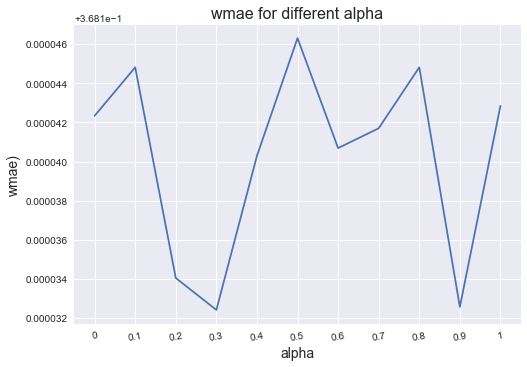

In [79]:
plot_results(results_alpha, 'alpha')

In [61]:
results_lambda_bias = {}
for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    result = {}
    print('\n\n\n\nrunning while lambda = {}'.format(i))
    params={'booster':'gblinear',
            'objective': 'reg:linear',
            'eval_metric':'mae',
            'lambda_bias':i,
            'seed':0,
            'silent':1,
        }

    watchlist = [(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=3000,evals=watchlist,early_stopping_rounds=300)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(y_test, pred_xgb)
    results_lambda_bias['{}'.format(i)] = result
    
print(results_lambda_bias)





running while lambda = 0
[0]	train-mae:59910.7
Will train until train-mae hasn't improved in 300 rounds.
[1]	train-mae:56692.9
[2]	train-mae:55658.7
[3]	train-mae:54846.5
[4]	train-mae:54217.2
[5]	train-mae:53653
[6]	train-mae:53259.5
[7]	train-mae:52925.1
[8]	train-mae:52703.3
[9]	train-mae:52465
[10]	train-mae:52326
[11]	train-mae:52178.4
[12]	train-mae:52047.1
[13]	train-mae:51939.3
[14]	train-mae:51873.6
[15]	train-mae:51790.5
[16]	train-mae:51727.7
[17]	train-mae:51665
[18]	train-mae:51620.9
[19]	train-mae:51584.3
[20]	train-mae:51543.5
[21]	train-mae:51515.4
[22]	train-mae:51492.5
[23]	train-mae:51464.8
[24]	train-mae:51440.4
[25]	train-mae:51422.1
[26]	train-mae:51408.6
[27]	train-mae:51393.5
[28]	train-mae:51379.9
[29]	train-mae:51365.2
[30]	train-mae:51348.2
[31]	train-mae:51334.2
[32]	train-mae:51326.8
[33]	train-mae:51314.4
[34]	train-mae:51302.1
[35]	train-mae:51293.6
[36]	train-mae:51283.2
[37]	train-mae:51276
[38]	train-mae:51264.1
[39]	train-mae:51258.1
[40]	train-ma

[346]	train-mae:50825.1
[347]	train-mae:50824.6
[348]	train-mae:50824
[349]	train-mae:50823.7
[350]	train-mae:50823.4
[351]	train-mae:50822.7
[352]	train-mae:50822
[353]	train-mae:50821.6
[354]	train-mae:50821.4
[355]	train-mae:50820.6
[356]	train-mae:50820.6
[357]	train-mae:50819.9
[358]	train-mae:50819.4
[359]	train-mae:50819
[360]	train-mae:50817.8
[361]	train-mae:50817.6
[362]	train-mae:50817.5
[363]	train-mae:50817.2
[364]	train-mae:50816.9
[365]	train-mae:50816.4
[366]	train-mae:50815.9
[367]	train-mae:50815.5
[368]	train-mae:50815
[369]	train-mae:50814.4
[370]	train-mae:50814
[371]	train-mae:50813.5
[372]	train-mae:50812.2
[373]	train-mae:50811.8
[374]	train-mae:50812
[375]	train-mae:50811.9
[376]	train-mae:50811.5
[377]	train-mae:50811
[378]	train-mae:50810.8
[379]	train-mae:50810.4
[380]	train-mae:50810
[381]	train-mae:50809.5
[382]	train-mae:50809
[383]	train-mae:50808.6
[384]	train-mae:50808.2
[385]	train-mae:50807.9
[386]	train-mae:50807.4
[387]	train-mae:50807
[388]	train-

[691]	train-mae:50716.3
[692]	train-mae:50715.4
[693]	train-mae:50715.8
[694]	train-mae:50715.6
[695]	train-mae:50715.4
[696]	train-mae:50715.1
[697]	train-mae:50715
[698]	train-mae:50714.8
[699]	train-mae:50714.5
[700]	train-mae:50714.2
[701]	train-mae:50714.1
[702]	train-mae:50713.6
[703]	train-mae:50713.3
[704]	train-mae:50713.4
[705]	train-mae:50712.9
[706]	train-mae:50712.9
[707]	train-mae:50712.8
[708]	train-mae:50712.4
[709]	train-mae:50712.2
[710]	train-mae:50711.5
[711]	train-mae:50711.8
[712]	train-mae:50711.7
[713]	train-mae:50711.4
[714]	train-mae:50710.9
[715]	train-mae:50710.8
[716]	train-mae:50711
[717]	train-mae:50710.8
[718]	train-mae:50710.6
[719]	train-mae:50710.3
[720]	train-mae:50709.4
[721]	train-mae:50709.6
[722]	train-mae:50709.8
[723]	train-mae:50709.5
[724]	train-mae:50708.9
[725]	train-mae:50709.2
[726]	train-mae:50708.4
[727]	train-mae:50708.7
[728]	train-mae:50708.6
[729]	train-mae:50708.4
[730]	train-mae:50708.1
[731]	train-mae:50707.8
[732]	train-mae:5070

[1034]	train-mae:50658.7
[1035]	train-mae:50658.8
[1036]	train-mae:50658.4
[1037]	train-mae:50658.4
[1038]	train-mae:50658.3
[1039]	train-mae:50658.1
[1040]	train-mae:50657.9
[1041]	train-mae:50658
[1042]	train-mae:50657.9
[1043]	train-mae:50657.7
[1044]	train-mae:50657.3
[1045]	train-mae:50657.1
[1046]	train-mae:50657.4
[1047]	train-mae:50657.1
[1048]	train-mae:50657.1
[1049]	train-mae:50656.8
[1050]	train-mae:50656.6
[1051]	train-mae:50656.6
[1052]	train-mae:50656.3
[1053]	train-mae:50656.2
[1054]	train-mae:50656.2
[1055]	train-mae:50655.9
[1056]	train-mae:50655.9
[1057]	train-mae:50655.2
[1058]	train-mae:50655
[1059]	train-mae:50655.1
[1060]	train-mae:50655.1
[1061]	train-mae:50655
[1062]	train-mae:50654.8
[1063]	train-mae:50654.8
[1064]	train-mae:50654.6
[1065]	train-mae:50654.5
[1066]	train-mae:50654.3
[1067]	train-mae:50654.2
[1068]	train-mae:50654.2
[1069]	train-mae:50653.9
[1070]	train-mae:50653.9
[1071]	train-mae:50653.8
[1072]	train-mae:50653.7
[1073]	train-mae:50653.4
[1074]

[1365]	train-mae:50616.5
[1366]	train-mae:50616.4
[1367]	train-mae:50616.3
[1368]	train-mae:50616.2
[1369]	train-mae:50616.1
[1370]	train-mae:50616
[1371]	train-mae:50616
[1372]	train-mae:50615.9
[1373]	train-mae:50615.6
[1374]	train-mae:50615.8
[1375]	train-mae:50615.5
[1376]	train-mae:50615.5
[1377]	train-mae:50615.4
[1378]	train-mae:50615.3
[1379]	train-mae:50615.2
[1380]	train-mae:50615
[1381]	train-mae:50614.9
[1382]	train-mae:50614.8
[1383]	train-mae:50614.7
[1384]	train-mae:50614.6
[1385]	train-mae:50614.4
[1386]	train-mae:50613.9
[1387]	train-mae:50613.6
[1388]	train-mae:50613.8
[1389]	train-mae:50613.9
[1390]	train-mae:50613.8
[1391]	train-mae:50613.8
[1392]	train-mae:50613.6
[1393]	train-mae:50613.4
[1394]	train-mae:50613.4
[1395]	train-mae:50613.3
[1396]	train-mae:50613.2
[1397]	train-mae:50613
[1398]	train-mae:50613
[1399]	train-mae:50612.9
[1400]	train-mae:50612.7
[1401]	train-mae:50612.6
[1402]	train-mae:50612.6
[1403]	train-mae:50612.4
[1404]	train-mae:50612.4
[1405]	tra

[1696]	train-mae:50581.9
[1697]	train-mae:50581.7
[1698]	train-mae:50581.8
[1699]	train-mae:50581.6
[1700]	train-mae:50581.6
[1701]	train-mae:50581.5
[1702]	train-mae:50581.6
[1703]	train-mae:50581.4
[1704]	train-mae:50581
[1705]	train-mae:50581.1
[1706]	train-mae:50580.9
[1707]	train-mae:50580.9
[1708]	train-mae:50580.8
[1709]	train-mae:50580.8
[1710]	train-mae:50580.5
[1711]	train-mae:50580.2
[1712]	train-mae:50580
[1713]	train-mae:50580.2
[1714]	train-mae:50580.1
[1715]	train-mae:50580
[1716]	train-mae:50580
[1717]	train-mae:50579.8
[1718]	train-mae:50579.9
[1719]	train-mae:50579.7
[1720]	train-mae:50579.7
[1721]	train-mae:50579.6
[1722]	train-mae:50579.5
[1723]	train-mae:50579.4
[1724]	train-mae:50579.1
[1725]	train-mae:50579
[1726]	train-mae:50579
[1727]	train-mae:50578.8
[1728]	train-mae:50578.8
[1729]	train-mae:50578.8
[1730]	train-mae:50578.6
[1731]	train-mae:50578.6
[1732]	train-mae:50578.5
[1733]	train-mae:50578.4
[1734]	train-mae:50578.3
[1735]	train-mae:50578.2
[1736]	train

[2027]	train-mae:50552.4
[2028]	train-mae:50552.3
[2029]	train-mae:50552.2
[2030]	train-mae:50551.8
[2031]	train-mae:50552
[2032]	train-mae:50551.9
[2033]	train-mae:50551.9
[2034]	train-mae:50551.8
[2035]	train-mae:50551.7
[2036]	train-mae:50551.6
[2037]	train-mae:50551.6
[2038]	train-mae:50551.5
[2039]	train-mae:50551.4
[2040]	train-mae:50551.1
[2041]	train-mae:50551.1
[2042]	train-mae:50551.2
[2043]	train-mae:50551
[2044]	train-mae:50550.7
[2045]	train-mae:50550.7
[2046]	train-mae:50550.5
[2047]	train-mae:50550.6
[2048]	train-mae:50550.2
[2049]	train-mae:50550.2
[2050]	train-mae:50550.3
[2051]	train-mae:50550.2
[2052]	train-mae:50550.2
[2053]	train-mae:50550.1
[2054]	train-mae:50550
[2055]	train-mae:50550
[2056]	train-mae:50549.9
[2057]	train-mae:50549.8
[2058]	train-mae:50549.4
[2059]	train-mae:50549.2
[2060]	train-mae:50549.7
[2061]	train-mae:50549.4
[2062]	train-mae:50549.5
[2063]	train-mae:50549.4
[2064]	train-mae:50549.3
[2065]	train-mae:50549.1
[2066]	train-mae:50549.1
[2067]	t

[2358]	train-mae:50525.6
[2359]	train-mae:50525.5
[2360]	train-mae:50525.2
[2361]	train-mae:50525.5
[2362]	train-mae:50525.3
[2363]	train-mae:50525.2
[2364]	train-mae:50525.1
[2365]	train-mae:50525.2
[2366]	train-mae:50525
[2367]	train-mae:50525
[2368]	train-mae:50524.9
[2369]	train-mae:50524.8
[2370]	train-mae:50524.8
[2371]	train-mae:50524.5
[2372]	train-mae:50524.2
[2373]	train-mae:50524.6
[2374]	train-mae:50524.3
[2375]	train-mae:50524.3
[2376]	train-mae:50524.2
[2377]	train-mae:50524.3
[2378]	train-mae:50524.1
[2379]	train-mae:50524
[2380]	train-mae:50523.9
[2381]	train-mae:50523.9
[2382]	train-mae:50523.8
[2383]	train-mae:50523.6
[2384]	train-mae:50523.6
[2385]	train-mae:50523.4
[2386]	train-mae:50523.6
[2387]	train-mae:50523.2
[2388]	train-mae:50523.2
[2389]	train-mae:50523.3
[2390]	train-mae:50523.3
[2391]	train-mae:50523.1
[2392]	train-mae:50523
[2393]	train-mae:50523.1
[2394]	train-mae:50522.9
[2395]	train-mae:50523
[2396]	train-mae:50522.8
[2397]	train-mae:50522.7
[2398]	tra

[2689]	train-mae:50500.9
[2690]	train-mae:50501.1
[2691]	train-mae:50501
[2692]	train-mae:50500.9
[2693]	train-mae:50501
[2694]	train-mae:50500.7
[2695]	train-mae:50500.8
[2696]	train-mae:50500.7
[2697]	train-mae:50500.6
[2698]	train-mae:50500.3
[2699]	train-mae:50500.1
[2700]	train-mae:50500.2
[2701]	train-mae:50500.3
[2702]	train-mae:50500.1
[2703]	train-mae:50500.2
[2704]	train-mae:50500.2
[2705]	train-mae:50499.9
[2706]	train-mae:50500.1
[2707]	train-mae:50499.8
[2708]	train-mae:50499.9
[2709]	train-mae:50499.6
[2710]	train-mae:50499.4
[2711]	train-mae:50499.4
[2712]	train-mae:50499.6
[2713]	train-mae:50499.6
[2714]	train-mae:50499.5
[2715]	train-mae:50499.5
[2716]	train-mae:50499
[2717]	train-mae:50499.1
[2718]	train-mae:50499
[2719]	train-mae:50498.8
[2720]	train-mae:50498.8
[2721]	train-mae:50499
[2722]	train-mae:50498.8
[2723]	train-mae:50498.8
[2724]	train-mae:50498.7
[2725]	train-mae:50498.5
[2726]	train-mae:50498.6
[2727]	train-mae:50498.4
[2728]	train-mae:50498.4
[2729]	tra

[18]	train-mae:51542.2
[19]	train-mae:51500.3
[20]	train-mae:51486.9
[21]	train-mae:51457.9
[22]	train-mae:51434.7
[23]	train-mae:51410.1
[24]	train-mae:51388.4
[25]	train-mae:51373.3
[26]	train-mae:51358.1
[27]	train-mae:51343.5
[28]	train-mae:51331.8
[29]	train-mae:51320.5
[30]	train-mae:51308.1
[31]	train-mae:51299.9
[32]	train-mae:51291.4
[33]	train-mae:51280.9
[34]	train-mae:51271.5
[35]	train-mae:51262.6
[36]	train-mae:51260.8
[37]	train-mae:51253.4
[38]	train-mae:51245.7
[39]	train-mae:51240.1
[40]	train-mae:51232.5
[41]	train-mae:51223.8
[42]	train-mae:51218.3
[43]	train-mae:51212.1
[44]	train-mae:51206
[45]	train-mae:51200.6
[46]	train-mae:51194.3
[47]	train-mae:51188.4
[48]	train-mae:51183.1
[49]	train-mae:51177.4
[50]	train-mae:51172.2
[51]	train-mae:51167.1
[52]	train-mae:51162.7
[53]	train-mae:51158.6
[54]	train-mae:51153.7
[55]	train-mae:51149.6
[56]	train-mae:51145.1
[57]	train-mae:51141.8
[58]	train-mae:51137.1
[59]	train-mae:51133.1
[60]	train-mae:51129.3
[61]	train-ma

[366]	train-mae:50814
[367]	train-mae:50813.6
[368]	train-mae:50812.3
[369]	train-mae:50812.8
[370]	train-mae:50812.4
[371]	train-mae:50812
[372]	train-mae:50811.6
[373]	train-mae:50810.6
[374]	train-mae:50811.1
[375]	train-mae:50810.3
[376]	train-mae:50808.9
[377]	train-mae:50808.2
[378]	train-mae:50808.9
[379]	train-mae:50808.4
[380]	train-mae:50808
[381]	train-mae:50807
[382]	train-mae:50807.3
[383]	train-mae:50806.8
[384]	train-mae:50806.5
[385]	train-mae:50806
[386]	train-mae:50805.8
[387]	train-mae:50805.4
[388]	train-mae:50804.5
[389]	train-mae:50804.6
[390]	train-mae:50804.2
[391]	train-mae:50803.9
[392]	train-mae:50803.6
[393]	train-mae:50803.2
[394]	train-mae:50802.9
[395]	train-mae:50801.7
[396]	train-mae:50801.9
[397]	train-mae:50801.4
[398]	train-mae:50800.3
[399]	train-mae:50801.1
[400]	train-mae:50800.1
[401]	train-mae:50800.1
[402]	train-mae:50799.9
[403]	train-mae:50799.1
[404]	train-mae:50798.9
[405]	train-mae:50798.9
[406]	train-mae:50798.1
[407]	train-mae:50797.9
[4

[710]	train-mae:50712
[711]	train-mae:50711.9
[712]	train-mae:50711.5
[713]	train-mae:50711.4
[714]	train-mae:50711.1
[715]	train-mae:50710.9
[716]	train-mae:50710.9
[717]	train-mae:50710.6
[718]	train-mae:50710.4
[719]	train-mae:50710.2
[720]	train-mae:50709.9
[721]	train-mae:50709.8
[722]	train-mae:50709.4
[723]	train-mae:50709.3
[724]	train-mae:50709.3
[725]	train-mae:50709
[726]	train-mae:50708.8
[727]	train-mae:50708.6
[728]	train-mae:50708.6
[729]	train-mae:50708
[730]	train-mae:50708.1
[731]	train-mae:50708
[732]	train-mae:50707.7
[733]	train-mae:50707.6
[734]	train-mae:50707.2
[735]	train-mae:50706.9
[736]	train-mae:50706.8
[737]	train-mae:50706.7
[738]	train-mae:50706.7
[739]	train-mae:50706
[740]	train-mae:50706.3
[741]	train-mae:50706
[742]	train-mae:50706
[743]	train-mae:50705.7
[744]	train-mae:50705.3
[745]	train-mae:50705.3
[746]	train-mae:50704.9
[747]	train-mae:50704.9
[748]	train-mae:50704.8
[749]	train-mae:50704.5
[750]	train-mae:50704.4
[751]	train-mae:50704.3
[752]	

[1052]	train-mae:50656.4
[1053]	train-mae:50656.3
[1054]	train-mae:50656.2
[1055]	train-mae:50655.9
[1056]	train-mae:50655.9
[1057]	train-mae:50655.5
[1058]	train-mae:50655.7
[1059]	train-mae:50655.5
[1060]	train-mae:50655.1
[1061]	train-mae:50655.3
[1062]	train-mae:50655.1
[1063]	train-mae:50654.8
[1064]	train-mae:50654.8
[1065]	train-mae:50654.7
[1066]	train-mae:50654.6
[1067]	train-mae:50654.5
[1068]	train-mae:50654.3
[1069]	train-mae:50654.1
[1070]	train-mae:50654
[1071]	train-mae:50653.7
[1072]	train-mae:50653.7
[1073]	train-mae:50653.7
[1074]	train-mae:50653.5
[1075]	train-mae:50653.3
[1076]	train-mae:50653.2
[1077]	train-mae:50653.1
[1078]	train-mae:50652.9
[1079]	train-mae:50652.5
[1080]	train-mae:50652.7
[1081]	train-mae:50652.5
[1082]	train-mae:50652.3
[1083]	train-mae:50652.3
[1084]	train-mae:50652.2
[1085]	train-mae:50652
[1086]	train-mae:50651.8
[1087]	train-mae:50651.7
[1088]	train-mae:50651.4
[1089]	train-mae:50651.4
[1090]	train-mae:50651.2
[1091]	train-mae:50651.1
[109

[1382]	train-mae:50614.8
[1383]	train-mae:50614.3
[1384]	train-mae:50614.5
[1385]	train-mae:50614.3
[1386]	train-mae:50614.1
[1387]	train-mae:50614.1
[1388]	train-mae:50614
[1389]	train-mae:50614
[1390]	train-mae:50613.8
[1391]	train-mae:50613.7
[1392]	train-mae:50613.3
[1393]	train-mae:50613.1
[1394]	train-mae:50613.3
[1395]	train-mae:50613.1
[1396]	train-mae:50613.1
[1397]	train-mae:50613
[1398]	train-mae:50612.9
[1399]	train-mae:50612.7
[1400]	train-mae:50612.6
[1401]	train-mae:50612.6
[1402]	train-mae:50612.3
[1403]	train-mae:50612
[1404]	train-mae:50612.1
[1405]	train-mae:50612
[1406]	train-mae:50611.9
[1407]	train-mae:50611.9
[1408]	train-mae:50611.8
[1409]	train-mae:50611.6
[1410]	train-mae:50611.2
[1411]	train-mae:50611.3
[1412]	train-mae:50611
[1413]	train-mae:50611.1
[1414]	train-mae:50611
[1415]	train-mae:50610.9
[1416]	train-mae:50610.8
[1417]	train-mae:50610.5
[1418]	train-mae:50610.7
[1419]	train-mae:50610.4
[1420]	train-mae:50610.4
[1421]	train-mae:50610.3
[1422]	train-m

[1713]	train-mae:50580.3
[1714]	train-mae:50580.2
[1715]	train-mae:50580.1
[1716]	train-mae:50580.1
[1717]	train-mae:50579.8
[1718]	train-mae:50579.7
[1719]	train-mae:50579.6
[1720]	train-mae:50579.4
[1721]	train-mae:50579.4
[1722]	train-mae:50579.2
[1723]	train-mae:50579.2
[1724]	train-mae:50579.2
[1725]	train-mae:50579
[1726]	train-mae:50579
[1727]	train-mae:50578.9
[1728]	train-mae:50578.7
[1729]	train-mae:50578.8
[1730]	train-mae:50578.5
[1731]	train-mae:50578.4
[1732]	train-mae:50578.3
[1733]	train-mae:50578.3
[1734]	train-mae:50578.2
[1735]	train-mae:50578.1
[1736]	train-mae:50578
[1737]	train-mae:50578
[1738]	train-mae:50577.9
[1739]	train-mae:50577.7
[1740]	train-mae:50577.7
[1741]	train-mae:50577.6
[1742]	train-mae:50577.4
[1743]	train-mae:50577.5
[1744]	train-mae:50576.8
[1745]	train-mae:50577.3
[1746]	train-mae:50577.2
[1747]	train-mae:50577
[1748]	train-mae:50577
[1749]	train-mae:50576.9
[1750]	train-mae:50576.7
[1751]	train-mae:50576.6
[1752]	train-mae:50576.5
[1753]	train

[2044]	train-mae:50550.7
[2045]	train-mae:50550.7
[2046]	train-mae:50550.5
[2047]	train-mae:50550.4
[2048]	train-mae:50550.5
[2049]	train-mae:50550.4
[2050]	train-mae:50550.4
[2051]	train-mae:50550.2
[2052]	train-mae:50550.1
[2053]	train-mae:50550.2
[2054]	train-mae:50550.1
[2055]	train-mae:50550
[2056]	train-mae:50549.9
[2057]	train-mae:50549.9
[2058]	train-mae:50549.6
[2059]	train-mae:50549.7
[2060]	train-mae:50549.6
[2061]	train-mae:50549.6
[2062]	train-mae:50549.5
[2063]	train-mae:50549.4
[2064]	train-mae:50549
[2065]	train-mae:50549.2
[2066]	train-mae:50549.1
[2067]	train-mae:50549.1
[2068]	train-mae:50549
[2069]	train-mae:50548.8
[2070]	train-mae:50548.8
[2071]	train-mae:50548.6
[2072]	train-mae:50548.7
[2073]	train-mae:50548.4
[2074]	train-mae:50548.5
[2075]	train-mae:50548.4
[2076]	train-mae:50547.9
[2077]	train-mae:50547.8
[2078]	train-mae:50548
[2079]	train-mae:50548
[2080]	train-mae:50548
[2081]	train-mae:50548
[2082]	train-mae:50547.8
[2083]	train-mae:50547.6
[2084]	train-m

[2375]	train-mae:50524.8
[2376]	train-mae:50524.7
[2377]	train-mae:50524.7
[2378]	train-mae:50524.5
[2379]	train-mae:50524.5
[2380]	train-mae:50524.4
[2381]	train-mae:50524.4
[2382]	train-mae:50524.3
[2383]	train-mae:50524.3
[2384]	train-mae:50524.2
[2385]	train-mae:50524
[2386]	train-mae:50523.9
[2387]	train-mae:50523.9
[2388]	train-mae:50523.9
[2389]	train-mae:50523.8
[2390]	train-mae:50523.5
[2391]	train-mae:50523.7
[2392]	train-mae:50523.5
[2393]	train-mae:50523.4
[2394]	train-mae:50523.2
[2395]	train-mae:50523.1
[2396]	train-mae:50523.1
[2397]	train-mae:50523.1
[2398]	train-mae:50523
[2399]	train-mae:50522.8
[2400]	train-mae:50522.8
[2401]	train-mae:50522.5
[2402]	train-mae:50522.5
[2403]	train-mae:50522.6
[2404]	train-mae:50522.4
[2405]	train-mae:50522.3
[2406]	train-mae:50522.2
[2407]	train-mae:50522
[2408]	train-mae:50522
[2409]	train-mae:50522.1
[2410]	train-mae:50522
[2411]	train-mae:50521.6
[2412]	train-mae:50521.5
[2413]	train-mae:50521.4
[2414]	train-mae:50521.4
[2415]	tra

[2706]	train-mae:50500.4
[2707]	train-mae:50500.3
[2708]	train-mae:50500.2
[2709]	train-mae:50500.1
[2710]	train-mae:50500.1
[2711]	train-mae:50500
[2712]	train-mae:50499.9
[2713]	train-mae:50499.9
[2714]	train-mae:50499.7
[2715]	train-mae:50499.7
[2716]	train-mae:50499.6
[2717]	train-mae:50499.6
[2718]	train-mae:50499.5
[2719]	train-mae:50499.5
[2720]	train-mae:50499.4
[2721]	train-mae:50499.3
[2722]	train-mae:50499.1
[2723]	train-mae:50499.1
[2724]	train-mae:50499
[2725]	train-mae:50499
[2726]	train-mae:50499
[2727]	train-mae:50498.9
[2728]	train-mae:50498.8
[2729]	train-mae:50498.8
[2730]	train-mae:50498.8
[2731]	train-mae:50498.7
[2732]	train-mae:50498.6
[2733]	train-mae:50498.5
[2734]	train-mae:50498.4
[2735]	train-mae:50498.5
[2736]	train-mae:50498.4
[2737]	train-mae:50498.3
[2738]	train-mae:50498.3
[2739]	train-mae:50498
[2740]	train-mae:50498
[2741]	train-mae:50498
[2742]	train-mae:50498
[2743]	train-mae:50498
[2744]	train-mae:50497.9
[2745]	train-mae:50497.6
[2746]	train-mae:5

[37]	train-mae:51253.5
[38]	train-mae:51246.2
[39]	train-mae:51239
[40]	train-mae:51231.8
[41]	train-mae:51225.9
[42]	train-mae:51219.1
[43]	train-mae:51212.5
[44]	train-mae:51207
[45]	train-mae:51199.5
[46]	train-mae:51190.2
[47]	train-mae:51189
[48]	train-mae:51183.4
[49]	train-mae:51178.3
[50]	train-mae:51173.5
[51]	train-mae:51166.1
[52]	train-mae:51162.2
[53]	train-mae:51158.5
[54]	train-mae:51154.1
[55]	train-mae:51149.8
[56]	train-mae:51145.2
[57]	train-mae:51139.9
[58]	train-mae:51137.6
[59]	train-mae:51133.4
[60]	train-mae:51124.6
[61]	train-mae:51124.9
[62]	train-mae:51122.5
[63]	train-mae:51119.3
[64]	train-mae:51114.9
[65]	train-mae:51111.4
[66]	train-mae:51108.1
[67]	train-mae:51104.4
[68]	train-mae:51101.3
[69]	train-mae:51098.1
[70]	train-mae:51094.6
[71]	train-mae:51091.7
[72]	train-mae:51085.9
[73]	train-mae:51085.3
[74]	train-mae:51081.9
[75]	train-mae:51079.2
[76]	train-mae:51076.1
[77]	train-mae:51073.3
[78]	train-mae:51070.7
[79]	train-mae:51067.7
[80]	train-mae:51

[384]	train-mae:50806.4
[385]	train-mae:50805.7
[386]	train-mae:50805.5
[387]	train-mae:50805.3
[388]	train-mae:50804.6
[389]	train-mae:50804.5
[390]	train-mae:50804
[391]	train-mae:50803.5
[392]	train-mae:50803.1
[393]	train-mae:50801.8
[394]	train-mae:50801.5
[395]	train-mae:50801.5
[396]	train-mae:50801.3
[397]	train-mae:50801.1
[398]	train-mae:50800.5
[399]	train-mae:50800.4
[400]	train-mae:50799.2
[401]	train-mae:50799.9
[402]	train-mae:50799
[403]	train-mae:50799.1
[404]	train-mae:50798.5
[405]	train-mae:50798.3
[406]	train-mae:50798
[407]	train-mae:50797.6
[408]	train-mae:50796.3
[409]	train-mae:50796.5
[410]	train-mae:50796.2
[411]	train-mae:50796
[412]	train-mae:50795.5
[413]	train-mae:50795.3
[414]	train-mae:50795
[415]	train-mae:50793.9
[416]	train-mae:50794.2
[417]	train-mae:50793.9
[418]	train-mae:50793.5
[419]	train-mae:50792.7
[420]	train-mae:50792.8
[421]	train-mae:50792.3
[422]	train-mae:50792
[423]	train-mae:50791.6
[424]	train-mae:50790.7
[425]	train-mae:50790.8
[426

[729]	train-mae:50708
[730]	train-mae:50707.9
[731]	train-mae:50707.8
[732]	train-mae:50707.5
[733]	train-mae:50707.3
[734]	train-mae:50707.3
[735]	train-mae:50706.7
[736]	train-mae:50706.8
[737]	train-mae:50706.7
[738]	train-mae:50706.4
[739]	train-mae:50706.3
[740]	train-mae:50706.1
[741]	train-mae:50705.9
[742]	train-mae:50705.7
[743]	train-mae:50705.6
[744]	train-mae:50705.4
[745]	train-mae:50705.2
[746]	train-mae:50705.1
[747]	train-mae:50704.9
[748]	train-mae:50704.4
[749]	train-mae:50704.4
[750]	train-mae:50704.3
[751]	train-mae:50704
[752]	train-mae:50704
[753]	train-mae:50703.4
[754]	train-mae:50703.5
[755]	train-mae:50703.3
[756]	train-mae:50703.2
[757]	train-mae:50702.9
[758]	train-mae:50702.4
[759]	train-mae:50702.6
[760]	train-mae:50702.4
[761]	train-mae:50702.3
[762]	train-mae:50702.1
[763]	train-mae:50701.4
[764]	train-mae:50701.5
[765]	train-mae:50701.6
[766]	train-mae:50701.4
[767]	train-mae:50701.1
[768]	train-mae:50701
[769]	train-mae:50700.9
[770]	train-mae:50700.7


[1071]	train-mae:50653.5
[1072]	train-mae:50653.3
[1073]	train-mae:50653.2
[1074]	train-mae:50653.3
[1075]	train-mae:50653.1
[1076]	train-mae:50652.8
[1077]	train-mae:50652.7
[1078]	train-mae:50652.7
[1079]	train-mae:50652.6
[1080]	train-mae:50652
[1081]	train-mae:50652.2
[1082]	train-mae:50652.2
[1083]	train-mae:50651.9
[1084]	train-mae:50651.7
[1085]	train-mae:50651.7
[1086]	train-mae:50651.4
[1087]	train-mae:50651.4
[1088]	train-mae:50651.2
[1089]	train-mae:50651
[1090]	train-mae:50650.9
[1091]	train-mae:50650.9
[1092]	train-mae:50650.7
[1093]	train-mae:50650.5
[1094]	train-mae:50650.1
[1095]	train-mae:50649.9
[1096]	train-mae:50650
[1097]	train-mae:50649.8
[1098]	train-mae:50649.7
[1099]	train-mae:50649.5
[1100]	train-mae:50649.5
[1101]	train-mae:50649.4
[1102]	train-mae:50649.2
[1103]	train-mae:50648.9
[1104]	train-mae:50648.9
[1105]	train-mae:50648.8
[1106]	train-mae:50648.3
[1107]	train-mae:50648.4
[1108]	train-mae:50648.4
[1109]	train-mae:50648.2
[1110]	train-mae:50647.9
[1111]

[1402]	train-mae:50612.2
[1403]	train-mae:50612
[1404]	train-mae:50612
[1405]	train-mae:50611.9
[1406]	train-mae:50611.8
[1407]	train-mae:50611.6
[1408]	train-mae:50611.6
[1409]	train-mae:50611.4
[1410]	train-mae:50611.4
[1411]	train-mae:50611.2
[1412]	train-mae:50611.1
[1413]	train-mae:50611.1
[1414]	train-mae:50610.9
[1415]	train-mae:50610.7
[1416]	train-mae:50610.6
[1417]	train-mae:50610.5
[1418]	train-mae:50610.5
[1419]	train-mae:50610.3
[1420]	train-mae:50610.2
[1421]	train-mae:50610.1
[1422]	train-mae:50610
[1423]	train-mae:50610
[1424]	train-mae:50609.8
[1425]	train-mae:50609.9
[1426]	train-mae:50609.5
[1427]	train-mae:50609.6
[1428]	train-mae:50609.2
[1429]	train-mae:50609.2
[1430]	train-mae:50609.1
[1431]	train-mae:50608.9
[1432]	train-mae:50609
[1433]	train-mae:50608.8
[1434]	train-mae:50608.6
[1435]	train-mae:50608.5
[1436]	train-mae:50608.4
[1437]	train-mae:50608.2
[1438]	train-mae:50608
[1439]	train-mae:50608.1
[1440]	train-mae:50608
[1441]	train-mae:50607.9
[1442]	train-m

[1733]	train-mae:50578.2
[1734]	train-mae:50578.2
[1735]	train-mae:50578.1
[1736]	train-mae:50578.1
[1737]	train-mae:50577.9
[1738]	train-mae:50577.9
[1739]	train-mae:50577.7
[1740]	train-mae:50577.7
[1741]	train-mae:50577.5
[1742]	train-mae:50577.6
[1743]	train-mae:50577.4
[1744]	train-mae:50577.2
[1745]	train-mae:50577.2
[1746]	train-mae:50577
[1747]	train-mae:50576.9
[1748]	train-mae:50576.8
[1749]	train-mae:50576.8
[1750]	train-mae:50576.8
[1751]	train-mae:50576.5
[1752]	train-mae:50576.5
[1753]	train-mae:50576.4
[1754]	train-mae:50576.3
[1755]	train-mae:50576.2
[1756]	train-mae:50576.1
[1757]	train-mae:50576.1
[1758]	train-mae:50576
[1759]	train-mae:50575.8
[1760]	train-mae:50575.8
[1761]	train-mae:50575.7
[1762]	train-mae:50575.6
[1763]	train-mae:50575.3
[1764]	train-mae:50575.4
[1765]	train-mae:50575.4
[1766]	train-mae:50575.3
[1767]	train-mae:50575.1
[1768]	train-mae:50574.9
[1769]	train-mae:50575
[1770]	train-mae:50574.7
[1771]	train-mae:50574.8
[1772]	train-mae:50574.7
[1773]

[2064]	train-mae:50548.8
[2065]	train-mae:50548.9
[2066]	train-mae:50549
[2067]	train-mae:50548.9
[2068]	train-mae:50548.9
[2069]	train-mae:50548.7
[2070]	train-mae:50548.7
[2071]	train-mae:50548.6
[2072]	train-mae:50548.5
[2073]	train-mae:50548.4
[2074]	train-mae:50548.3
[2075]	train-mae:50548.4
[2076]	train-mae:50548.1
[2077]	train-mae:50548.2
[2078]	train-mae:50547.9
[2079]	train-mae:50547.7
[2080]	train-mae:50547.8
[2081]	train-mae:50547.7
[2082]	train-mae:50547.5
[2083]	train-mae:50547.6
[2084]	train-mae:50547.5
[2085]	train-mae:50547.5
[2086]	train-mae:50547.2
[2087]	train-mae:50547.3
[2088]	train-mae:50547.2
[2089]	train-mae:50547
[2090]	train-mae:50546.9
[2091]	train-mae:50547
[2092]	train-mae:50546.9
[2093]	train-mae:50546.6
[2094]	train-mae:50546.5
[2095]	train-mae:50546.3
[2096]	train-mae:50546.6
[2097]	train-mae:50546.4
[2098]	train-mae:50546.4
[2099]	train-mae:50546.3
[2100]	train-mae:50546.1
[2101]	train-mae:50546.1
[2102]	train-mae:50545.8
[2103]	train-mae:50546
[2104]	t

[2395]	train-mae:50522.9
[2396]	train-mae:50523
[2397]	train-mae:50523
[2398]	train-mae:50522.9
[2399]	train-mae:50522.7
[2400]	train-mae:50522.8
[2401]	train-mae:50522.6
[2402]	train-mae:50522.6
[2403]	train-mae:50522.5
[2404]	train-mae:50522.5
[2405]	train-mae:50522.4
[2406]	train-mae:50522
[2407]	train-mae:50522.1
[2408]	train-mae:50522.1
[2409]	train-mae:50522.1
[2410]	train-mae:50521.9
[2411]	train-mae:50521.9
[2412]	train-mae:50521.8
[2413]	train-mae:50521.8
[2414]	train-mae:50521.7
[2415]	train-mae:50521.7
[2416]	train-mae:50521.7
[2417]	train-mae:50521.5
[2418]	train-mae:50521.4
[2419]	train-mae:50521.3
[2420]	train-mae:50521.3
[2421]	train-mae:50521.2
[2422]	train-mae:50521.2
[2423]	train-mae:50521
[2424]	train-mae:50521
[2425]	train-mae:50520.9
[2426]	train-mae:50520.8
[2427]	train-mae:50520.8
[2428]	train-mae:50520.4
[2429]	train-mae:50520.3
[2430]	train-mae:50520.4
[2431]	train-mae:50520.4
[2432]	train-mae:50520.4
[2433]	train-mae:50520.3
[2434]	train-mae:50519.7
[2435]	tra

[2726]	train-mae:50498.7
[2727]	train-mae:50498.6
[2728]	train-mae:50498.6
[2729]	train-mae:50498.5
[2730]	train-mae:50498.5
[2731]	train-mae:50498.5
[2732]	train-mae:50498.4
[2733]	train-mae:50498.2
[2734]	train-mae:50498.3
[2735]	train-mae:50498.2
[2736]	train-mae:50498.1
[2737]	train-mae:50498
[2738]	train-mae:50497.8
[2739]	train-mae:50497.9
[2740]	train-mae:50497.7
[2741]	train-mae:50497.7
[2742]	train-mae:50497.7
[2743]	train-mae:50497.7
[2744]	train-mae:50497.3
[2745]	train-mae:50497.5
[2746]	train-mae:50497.3
[2747]	train-mae:50497.3
[2748]	train-mae:50497.2
[2749]	train-mae:50497.1
[2750]	train-mae:50497.2
[2751]	train-mae:50497
[2752]	train-mae:50497.1
[2753]	train-mae:50497
[2754]	train-mae:50496.8
[2755]	train-mae:50496.8
[2756]	train-mae:50496.8
[2757]	train-mae:50496.6
[2758]	train-mae:50496.5
[2759]	train-mae:50496.6
[2760]	train-mae:50496.4
[2761]	train-mae:50496.3
[2762]	train-mae:50496.2
[2763]	train-mae:50495.8
[2764]	train-mae:50496.1
[2765]	train-mae:50496
[2766]	t

[58]	train-mae:51134.2
[59]	train-mae:51131.4
[60]	train-mae:51127.9
[61]	train-mae:51123.4
[62]	train-mae:51120.8
[63]	train-mae:51117
[64]	train-mae:51112.5
[65]	train-mae:51109.7
[66]	train-mae:51106.7
[67]	train-mae:51103
[68]	train-mae:51099.6
[69]	train-mae:51096.6
[70]	train-mae:51093.4
[71]	train-mae:51090
[72]	train-mae:51086.6
[73]	train-mae:51084.4
[74]	train-mae:51081
[75]	train-mae:51077.2
[76]	train-mae:51075.2
[77]	train-mae:51072.5
[78]	train-mae:51069
[79]	train-mae:51066.2
[80]	train-mae:51063.2
[81]	train-mae:51060.6
[82]	train-mae:51058.1
[83]	train-mae:51055.9
[84]	train-mae:51053.2
[85]	train-mae:51050.6
[86]	train-mae:51048.3
[87]	train-mae:51045.6
[88]	train-mae:51043.2
[89]	train-mae:51040.6
[90]	train-mae:51039.5
[91]	train-mae:51037.3
[92]	train-mae:51033.6
[93]	train-mae:51033.2
[94]	train-mae:51031.1
[95]	train-mae:51029.3
[96]	train-mae:51027.7
[97]	train-mae:51025.4
[98]	train-mae:51023.1
[99]	train-mae:51020.7
[100]	train-mae:51020.6
[101]	train-mae:5101

[405]	train-mae:50797.9
[406]	train-mae:50797.7
[407]	train-mae:50796.9
[408]	train-mae:50797.1
[409]	train-mae:50796.7
[410]	train-mae:50796.4
[411]	train-mae:50795.9
[412]	train-mae:50795.4
[413]	train-mae:50795
[414]	train-mae:50794.8
[415]	train-mae:50793.5
[416]	train-mae:50794.2
[417]	train-mae:50793.5
[418]	train-mae:50793.3
[419]	train-mae:50792.6
[420]	train-mae:50791.7
[421]	train-mae:50791.5
[422]	train-mae:50791.8
[423]	train-mae:50791.5
[424]	train-mae:50791.1
[425]	train-mae:50790.8
[426]	train-mae:50790.2
[427]	train-mae:50789.8
[428]	train-mae:50789.3
[429]	train-mae:50788.4
[430]	train-mae:50788.8
[431]	train-mae:50788.6
[432]	train-mae:50788.1
[433]	train-mae:50787.8
[434]	train-mae:50787.2
[435]	train-mae:50786.9
[436]	train-mae:50786.6
[437]	train-mae:50786.2
[438]	train-mae:50785.9
[439]	train-mae:50785.2
[440]	train-mae:50784.9
[441]	train-mae:50784.8
[442]	train-mae:50784.4
[443]	train-mae:50784
[444]	train-mae:50783.5
[445]	train-mae:50782.8
[446]	train-mae:5078

[750]	train-mae:50704.1
[751]	train-mae:50703.6
[752]	train-mae:50703.6
[753]	train-mae:50703.2
[754]	train-mae:50703.1
[755]	train-mae:50702.8
[756]	train-mae:50702.9
[757]	train-mae:50702.8
[758]	train-mae:50702.4
[759]	train-mae:50702.4
[760]	train-mae:50702
[761]	train-mae:50701.9
[762]	train-mae:50701.9
[763]	train-mae:50701.7
[764]	train-mae:50701.1
[765]	train-mae:50701.3
[766]	train-mae:50701.1
[767]	train-mae:50700.7
[768]	train-mae:50700.8
[769]	train-mae:50700.3
[770]	train-mae:50700.2
[771]	train-mae:50700.1
[772]	train-mae:50699.9
[773]	train-mae:50699.9
[774]	train-mae:50699.4
[775]	train-mae:50699.1
[776]	train-mae:50699.2
[777]	train-mae:50699.2
[778]	train-mae:50698.8
[779]	train-mae:50698.9
[780]	train-mae:50698.9
[781]	train-mae:50698.4
[782]	train-mae:50698.4
[783]	train-mae:50698.1
[784]	train-mae:50697.7
[785]	train-mae:50697.7
[786]	train-mae:50697.6
[787]	train-mae:50697.4
[788]	train-mae:50697.2
[789]	train-mae:50697.2
[790]	train-mae:50696.8
[791]	train-mae:50

[1092]	train-mae:50650.1
[1093]	train-mae:50650.1
[1094]	train-mae:50650.2
[1095]	train-mae:50650.2
[1096]	train-mae:50649.8
[1097]	train-mae:50649.8
[1098]	train-mae:50649.6
[1099]	train-mae:50649.5
[1100]	train-mae:50649.2
[1101]	train-mae:50649.2
[1102]	train-mae:50649.2
[1103]	train-mae:50649
[1104]	train-mae:50648.8
[1105]	train-mae:50648.8
[1106]	train-mae:50648.5
[1107]	train-mae:50648.4
[1108]	train-mae:50648.3
[1109]	train-mae:50648.1
[1110]	train-mae:50648.1
[1111]	train-mae:50647.8
[1112]	train-mae:50647.7
[1113]	train-mae:50647.6
[1114]	train-mae:50647.5
[1115]	train-mae:50647.4
[1116]	train-mae:50647.2
[1117]	train-mae:50647.2
[1118]	train-mae:50646.8
[1119]	train-mae:50647
[1120]	train-mae:50646.7
[1121]	train-mae:50646.6
[1122]	train-mae:50646.5
[1123]	train-mae:50646.4
[1124]	train-mae:50646.3
[1125]	train-mae:50646.1
[1126]	train-mae:50645.9
[1127]	train-mae:50645.6
[1128]	train-mae:50645.7
[1129]	train-mae:50645.4
[1130]	train-mae:50645.4
[1131]	train-mae:50645.3
[113

[1422]	train-mae:50609.9
[1423]	train-mae:50609.6
[1424]	train-mae:50609.3
[1425]	train-mae:50609.5
[1426]	train-mae:50609.1
[1427]	train-mae:50609.3
[1428]	train-mae:50609.2
[1429]	train-mae:50608.9
[1430]	train-mae:50608.9
[1431]	train-mae:50608.7
[1432]	train-mae:50608.6
[1433]	train-mae:50608.5
[1434]	train-mae:50608.5
[1435]	train-mae:50608.3
[1436]	train-mae:50608.1
[1437]	train-mae:50608
[1438]	train-mae:50607.8
[1439]	train-mae:50607.8
[1440]	train-mae:50607.7
[1441]	train-mae:50607.6
[1442]	train-mae:50607
[1443]	train-mae:50607.3
[1444]	train-mae:50607.3
[1445]	train-mae:50607.1
[1446]	train-mae:50607.1
[1447]	train-mae:50607
[1448]	train-mae:50607
[1449]	train-mae:50606.9
[1450]	train-mae:50606.6
[1451]	train-mae:50606.6
[1452]	train-mae:50606.5
[1453]	train-mae:50606.4
[1454]	train-mae:50606.3
[1455]	train-mae:50606.2
[1456]	train-mae:50606.1
[1457]	train-mae:50605.9
[1458]	train-mae:50605.8
[1459]	train-mae:50605.8
[1460]	train-mae:50605.5
[1461]	train-mae:50605.4
[1462]	t

[1753]	train-mae:50575.8
[1754]	train-mae:50575.8
[1755]	train-mae:50575.6
[1756]	train-mae:50575.3
[1757]	train-mae:50575.3
[1758]	train-mae:50575.3
[1759]	train-mae:50575.3
[1760]	train-mae:50575.1
[1761]	train-mae:50574.6
[1762]	train-mae:50574.9
[1763]	train-mae:50574.6
[1764]	train-mae:50574.3
[1765]	train-mae:50574.6
[1766]	train-mae:50574.6
[1767]	train-mae:50574.4
[1768]	train-mae:50574.5
[1769]	train-mae:50574.2
[1770]	train-mae:50574.2
[1771]	train-mae:50574.1
[1772]	train-mae:50574
[1773]	train-mae:50573.9
[1774]	train-mae:50573.9
[1775]	train-mae:50573.8
[1776]	train-mae:50573.8
[1777]	train-mae:50573.6
[1778]	train-mae:50573.4
[1779]	train-mae:50573.3
[1780]	train-mae:50573.4
[1781]	train-mae:50573.3
[1782]	train-mae:50573.3
[1783]	train-mae:50573.3
[1784]	train-mae:50573.1
[1785]	train-mae:50572.5
[1786]	train-mae:50572.8
[1787]	train-mae:50572.6
[1788]	train-mae:50572.6
[1789]	train-mae:50572.7
[1790]	train-mae:50572.6
[1791]	train-mae:50572.5
[1792]	train-mae:50572.2
[1

[2084]	train-mae:50547.3
[2085]	train-mae:50547.1
[2086]	train-mae:50547
[2087]	train-mae:50547.1
[2088]	train-mae:50546.6
[2089]	train-mae:50546.9
[2090]	train-mae:50546.7
[2091]	train-mae:50546.6
[2092]	train-mae:50546.6
[2093]	train-mae:50546.6
[2094]	train-mae:50546.5
[2095]	train-mae:50546.1
[2096]	train-mae:50546
[2097]	train-mae:50546.2
[2098]	train-mae:50546.1
[2099]	train-mae:50546
[2100]	train-mae:50546
[2101]	train-mae:50545.8
[2102]	train-mae:50545.7
[2103]	train-mae:50545.3
[2104]	train-mae:50545.1
[2105]	train-mae:50545.4
[2106]	train-mae:50545.4
[2107]	train-mae:50545.4
[2108]	train-mae:50545.3
[2109]	train-mae:50545.2
[2110]	train-mae:50545.2
[2111]	train-mae:50545
[2112]	train-mae:50545
[2113]	train-mae:50545
[2114]	train-mae:50544.6
[2115]	train-mae:50544.5
[2116]	train-mae:50544.4
[2117]	train-mae:50544.7
[2118]	train-mae:50544.3
[2119]	train-mae:50544.5
[2120]	train-mae:50544.5
[2121]	train-mae:50544.4
[2122]	train-mae:50544
[2123]	train-mae:50543.9
[2124]	train-mae

[2415]	train-mae:50521.6
[2416]	train-mae:50521.1
[2417]	train-mae:50521.3
[2418]	train-mae:50521.2
[2419]	train-mae:50521.1
[2420]	train-mae:50521.2
[2421]	train-mae:50521
[2422]	train-mae:50520.9
[2423]	train-mae:50521
[2424]	train-mae:50520.8
[2425]	train-mae:50520.8
[2426]	train-mae:50520.7
[2427]	train-mae:50520.7
[2428]	train-mae:50520.6
[2429]	train-mae:50520.5
[2430]	train-mae:50520.4
[2431]	train-mae:50520.3
[2432]	train-mae:50520.2
[2433]	train-mae:50520.1
[2434]	train-mae:50520.1
[2435]	train-mae:50520
[2436]	train-mae:50519.9
[2437]	train-mae:50519.8
[2438]	train-mae:50519.7
[2439]	train-mae:50519.7
[2440]	train-mae:50519.6
[2441]	train-mae:50519.6
[2442]	train-mae:50519.4
[2443]	train-mae:50519.4
[2444]	train-mae:50519.2
[2445]	train-mae:50519.2
[2446]	train-mae:50519.2
[2447]	train-mae:50519
[2448]	train-mae:50518.8
[2449]	train-mae:50518.9
[2450]	train-mae:50518.8
[2451]	train-mae:50518.8
[2452]	train-mae:50518.4
[2453]	train-mae:50518.6
[2454]	train-mae:50518.6
[2455]	t

[2746]	train-mae:50497.1
[2747]	train-mae:50496.9
[2748]	train-mae:50496.9
[2749]	train-mae:50496.9
[2750]	train-mae:50496.8
[2751]	train-mae:50496.7
[2752]	train-mae:50496.7
[2753]	train-mae:50496.7
[2754]	train-mae:50496.5
[2755]	train-mae:50496.2
[2756]	train-mae:50496.4
[2757]	train-mae:50496.4
[2758]	train-mae:50496.2
[2759]	train-mae:50496.2
[2760]	train-mae:50496.1
[2761]	train-mae:50496.1
[2762]	train-mae:50496
[2763]	train-mae:50495.9
[2764]	train-mae:50495.9
[2765]	train-mae:50495.9
[2766]	train-mae:50495.8
[2767]	train-mae:50495.7
[2768]	train-mae:50495.7
[2769]	train-mae:50495.6
[2770]	train-mae:50495.4
[2771]	train-mae:50495.4
[2772]	train-mae:50495.3
[2773]	train-mae:50495.3
[2774]	train-mae:50494.9
[2775]	train-mae:50495.1
[2776]	train-mae:50495
[2777]	train-mae:50495
[2778]	train-mae:50494.9
[2779]	train-mae:50494.8
[2780]	train-mae:50494.8
[2781]	train-mae:50494.7
[2782]	train-mae:50494.7
[2783]	train-mae:50494.6
[2784]	train-mae:50494.5
[2785]	train-mae:50494.5
[2786]

[80]	train-mae:51062.6
[81]	train-mae:51062
[82]	train-mae:51057.6
[83]	train-mae:51056.7
[84]	train-mae:51054.1
[85]	train-mae:51051.3
[86]	train-mae:51049.1
[87]	train-mae:51046.6
[88]	train-mae:51044.3
[89]	train-mae:51042.2
[90]	train-mae:51039.9
[91]	train-mae:51038
[92]	train-mae:51035.2
[93]	train-mae:51034.1
[94]	train-mae:51031.9
[95]	train-mae:51030
[96]	train-mae:51027.7
[97]	train-mae:51025.4
[98]	train-mae:51023.2
[99]	train-mae:51021.1
[100]	train-mae:51019.9
[101]	train-mae:51017.1
[102]	train-mae:51016.6
[103]	train-mae:51015.2
[104]	train-mae:51011.3
[105]	train-mae:51011.8
[106]	train-mae:51010.3
[107]	train-mae:51008.7
[108]	train-mae:51007.1
[109]	train-mae:51005.3
[110]	train-mae:51004.3
[111]	train-mae:51002.5
[112]	train-mae:51000.9
[113]	train-mae:50998.9
[114]	train-mae:50997.7
[115]	train-mae:50996.1
[116]	train-mae:50994.2
[117]	train-mae:50993.2
[118]	train-mae:50991.9
[119]	train-mae:50988.2
[120]	train-mae:50988.6
[121]	train-mae:50987.2
[122]	train-mae:50

[425]	train-mae:50790.1
[426]	train-mae:50789.6
[427]	train-mae:50789.2
[428]	train-mae:50788.4
[429]	train-mae:50788.7
[430]	train-mae:50788.1
[431]	train-mae:50787.7
[432]	train-mae:50787.4
[433]	train-mae:50787.1
[434]	train-mae:50786.6
[435]	train-mae:50786.3
[436]	train-mae:50785.8
[437]	train-mae:50785.6
[438]	train-mae:50785
[439]	train-mae:50784.7
[440]	train-mae:50784.5
[441]	train-mae:50783.9
[442]	train-mae:50783.6
[443]	train-mae:50783.4
[444]	train-mae:50783.1
[445]	train-mae:50782.3
[446]	train-mae:50781.7
[447]	train-mae:50781.7
[448]	train-mae:50781.3
[449]	train-mae:50781.1
[450]	train-mae:50780.8
[451]	train-mae:50780.3
[452]	train-mae:50780.1
[453]	train-mae:50779.7
[454]	train-mae:50779.2
[455]	train-mae:50778.7
[456]	train-mae:50778.6
[457]	train-mae:50778.4
[458]	train-mae:50777.8
[459]	train-mae:50777.6
[460]	train-mae:50777.2
[461]	train-mae:50776.9
[462]	train-mae:50776.6
[463]	train-mae:50776.2
[464]	train-mae:50775.9
[465]	train-mae:50775.4
[466]	train-mae:50

[769]	train-mae:50700.1
[770]	train-mae:50700
[771]	train-mae:50699.8
[772]	train-mae:50699.8
[773]	train-mae:50699.6
[774]	train-mae:50699.3
[775]	train-mae:50698.9
[776]	train-mae:50699
[777]	train-mae:50698.8
[778]	train-mae:50698.6
[779]	train-mae:50698.4
[780]	train-mae:50698.3
[781]	train-mae:50698
[782]	train-mae:50698.1
[783]	train-mae:50697.7
[784]	train-mae:50697.4
[785]	train-mae:50697.4
[786]	train-mae:50697.1
[787]	train-mae:50696.9
[788]	train-mae:50696.7
[789]	train-mae:50696.7
[790]	train-mae:50696.3
[791]	train-mae:50696.3
[792]	train-mae:50696
[793]	train-mae:50695.8
[794]	train-mae:50695.8
[795]	train-mae:50695.6
[796]	train-mae:50695.3
[797]	train-mae:50695.2
[798]	train-mae:50695.2
[799]	train-mae:50695
[800]	train-mae:50694.8
[801]	train-mae:50694.6
[802]	train-mae:50694.5
[803]	train-mae:50694.3
[804]	train-mae:50694.1
[805]	train-mae:50694
[806]	train-mae:50693.8
[807]	train-mae:50693.5
[808]	train-mae:50693.4
[809]	train-mae:50693.3
[810]	train-mae:50693.1
[811

[1109]	train-mae:50647.9
[1110]	train-mae:50647.5
[1111]	train-mae:50647.5
[1112]	train-mae:50647.4
[1113]	train-mae:50647.3
[1114]	train-mae:50646.8
[1115]	train-mae:50647
[1116]	train-mae:50646.8
[1117]	train-mae:50646.8
[1118]	train-mae:50646.6
[1119]	train-mae:50646.3
[1120]	train-mae:50646.1
[1121]	train-mae:50646.2
[1122]	train-mae:50646
[1123]	train-mae:50645.8
[1124]	train-mae:50645.8
[1125]	train-mae:50645.6
[1126]	train-mae:50645.5
[1127]	train-mae:50645.5
[1128]	train-mae:50645.2
[1129]	train-mae:50645
[1130]	train-mae:50644.8
[1131]	train-mae:50644.9
[1132]	train-mae:50644.7
[1133]	train-mae:50644.7
[1134]	train-mae:50644.4
[1135]	train-mae:50644.2
[1136]	train-mae:50643.8
[1137]	train-mae:50643.9
[1138]	train-mae:50643.9
[1139]	train-mae:50643.8
[1140]	train-mae:50643.4
[1141]	train-mae:50643.6
[1142]	train-mae:50643.4
[1143]	train-mae:50643.2
[1144]	train-mae:50643.1
[1145]	train-mae:50643
[1146]	train-mae:50642.7
[1147]	train-mae:50642.6
[1148]	train-mae:50642.6
[1149]	t

[1440]	train-mae:50607.5
[1441]	train-mae:50607.2
[1442]	train-mae:50607.5
[1443]	train-mae:50606.9
[1444]	train-mae:50607.2
[1445]	train-mae:50607.1
[1446]	train-mae:50606.8
[1447]	train-mae:50606.8
[1448]	train-mae:50606.8
[1449]	train-mae:50606.6
[1450]	train-mae:50606.6
[1451]	train-mae:50606.4
[1452]	train-mae:50606.3
[1453]	train-mae:50606.2
[1454]	train-mae:50605.7
[1455]	train-mae:50606
[1456]	train-mae:50605.7
[1457]	train-mae:50605.6
[1458]	train-mae:50605.7
[1459]	train-mae:50605.4
[1460]	train-mae:50605.4
[1461]	train-mae:50604.8
[1462]	train-mae:50605.1
[1463]	train-mae:50605
[1464]	train-mae:50605.1
[1465]	train-mae:50604.9
[1466]	train-mae:50604.5
[1467]	train-mae:50604.6
[1468]	train-mae:50604.6
[1469]	train-mae:50604.4
[1470]	train-mae:50604.3
[1471]	train-mae:50604.1
[1472]	train-mae:50603.5
[1473]	train-mae:50603.9
[1474]	train-mae:50603.8
[1475]	train-mae:50603.7
[1476]	train-mae:50603.6
[1477]	train-mae:50603.5
[1478]	train-mae:50603.4
[1479]	train-mae:50603.3
[148

[1771]	train-mae:50574
[1772]	train-mae:50573.7
[1773]	train-mae:50573.8
[1774]	train-mae:50573.7
[1775]	train-mae:50573.5
[1776]	train-mae:50573.2
[1777]	train-mae:50573.1
[1778]	train-mae:50572.8
[1779]	train-mae:50572.7
[1780]	train-mae:50573
[1781]	train-mae:50573
[1782]	train-mae:50572.7
[1783]	train-mae:50572.3
[1784]	train-mae:50572.5
[1785]	train-mae:50572.5
[1786]	train-mae:50572.3
[1787]	train-mae:50572.2
[1788]	train-mae:50572.1
[1789]	train-mae:50572.1
[1790]	train-mae:50572.1
[1791]	train-mae:50571.9
[1792]	train-mae:50571.6
[1793]	train-mae:50571.7
[1794]	train-mae:50571.8
[1795]	train-mae:50571.6
[1796]	train-mae:50571.4
[1797]	train-mae:50571.5
[1798]	train-mae:50571.2
[1799]	train-mae:50571.3
[1800]	train-mae:50571.3
[1801]	train-mae:50571
[1802]	train-mae:50571.1
[1803]	train-mae:50570.9
[1804]	train-mae:50570.6
[1805]	train-mae:50570.4
[1806]	train-mae:50570.7
[1807]	train-mae:50570.6
[1808]	train-mae:50570.5
[1809]	train-mae:50570.4
[1810]	train-mae:50570.2
[1811]	t

[2101]	train-mae:50545.4
[2102]	train-mae:50545.4
[2103]	train-mae:50545.4
[2104]	train-mae:50545.1
[2105]	train-mae:50545.2
[2106]	train-mae:50545.1
[2107]	train-mae:50544.9
[2108]	train-mae:50544.9
[2109]	train-mae:50544.8
[2110]	train-mae:50544.8
[2111]	train-mae:50544.8
[2112]	train-mae:50544.7
[2113]	train-mae:50544.6
[2114]	train-mae:50544.5
[2115]	train-mae:50544.2
[2116]	train-mae:50544.3
[2117]	train-mae:50544.1
[2118]	train-mae:50544.1
[2119]	train-mae:50544.1
[2120]	train-mae:50544
[2121]	train-mae:50543.9
[2122]	train-mae:50543.8
[2123]	train-mae:50543.6
[2124]	train-mae:50543.8
[2125]	train-mae:50543.6
[2126]	train-mae:50543.5
[2127]	train-mae:50543.5
[2128]	train-mae:50543.4
[2129]	train-mae:50543.4
[2130]	train-mae:50543.3
[2131]	train-mae:50543.2
[2132]	train-mae:50543.1
[2133]	train-mae:50543
[2134]	train-mae:50543
[2135]	train-mae:50542.8
[2136]	train-mae:50542.4
[2137]	train-mae:50542.7
[2138]	train-mae:50542.6
[2139]	train-mae:50542.6
[2140]	train-mae:50542.4
[2141]

[2432]	train-mae:50519.7
[2433]	train-mae:50519.6
[2434]	train-mae:50519.4
[2435]	train-mae:50519.5
[2436]	train-mae:50519.3
[2437]	train-mae:50519.4
[2438]	train-mae:50519.2
[2439]	train-mae:50519.2
[2440]	train-mae:50519.2
[2441]	train-mae:50519.1
[2442]	train-mae:50519
[2443]	train-mae:50519
[2444]	train-mae:50518.8
[2445]	train-mae:50518.8
[2446]	train-mae:50518.6
[2447]	train-mae:50518.6
[2448]	train-mae:50518.6
[2449]	train-mae:50518.6
[2450]	train-mae:50518.5
[2451]	train-mae:50518.4
[2452]	train-mae:50518.3
[2453]	train-mae:50518.3
[2454]	train-mae:50518.1
[2455]	train-mae:50518.1
[2456]	train-mae:50518
[2457]	train-mae:50518.1
[2458]	train-mae:50517.9
[2459]	train-mae:50517.7
[2460]	train-mae:50517.9
[2461]	train-mae:50517.7
[2462]	train-mae:50517.5
[2463]	train-mae:50517.5
[2464]	train-mae:50517.4
[2465]	train-mae:50517.3
[2466]	train-mae:50517.2
[2467]	train-mae:50517.2
[2468]	train-mae:50517.2
[2469]	train-mae:50517.1
[2470]	train-mae:50517
[2471]	train-mae:50517.1
[2472]	t

[2763]	train-mae:50495.7
[2764]	train-mae:50495.7
[2765]	train-mae:50495.6
[2766]	train-mae:50495.6
[2767]	train-mae:50495.2
[2768]	train-mae:50495.3
[2769]	train-mae:50495.2
[2770]	train-mae:50495.3
[2771]	train-mae:50495
[2772]	train-mae:50495
[2773]	train-mae:50495
[2774]	train-mae:50494.8
[2775]	train-mae:50494.8
[2776]	train-mae:50494.6
[2777]	train-mae:50494.7
[2778]	train-mae:50494.6
[2779]	train-mae:50494.6
[2780]	train-mae:50494.5
[2781]	train-mae:50494.4
[2782]	train-mae:50494.4
[2783]	train-mae:50494.4
[2784]	train-mae:50494.2
[2785]	train-mae:50494.1
[2786]	train-mae:50493.7
[2787]	train-mae:50494
[2788]	train-mae:50493.9
[2789]	train-mae:50493.9
[2790]	train-mae:50493.8
[2791]	train-mae:50493.7
[2792]	train-mae:50493.7
[2793]	train-mae:50493.7
[2794]	train-mae:50493.4
[2795]	train-mae:50493.5
[2796]	train-mae:50493.1
[2797]	train-mae:50493.1
[2798]	train-mae:50493.1
[2799]	train-mae:50493
[2800]	train-mae:50492.9
[2801]	train-mae:50493
[2802]	train-mae:50492.8
[2803]	train

[99]	train-mae:51021.3
[100]	train-mae:51019.4
[101]	train-mae:51017.7
[102]	train-mae:51015.8
[103]	train-mae:51014.2
[104]	train-mae:51012.5
[105]	train-mae:51010.6
[106]	train-mae:51008.9
[107]	train-mae:51007.5
[108]	train-mae:51005.8
[109]	train-mae:51004.1
[110]	train-mae:51002.6
[111]	train-mae:51001
[112]	train-mae:50999.2
[113]	train-mae:50996.6
[114]	train-mae:50996.8
[115]	train-mae:50993.4
[116]	train-mae:50993.6
[117]	train-mae:50992.1
[118]	train-mae:50990.3
[119]	train-mae:50989.2
[120]	train-mae:50985.9
[121]	train-mae:50986
[122]	train-mae:50984
[123]	train-mae:50982.8
[124]	train-mae:50981.8
[125]	train-mae:50981
[126]	train-mae:50979.3
[127]	train-mae:50978.2
[128]	train-mae:50975.5
[129]	train-mae:50973.9
[130]	train-mae:50974.1
[131]	train-mae:50972.9
[132]	train-mae:50971.7
[133]	train-mae:50970.4
[134]	train-mae:50968.5
[135]	train-mae:50967.6
[136]	train-mae:50966
[137]	train-mae:50964.7
[138]	train-mae:50963.1
[139]	train-mae:50961.4
[140]	train-mae:50961.4
[14

[444]	train-mae:50782.2
[445]	train-mae:50781.3
[446]	train-mae:50781.7
[447]	train-mae:50781.1
[448]	train-mae:50780.5
[449]	train-mae:50780
[450]	train-mae:50779.7
[451]	train-mae:50779.6
[452]	train-mae:50779.1
[453]	train-mae:50778.4
[454]	train-mae:50778.7
[455]	train-mae:50778.3
[456]	train-mae:50777.7
[457]	train-mae:50777.6
[458]	train-mae:50777.2
[459]	train-mae:50776.7
[460]	train-mae:50776.2
[461]	train-mae:50776.2
[462]	train-mae:50775.7
[463]	train-mae:50775.1
[464]	train-mae:50775.2
[465]	train-mae:50774.5
[466]	train-mae:50774.3
[467]	train-mae:50774.1
[468]	train-mae:50773.6
[469]	train-mae:50773.2
[470]	train-mae:50773.3
[471]	train-mae:50772.7
[472]	train-mae:50772.4
[473]	train-mae:50772.2
[474]	train-mae:50771.8
[475]	train-mae:50771.6
[476]	train-mae:50771.3
[477]	train-mae:50770.7
[478]	train-mae:50770.6
[479]	train-mae:50769.9
[480]	train-mae:50769.9
[481]	train-mae:50769.5
[482]	train-mae:50769.1
[483]	train-mae:50768.8
[484]	train-mae:50768.6
[485]	train-mae:50

[789]	train-mae:50696.2
[790]	train-mae:50695.9
[791]	train-mae:50695.9
[792]	train-mae:50695.8
[793]	train-mae:50695.4
[794]	train-mae:50695.2
[795]	train-mae:50694.9
[796]	train-mae:50694.8
[797]	train-mae:50694.8
[798]	train-mae:50694.5
[799]	train-mae:50694.4
[800]	train-mae:50694
[801]	train-mae:50693.7
[802]	train-mae:50693.8
[803]	train-mae:50693.6
[804]	train-mae:50693.4
[805]	train-mae:50693.4
[806]	train-mae:50693.2
[807]	train-mae:50693.1
[808]	train-mae:50692.9
[809]	train-mae:50692.8
[810]	train-mae:50692.5
[811]	train-mae:50691.9
[812]	train-mae:50691.7
[813]	train-mae:50691.8
[814]	train-mae:50691.8
[815]	train-mae:50691.3
[816]	train-mae:50691.3
[817]	train-mae:50690.6
[818]	train-mae:50691.1
[819]	train-mae:50690.8
[820]	train-mae:50690.7
[821]	train-mae:50690.8
[822]	train-mae:50690.5
[823]	train-mae:50690.1
[824]	train-mae:50689.9
[825]	train-mae:50689.8
[826]	train-mae:50689.9
[827]	train-mae:50689.5
[828]	train-mae:50689.5
[829]	train-mae:50689
[830]	train-mae:5068

[1128]	train-mae:50644.9
[1129]	train-mae:50644.6
[1130]	train-mae:50644.5
[1131]	train-mae:50644.3
[1132]	train-mae:50644.3
[1133]	train-mae:50644.1
[1134]	train-mae:50644
[1135]	train-mae:50643.8
[1136]	train-mae:50643.8
[1137]	train-mae:50643.7
[1138]	train-mae:50643.6
[1139]	train-mae:50643.3
[1140]	train-mae:50642.8
[1141]	train-mae:50642.9
[1142]	train-mae:50642.8
[1143]	train-mae:50642.7
[1144]	train-mae:50642.8
[1145]	train-mae:50642.6
[1146]	train-mae:50642.4
[1147]	train-mae:50642.3
[1148]	train-mae:50642.1
[1149]	train-mae:50642.1
[1150]	train-mae:50642
[1151]	train-mae:50641.7
[1152]	train-mae:50641.7
[1153]	train-mae:50641.5
[1154]	train-mae:50641.4
[1155]	train-mae:50641.2
[1156]	train-mae:50641.1
[1157]	train-mae:50641.1
[1158]	train-mae:50640.9
[1159]	train-mae:50640.8
[1160]	train-mae:50640.6
[1161]	train-mae:50640.6
[1162]	train-mae:50640.4
[1163]	train-mae:50639.8
[1164]	train-mae:50639.8
[1165]	train-mae:50640
[1166]	train-mae:50639.9
[1167]	train-mae:50639.7
[1168]

[1459]	train-mae:50604.7
[1460]	train-mae:50604.6
[1461]	train-mae:50604.8
[1462]	train-mae:50604.7
[1463]	train-mae:50604.5
[1464]	train-mae:50604.6
[1465]	train-mae:50604.1
[1466]	train-mae:50604.3
[1467]	train-mae:50604.2
[1468]	train-mae:50603.9
[1469]	train-mae:50603.9
[1470]	train-mae:50603.8
[1471]	train-mae:50603.7
[1472]	train-mae:50603.6
[1473]	train-mae:50603.6
[1474]	train-mae:50603.4
[1475]	train-mae:50603.2
[1476]	train-mae:50603.1
[1477]	train-mae:50603.1
[1478]	train-mae:50602.9
[1479]	train-mae:50602.9
[1480]	train-mae:50602.7
[1481]	train-mae:50602.7
[1482]	train-mae:50602.5
[1483]	train-mae:50602.3
[1484]	train-mae:50602.1
[1485]	train-mae:50602.1
[1486]	train-mae:50602.2
[1487]	train-mae:50602
[1488]	train-mae:50601.8
[1489]	train-mae:50601.6
[1490]	train-mae:50601.7
[1491]	train-mae:50601.7
[1492]	train-mae:50601.4
[1493]	train-mae:50601.1
[1494]	train-mae:50601.1
[1495]	train-mae:50601.1
[1496]	train-mae:50601
[1497]	train-mae:50600.7
[1498]	train-mae:50600.7
[149

[1790]	train-mae:50571.8
[1791]	train-mae:50571.8
[1792]	train-mae:50571.6
[1793]	train-mae:50571.5
[1794]	train-mae:50571.6
[1795]	train-mae:50571.3
[1796]	train-mae:50571.4
[1797]	train-mae:50571.4
[1798]	train-mae:50571.2
[1799]	train-mae:50571.1
[1800]	train-mae:50571
[1801]	train-mae:50571
[1802]	train-mae:50571
[1803]	train-mae:50570.7
[1804]	train-mae:50570.6
[1805]	train-mae:50570.6
[1806]	train-mae:50570.5
[1807]	train-mae:50570.5
[1808]	train-mae:50570.3
[1809]	train-mae:50570.3
[1810]	train-mae:50570.3
[1811]	train-mae:50570.1
[1812]	train-mae:50570.1
[1813]	train-mae:50570
[1814]	train-mae:50569.8
[1815]	train-mae:50569.8
[1816]	train-mae:50569.7
[1817]	train-mae:50569.7
[1818]	train-mae:50569.6
[1819]	train-mae:50569.6
[1820]	train-mae:50569.4
[1821]	train-mae:50569.1
[1822]	train-mae:50569.2
[1823]	train-mae:50569.1
[1824]	train-mae:50569.2
[1825]	train-mae:50569
[1826]	train-mae:50568.8
[1827]	train-mae:50568.6
[1828]	train-mae:50568.8
[1829]	train-mae:50568.6
[1830]	tra

[2121]	train-mae:50543.8
[2122]	train-mae:50543.7
[2123]	train-mae:50543.7
[2124]	train-mae:50543.6
[2125]	train-mae:50543.6
[2126]	train-mae:50543.5
[2127]	train-mae:50543.4
[2128]	train-mae:50543.5
[2129]	train-mae:50543.3
[2130]	train-mae:50543.3
[2131]	train-mae:50543.2
[2132]	train-mae:50543.1
[2133]	train-mae:50543.1
[2134]	train-mae:50542.9
[2135]	train-mae:50542.8
[2136]	train-mae:50542.9
[2137]	train-mae:50542.7
[2138]	train-mae:50542.7
[2139]	train-mae:50542.6
[2140]	train-mae:50542.5
[2141]	train-mae:50542
[2142]	train-mae:50542
[2143]	train-mae:50542.1
[2144]	train-mae:50542.3
[2145]	train-mae:50542.2
[2146]	train-mae:50542.1
[2147]	train-mae:50542
[2148]	train-mae:50541.9
[2149]	train-mae:50541.6
[2150]	train-mae:50541.7
[2151]	train-mae:50541.6
[2152]	train-mae:50541.6
[2153]	train-mae:50541
[2154]	train-mae:50541.1
[2155]	train-mae:50541.2
[2156]	train-mae:50541.1
[2157]	train-mae:50541.1
[2158]	train-mae:50541.1
[2159]	train-mae:50540.9
[2160]	train-mae:50540.9
[2161]	t

[2452]	train-mae:50518.2
[2453]	train-mae:50518
[2454]	train-mae:50518.1
[2455]	train-mae:50517.9
[2456]	train-mae:50517.9
[2457]	train-mae:50517.7
[2458]	train-mae:50517.7
[2459]	train-mae:50517.7
[2460]	train-mae:50517.5
[2461]	train-mae:50517.4
[2462]	train-mae:50517.4
[2463]	train-mae:50517.3
[2464]	train-mae:50517.4
[2465]	train-mae:50517.2
[2466]	train-mae:50517.2
[2467]	train-mae:50517
[2468]	train-mae:50517
[2469]	train-mae:50516.7
[2470]	train-mae:50516.9
[2471]	train-mae:50516.8
[2472]	train-mae:50516.7
[2473]	train-mae:50516.5
[2474]	train-mae:50516.5
[2475]	train-mae:50516.5
[2476]	train-mae:50516.3
[2477]	train-mae:50516.3
[2478]	train-mae:50516.1
[2479]	train-mae:50516.1
[2480]	train-mae:50516.1
[2481]	train-mae:50515.8
[2482]	train-mae:50515.8
[2483]	train-mae:50515.9
[2484]	train-mae:50515.7
[2485]	train-mae:50515.6
[2486]	train-mae:50515.6
[2487]	train-mae:50515.5
[2488]	train-mae:50515.5
[2489]	train-mae:50515.3
[2490]	train-mae:50515.3
[2491]	train-mae:50515.1
[2492]

[2783]	train-mae:50494.1
[2784]	train-mae:50493.9
[2785]	train-mae:50493.9
[2786]	train-mae:50493.8
[2787]	train-mae:50493.7
[2788]	train-mae:50493.7
[2789]	train-mae:50493.6
[2790]	train-mae:50493.5
[2791]	train-mae:50493.5
[2792]	train-mae:50493.3
[2793]	train-mae:50493.4
[2794]	train-mae:50493.2
[2795]	train-mae:50493.1
[2796]	train-mae:50492.8
[2797]	train-mae:50492.8
[2798]	train-mae:50492.9
[2799]	train-mae:50492.8
[2800]	train-mae:50492.7
[2801]	train-mae:50492.7
[2802]	train-mae:50492.6
[2803]	train-mae:50492.6
[2804]	train-mae:50492.5
[2805]	train-mae:50492.4
[2806]	train-mae:50492.2
[2807]	train-mae:50492.2
[2808]	train-mae:50492.3
[2809]	train-mae:50492.1
[2810]	train-mae:50492
[2811]	train-mae:50492
[2812]	train-mae:50492
[2813]	train-mae:50491.9
[2814]	train-mae:50491.8
[2815]	train-mae:50491.8
[2816]	train-mae:50491.7
[2817]	train-mae:50491.6
[2818]	train-mae:50491.6
[2819]	train-mae:50491.6
[2820]	train-mae:50491.4
[2821]	train-mae:50491.4
[2822]	train-mae:50491.3
[2823]

[120]	train-mae:50986.1
[121]	train-mae:50985.8
[122]	train-mae:50983.9
[123]	train-mae:50983.2
[124]	train-mae:50981.9
[125]	train-mae:50980.2
[126]	train-mae:50977.1
[127]	train-mae:50975.6
[128]	train-mae:50976.7
[129]	train-mae:50974.7
[130]	train-mae:50973.8
[131]	train-mae:50972.7
[132]	train-mae:50970.4
[133]	train-mae:50967.2
[134]	train-mae:50969.1
[135]	train-mae:50967.1
[136]	train-mae:50966.3
[137]	train-mae:50965
[138]	train-mae:50963.7
[139]	train-mae:50963
[140]	train-mae:50961.3
[141]	train-mae:50960.1
[142]	train-mae:50959
[143]	train-mae:50957.8
[144]	train-mae:50956.5
[145]	train-mae:50954.1
[146]	train-mae:50954.7
[147]	train-mae:50953.1
[148]	train-mae:50952.2
[149]	train-mae:50951.2
[150]	train-mae:50950.1
[151]	train-mae:50948.8
[152]	train-mae:50946.4
[153]	train-mae:50946.8
[154]	train-mae:50945.5
[155]	train-mae:50944.6
[156]	train-mae:50943.2
[157]	train-mae:50942.2
[158]	train-mae:50941.3
[159]	train-mae:50940.2
[160]	train-mae:50939.1
[161]	train-mae:50938.

[464]	train-mae:50775.9
[465]	train-mae:50775
[466]	train-mae:50774.8
[467]	train-mae:50774.7
[468]	train-mae:50774.3
[469]	train-mae:50774.3
[470]	train-mae:50773.2
[471]	train-mae:50773.4
[472]	train-mae:50773.2
[473]	train-mae:50772.7
[474]	train-mae:50772.4
[475]	train-mae:50772.1
[476]	train-mae:50771.2
[477]	train-mae:50771.5
[478]	train-mae:50771.3
[479]	train-mae:50771.1
[480]	train-mae:50770.9
[481]	train-mae:50769.9
[482]	train-mae:50770.2
[483]	train-mae:50769.1
[484]	train-mae:50769.2
[485]	train-mae:50768.6
[486]	train-mae:50768.8
[487]	train-mae:50767.9
[488]	train-mae:50768
[489]	train-mae:50767.3
[490]	train-mae:50767.5
[491]	train-mae:50766.3
[492]	train-mae:50767.1
[493]	train-mae:50766.2
[494]	train-mae:50765.3
[495]	train-mae:50765.3
[496]	train-mae:50764.9
[497]	train-mae:50764.6
[498]	train-mae:50764.4
[499]	train-mae:50763.9
[500]	train-mae:50764.3
[501]	train-mae:50763.2
[502]	train-mae:50762.5
[503]	train-mae:50762.5
[504]	train-mae:50762.6
[505]	train-mae:5076

[809]	train-mae:50693.6
[810]	train-mae:50693.5
[811]	train-mae:50693.3
[812]	train-mae:50692.9
[813]	train-mae:50692.9
[814]	train-mae:50692.6
[815]	train-mae:50692.6
[816]	train-mae:50692.4
[817]	train-mae:50691.9
[818]	train-mae:50692
[819]	train-mae:50691.9
[820]	train-mae:50691.7
[821]	train-mae:50691.5
[822]	train-mae:50691.4
[823]	train-mae:50691
[824]	train-mae:50691.1
[825]	train-mae:50690.8
[826]	train-mae:50690.6
[827]	train-mae:50690.2
[828]	train-mae:50690.4
[829]	train-mae:50690.2
[830]	train-mae:50689.7
[831]	train-mae:50689.8
[832]	train-mae:50689.6
[833]	train-mae:50689.4
[834]	train-mae:50689.4
[835]	train-mae:50688.9
[836]	train-mae:50688.9
[837]	train-mae:50688.8
[838]	train-mae:50688.5
[839]	train-mae:50688.3
[840]	train-mae:50688.3
[841]	train-mae:50688.1
[842]	train-mae:50688.1
[843]	train-mae:50687.8
[844]	train-mae:50687.4
[845]	train-mae:50687.5
[846]	train-mae:50687.3
[847]	train-mae:50687.2
[848]	train-mae:50687
[849]	train-mae:50686.7
[850]	train-mae:50686.

[1147]	train-mae:50643.1
[1148]	train-mae:50643
[1149]	train-mae:50642.7
[1150]	train-mae:50642.6
[1151]	train-mae:50642.1
[1152]	train-mae:50642.2
[1153]	train-mae:50642.2
[1154]	train-mae:50642.1
[1155]	train-mae:50642
[1156]	train-mae:50641.9
[1157]	train-mae:50641.7
[1158]	train-mae:50641.5
[1159]	train-mae:50641.5
[1160]	train-mae:50641.3
[1161]	train-mae:50641.2
[1162]	train-mae:50641
[1163]	train-mae:50640.8
[1164]	train-mae:50640.6
[1165]	train-mae:50640.2
[1166]	train-mae:50640.4
[1167]	train-mae:50640.1
[1168]	train-mae:50640.2
[1169]	train-mae:50640.1
[1170]	train-mae:50639.8
[1171]	train-mae:50639.9
[1172]	train-mae:50639.2
[1173]	train-mae:50639.5
[1174]	train-mae:50639.5
[1175]	train-mae:50639.5
[1176]	train-mae:50639.1
[1177]	train-mae:50638.8
[1178]	train-mae:50638.8
[1179]	train-mae:50638.8
[1180]	train-mae:50638.7
[1181]	train-mae:50638.7
[1182]	train-mae:50638.2
[1183]	train-mae:50638.3
[1184]	train-mae:50638.1
[1185]	train-mae:50637.9
[1186]	train-mae:50637.7
[1187]

[1477]	train-mae:50603.3
[1478]	train-mae:50603.3
[1479]	train-mae:50603.3
[1480]	train-mae:50603.2
[1481]	train-mae:50603.1
[1482]	train-mae:50602.9
[1483]	train-mae:50602.7
[1484]	train-mae:50602.7
[1485]	train-mae:50602.5
[1486]	train-mae:50602.6
[1487]	train-mae:50602.4
[1488]	train-mae:50602.4
[1489]	train-mae:50602
[1490]	train-mae:50601.8
[1491]	train-mae:50602
[1492]	train-mae:50601.7
[1493]	train-mae:50601.8
[1494]	train-mae:50601.5
[1495]	train-mae:50601.6
[1496]	train-mae:50601.6
[1497]	train-mae:50601.1
[1498]	train-mae:50601.3
[1499]	train-mae:50600.8
[1500]	train-mae:50601
[1501]	train-mae:50601
[1502]	train-mae:50600.7
[1503]	train-mae:50600.8
[1504]	train-mae:50600.3
[1505]	train-mae:50600.3
[1506]	train-mae:50600.5
[1507]	train-mae:50599.8
[1508]	train-mae:50599.8
[1509]	train-mae:50600
[1510]	train-mae:50600
[1511]	train-mae:50599.8
[1512]	train-mae:50599.6
[1513]	train-mae:50599.6
[1514]	train-mae:50599.5
[1515]	train-mae:50599.5
[1516]	train-mae:50599.2
[1517]	train

[1808]	train-mae:50570.9
[1809]	train-mae:50570.9
[1810]	train-mae:50570.6
[1811]	train-mae:50570.6
[1812]	train-mae:50570.7
[1813]	train-mae:50570.6
[1814]	train-mae:50570.4
[1815]	train-mae:50570
[1816]	train-mae:50570.4
[1817]	train-mae:50570.2
[1818]	train-mae:50570.1
[1819]	train-mae:50570
[1820]	train-mae:50569.9
[1821]	train-mae:50569.9
[1822]	train-mae:50569.8
[1823]	train-mae:50569.7
[1824]	train-mae:50569.3
[1825]	train-mae:50569.4
[1826]	train-mae:50569.5
[1827]	train-mae:50569.4
[1828]	train-mae:50569.3
[1829]	train-mae:50569.3
[1830]	train-mae:50569.3
[1831]	train-mae:50569
[1832]	train-mae:50569
[1833]	train-mae:50568.9
[1834]	train-mae:50568.8
[1835]	train-mae:50568.4
[1836]	train-mae:50568.5
[1837]	train-mae:50568.3
[1838]	train-mae:50568.3
[1839]	train-mae:50568.2
[1840]	train-mae:50568.3
[1841]	train-mae:50568.1
[1842]	train-mae:50568.1
[1843]	train-mae:50567.9
[1844]	train-mae:50567.9
[1845]	train-mae:50567.8
[1846]	train-mae:50567.7
[1847]	train-mae:50567.6
[1848]	t

[2138]	train-mae:50543.1
[2139]	train-mae:50543
[2140]	train-mae:50542.8
[2141]	train-mae:50542.8
[2142]	train-mae:50542.7
[2143]	train-mae:50542.7
[2144]	train-mae:50542.5
[2145]	train-mae:50542.4
[2146]	train-mae:50542.4
[2147]	train-mae:50542.3
[2148]	train-mae:50542.1
[2149]	train-mae:50542.1
[2150]	train-mae:50542
[2151]	train-mae:50541.9
[2152]	train-mae:50541.8
[2153]	train-mae:50541.8
[2154]	train-mae:50541.8
[2155]	train-mae:50541.6
[2156]	train-mae:50541.6
[2157]	train-mae:50541.5
[2158]	train-mae:50541.3
[2159]	train-mae:50541.2
[2160]	train-mae:50540.9
[2161]	train-mae:50541
[2162]	train-mae:50540.8
[2163]	train-mae:50541
[2164]	train-mae:50540.8
[2165]	train-mae:50540.7
[2166]	train-mae:50540.7
[2167]	train-mae:50540.6
[2168]	train-mae:50540.5
[2169]	train-mae:50540.5
[2170]	train-mae:50540.3
[2171]	train-mae:50540.2
[2172]	train-mae:50540.3
[2173]	train-mae:50540.2
[2174]	train-mae:50540
[2175]	train-mae:50540
[2176]	train-mae:50539.8
[2177]	train-mae:50539.9
[2178]	train

[2468]	train-mae:50517.1
[2469]	train-mae:50517
[2470]	train-mae:50516.8
[2471]	train-mae:50516.8
[2472]	train-mae:50516.8
[2473]	train-mae:50516.8
[2474]	train-mae:50516.6
[2475]	train-mae:50516.6
[2476]	train-mae:50516.5
[2477]	train-mae:50516.4
[2478]	train-mae:50516
[2479]	train-mae:50516.1
[2480]	train-mae:50516.2
[2481]	train-mae:50516.1
[2482]	train-mae:50516
[2483]	train-mae:50515.9
[2484]	train-mae:50515.8
[2485]	train-mae:50515.8
[2486]	train-mae:50515.7
[2487]	train-mae:50515.6
[2488]	train-mae:50515.5
[2489]	train-mae:50515.5
[2490]	train-mae:50515.4
[2491]	train-mae:50515.4
[2492]	train-mae:50515.2
[2493]	train-mae:50515.2
[2494]	train-mae:50514.8
[2495]	train-mae:50515
[2496]	train-mae:50514.8
[2497]	train-mae:50514.9
[2498]	train-mae:50514.8
[2499]	train-mae:50514.7
[2500]	train-mae:50514.6
[2501]	train-mae:50514.5
[2502]	train-mae:50514.5
[2503]	train-mae:50514.6
[2504]	train-mae:50514.3
[2505]	train-mae:50514.3
[2506]	train-mae:50514.2
[2507]	train-mae:50514.2
[2508]	t

[2799]	train-mae:50492.9
[2800]	train-mae:50492.9
[2801]	train-mae:50492.7
[2802]	train-mae:50492.7
[2803]	train-mae:50492.6
[2804]	train-mae:50492.5
[2805]	train-mae:50492.5
[2806]	train-mae:50492.4
[2807]	train-mae:50492.3
[2808]	train-mae:50492.4
[2809]	train-mae:50492.3
[2810]	train-mae:50492.3
[2811]	train-mae:50492.1
[2812]	train-mae:50492.1
[2813]	train-mae:50492
[2814]	train-mae:50492
[2815]	train-mae:50491.9
[2816]	train-mae:50491.4
[2817]	train-mae:50491.4
[2818]	train-mae:50491.6
[2819]	train-mae:50491.3
[2820]	train-mae:50491.5
[2821]	train-mae:50491.4
[2822]	train-mae:50491.3
[2823]	train-mae:50491.2
[2824]	train-mae:50491.2
[2825]	train-mae:50491.1
[2826]	train-mae:50491.1
[2827]	train-mae:50490.8
[2828]	train-mae:50490.8
[2829]	train-mae:50490.7
[2830]	train-mae:50490.7
[2831]	train-mae:50490.7
[2832]	train-mae:50490.7
[2833]	train-mae:50490.4
[2834]	train-mae:50490.5
[2835]	train-mae:50490.4
[2836]	train-mae:50490.3
[2837]	train-mae:50490.3
[2838]	train-mae:50490.2
[283

[135]	train-mae:50966.8
[136]	train-mae:50967.1
[137]	train-mae:50966
[138]	train-mae:50963.8
[139]	train-mae:50963
[140]	train-mae:50960.1
[141]	train-mae:50960.2
[142]	train-mae:50958.3
[143]	train-mae:50956.8
[144]	train-mae:50956.1
[145]	train-mae:50955
[146]	train-mae:50952.9
[147]	train-mae:50954
[148]	train-mae:50952.4
[149]	train-mae:50951
[150]	train-mae:50949.9
[151]	train-mae:50949.1
[152]	train-mae:50948.1
[153]	train-mae:50946.8
[154]	train-mae:50945.6
[155]	train-mae:50944.7
[156]	train-mae:50943.6
[157]	train-mae:50942.3
[158]	train-mae:50941.4
[159]	train-mae:50940.6
[160]	train-mae:50939.2
[161]	train-mae:50937.3
[162]	train-mae:50937.5
[163]	train-mae:50936.7
[164]	train-mae:50934.3
[165]	train-mae:50933.6
[166]	train-mae:50933.7
[167]	train-mae:50931.9
[168]	train-mae:50931.8
[169]	train-mae:50930.2
[170]	train-mae:50928.7
[171]	train-mae:50929.2
[172]	train-mae:50927.7
[173]	train-mae:50927.4
[174]	train-mae:50925.5
[175]	train-mae:50925.6
[176]	train-mae:50924.3
[1

[480]	train-mae:50770
[481]	train-mae:50769.8
[482]	train-mae:50769.3
[483]	train-mae:50769
[484]	train-mae:50768.8
[485]	train-mae:50768
[486]	train-mae:50767.5
[487]	train-mae:50767.6
[488]	train-mae:50767.3
[489]	train-mae:50766.8
[490]	train-mae:50766.6
[491]	train-mae:50766.3
[492]	train-mae:50765.6
[493]	train-mae:50765.7
[494]	train-mae:50765.3
[495]	train-mae:50765.2
[496]	train-mae:50764.8
[497]	train-mae:50764.4
[498]	train-mae:50764
[499]	train-mae:50763.5
[500]	train-mae:50763.4
[501]	train-mae:50763
[502]	train-mae:50762.7
[503]	train-mae:50762.4
[504]	train-mae:50762
[505]	train-mae:50761.7
[506]	train-mae:50761.3
[507]	train-mae:50761
[508]	train-mae:50760.7
[509]	train-mae:50759.7
[510]	train-mae:50760.2
[511]	train-mae:50759.7
[512]	train-mae:50759.5
[513]	train-mae:50759.2
[514]	train-mae:50758.7
[515]	train-mae:50758.3
[516]	train-mae:50758
[517]	train-mae:50757.7
[518]	train-mae:50757.4
[519]	train-mae:50757.4
[520]	train-mae:50756.8
[521]	train-mae:50756.6
[522]	tr

[824]	train-mae:50689.6
[825]	train-mae:50689.3
[826]	train-mae:50689.2
[827]	train-mae:50688.9
[828]	train-mae:50688.7
[829]	train-mae:50688.7
[830]	train-mae:50688.5
[831]	train-mae:50688.2
[832]	train-mae:50688.2
[833]	train-mae:50688
[834]	train-mae:50687.7
[835]	train-mae:50687.7
[836]	train-mae:50687.5
[837]	train-mae:50687.5
[838]	train-mae:50687.2
[839]	train-mae:50687
[840]	train-mae:50686.8
[841]	train-mae:50686.6
[842]	train-mae:50686.6
[843]	train-mae:50686.4
[844]	train-mae:50686.1
[845]	train-mae:50686.1
[846]	train-mae:50685.9
[847]	train-mae:50685.8
[848]	train-mae:50685.5
[849]	train-mae:50685.4
[850]	train-mae:50685.3
[851]	train-mae:50685
[852]	train-mae:50684.5
[853]	train-mae:50684.7
[854]	train-mae:50684.4
[855]	train-mae:50684.4
[856]	train-mae:50684.2
[857]	train-mae:50683.8
[858]	train-mae:50683.9
[859]	train-mae:50683.6
[860]	train-mae:50683.5
[861]	train-mae:50683.2
[862]	train-mae:50683
[863]	train-mae:50683
[864]	train-mae:50682.9
[865]	train-mae:50682.5
[8

[1162]	train-mae:50639.5
[1163]	train-mae:50639.5
[1164]	train-mae:50639.3
[1165]	train-mae:50639.4
[1166]	train-mae:50639.2
[1167]	train-mae:50638.8
[1168]	train-mae:50638.8
[1169]	train-mae:50638.6
[1170]	train-mae:50638.7
[1171]	train-mae:50638.6
[1172]	train-mae:50638.2
[1173]	train-mae:50638.3
[1174]	train-mae:50638
[1175]	train-mae:50637.9
[1176]	train-mae:50637.7
[1177]	train-mae:50637.4
[1178]	train-mae:50637.5
[1179]	train-mae:50637.4
[1180]	train-mae:50637.3
[1181]	train-mae:50637.2
[1182]	train-mae:50636.9
[1183]	train-mae:50636.9
[1184]	train-mae:50636.7
[1185]	train-mae:50636.4
[1186]	train-mae:50636.4
[1187]	train-mae:50636.3
[1188]	train-mae:50636.2
[1189]	train-mae:50636.1
[1190]	train-mae:50636
[1191]	train-mae:50635.6
[1192]	train-mae:50635.8
[1193]	train-mae:50635.7
[1194]	train-mae:50635.5
[1195]	train-mae:50635.4
[1196]	train-mae:50635.3
[1197]	train-mae:50635
[1198]	train-mae:50635
[1199]	train-mae:50634.7
[1200]	train-mae:50634.8
[1201]	train-mae:50634.7
[1202]	t

[1492]	train-mae:50601.1
[1493]	train-mae:50600.8
[1494]	train-mae:50600.7
[1495]	train-mae:50600.7
[1496]	train-mae:50600.3
[1497]	train-mae:50600.4
[1498]	train-mae:50600.4
[1499]	train-mae:50600.1
[1500]	train-mae:50600
[1501]	train-mae:50600.1
[1502]	train-mae:50600
[1503]	train-mae:50599.8
[1504]	train-mae:50599.5
[1505]	train-mae:50599.4
[1506]	train-mae:50599.3
[1507]	train-mae:50599
[1508]	train-mae:50599.1
[1509]	train-mae:50598.9
[1510]	train-mae:50599.1
[1511]	train-mae:50598.4
[1512]	train-mae:50598.5
[1513]	train-mae:50598.6
[1514]	train-mae:50598.4
[1515]	train-mae:50598.5
[1516]	train-mae:50598.6
[1517]	train-mae:50598.3
[1518]	train-mae:50598
[1519]	train-mae:50598.1
[1520]	train-mae:50598.1
[1521]	train-mae:50597.8
[1522]	train-mae:50597.7
[1523]	train-mae:50597.7
[1524]	train-mae:50597.6
[1525]	train-mae:50597.5
[1526]	train-mae:50597.3
[1527]	train-mae:50597.3
[1528]	train-mae:50597.1
[1529]	train-mae:50596.9
[1530]	train-mae:50596.6
[1531]	train-mae:50596.8
[1532]	t

[1823]	train-mae:50568.8
[1824]	train-mae:50568.6
[1825]	train-mae:50568.7
[1826]	train-mae:50568.6
[1827]	train-mae:50568.5
[1828]	train-mae:50568.4
[1829]	train-mae:50568.3
[1830]	train-mae:50568.3
[1831]	train-mae:50568.1
[1832]	train-mae:50568.1
[1833]	train-mae:50568
[1834]	train-mae:50567.9
[1835]	train-mae:50567.6
[1836]	train-mae:50567.7
[1837]	train-mae:50567.6
[1838]	train-mae:50567.4
[1839]	train-mae:50567.4
[1840]	train-mae:50567.4
[1841]	train-mae:50567.3
[1842]	train-mae:50566.7
[1843]	train-mae:50566.6
[1844]	train-mae:50566.8
[1845]	train-mae:50566.9
[1846]	train-mae:50566.7
[1847]	train-mae:50566.7
[1848]	train-mae:50566.6
[1849]	train-mae:50566.3
[1850]	train-mae:50566.2
[1851]	train-mae:50566.3
[1852]	train-mae:50565.8
[1853]	train-mae:50565.5
[1854]	train-mae:50565.9
[1855]	train-mae:50565.6
[1856]	train-mae:50565.6
[1857]	train-mae:50565.3
[1858]	train-mae:50565.4
[1859]	train-mae:50565
[1860]	train-mae:50565.2
[1861]	train-mae:50564.8
[1862]	train-mae:50564.9
[186

[2154]	train-mae:50541
[2155]	train-mae:50540.7
[2156]	train-mae:50540.8
[2157]	train-mae:50540.6
[2158]	train-mae:50540.5
[2159]	train-mae:50540.5
[2160]	train-mae:50540.3
[2161]	train-mae:50540.2
[2162]	train-mae:50540.1
[2163]	train-mae:50540.1
[2164]	train-mae:50540
[2165]	train-mae:50539.9
[2166]	train-mae:50539.7
[2167]	train-mae:50539.7
[2168]	train-mae:50539.6
[2169]	train-mae:50539.5
[2170]	train-mae:50539.5
[2171]	train-mae:50539.4
[2172]	train-mae:50539.4
[2173]	train-mae:50539.2
[2174]	train-mae:50539.2
[2175]	train-mae:50539.2
[2176]	train-mae:50539.1
[2177]	train-mae:50538.8
[2178]	train-mae:50538.9
[2179]	train-mae:50538.5
[2180]	train-mae:50538.6
[2181]	train-mae:50538.6
[2182]	train-mae:50538.6
[2183]	train-mae:50538.3
[2184]	train-mae:50538.4
[2185]	train-mae:50538.3
[2186]	train-mae:50537.9
[2187]	train-mae:50537.9
[2188]	train-mae:50538.2
[2189]	train-mae:50537.6
[2190]	train-mae:50537.5
[2191]	train-mae:50537.3
[2192]	train-mae:50537.6
[2193]	train-mae:50537.4
[219

[2485]	train-mae:50515.1
[2486]	train-mae:50515.1
[2487]	train-mae:50515
[2488]	train-mae:50514.9
[2489]	train-mae:50514.8
[2490]	train-mae:50514.9
[2491]	train-mae:50514.8
[2492]	train-mae:50514.7
[2493]	train-mae:50514.6
[2494]	train-mae:50514.6
[2495]	train-mae:50514.3
[2496]	train-mae:50514.4
[2497]	train-mae:50514.3
[2498]	train-mae:50514.1
[2499]	train-mae:50514.2
[2500]	train-mae:50514.2
[2501]	train-mae:50514.1
[2502]	train-mae:50513.9
[2503]	train-mae:50514
[2504]	train-mae:50513.8
[2505]	train-mae:50513.8
[2506]	train-mae:50513.7
[2507]	train-mae:50513.5
[2508]	train-mae:50513.5
[2509]	train-mae:50513.4
[2510]	train-mae:50513.4
[2511]	train-mae:50513.3
[2512]	train-mae:50513
[2513]	train-mae:50513
[2514]	train-mae:50513.1
[2515]	train-mae:50513
[2516]	train-mae:50512.8
[2517]	train-mae:50512.7
[2518]	train-mae:50512.6
[2519]	train-mae:50512.6
[2520]	train-mae:50512.5
[2521]	train-mae:50512.5
[2522]	train-mae:50512.4
[2523]	train-mae:50512.3
[2524]	train-mae:50512.2
[2525]	tra

[2816]	train-mae:50491.1
[2817]	train-mae:50491.1
[2818]	train-mae:50490.9
[2819]	train-mae:50490.8
[2820]	train-mae:50490.8
[2821]	train-mae:50490.9
[2822]	train-mae:50490.7
[2823]	train-mae:50490.6
[2824]	train-mae:50490.6
[2825]	train-mae:50490.3
[2826]	train-mae:50490.3
[2827]	train-mae:50490.3
[2828]	train-mae:50490.2
[2829]	train-mae:50490.1
[2830]	train-mae:50490.1
[2831]	train-mae:50490.1
[2832]	train-mae:50490
[2833]	train-mae:50489.9
[2834]	train-mae:50489.8
[2835]	train-mae:50489.8
[2836]	train-mae:50489.8
[2837]	train-mae:50489.6
[2838]	train-mae:50489.4
[2839]	train-mae:50489.4
[2840]	train-mae:50489.2
[2841]	train-mae:50489.4
[2842]	train-mae:50489.3
[2843]	train-mae:50489.2
[2844]	train-mae:50489.2
[2845]	train-mae:50489.2
[2846]	train-mae:50489
[2847]	train-mae:50489
[2848]	train-mae:50489
[2849]	train-mae:50488.8
[2850]	train-mae:50488.9
[2851]	train-mae:50488.7
[2852]	train-mae:50488.7
[2853]	train-mae:50488.3
[2854]	train-mae:50488.6
[2855]	train-mae:50488.4
[2856]	t

[154]	train-mae:50945.8
[155]	train-mae:50944.3
[156]	train-mae:50943.4
[157]	train-mae:50942.3
[158]	train-mae:50941.5
[159]	train-mae:50940.5
[160]	train-mae:50938.6
[161]	train-mae:50938.3
[162]	train-mae:50936.2
[163]	train-mae:50936.4
[164]	train-mae:50935.6
[165]	train-mae:50934.5
[166]	train-mae:50933.4
[167]	train-mae:50932.4
[168]	train-mae:50931.6
[169]	train-mae:50930.3
[170]	train-mae:50929.4
[171]	train-mae:50928.5
[172]	train-mae:50927.4
[173]	train-mae:50926.7
[174]	train-mae:50925.6
[175]	train-mae:50924.6
[176]	train-mae:50924
[177]	train-mae:50923.1
[178]	train-mae:50922.1
[179]	train-mae:50920.2
[180]	train-mae:50920.5
[181]	train-mae:50919.7
[182]	train-mae:50918.8
[183]	train-mae:50918.2
[184]	train-mae:50917.1
[185]	train-mae:50916
[186]	train-mae:50913.8
[187]	train-mae:50914.7
[188]	train-mae:50913.1
[189]	train-mae:50913.7
[190]	train-mae:50911.9
[191]	train-mae:50911.1
[192]	train-mae:50910.3
[193]	train-mae:50909
[194]	train-mae:50909
[195]	train-mae:50907.5


[499]	train-mae:50763.8
[500]	train-mae:50763.1
[501]	train-mae:50762.9
[502]	train-mae:50762.6
[503]	train-mae:50762.4
[504]	train-mae:50761.4
[505]	train-mae:50761.5
[506]	train-mae:50761.3
[507]	train-mae:50760.8
[508]	train-mae:50760.7
[509]	train-mae:50760.3
[510]	train-mae:50760
[511]	train-mae:50759.6
[512]	train-mae:50759.5
[513]	train-mae:50759
[514]	train-mae:50758.8
[515]	train-mae:50758.2
[516]	train-mae:50758
[517]	train-mae:50757.9
[518]	train-mae:50757.6
[519]	train-mae:50757.3
[520]	train-mae:50757.1
[521]	train-mae:50756.7
[522]	train-mae:50756.3
[523]	train-mae:50756.1
[524]	train-mae:50755.8
[525]	train-mae:50755.5
[526]	train-mae:50755.3
[527]	train-mae:50754.8
[528]	train-mae:50754.8
[529]	train-mae:50753.8
[530]	train-mae:50754
[531]	train-mae:50753.7
[532]	train-mae:50753.5
[533]	train-mae:50752.9
[534]	train-mae:50752.8
[535]	train-mae:50752.5
[536]	train-mae:50752.4
[537]	train-mae:50752.1
[538]	train-mae:50751.9
[539]	train-mae:50751.7
[540]	train-mae:50751.3


[844]	train-mae:50686.5
[845]	train-mae:50686.3
[846]	train-mae:50686
[847]	train-mae:50686.1
[848]	train-mae:50685.8
[849]	train-mae:50685.7
[850]	train-mae:50685.3
[851]	train-mae:50685.1
[852]	train-mae:50685.3
[853]	train-mae:50685.2
[854]	train-mae:50684.7
[855]	train-mae:50684.6
[856]	train-mae:50684.4
[857]	train-mae:50684.3
[858]	train-mae:50684.2
[859]	train-mae:50684.1
[860]	train-mae:50683.8
[861]	train-mae:50683.7
[862]	train-mae:50682.8
[863]	train-mae:50683.4
[864]	train-mae:50683.2
[865]	train-mae:50682.8
[866]	train-mae:50682.8
[867]	train-mae:50682.2
[868]	train-mae:50681.6
[869]	train-mae:50682
[870]	train-mae:50681.9
[871]	train-mae:50681.9
[872]	train-mae:50681.6
[873]	train-mae:50681.6
[874]	train-mae:50681.3
[875]	train-mae:50681.4
[876]	train-mae:50681.2
[877]	train-mae:50680.9
[878]	train-mae:50680.8
[879]	train-mae:50680.5
[880]	train-mae:50680.5
[881]	train-mae:50679.8
[882]	train-mae:50680.1
[883]	train-mae:50679.4
[884]	train-mae:50679.9
[885]	train-mae:5067

[1182]	train-mae:50637.7
[1183]	train-mae:50637.3
[1184]	train-mae:50637.4
[1185]	train-mae:50636.9
[1186]	train-mae:50636.9
[1187]	train-mae:50637
[1188]	train-mae:50636.5
[1189]	train-mae:50636.6
[1190]	train-mae:50636.4
[1191]	train-mae:50636.4
[1192]	train-mae:50635.7
[1193]	train-mae:50636.1
[1194]	train-mae:50635.7
[1195]	train-mae:50636
[1196]	train-mae:50635.5
[1197]	train-mae:50635.3
[1198]	train-mae:50635.5
[1199]	train-mae:50635.3
[1200]	train-mae:50635.1
[1201]	train-mae:50634.9
[1202]	train-mae:50635
[1203]	train-mae:50634.9
[1204]	train-mae:50634.7
[1205]	train-mae:50634.6
[1206]	train-mae:50634.5
[1207]	train-mae:50634.2
[1208]	train-mae:50634.2
[1209]	train-mae:50634.1
[1210]	train-mae:50633.7
[1211]	train-mae:50633.6
[1212]	train-mae:50633.4
[1213]	train-mae:50633.5
[1214]	train-mae:50633.4
[1215]	train-mae:50633.2
[1216]	train-mae:50632.8
[1217]	train-mae:50632.8
[1218]	train-mae:50632.8
[1219]	train-mae:50632.6
[1220]	train-mae:50632.6
[1221]	train-mae:50632
[1222]	t

[1512]	train-mae:50599.5
[1513]	train-mae:50599.3
[1514]	train-mae:50599.3
[1515]	train-mae:50599
[1516]	train-mae:50599.1
[1517]	train-mae:50598.8
[1518]	train-mae:50598.9
[1519]	train-mae:50598.8
[1520]	train-mae:50598.7
[1521]	train-mae:50598.5
[1522]	train-mae:50598.4
[1523]	train-mae:50598.4
[1524]	train-mae:50598.2
[1525]	train-mae:50598.1
[1526]	train-mae:50598.1
[1527]	train-mae:50597.9
[1528]	train-mae:50597.7
[1529]	train-mae:50597.8
[1530]	train-mae:50597.7
[1531]	train-mae:50597.5
[1532]	train-mae:50597.4
[1533]	train-mae:50597.3
[1534]	train-mae:50597.2
[1535]	train-mae:50597.1
[1536]	train-mae:50596.8
[1537]	train-mae:50596.6
[1538]	train-mae:50596.2
[1539]	train-mae:50596.5
[1540]	train-mae:50596.6
[1541]	train-mae:50596.2
[1542]	train-mae:50596.3
[1543]	train-mae:50596.2
[1544]	train-mae:50596.1
[1545]	train-mae:50595.6
[1546]	train-mae:50595.9
[1547]	train-mae:50595.8
[1548]	train-mae:50595.6
[1549]	train-mae:50595.6
[1550]	train-mae:50595.5
[1551]	train-mae:50595.4
[1

[1843]	train-mae:50567.1
[1844]	train-mae:50567.2
[1845]	train-mae:50567.1
[1846]	train-mae:50566.9
[1847]	train-mae:50566.9
[1848]	train-mae:50566.7
[1849]	train-mae:50566.8
[1850]	train-mae:50566.7
[1851]	train-mae:50566.5
[1852]	train-mae:50566.5
[1853]	train-mae:50566.3
[1854]	train-mae:50566.3
[1855]	train-mae:50566.3
[1856]	train-mae:50566.1
[1857]	train-mae:50566
[1858]	train-mae:50565.9
[1859]	train-mae:50565.9
[1860]	train-mae:50565.9
[1861]	train-mae:50565.7
[1862]	train-mae:50565.5
[1863]	train-mae:50565.4
[1864]	train-mae:50565.5
[1865]	train-mae:50565.4
[1866]	train-mae:50565.1
[1867]	train-mae:50565.1
[1868]	train-mae:50565
[1869]	train-mae:50565
[1870]	train-mae:50564.8
[1871]	train-mae:50564.9
[1872]	train-mae:50564.7
[1873]	train-mae:50564.6
[1874]	train-mae:50564.6
[1875]	train-mae:50564.5
[1876]	train-mae:50564.3
[1877]	train-mae:50564.3
[1878]	train-mae:50563.9
[1879]	train-mae:50564.2
[1880]	train-mae:50564.1
[1881]	train-mae:50564
[1882]	train-mae:50564
[1883]	tra

[2174]	train-mae:50539.2
[2175]	train-mae:50539.3
[2176]	train-mae:50539.2
[2177]	train-mae:50539.1
[2178]	train-mae:50539
[2179]	train-mae:50539.1
[2180]	train-mae:50538.9
[2181]	train-mae:50538.9
[2182]	train-mae:50538.7
[2183]	train-mae:50538.7
[2184]	train-mae:50538.6
[2185]	train-mae:50538.5
[2186]	train-mae:50538.5
[2187]	train-mae:50538.3
[2188]	train-mae:50538.3
[2189]	train-mae:50538.2
[2190]	train-mae:50538.2
[2191]	train-mae:50538.1
[2192]	train-mae:50538
[2193]	train-mae:50537.8
[2194]	train-mae:50537.9
[2195]	train-mae:50537.6
[2196]	train-mae:50537.6
[2197]	train-mae:50537.6
[2198]	train-mae:50537.4
[2199]	train-mae:50537.4
[2200]	train-mae:50537.3
[2201]	train-mae:50537.3
[2202]	train-mae:50537.1
[2203]	train-mae:50537
[2204]	train-mae:50536.9
[2205]	train-mae:50536.7
[2206]	train-mae:50536.8
[2207]	train-mae:50536.6
[2208]	train-mae:50536.7
[2209]	train-mae:50536.4
[2210]	train-mae:50536.4
[2211]	train-mae:50536.4
[2212]	train-mae:50536.3
[2213]	train-mae:50536.3
[2214]

[2505]	train-mae:50513.4
[2506]	train-mae:50513.4
[2507]	train-mae:50513.5
[2508]	train-mae:50513.3
[2509]	train-mae:50513
[2510]	train-mae:50512.7
[2511]	train-mae:50512.9
[2512]	train-mae:50512.9
[2513]	train-mae:50513
[2514]	train-mae:50512.8
[2515]	train-mae:50512.7
[2516]	train-mae:50512.7
[2517]	train-mae:50512.6
[2518]	train-mae:50512.6
[2519]	train-mae:50512.4
[2520]	train-mae:50512.4
[2521]	train-mae:50512.4
[2522]	train-mae:50512.2
[2523]	train-mae:50512.1
[2524]	train-mae:50512
[2525]	train-mae:50511.9
[2526]	train-mae:50512
[2527]	train-mae:50511.9
[2528]	train-mae:50511.8
[2529]	train-mae:50511.7
[2530]	train-mae:50511.6
[2531]	train-mae:50511.5
[2532]	train-mae:50511.4
[2533]	train-mae:50511.4
[2534]	train-mae:50511.2
[2535]	train-mae:50511.1
[2536]	train-mae:50511
[2537]	train-mae:50510.9
[2538]	train-mae:50510.8
[2539]	train-mae:50510.7
[2540]	train-mae:50510.7
[2541]	train-mae:50510.3
[2542]	train-mae:50510.2
[2543]	train-mae:50510.3
[2544]	train-mae:50510.2
[2545]	tra

[2836]	train-mae:50489.8
[2837]	train-mae:50489.7
[2838]	train-mae:50489.7
[2839]	train-mae:50489.6
[2840]	train-mae:50489.5
[2841]	train-mae:50489.5
[2842]	train-mae:50489.3
[2843]	train-mae:50489.4
[2844]	train-mae:50489.3
[2845]	train-mae:50489.1
[2846]	train-mae:50489.2
[2847]	train-mae:50489.2
[2848]	train-mae:50489
[2849]	train-mae:50488.9
[2850]	train-mae:50488.9
[2851]	train-mae:50488.8
[2852]	train-mae:50488.7
[2853]	train-mae:50488.7
[2854]	train-mae:50488.5
[2855]	train-mae:50488.5
[2856]	train-mae:50488.5
[2857]	train-mae:50488.3
[2858]	train-mae:50488.1
[2859]	train-mae:50488.1
[2860]	train-mae:50488
[2861]	train-mae:50488
[2862]	train-mae:50487.9
[2863]	train-mae:50488
[2864]	train-mae:50487.7
[2865]	train-mae:50487.8
[2866]	train-mae:50487.6
[2867]	train-mae:50487.6
[2868]	train-mae:50487.5
[2869]	train-mae:50487.5
[2870]	train-mae:50487.4
[2871]	train-mae:50487.4
[2872]	train-mae:50487.3
[2873]	train-mae:50487.3
[2874]	train-mae:50487.2
[2875]	train-mae:50487.2
[2876]	t

[174]	train-mae:50924.8
[175]	train-mae:50923.9
[176]	train-mae:50923.1
[177]	train-mae:50922.1
[178]	train-mae:50919.7
[179]	train-mae:50920.3
[180]	train-mae:50919.5
[181]	train-mae:50918.1
[182]	train-mae:50917.1
[183]	train-mae:50917.1
[184]	train-mae:50916
[185]	train-mae:50913.7
[186]	train-mae:50913.5
[187]	train-mae:50913.8
[188]	train-mae:50912.8
[189]	train-mae:50912
[190]	train-mae:50910.9
[191]	train-mae:50910.3
[192]	train-mae:50909.2
[193]	train-mae:50908.4
[194]	train-mae:50907.5
[195]	train-mae:50906.7
[196]	train-mae:50905.7
[197]	train-mae:50905.1
[198]	train-mae:50904.4
[199]	train-mae:50903
[200]	train-mae:50902.2
[201]	train-mae:50902.2
[202]	train-mae:50901.2
[203]	train-mae:50900.3
[204]	train-mae:50899.9
[205]	train-mae:50898.7
[206]	train-mae:50898.3
[207]	train-mae:50897.6
[208]	train-mae:50896.9
[209]	train-mae:50896
[210]	train-mae:50894.2
[211]	train-mae:50893.2
[212]	train-mae:50893.9
[213]	train-mae:50893.4
[214]	train-mae:50892.2
[215]	train-mae:50891.9


[518]	train-mae:50757
[519]	train-mae:50756.9
[520]	train-mae:50756.5
[521]	train-mae:50755.9
[522]	train-mae:50755.8
[523]	train-mae:50755.5
[524]	train-mae:50755.3
[525]	train-mae:50754.9
[526]	train-mae:50754.6
[527]	train-mae:50754.4
[528]	train-mae:50753.7
[529]	train-mae:50753.7
[530]	train-mae:50753.4
[531]	train-mae:50753.1
[532]	train-mae:50752.9
[533]	train-mae:50752.1
[534]	train-mae:50752.5
[535]	train-mae:50752
[536]	train-mae:50751.8
[537]	train-mae:50751.4
[538]	train-mae:50751.2
[539]	train-mae:50750.8
[540]	train-mae:50750.1
[541]	train-mae:50750.3
[542]	train-mae:50749.8
[543]	train-mae:50749.6
[544]	train-mae:50749.4
[545]	train-mae:50749
[546]	train-mae:50748.7
[547]	train-mae:50748.5
[548]	train-mae:50747.9
[549]	train-mae:50748
[550]	train-mae:50747.8
[551]	train-mae:50747.2
[552]	train-mae:50747.1
[553]	train-mae:50746.6
[554]	train-mae:50746.5
[555]	train-mae:50746.2
[556]	train-mae:50746.1
[557]	train-mae:50745.6
[558]	train-mae:50745.5
[559]	train-mae:50745
[5

[863]	train-mae:50682.9
[864]	train-mae:50682.3
[865]	train-mae:50681.8
[866]	train-mae:50682.2
[867]	train-mae:50682.1
[868]	train-mae:50681.4
[869]	train-mae:50681.7
[870]	train-mae:50681.5
[871]	train-mae:50681.4
[872]	train-mae:50681
[873]	train-mae:50680.7
[874]	train-mae:50680.9
[875]	train-mae:50680.6
[876]	train-mae:50680.5
[877]	train-mae:50680.4
[878]	train-mae:50680.3
[879]	train-mae:50680.1
[880]	train-mae:50679.7
[881]	train-mae:50679.5
[882]	train-mae:50679
[883]	train-mae:50679.5
[884]	train-mae:50679.3
[885]	train-mae:50679.1
[886]	train-mae:50678.7
[887]	train-mae:50678.8
[888]	train-mae:50678.7
[889]	train-mae:50678.4
[890]	train-mae:50678.4
[891]	train-mae:50678.1
[892]	train-mae:50678.1
[893]	train-mae:50677.7
[894]	train-mae:50677.6
[895]	train-mae:50677.5
[896]	train-mae:50677.4
[897]	train-mae:50677.4
[898]	train-mae:50677.1
[899]	train-mae:50677
[900]	train-mae:50676.8
[901]	train-mae:50676.7
[902]	train-mae:50676.6
[903]	train-mae:50676
[904]	train-mae:50676.3


[1199]	train-mae:50635
[1200]	train-mae:50634.9
[1201]	train-mae:50634.7
[1202]	train-mae:50634.5
[1203]	train-mae:50634.2
[1204]	train-mae:50634.1
[1205]	train-mae:50633.7
[1206]	train-mae:50633.4
[1207]	train-mae:50633.8
[1208]	train-mae:50633.2
[1209]	train-mae:50633.3
[1210]	train-mae:50633.2
[1211]	train-mae:50632.9
[1212]	train-mae:50633.1
[1213]	train-mae:50632.7
[1214]	train-mae:50632.7
[1215]	train-mae:50632.6
[1216]	train-mae:50632.3
[1217]	train-mae:50632.3
[1218]	train-mae:50632.2
[1219]	train-mae:50632.1
[1220]	train-mae:50631.9
[1221]	train-mae:50632
[1222]	train-mae:50631.9
[1223]	train-mae:50631.7
[1224]	train-mae:50631.5
[1225]	train-mae:50631.2
[1226]	train-mae:50631
[1227]	train-mae:50630.6
[1228]	train-mae:50631
[1229]	train-mae:50630.7
[1230]	train-mae:50630.8
[1231]	train-mae:50630.7
[1232]	train-mae:50630.5
[1233]	train-mae:50630.6
[1234]	train-mae:50630.3
[1235]	train-mae:50630.2
[1236]	train-mae:50630
[1237]	train-mae:50630
[1238]	train-mae:50630
[1239]	train-m

[1530]	train-mae:50596.8
[1531]	train-mae:50596.7
[1532]	train-mae:50596.7
[1533]	train-mae:50596.6
[1534]	train-mae:50596.2
[1535]	train-mae:50596.2
[1536]	train-mae:50596.2
[1537]	train-mae:50596.2
[1538]	train-mae:50596
[1539]	train-mae:50596
[1540]	train-mae:50595.9
[1541]	train-mae:50595.6
[1542]	train-mae:50595.4
[1543]	train-mae:50595.5
[1544]	train-mae:50595.3
[1545]	train-mae:50595.3
[1546]	train-mae:50595.2
[1547]	train-mae:50595.1
[1548]	train-mae:50595
[1549]	train-mae:50594.4
[1550]	train-mae:50594.7
[1551]	train-mae:50594.6
[1552]	train-mae:50594.6
[1553]	train-mae:50594.4
[1554]	train-mae:50594.4
[1555]	train-mae:50594.1
[1556]	train-mae:50594.1
[1557]	train-mae:50594
[1558]	train-mae:50593.9
[1559]	train-mae:50593.7
[1560]	train-mae:50593.7
[1561]	train-mae:50593.7
[1562]	train-mae:50593.6
[1563]	train-mae:50593.4
[1564]	train-mae:50593.2
[1565]	train-mae:50593.2
[1566]	train-mae:50593
[1567]	train-mae:50592.9
[1568]	train-mae:50592.7
[1569]	train-mae:50592.7
[1570]	tra

[1861]	train-mae:50565
[1862]	train-mae:50565
[1863]	train-mae:50565
[1864]	train-mae:50564.7
[1865]	train-mae:50564.5
[1866]	train-mae:50564.5
[1867]	train-mae:50564.5
[1868]	train-mae:50564.4
[1869]	train-mae:50563.9
[1870]	train-mae:50564.3
[1871]	train-mae:50564.1
[1872]	train-mae:50564
[1873]	train-mae:50564.1
[1874]	train-mae:50564
[1875]	train-mae:50563.9
[1876]	train-mae:50563.7
[1877]	train-mae:50563.8
[1878]	train-mae:50563.6
[1879]	train-mae:50563.4
[1880]	train-mae:50563.4
[1881]	train-mae:50562.9
[1882]	train-mae:50563.3
[1883]	train-mae:50563
[1884]	train-mae:50563
[1885]	train-mae:50562.9
[1886]	train-mae:50562.8
[1887]	train-mae:50562.7
[1888]	train-mae:50562.7
[1889]	train-mae:50562.7
[1890]	train-mae:50562.5
[1891]	train-mae:50562.4
[1892]	train-mae:50562.4
[1893]	train-mae:50562.3
[1894]	train-mae:50562.3
[1895]	train-mae:50562.2
[1896]	train-mae:50561.9
[1897]	train-mae:50561.8
[1898]	train-mae:50561.9
[1899]	train-mae:50561.7
[1900]	train-mae:50561.6
[1901]	train-m

[2192]	train-mae:50537.2
[2193]	train-mae:50537.2
[2194]	train-mae:50537.2
[2195]	train-mae:50537.1
[2196]	train-mae:50537
[2197]	train-mae:50536.9
[2198]	train-mae:50536.9
[2199]	train-mae:50536.8
[2200]	train-mae:50536.8
[2201]	train-mae:50536.7
[2202]	train-mae:50536.6
[2203]	train-mae:50536.6
[2204]	train-mae:50536.2
[2205]	train-mae:50536.4
[2206]	train-mae:50536.4
[2207]	train-mae:50536.2
[2208]	train-mae:50536
[2209]	train-mae:50536.1
[2210]	train-mae:50536
[2211]	train-mae:50535.8
[2212]	train-mae:50535.8
[2213]	train-mae:50535.8
[2214]	train-mae:50535.6
[2215]	train-mae:50535.5
[2216]	train-mae:50535.5
[2217]	train-mae:50535.4
[2218]	train-mae:50535.1
[2219]	train-mae:50534.9
[2220]	train-mae:50534.8
[2221]	train-mae:50534.9
[2222]	train-mae:50534.9
[2223]	train-mae:50534.8
[2224]	train-mae:50534.5
[2225]	train-mae:50534.7
[2226]	train-mae:50534.6
[2227]	train-mae:50534.7
[2228]	train-mae:50534.3
[2229]	train-mae:50534.4
[2230]	train-mae:50534.4
[2231]	train-mae:50533.9
[2232]

[2523]	train-mae:50511.4
[2524]	train-mae:50511.3
[2525]	train-mae:50511.3
[2526]	train-mae:50511.2
[2527]	train-mae:50511.2
[2528]	train-mae:50510.9
[2529]	train-mae:50510.8
[2530]	train-mae:50510.8
[2531]	train-mae:50510.9
[2532]	train-mae:50510.7
[2533]	train-mae:50510.5
[2534]	train-mae:50510.8
[2535]	train-mae:50510.7
[2536]	train-mae:50510.6
[2537]	train-mae:50510.4
[2538]	train-mae:50510.4
[2539]	train-mae:50510.4
[2540]	train-mae:50510.3
[2541]	train-mae:50510.1
[2542]	train-mae:50510.1
[2543]	train-mae:50510
[2544]	train-mae:50510
[2545]	train-mae:50509.9
[2546]	train-mae:50509.8
[2547]	train-mae:50509.8
[2548]	train-mae:50509.8
[2549]	train-mae:50509.6
[2550]	train-mae:50509.6
[2551]	train-mae:50509.6
[2552]	train-mae:50509.5
[2553]	train-mae:50509.4
[2554]	train-mae:50509.4
[2555]	train-mae:50509.3
[2556]	train-mae:50509.2
[2557]	train-mae:50508.9
[2558]	train-mae:50509.1
[2559]	train-mae:50509
[2560]	train-mae:50509
[2561]	train-mae:50509
[2562]	train-mae:50508.6
[2563]	tra

[2854]	train-mae:50488.2
[2855]	train-mae:50488.1
[2856]	train-mae:50488.2
[2857]	train-mae:50488
[2858]	train-mae:50487.8
[2859]	train-mae:50487.9
[2860]	train-mae:50487.8
[2861]	train-mae:50487.7
[2862]	train-mae:50487.6
[2863]	train-mae:50487.4
[2864]	train-mae:50487.3
[2865]	train-mae:50487.4
[2866]	train-mae:50487.4
[2867]	train-mae:50487.3
[2868]	train-mae:50487.1
[2869]	train-mae:50487.1
[2870]	train-mae:50487
[2871]	train-mae:50486.9
[2872]	train-mae:50486.9
[2873]	train-mae:50486.8
[2874]	train-mae:50486.8
[2875]	train-mae:50486.7
[2876]	train-mae:50486.5
[2877]	train-mae:50486.5
[2878]	train-mae:50486.6
[2879]	train-mae:50486.5
[2880]	train-mae:50486.4
[2881]	train-mae:50486
[2882]	train-mae:50486
[2883]	train-mae:50486
[2884]	train-mae:50486
[2885]	train-mae:50485.9
[2886]	train-mae:50485.9
[2887]	train-mae:50485.8
[2888]	train-mae:50485.7
[2889]	train-mae:50485.6
[2890]	train-mae:50485.6
[2891]	train-mae:50485.4
[2892]	train-mae:50485.4
[2893]	train-mae:50485.4
[2894]	train

[194]	train-mae:50908.5
[195]	train-mae:50907.8
[196]	train-mae:50907
[197]	train-mae:50906.2
[198]	train-mae:50905.5
[199]	train-mae:50904.8
[200]	train-mae:50903.8
[201]	train-mae:50903.2
[202]	train-mae:50902.4
[203]	train-mae:50901.5
[204]	train-mae:50900.8
[205]	train-mae:50899.8
[206]	train-mae:50899.1
[207]	train-mae:50897
[208]	train-mae:50897.7
[209]	train-mae:50895.9
[210]	train-mae:50896.6
[211]	train-mae:50895.9
[212]	train-mae:50894.9
[213]	train-mae:50894.4
[214]	train-mae:50893.6
[215]	train-mae:50893.1
[216]	train-mae:50892.1
[217]	train-mae:50891.4
[218]	train-mae:50890.7
[219]	train-mae:50890.1
[220]	train-mae:50889.4
[221]	train-mae:50888.6
[222]	train-mae:50887.9
[223]	train-mae:50887.3
[224]	train-mae:50886.6
[225]	train-mae:50886
[226]	train-mae:50885
[227]	train-mae:50884.8
[228]	train-mae:50883.4
[229]	train-mae:50883.4
[230]	train-mae:50882.6
[231]	train-mae:50882
[232]	train-mae:50881.5
[233]	train-mae:50880.4
[234]	train-mae:50880.2
[235]	train-mae:50878.8
[2

[539]	train-mae:50751.4
[540]	train-mae:50750.8
[541]	train-mae:50751
[542]	train-mae:50750.1
[543]	train-mae:50750.2
[544]	train-mae:50750.1
[545]	train-mae:50750
[546]	train-mae:50749.3
[547]	train-mae:50749.2
[548]	train-mae:50749.1
[549]	train-mae:50748.5
[550]	train-mae:50747.8
[551]	train-mae:50747.8
[552]	train-mae:50747.8
[553]	train-mae:50747.1
[554]	train-mae:50747.4
[555]	train-mae:50747
[556]	train-mae:50746.5
[557]	train-mae:50746.3
[558]	train-mae:50745.7
[559]	train-mae:50745.9
[560]	train-mae:50745.4
[561]	train-mae:50745
[562]	train-mae:50744.8
[563]	train-mae:50744.9
[564]	train-mae:50744.6
[565]	train-mae:50743.3
[566]	train-mae:50743.5
[567]	train-mae:50743.2
[568]	train-mae:50743.6
[569]	train-mae:50742.9
[570]	train-mae:50743
[571]	train-mae:50742.8
[572]	train-mae:50742.2
[573]	train-mae:50741.9
[574]	train-mae:50741.8
[575]	train-mae:50741.1
[576]	train-mae:50741.3
[577]	train-mae:50740.5
[578]	train-mae:50740.6
[579]	train-mae:50740.1
[580]	train-mae:50740
[581

[884]	train-mae:50679.5
[885]	train-mae:50679.4
[886]	train-mae:50679.2
[887]	train-mae:50678.8
[888]	train-mae:50679
[889]	train-mae:50678.6
[890]	train-mae:50678.6
[891]	train-mae:50678.4
[892]	train-mae:50678.1
[893]	train-mae:50678.1
[894]	train-mae:50677.6
[895]	train-mae:50677.8
[896]	train-mae:50677.7
[897]	train-mae:50677.3
[898]	train-mae:50677.2
[899]	train-mae:50677.1
[900]	train-mae:50677
[901]	train-mae:50676.9
[902]	train-mae:50676.6
[903]	train-mae:50676.6
[904]	train-mae:50676.5
[905]	train-mae:50676
[906]	train-mae:50676.1
[907]	train-mae:50675.7
[908]	train-mae:50675.5
[909]	train-mae:50675.7
[910]	train-mae:50675.4
[911]	train-mae:50675.4
[912]	train-mae:50674.9
[913]	train-mae:50675.1
[914]	train-mae:50674.9
[915]	train-mae:50674.8
[916]	train-mae:50674.6
[917]	train-mae:50674.5
[918]	train-mae:50674
[919]	train-mae:50674.1
[920]	train-mae:50674
[921]	train-mae:50673.8
[922]	train-mae:50673.7
[923]	train-mae:50673.4
[924]	train-mae:50673.2
[925]	train-mae:50673.2
[9

[1219]	train-mae:50632.1
[1220]	train-mae:50632.3
[1221]	train-mae:50632.2
[1222]	train-mae:50631.9
[1223]	train-mae:50631.7
[1224]	train-mae:50631.9
[1225]	train-mae:50631.6
[1226]	train-mae:50631.6
[1227]	train-mae:50631.4
[1228]	train-mae:50631.1
[1229]	train-mae:50631.1
[1230]	train-mae:50630.9
[1231]	train-mae:50630.9
[1232]	train-mae:50630.6
[1233]	train-mae:50630.7
[1234]	train-mae:50630.5
[1235]	train-mae:50630.2
[1236]	train-mae:50630.2
[1237]	train-mae:50630.1
[1238]	train-mae:50629.9
[1239]	train-mae:50629.7
[1240]	train-mae:50629.5
[1241]	train-mae:50629.4
[1242]	train-mae:50629.2
[1243]	train-mae:50629
[1244]	train-mae:50628.9
[1245]	train-mae:50628.8
[1246]	train-mae:50628.8
[1247]	train-mae:50628.2
[1248]	train-mae:50628.5
[1249]	train-mae:50628.1
[1250]	train-mae:50627.9
[1251]	train-mae:50628.3
[1252]	train-mae:50628
[1253]	train-mae:50627.8
[1254]	train-mae:50627.7
[1255]	train-mae:50627.7
[1256]	train-mae:50627.6
[1257]	train-mae:50627.5
[1258]	train-mae:50627.5
[125

[1550]	train-mae:50594.5
[1551]	train-mae:50594.4
[1552]	train-mae:50594.2
[1553]	train-mae:50594.2
[1554]	train-mae:50594.1
[1555]	train-mae:50594
[1556]	train-mae:50593.8
[1557]	train-mae:50593.6
[1558]	train-mae:50593.8
[1559]	train-mae:50593.5
[1560]	train-mae:50593.4
[1561]	train-mae:50593.4
[1562]	train-mae:50593.4
[1563]	train-mae:50593.3
[1564]	train-mae:50593.1
[1565]	train-mae:50592.9
[1566]	train-mae:50592.9
[1567]	train-mae:50592.9
[1568]	train-mae:50592.8
[1569]	train-mae:50592.5
[1570]	train-mae:50592.4
[1571]	train-mae:50592.4
[1572]	train-mae:50592.3
[1573]	train-mae:50592.2
[1574]	train-mae:50592
[1575]	train-mae:50591.9
[1576]	train-mae:50591.9
[1577]	train-mae:50591.8
[1578]	train-mae:50591.7
[1579]	train-mae:50591.5
[1580]	train-mae:50591.6
[1581]	train-mae:50591.2
[1582]	train-mae:50591.4
[1583]	train-mae:50591.3
[1584]	train-mae:50591.1
[1585]	train-mae:50591.1
[1586]	train-mae:50590.9
[1587]	train-mae:50590.9
[1588]	train-mae:50590.8
[1589]	train-mae:50590.6
[159

[1881]	train-mae:50562.9
[1882]	train-mae:50562.9
[1883]	train-mae:50562.8
[1884]	train-mae:50562.8
[1885]	train-mae:50562.8
[1886]	train-mae:50562.7
[1887]	train-mae:50562.4
[1888]	train-mae:50562.5
[1889]	train-mae:50562.4
[1890]	train-mae:50562.1
[1891]	train-mae:50562.2
[1892]	train-mae:50562.1
[1893]	train-mae:50561.9
[1894]	train-mae:50561.9
[1895]	train-mae:50561.9
[1896]	train-mae:50561.9
[1897]	train-mae:50561.7
[1898]	train-mae:50561.7
[1899]	train-mae:50561.5
[1900]	train-mae:50561.6
[1901]	train-mae:50561.4
[1902]	train-mae:50560.9
[1903]	train-mae:50560.9
[1904]	train-mae:50561.1
[1905]	train-mae:50561
[1906]	train-mae:50560.7
[1907]	train-mae:50560.7
[1908]	train-mae:50560.7
[1909]	train-mae:50560.6
[1910]	train-mae:50560.5
[1911]	train-mae:50560.5
[1912]	train-mae:50560.3
[1913]	train-mae:50560.3
[1914]	train-mae:50560.2
[1915]	train-mae:50560.1
[1916]	train-mae:50560
[1917]	train-mae:50560
[1918]	train-mae:50559.8
[1919]	train-mae:50559.9
[1920]	train-mae:50559.7
[1921]

[2212]	train-mae:50535.7
[2213]	train-mae:50535.6
[2214]	train-mae:50535.5
[2215]	train-mae:50535.4
[2216]	train-mae:50535.2
[2217]	train-mae:50535.2
[2218]	train-mae:50535.2
[2219]	train-mae:50535.1
[2220]	train-mae:50535
[2221]	train-mae:50535
[2222]	train-mae:50534.8
[2223]	train-mae:50534.7
[2224]	train-mae:50534.7
[2225]	train-mae:50534.6
[2226]	train-mae:50534.5
[2227]	train-mae:50534.5
[2228]	train-mae:50534.4
[2229]	train-mae:50534.3
[2230]	train-mae:50534.3
[2231]	train-mae:50534.2
[2232]	train-mae:50534.2
[2233]	train-mae:50534
[2234]	train-mae:50533.9
[2235]	train-mae:50533.8
[2236]	train-mae:50533.9
[2237]	train-mae:50533.8
[2238]	train-mae:50533.6
[2239]	train-mae:50533.5
[2240]	train-mae:50533.6
[2241]	train-mae:50533.4
[2242]	train-mae:50533.3
[2243]	train-mae:50533.2
[2244]	train-mae:50533.1
[2245]	train-mae:50533.1
[2246]	train-mae:50533.1
[2247]	train-mae:50532.9
[2248]	train-mae:50532.9
[2249]	train-mae:50532.8
[2250]	train-mae:50532.7
[2251]	train-mae:50532.6
[2252]

[2543]	train-mae:50509.8
[2544]	train-mae:50509.9
[2545]	train-mae:50509.8
[2546]	train-mae:50509.6
[2547]	train-mae:50509.7
[2548]	train-mae:50509.4
[2549]	train-mae:50509.2
[2550]	train-mae:50509.3
[2551]	train-mae:50509.1
[2552]	train-mae:50509.2
[2553]	train-mae:50508.8
[2554]	train-mae:50508.9
[2555]	train-mae:50508.9
[2556]	train-mae:50508.9
[2557]	train-mae:50508.9
[2558]	train-mae:50508.8
[2559]	train-mae:50508.7
[2560]	train-mae:50508.6
[2561]	train-mae:50508.5
[2562]	train-mae:50508.6
[2563]	train-mae:50508.4
[2564]	train-mae:50508.3
[2565]	train-mae:50508.2
[2566]	train-mae:50508.3
[2567]	train-mae:50508.2
[2568]	train-mae:50508
[2569]	train-mae:50507.9
[2570]	train-mae:50507.9
[2571]	train-mae:50507.9
[2572]	train-mae:50507.9
[2573]	train-mae:50507.7
[2574]	train-mae:50507.6
[2575]	train-mae:50507.5
[2576]	train-mae:50507.5
[2577]	train-mae:50507.4
[2578]	train-mae:50507.3
[2579]	train-mae:50507.2
[2580]	train-mae:50507.1
[2581]	train-mae:50507.1
[2582]	train-mae:50507.1
[2

[2873]	train-mae:50486.6
[2874]	train-mae:50486.5
[2875]	train-mae:50486.4
[2876]	train-mae:50486.3
[2877]	train-mae:50486.2
[2878]	train-mae:50486.2
[2879]	train-mae:50486.1
[2880]	train-mae:50486
[2881]	train-mae:50486
[2882]	train-mae:50485.9
[2883]	train-mae:50485.9
[2884]	train-mae:50485.8
[2885]	train-mae:50485.8
[2886]	train-mae:50485.6
[2887]	train-mae:50485.6
[2888]	train-mae:50485.6
[2889]	train-mae:50485.5
[2890]	train-mae:50485.1
[2891]	train-mae:50485
[2892]	train-mae:50485.1
[2893]	train-mae:50485.2
[2894]	train-mae:50484.8
[2895]	train-mae:50485
[2896]	train-mae:50484.8
[2897]	train-mae:50484.6
[2898]	train-mae:50484.8
[2899]	train-mae:50484.6
[2900]	train-mae:50484.5
[2901]	train-mae:50484.1
[2902]	train-mae:50484.5
[2903]	train-mae:50484.5
[2904]	train-mae:50484.2
[2905]	train-mae:50484.4
[2906]	train-mae:50484.3
[2907]	train-mae:50484.1
[2908]	train-mae:50483.9
[2909]	train-mae:50484
[2910]	train-mae:50484
[2911]	train-mae:50483.9
[2912]	train-mae:50483.5
[2913]	train

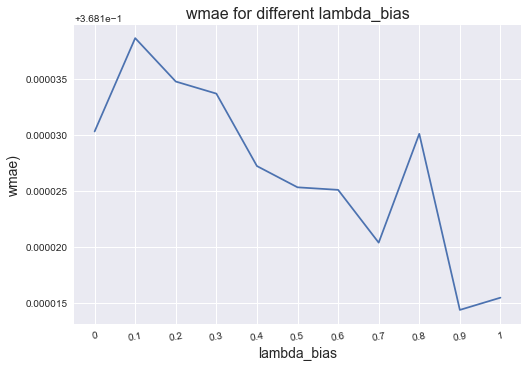

In [75]:
plot_results(results_lambda_bias, 'lambda_bias')

In [19]:
params={'booster':'gblinear',
            'objective': 'reg:linear',
            'eval_metric':'mae',
            'lambda':0.25,
            'subsample':0.7,
            'seed':0,
            'silent':1,
        }

watchlist = [(dataset_train,'train')]
model = xgb.train(params,dataset_train,num_boost_round=3000,evals=watchlist,early_stopping_rounds=300)
pred_xgb = model.predict(dataset_val)

print('wmae:{}'.format(wmae(y_test, pred_xgb)))

[0]	train-mae:60881.7
Will train until train-mae hasn't improved in 300 rounds.
[1]	train-mae:58038.5
[2]	train-mae:56712.4
[3]	train-mae:55546.5
[4]	train-mae:54701.6
[5]	train-mae:54212
[6]	train-mae:53692.8
[7]	train-mae:53254.8
[8]	train-mae:52885.2
[9]	train-mae:52602.5
[10]	train-mae:52376.6
[11]	train-mae:52216.6
[12]	train-mae:52111
[13]	train-mae:51972.5
[14]	train-mae:51871.7
[15]	train-mae:51790.9
[16]	train-mae:51738.4
[17]	train-mae:51669.6
[18]	train-mae:51621.4
[19]	train-mae:51577.1
[20]	train-mae:51537.7
[21]	train-mae:51510.1
[22]	train-mae:51482.6
[23]	train-mae:51463.9
[24]	train-mae:51437.4
[25]	train-mae:51419
[26]	train-mae:51404.9
[27]	train-mae:51383.2
[28]	train-mae:51371.8
[29]	train-mae:51362.7
[30]	train-mae:51347.6
[31]	train-mae:51335.9
[32]	train-mae:51320.5
[33]	train-mae:51313.8
[34]	train-mae:51302.8
[35]	train-mae:51295
[36]	train-mae:51284.6
[37]	train-mae:51275.6
[38]	train-mae:51267.5
[39]	train-mae:51256.5
[40]	train-mae:51250.7
[41]	train-mae:51

[346]	train-mae:50830.9
[347]	train-mae:50830.4
[348]	train-mae:50830.2
[349]	train-mae:50829.7
[350]	train-mae:50829.6
[351]	train-mae:50829
[352]	train-mae:50828.3
[353]	train-mae:50828.1
[354]	train-mae:50827.4
[355]	train-mae:50826.6
[356]	train-mae:50826.9
[357]	train-mae:50826.3
[358]	train-mae:50825.8
[359]	train-mae:50825.3
[360]	train-mae:50824.7
[361]	train-mae:50824.4
[362]	train-mae:50824
[363]	train-mae:50823.6
[364]	train-mae:50822.9
[365]	train-mae:50822.8
[366]	train-mae:50822.5
[367]	train-mae:50821.9
[368]	train-mae:50821.7
[369]	train-mae:50821
[370]	train-mae:50820.9
[371]	train-mae:50820
[372]	train-mae:50819.6
[373]	train-mae:50819.7
[374]	train-mae:50819.1
[375]	train-mae:50818.5
[376]	train-mae:50817.9
[377]	train-mae:50817.7
[378]	train-mae:50817.3
[379]	train-mae:50816.5
[380]	train-mae:50816.4
[381]	train-mae:50816.1
[382]	train-mae:50815.5
[383]	train-mae:50815.5
[384]	train-mae:50815.1
[385]	train-mae:50814.5
[386]	train-mae:50814.4
[387]	train-mae:50813.6


[690]	train-mae:50725.3
[691]	train-mae:50725
[692]	train-mae:50724.8
[693]	train-mae:50724.1
[694]	train-mae:50724
[695]	train-mae:50724.4
[696]	train-mae:50724.1
[697]	train-mae:50723.9
[698]	train-mae:50723.8
[699]	train-mae:50723.3
[700]	train-mae:50723.4
[701]	train-mae:50722.9
[702]	train-mae:50723.1
[703]	train-mae:50722.8
[704]	train-mae:50722.2
[705]	train-mae:50722.5
[706]	train-mae:50721.9
[707]	train-mae:50721.9
[708]	train-mae:50721.5
[709]	train-mae:50721.3
[710]	train-mae:50721
[711]	train-mae:50721
[712]	train-mae:50720.7
[713]	train-mae:50720.3
[714]	train-mae:50720.3
[715]	train-mae:50719.8
[716]	train-mae:50720.1
[717]	train-mae:50719.6
[718]	train-mae:50718.9
[719]	train-mae:50719.2
[720]	train-mae:50719
[721]	train-mae:50718.8
[722]	train-mae:50718.6
[723]	train-mae:50718.6
[724]	train-mae:50718.4
[725]	train-mae:50718.3
[726]	train-mae:50718.1
[727]	train-mae:50717.8
[728]	train-mae:50717.5
[729]	train-mae:50717.4
[730]	train-mae:50716.8
[731]	train-mae:50716.9
[7

[1033]	train-mae:50667.7
[1034]	train-mae:50667.6
[1035]	train-mae:50667.8
[1036]	train-mae:50667.2
[1037]	train-mae:50667.5
[1038]	train-mae:50667
[1039]	train-mae:50666.8
[1040]	train-mae:50667.1
[1041]	train-mae:50666.7
[1042]	train-mae:50666.6
[1043]	train-mae:50666.6
[1044]	train-mae:50666.8
[1045]	train-mae:50666.2
[1046]	train-mae:50665.9
[1047]	train-mae:50665.6
[1048]	train-mae:50665.7
[1049]	train-mae:50665.7
[1050]	train-mae:50665.4
[1051]	train-mae:50665.7
[1052]	train-mae:50665.6
[1053]	train-mae:50665.6
[1054]	train-mae:50665.4
[1055]	train-mae:50665.1
[1056]	train-mae:50664.9
[1057]	train-mae:50664.8
[1058]	train-mae:50664.8
[1059]	train-mae:50664.4
[1060]	train-mae:50664.6
[1061]	train-mae:50664.4
[1062]	train-mae:50664.2
[1063]	train-mae:50663.7
[1064]	train-mae:50663.6
[1065]	train-mae:50664
[1066]	train-mae:50663.5
[1067]	train-mae:50663.3
[1068]	train-mae:50663.4
[1069]	train-mae:50663.5
[1070]	train-mae:50663.4
[1071]	train-mae:50662.8
[1072]	train-mae:50663
[1073]

KeyboardInterrupt: 

In [256]:
b = pd.read_csv('t_sales_sum.csv')
a = b[b['dt']=='2016-08-31'].groupby('shop_id')[['sale_amt_3m']].mean()
a.to_csv('091011.csv', header=None)               

**提交四：**9、10、11预测，test为**0.751966**

# 4、submit

In [265]:
xgb_lambda = pd.read_csv('xgb_0.csv', header=None)
for i in range(3000):
    xgb_lambda.iloc[i]['sale_amt_3m'] = round(results_lambda['0.25']['predictions'][i]+0.01,2)
xgb_lambda.to_csv('xgb_1.csv', header=None)  
xgb_lambda

sale_amt_3m
shop_id             
1          225613.60
2           73110.96
3          222046.35
4          218815.90
5          133316.60
6          105455.84
7           70269.95
8          144102.29
9           30481.67
10         132415.45
11          56208.31
12          76347.78
13         145736.35
14          48290.85
15          38583.13
16          69327.80
17         187632.78
18          58528.85
19         317026.38
20         111900.57
21         197289.79
22         130300.23
23         548885.45
24         189349.62
25          72049.15
26         410747.04
27          77990.44
28         179161.53
29          62508.28
30          61337.74
...              ...
2971       169435.24
2972       192180.59
2973       186114.14
2974       113989.90
2975       208392.06
2976       110387.97
2977       147631.73
2978       109891.59
2979        34831.08
2980       138022.40
2981        99072.93
2982       131841.07
2983       208274.09
2984        67783.74
2985       138864.71
2986       265109.26
2987       124252.85
2988       141906.28
2989        46189.39
2990        59714.02
2991        89078.27
2992        23652.03
2993        50831.60
2994       263821.38
2995        27386.96
2996       104130.81
2997       215722.54
2998       140562.31
2999       102308.76
3000       181116.09

[3000 rows x 1 columns]

In [9]:
submission = pd.DataFrame()
submission['shop_id'] = range(1, 3001)
submission['pred_3m'] = results_lambda['0.25']['predictions']
submission.to_csv('xgb_1.csv', header=False, index=None, encoding='utf-8', sep=',')

NameError: name 'pred_amt' is not defined

In [245]:
import csv
lines = []
with open('xgb_0.csv') as f:
    spamreader = csv.reader(f, delimiter=',')
    for row in spamreader:
        line = []
        line.append(row[0])
        line.append(row[1])
        lines.append(line)
with open('xgb_1.csv', 'w', newline='') as f:
    spamwriter = csv.writer(f, delimiter=',')
    for line in lines:
        spamwriter.writerow(line)

In [8]:
a = pd.read_csv('xgb_0.csv', header=None)
a.columns = ['shop_id', 'pre_sale']
a_ = a.groupby('shop_id')[['pre_sale']].mean()
a_.to_csv('xgb_1.csv',header=None, encoding='utf-8')

**xgb预测结果存在负数，对其取后三月平均**

In [53]:
data_sales_sum = pd.read_csv('t_sales_sum.csv')
data_sales_sum_meanlast3month = data_sales_sum[data_sales_sum['dt']>'2016-11-29'].groupby('shop_id')[['sale_amt_3m']].mean()
data_sales_sum_meanlast3month.iloc[1147]['sale_amt_3m']

516914.87666666665

In [60]:
a = pd.read_csv('xgb_0.csv', header=None)
a.columns = ['shop_id', 'pre_sale']
list_neg = a[a['pre_sale']<0].index.tolist()
pre_sale = a['pre_sale'].tolist()
for i in list_neg:
    pre_sale[i] = data_sales_sum_meanlast3month.iloc[i]['sale_amt_3m']
a['pre_sale'] = pre_sale
a.to_csv('xgb_1.csv',header=False, index=None)

**提交五**，xgb（lambda=0.25，replace neg_value with average of last3month）,**0.985542**